In [917]:
%matplotlib inline
import numpy as np
import sys
sys.path.append('../packages/dpcluster-0.104')
from dpcluster import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors.kde import KernelDensity
import pickle
import holoviews as hv

np.random.seed(9221999)

In [380]:
class decisionnode:
    def __init__(self,col=-1,value=None,num=-1,results=None,tb=None,fb=None, samples = []):
        self.col=col # column index of criteria being tested
        self.value=value # vlaue necessary to get a true result
        self.results=results # dict of results for a branch, None for everything except endpoints
        self.num=num # number of samples in node
        self.tb=tb # true decision nodes 
        self.fb=fb # false decision nodes
        self.samples=samples # all sample ids of node
    def __str__(self):
        return "COL: %s | VALUE: %s | RESULTS: %s | \n NUM: %s | TB: %s | FB: %s \n\n" %(str(self.col), 
                                                    str(self.value),
                                                    str(self.results),
                                                    str(self.num),
                                                    str(self.tb),
                                                    str(self.fb))
def printtree(tree, columns, indent='', depth = 0):
    # Is this a leaf node?
    if tree.results!=None:
        
        print "KL: {0:0.2f} | Samples: {1}".format(tree.results, tree.num)
    else:
        # Print the criteria
        print 'Column ' + str(columns[tree.col])+' : '+str(tree.value)+'?   | ' + 'Gain: ' + str(tree.gain) + '  | Depth: ' + str(depth)
        # Print the branches
        print indent+'True or GREATER ->',
        printtree(tree.tb,columns, indent+'  ', depth + 1)
        print indent+'False or LESS/EQUAL ->',
        printtree(tree.fb,columns, indent+'  ', depth + 1)

In [ ]:
pd.set_option('display.max_columns', 500)

In [ ]:
pd.set_option('display.max_rows', 500)

In [948]:
from datetime import datetime
final_with_meds_and_dx[(final_with_meds_and_dx.SA_ID == 'SA90200071827148')].iloc[-5]

ABSORBABLE SULFONAMIDE ANTIBACTERIAL AGENTS                                                                                                   0
ADRENERGIC AGENTS,CATECHOLAMINES                                                                                                              0
ADRENERGIC VASOPRESSOR AGENTS                                                                                                                 0
ALPHA/BETA-ADRENERGIC BLOCKING AGENTS                                                                                                         0
AMINOGLYCOSIDES                                                                                                                               0
ANAEROBIC ANTIPROTOZOAL-ANTIBACTERIAL AGENTS                                                                                                  0
ANALGESIC/ANTIPYRETICS, SALICYLATES                                                                                                    0

In [943]:
final_with_meds_and_dx[(final_with_meds_and_dx.SA_ID == 'SA90200071827148') & (final_with_meds_and_dx.start_time > datetime(2013, 3, 15))]

NameError: name 'datetime' is not defined

## print 6hr - 100 min leaf tree

In [933]:
final_with_meds_and_dx = pd.read_json('JSONs/final_HR_segments_with_meds_and_dxs_FULL_6_hrs.json')

In [384]:
final_with_meds_and_dx = final_with_meds_and_dx.drop([u'hist', 'DOB', 'DeathDate', 'SA_ID', 'PAT_ID','date','end_time','start_time'], axis = 1)

#Move sample ID to beginning and pdf to end
cols = list(final_with_meds_and_dx)
cols.insert(0, cols.pop(cols.index('sample_ID')))
cols.append(cols.pop(cols.index('pdf')))
final_with_meds_and_dx = final_with_meds_and_dx.ix[:, cols]

FINAL_TREE = pickle.load(open('Pickles/6_MEDS_DX_FULL_min_leaf_100.tree', 'rb'))

print "Now printing tree..."
printtree(FINAL_TREE, final_with_meds_and_dx.columns)

Now printing tree...
Column Age : 38?   | Gain: 337.803233327  | Depth: 0
True or GREATER -> Column OTHER DISEASES OF RESPIRATORY SYSTEM  : 0?   | Gain: 198.376667697  | Depth: 1
  True or GREATER -> Column Age : 77?   | Gain: 155.538475525  | Depth: 2
    True or GREATER -> Column RHEUMATISM, EXCLUDING THE BACK  : 0?   | Gain: 86.9508613291  | Depth: 3
      True or GREATER -> Column MYCOSES  : 0?   | Gain: 63.2288946564  | Depth: 4
        True or GREATER -> KL: 211.34 | Samples: 182
        False or LESS/EQUAL -> KL: 75.24 | Samples: 104
      False or LESS/EQUAL -> Column PNEUMOCONIOSES AND OTHER LUNG DISEASES DUE TO EXTERNAL AGENTS  : 0?   | Gain: 53.2300617799  | Depth: 4
        True or GREATER -> KL: 170.79 | Samples: 200
        False or LESS/EQUAL -> Column NEPHRITIS, NEPHROTIC SYNDROME, AND NEPHROSIS  : 0?   | Gain: 39.4422052492  | Depth: 5
          True or GREATER -> Column ORGANIC SLEEP DISORDERS  : 0?   | Gain: 40.7871085427  | Depth: 6
            True or GREATER -> Co

## print 24hr - 25 min leaf tree

In [383]:
final_with_meds_and_dx = pd.read_json('JSONs/final_HR_segments_with_meds_and_dxs_FULL_24_hrs.json')

final_with_meds_and_dx = final_with_meds_and_dx.drop([u'hist', 'DOB', 'DeathDate', 'SA_ID', 'PAT_ID','date','end_time','start_time'], axis = 1)

#Move sample ID to beginning and pdf to end
cols = list(final_with_meds_and_dx)
cols.insert(0, cols.pop(cols.index('sample_ID')))
cols.append(cols.pop(cols.index('pdf')))
final_with_meds_and_dx = final_with_meds_and_dx.ix[:, cols]

FINAL_TREE = pickle.load(open('Pickles/24_MEDS_DX_FULL_min_leaf_25.tree', 'rb'))

print "Now printing tree..."
printtree(FINAL_TREE, final_with_meds_and_dx.columns)

Now printing tree...
Column Age : 38?   | Gain: 85.3321778371  | Depth: 0
True or GREATER -> Column ICU_unit : 8NICU?   | Gain: 46.211748821  | Depth: 1
  True or GREATER -> Column ORGANIC PSYCHOTIC CONDITIONS  : 0?   | Gain: 21.0471982561  | Depth: 2
    True or GREATER -> KL: 36.57 | Samples: 44
    False or LESS/EQUAL -> Column VITAMIN B1 PREPARATIONS : 0?   | Gain: 10.301048785  | Depth: 3
      True or GREATER -> KL: 4.95 | Samples: 26
      False or LESS/EQUAL -> Column NUTRITIONAL DEFICIENCIES  : 0?   | Gain: 7.51956952357  | Depth: 4
        True or GREATER -> KL: 17.50 | Samples: 35
        False or LESS/EQUAL -> Column LAXATIVES AND CATHARTICS : 0?   | Gain: 6.8029960175  | Depth: 5
          True or GREATER -> Column HYPERTENSIVE DISEASE  : 0?   | Gain: 3.36073702897  | Depth: 6
            True or GREATER -> KL: 16.52 | Samples: 30
            False or LESS/EQUAL -> KL: 14.22 | Samples: 29
          False or LESS/EQUAL -> Column CEREBROVASCULAR DISEASE  : 0?   | Gain: 4.908

## AVG Distributions 

In [559]:
final_tree_leaf = pickle.load(open('Pickles/6_MEDS_DX_FULL_min_leaf_100.tree', 'rb'))

In [560]:
len(final_tree_leaf.tb.samples)

9516

### Get avg distribution

#### For root

In [673]:
root = final_tree_leaf.tb.fb.tb.samples
root_pdfs = final_with_meds[final_with_meds.sample_ID.isin(root)].pdf

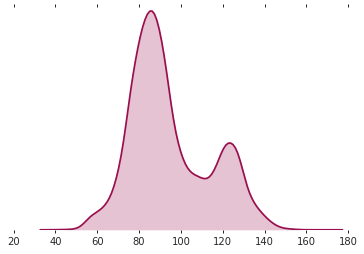

In [737]:
pdf_avg = np.divide(map(sum, zip(*root_pdfs)), len(root_pdfs))
ax1 = plt.axes(frameon=False)
pdf_avg = [[x/5]*5 for x in pdf_avg]
pdf_avg = [item for sublist in pdf_avg for item in sublist] 
sample_data = np.random.choice(np.arange(20, 220), size = 21600, p = pdf_avg)
sns.distplot(sample_data, hist = False, kde_kws={"shade": True, "color":"#9A104F"})
ax1.axes.get_yaxis().set_visible(False)
ax1.tick_params(axis=u'both', which=u'both', bottom='on', top ='on', length=3)


#### Look at splits

NODE


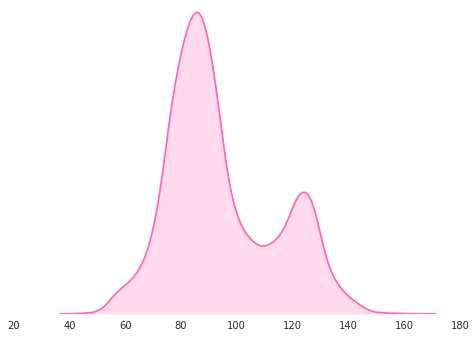

TRUE BRANCH


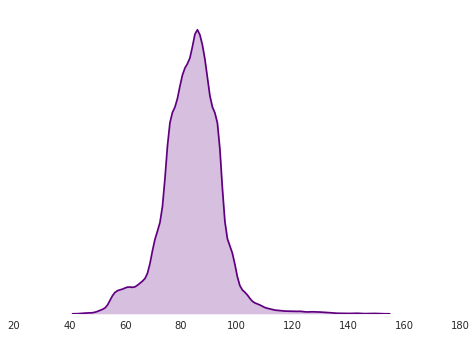

FALSE BRANCH


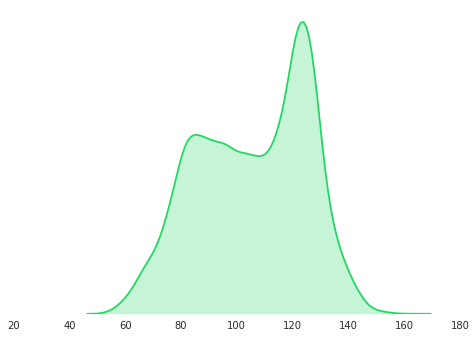

In [718]:
print "NODE"
root = final_tree_leaf.tb.fb.tb
cur = root.samples
left = root.tb
cur_left = left.samples
right = root.fb
cur_right = right.samples

cur_pdfs = final_with_meds[final_with_meds.sample_ID.isin(cur)].pdf
np.random.seed(0)
pdf_avg = np.divide(map(sum, zip(*cur_pdfs)), len(cur_pdfs))
ax1 = plt.axes(frameon=False)
pdf_avg = [[x/5]*5 for x in pdf_avg]
pdf_avg = [item for sublist in pdf_avg for item in sublist] 
sample_data = np.random.choice(np.arange(20, 220), size = 21600, p = pdf_avg)
sns.distplot(sample_data, hist = False, kde_kws={"shade": True, "color":"#FF68B5"})
ax1.axes.get_yaxis().set_visible(False)
plt.xlim((20, 180))
plt.show()

print "TRUE BRANCH"
cur_left_pdfs = final_with_meds[final_with_meds.sample_ID.isin(cur_left)].pdf
np.random.seed(0)
pdf_avg = np.divide(map(sum, zip(*cur_left_pdfs)), len(cur_left_pdfs))
ax1 = plt.axes(frameon=False)
pdf_avg = [[x/5]*5 for x in pdf_avg]
pdf_avg = [item for sublist in pdf_avg for item in sublist] 
sample_data = np.random.choice(np.arange(20, 220), size = 21600, p = pdf_avg)
sns.distplot(sample_data, hist = False, kde_kws={"shade": True, "color":"#600080"})
ax1.axes.get_yaxis().set_visible(False)
plt.xlim((20, 180))
plt.show()

print "FALSE BRANCH"
cur_right_pdfs = final_with_meds[final_with_meds.sample_ID.isin(cur_right)].pdf
pdf_avg = np.divide(map(sum, zip(*cur_right_pdfs)), len(cur_right_pdfs))
ax1 = plt.axes(frameon=False)
pdf_avg = [[x/5]*5 for x in pdf_avg]
pdf_avg = [item for sublist in pdf_avg for item in sublist] 
sample_data = np.random.choice(np.arange(20, 220), size = 21600, p = pdf_avg)
sns.distplot(sample_data, hist = False, kde_kws={"shade": True, "color":"#1ED760"})
ax1.axes.get_yaxis().set_visible(False)
plt.xlim((20, 180))
plt.show()


## CDF Distributions 

In [784]:
one = np.random.choice(FINAL_TREE.tb.tb.tb.tb.samples, size = 10, replace = False) 
two = np.random.choice(FINAL_TREE.tb.fb.tb.fb.samples, size = 10, replace = False) 
three = np.random.choice(FINAL_TREE.tb.fb.fb.tb.samples, size = 10, replace = False) 
four = np.random.choice(FINAL_TREE.tb.fb.fb.fb.samples, size = 10, replace = False) 
# one = np.random.choice(FINAL_TREE.tb.tb.tb.tb.samples, size = 10, replace = False) 
# one = np.random.choice(FINAL_TREE.tb.tb.tb.tb.samples, size = 10, replace = False) 
# one = np.random.choice(FINAL_TREE.tb.tb.tb.tb.samples, size = 10, replace = False) 
# one = np.random.choice(FINAL_TREE.tb.tb.tb.tb.samples, size = 10, replace = False) 
# one = np.random.choice(FINAL_TREE.tb.tb.tb.tb.samples, size = 10, replace = False) 


In [785]:
# root = final_with_meds[(final_with_meds.sample_ID.isin(one+two+three+four))].pdf
# one_left = final_with_meds[final_with_meds.sample_ID.isin(one+two)].pdf
# one_right = final_with_meds[final_with_meds.sample_ID.isin(three+four)].pdf

two_left_left = final_with_meds[final_with_meds.sample_ID.isin(one)].pdf
two_left_right = final_with_meds[final_with_meds.sample_ID.isin(two)].pdf
two_right_left = final_with_meds[final_with_meds.sample_ID.isin(three)].pdf
two_right_right = final_with_meds[final_with_meds.sample_ID.isin(four)].pdf

one_left = two_left_right + two_left_left
one_right = two_right_right + two_right_left
root = one_left + one_right


In [ ]:
two_left_left_CUM = two_left_left.apply(np.cumsum)
two_left_right_CUM = two_left_right.apply(np.cumsum)
two_right_left_CUM = two_right_left.apply(np.cumsum)
two_right_right_CUM = two_right_right.apply(np.cumsum)

one_left_CUM = two_left_right_CUM + two_left_left_CUM
one_right_CUM = two_right_right_CUM + two_right_left_CUM
root_CUM = one_left_CUM + one_right_CUM

In [888]:
two_left_right_CUM_final = [x for i, x in enumerate(two_left_right_CUM) if i not in [0, 1, 7]]
two_right_left_CUM_final = [x for i, x in enumerate(two_right_left_CUM) if i not in [0, 1, 2]] 
two_right_right_CUM_final = [x for i, x in enumerate(two_right_right_CUM) if i not in [1, 3, 8]] 
two_left_left_CUM_final = [x for i, x in enumerate(two_left_left_CUM) if i not in [4, 9, 7, 8]] 

In [891]:
two_left_right_CUM_final = [[i*5 + 20, x, 'left_right'] for y in two_left_right_CUM_final for i, x in enumerate(y)]
two_right_left_CUM_final = [[i*5 + 20, x, 'right_left'] for y in two_right_left_CUM_final for i, x in enumerate(y)]
two_right_right_CUM_final = [[i*5 + 20, x, 'right_right'] for y in two_right_right_CUM_final for i, x in enumerate(y)]
two_left_left_CUM_final = [[i*5 + 20, x, 'left_left'] for y in two_left_left_CUM_final for i, x in enumerate(y)]


In [892]:
final_CDFs = np.vstack((two_left_left_CUM_final, two_left_right_CUM_final, two_right_left_CUM_final, two_right_right_CUM_final))

In [895]:
final_CDFs_df = pd.DataFrame(final_CDFs)

In [896]:
final_CDFs_df.to_csv('final_CDFs.csv')

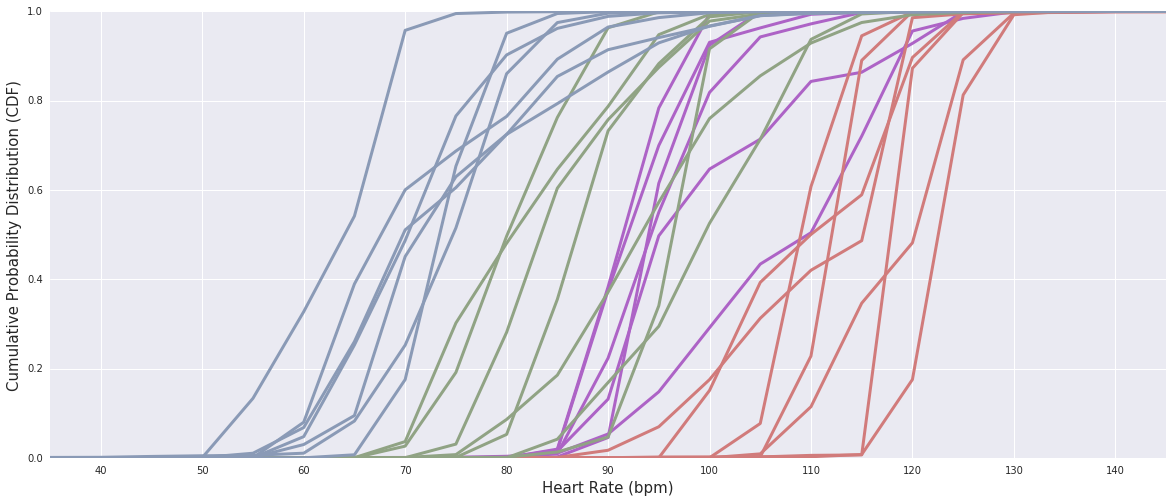

In [905]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)
for j in np.arange(len(two_left_left_CUM)):
    if j not in [4, 9, 8, 7]:
        ax.plot(np.arange(20, 220, 5), two_left_left_CUM.iloc[j], "-", c = '#AD63C6', linewidth = 3)
#         plt.text(50, two_left_left_CUM.iloc[j][6], str(j), fontsize = 12)
#         plt.text(90, two_left_left_CUM.iloc[j][14], str(j), fontsize = 12)

for j in np.arange(len(two_left_right_CUM)):
    if j not in [0, 1, 7]:
        ax.plot(np.arange(20, 220, 5), two_left_right_CUM.iloc[j], "-", c = '#D17B7B', linewidth = 3)
#         plt.text(80, two_left_right_CUM.iloc[j][12], str(j), fontsize = 12)
#         plt.text(110, two_left_right_CUM.iloc[j][18], str(j), fontsize = 12)

for j in np.arange(len(two_right_left_CUM)):
    if j not in [0, 1, 2]:
        ax.plot(np.arange(20, 220, 5), two_right_left_CUM.iloc[j], "-", c = '#90A384', linewidth = 3)
#         plt.text(50, two_right_left_CUM.iloc[j][6], str(j), fontsize = 12)
#         plt.text(90, two_right_left_CUM.iloc[j][14], str(j), fontsize = 12)

for j in np.arange(len(two_right_right_CUM)):
    if j not in [1, 8, 3]:
        ax.plot(np.arange(20, 220, 5), two_right_right_CUM.iloc[j], "-", c = '#8A9AB6', linewidth = 3)
#         plt.text(60, two_right_right_CUM.iloc[j][8], str(j), fontsize = 12)
#         plt.text(90, two_right_right_CUM.iloc[j][14], str(j), fontsize = 12)

    #plt.show()
ax.set_ylim((0,1))
ax.set_xticks(np.arange(20, 220, 10))
ax.set_xlim((35,145))
# ax.set_title('Cumulative Probability Distribution (CDFs) of Samples', fontdict={"fontsize":28})
ax.set_ylabel('Cumulative Probability Distribution (CDF)', fontdict={"fontsize":15})
ax.set_xlabel("Heart Rate (bpm)", fontdict={"fontsize":15})
ax.patch.set_alpha(1)
print

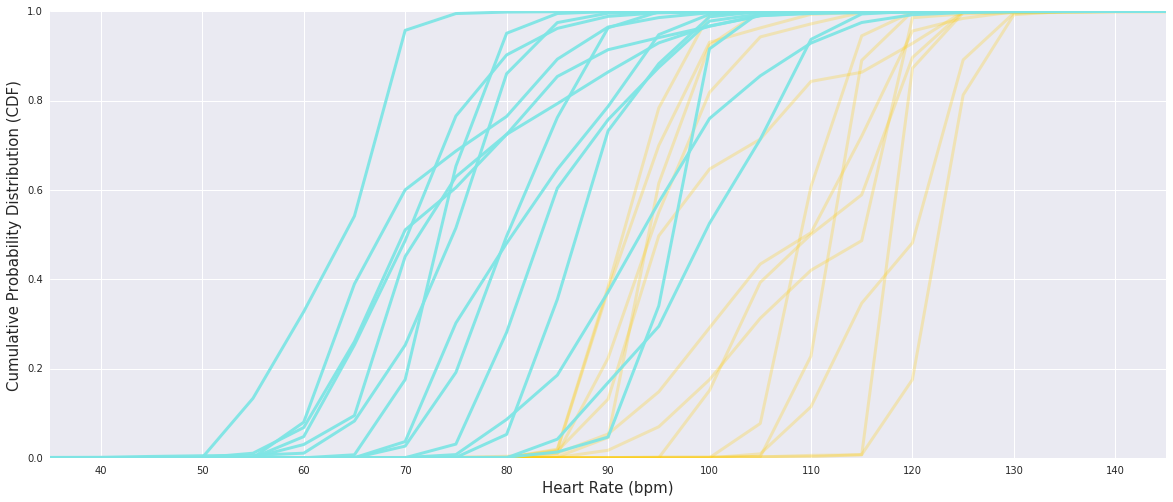

In [932]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)
for j in np.arange(len(two_left_left_CUM)):
    if j not in [4, 9, 8, 7]:
        ax.plot(np.arange(20, 220, 5), two_left_left_CUM.iloc[j], "-", c = '#ffcc00', linewidth = 3, alpha = 0.25)
#         plt.text(50, two_left_left_CUM.iloc[j][6], str(j), fontsize = 12)
#         plt.text(90, two_left_left_CUM.iloc[j][14], str(j), fontsize = 12)

for j in np.arange(len(two_left_right_CUM)):
    if j not in [0, 1, 7]:
        ax.plot(np.arange(20, 220, 5), two_left_right_CUM.iloc[j], "-", c = '#ffcc00', linewidth = 3, alpha = 0.25)
#         plt.text(80, two_left_right_CUM.iloc[j][12], str(j), fontsize = 12)
#         plt.text(110, two_left_right_CUM.iloc[j][18], str(j), fontsize = 12)

for j in np.arange(len(two_right_left_CUM)):
    if j not in [0, 1, 2]:
        ax.plot(np.arange(20, 220, 5), two_right_left_CUM.iloc[j], "-", c = '#7fe5e5', linewidth = 3, alpha = 0.95)
#         plt.text(50, two_right_left_CUM.iloc[j][6], str(j), fontsize = 12)
#         plt.text(90, two_right_left_CUM.iloc[j][14], str(j), fontsize = 12)

for j in np.arange(len(two_right_right_CUM)):
    if j not in [1, 8, 3]:
        ax.plot(np.arange(20, 220, 5), two_right_right_CUM.iloc[j], "-", c = '#7fe5e5', linewidth = 3, alpha = 0.95)
#         plt.text(60, two_right_right_CUM.iloc[j][8], str(j), fontsize = 12)
#         plt.text(90, two_right_right_CUM.iloc[j][14], str(j), fontsize = 12)

    #plt.show()data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABJUAAAH2CAYAAADJbL2NAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAIABJREFUeJzsvXmYbFdZ7/9Za+9d89Ddp7vPyclMjIegoEwJMgTChauiYAIiCHIFGbwIN0IEEbkKCsgoBJCfCKiAiIJMgnKvwo8YCEIIs4gcMicnyTndp4eaq/aw1v1jD7Wru7q7urt6gvV5nnq69tpDrT12rW993/cVWmsMBoPBYDAYDAaDwWAwGAyGzSD3ugMGg8FgMBgMBoPBYDAYDIaDhxGVDAaDwWAwGAwGg8FgMBgMm8aISgaDwWAwGAwGg8FgMBgMhk1jRCWDwWAwGAwGg8FgMBgMBsOmMaKSwWAwGAwGg8FgMBgMBoNh0xhRyWAwGAwGg8FgMBgMBoPBsGns3f7AY8eO/SXwi8Cp48eP32+NZd4O/DzQAp55/Pjxb+1iFw0Gg8FgMBgMBoPBYDAYDBuwF06lvwZ+dq2Zx44d+3ngguPHj18I/Cbwrt3qmMFgMBgMBoPBYDAYDAaDYTR2XVQ6fvz4dcDSOov8EvCBaNnrgeqxY8cO70bfDAaDwWAwGAwGg8FgMBgMo7EfcyqdCdyZmr4rajMYDAaDwWAwGAwGg8FgMOwTdj2n0giIIW16o5V8P9C2be1AdwwGg8Hwo4zS4T8hBWgd/V3ZvgvLGUIUw4+diufrIfPXWEevWD89f6cOeQB4CoLU52s9+Jkq9V6vnF5vPd1fZxz9j49REH2WB3QC6Gjoqv6xiz8zzbA+6DXeD5veCdLnN4g+cNi5X6tfg/N8QIEKQAfhewK09tE6AALQCq0DtNZofLTW/XYUWodXpo6mIehfqwgCJBqJQqIRA6+h+wf4OPiM6/uwHHIeBSA2uMZENG/9ZdP7oVPLDt9WvL14+fVYfXxGu77EqvfrXbOjMfxcbW57K49LfB2MsuyPJjq6dtfGHCeDYbO0H1hZ84G2H0WlE8DZqemzgLs3Wmlpqb1jHdptZmbKzM839robhhTmnOxPzHnZfxzkc6I1tDTUlKCmBD67M9DdDSYniiwtt/a6G1tCaWgoQV1DR689QNuP+Bo8Da4GF/B0eF0BFAs5Wu3ujvchFp4Ug0LlmsIbEKQG1IGGngKPft/3G6sEWeL9FgNtKxm4mlQHgpNIGaCCABULPsSCUSyvKVQyHQ9M0+LL6mtUkO6LQCEBgYqElFA0stA4G+zp2pKSRtIji8JKCQ7DRZp4S+m/K7c2/NOH71+4DZkcY71CnOkfm8GB/lrb2x+sdeS2vp3VQkf/HGz+f83a0uJOH9HVctvWerDR+d/O9RHfXQcJI3PtF8x52Ap7JSoJ1n5KfAp4AfDhY8eOPQRYPn78+Kld65nBYDAYfmSIhaTllJC0XxGpl4z/inhaD84Xg8tNO2DLwa/oA8O+If+RV/9mP/h+9bBxxXzBqra1119NR8GSEixrQVZqZoCtDJi2M7BIjnP8EkTekf5xtohcPBpcBK6GXiQi6RXbENHyAIfKsBQEI/c/FoACQqEn/T6IBIu4PRaQVHRm4m3EfUH0PSQy9Tnxy9XQ1YJOJIhJK7UN0V8uK6AkNU7qvIgVr2H7s3JZxIp8DKEKMyB2BVokjqkAUCL6Gy0nxOrPHdg3MXhtxsv5GlqBS7D8VjR1pFp9LUdnINWuU4NWHR3n0FEUIAmwUIjor0UQHflYPupLPoq0/yjedijPZIAMGgeBjcRGYqFEDl9kkcIBbWHrk3T0PA1K2HhkcLEokc88CMeajFyOEqVl+GlCRi4oOzx+UhLocH4gIkFKRP3XAl9LlAh7rhDR+RKgU70X4d4JIaN9iJZLPbHi9dL3TnxPyNT1Y6kmln8LjnczdnALNksDQlr/WaMH3qfPV/pYDnv1pR2VTIuB9+lzQ3R3kVomPT+WBod7yXwsFpmkSWngqhwuPcbz9Iol+nsmUle4GHCkyWi/wqeVFPHyEiLJUgKW0EgEdrw1obEAKcKtSWS4jFZkgjvI6NsQdKLzb+GSwSWLL2bpibPQou+kU6nzLJL+pvdk5TuJSK6f/jMp/TQQK46XwEPo8IX2EXhI7SJxQbuET2EPSTdclt6KPvTPdf9Yr2bwfowl0f49v/KeXfnqLz/8Ghz+gv61M9pnrNc+bH/GNd2XkFfPH3VbemB69VUy2BK+0s+WwW89qXtDSPr/3aJ2kfwXD9uFjK6teNqK5lvRNqzwvbCj+Xa0fRstbDR2Ml8ICy2caNqJlonXtygW8jTb3oq9koPTQqxuQ6DFyv9ow/6zrjxiw77QjfLNa8i2V305vHL1tiN2XVQ6duzYh4BHAYeOHTt2B/BKwv+c+vjx4+8+fvz4Z44dO/a4Y8eO3QS0gGftdh8NBoPB8MPLZoWk9NeWzYo5yVeAVe06GkwN2b5Yvb4cNjrfBDMZyNr7/9c3X4dC0qISdKPuZldkfxx2bOKvhoPT/dfgMdUDy8TbWrneMKENQvGoG7mmOpH40gNiE5UjWNdvEn4thQkbfKlD4STlqlE6FEzisKxwcK/D77lR3ywxeCyEWPn1Or5mRjvnWochbU0laGqBEuEXs1x0vCwRftW2gJLQVC2YlJq8iAepa3+tTfok+p/lE57r8K9ARe+9SCDzYch9OZ7r145eXa1pKEFPCGY7n6bMtdj4iedIoAkiocjHjkQYiwALHxsPB48iPkW0dEBkgSxaZBHCCV9kkdJBiAxCZJAigxDZaDqHFBkQ2agtixS58L3M9odP0XgrdvvYInxJ/w6yS29gXi3RoESXLE2qLGV+niD3MHxpDYiMGx299Pmyos9JP+Ng8Hklh7WJ/jbie2jwOaj713B8H6oeGe/7ZL3vkPG+RSa4JZLmYjkulrMgPdDut/ffh/1RDA8YHPQDCbLhORM5EBkQOYTMokUOyIIohG0iC8JBqgaWmscKTmH5J7CoDd1+/BkuDie5gHnnYVQyFxE49yFwfhxkYc0hYfw+PgfxvW4RCz/9+9ACpIyX69+jIlpHprax1rNsJa4G11+AxvsQzY/j0qNLDm/gidamXXoOhbOevz33q3YRQQ2h60hVQ+gaIqgjdQ2haghVR6haNK+OCGpImqnzu/qVvl42M2+l+BOeh83/gDH4JAwl8e3869ZItKigZRUlp1DWJFoeQskZlDULOOSa78UObtvGp6yNooSWZZQsR/2IX9WoT+FfLaooOYGWk+FfayJ6HsY/wciUaJL6zzvqhXnAKc6U6RxQB/9KyuvM23VR6fjx408bYZkX7kZfDAaDwfCjQVpIWlah42EYFjAhNRNSUxDbF3MMo9FQsKAEdTX8d+MsMGVppqTG3qVzojX0CB1TsWunozfnZpNAIXICaHTkthF0CXMSeaRG4fQHhFaqbRxiSjzAtAXY8WBeQwdoK0E7+oiy1FRj5wJ9oa0kNFWpqUjWPP5xqF8sDnkIAh3mYQrnCTyGh6GNY/9swIn67ojwFbfZUZuKRMsFFQ5oyhZUghqV9nvp4VOngqw8joa6F0pkBwQfIXMIQjFIiBwZ4ZATIhGS4wH9Ws8MQSg2OpGwQko8jB1ZQSTorYdWCt34Bxba/8ItnMMyF9KiQE+cgcw9gkOZqVDsi4TrtNg9IAitFLVHuK/6w0KdCBzxENGOph00toyOfSSGOMk0WAQ43vfI9r5EtncdWferWHTXHOxDGbt4X1w/i5B5tMijZQEtcmhRABG1iXzYJle2heKQFgV0tH4oGq29wyKYw+l9Fad3PY57HXbvm4TS8fr49jFamYdywnkUc86DCKyzI0dEJCQLTUXqRFBLH7+0ELSTY+0gclKGr/BZ1NMCzz9Jpvn3ZDufiZ5QmejVRwPtyktwC0+gkDRq0J1QANJ1rKCGpZfDV7CMrZew1DKWWsJWi9jRX2uFQLSR6GNFGcbGjef8JJ3ylWiZA5zImeKAyKCxEbqNDOYRah4ZnMIK7kEGdyP9u7CCuxC4ybbEJp9uGomyziKwzyWwz0XZ5xLY5xBY56Hsc1HWkchhsxrp3011/op1BSWNFYk/E2g5Eb2fjN5PRKLQRH++GFw2dOsYDKOxH3MqGQwGg8GwbbYiJBV/dH4823PceIAfhGLDSiTheZmSmuIO16oNIqdOR4vEhdTTmxNAMkA+cu/ISEBygZaKhx3bv7Bih4Iduxci4cSC6H3KVZSaF1/TgYa6ilx6OhwCSQGlFV2TQCW6J8orxFU3Plaq79Ty2JksFIlAFO2XE+27gw5Fo6jNWufQag0NDSd9QWNITq5c64MImviUmJJZnKP/E3vZHbKltYlFKxtNJhK0wgOiE7eZD7ha0NWpZ9HKgzZkP1wNTRXmemv6c6j6P1DXLVo8KPJMKYqZ+zGbfwiTlhz6/IrFIxuwE5FN94XG+NgSXUOyP+0IPXCc02LjqE4Y6d9OpnsNTvcaMt1/Q6qlNZfV2HjZi/Fyl9HJXYafeQAzs5M0duqXfu1jed8LBaTeV3Hc67H82zZcTYkSfuZBeNkH42cvoZV5MCf1FEtDhPGS0By2NKVdqrmto/DbOIw1FpG6Q0Rx6d1KrvUhyt3PsfK/pMZG4CPQZPDwq7/PRPHxVDofZfq2d4N7N7Y6jUV3x0Sfwf6IyA0zhZZTKOtQ+FdOoeQhtBX9FZPY7lcp1N+O1Itrbs/NPpzazIew/Luw/Nux/NuQwe1Y/h1Y/u1I/3ak3t51F8jDkVgUC0fnhcKRfS7KOisKl9oclncT1bnLsYI7gMTMGDLzQhac50cOorL5QmPYNYyoZDAYDIYfGrSGZiq0bS0hyQaqRkjadbSGuoaFYPgAH6AgYCo6N+uJBVslFkW6WtCOXEibkRAkkBOQE6GAlI0GUl0ETQXzSiSJrtcjJ6EYDewTAUjEopHuh7mk5m0FT0MtENQVNPXaqWDje6IqdSIydTQsq36oX0dv9rf41cTiRizCJIKGGHQVOWzvvtxItLSAGX2CifY7OcUhyjRpVl6GgwPRFSHpu4tsEQqHcT+daF9U5MbqRWGQHS1YVkTPns3tgKehrfrusfjalDqg0Psslc4/scAkNhmqLKPkUbzC45l2ZijLvhB4SGomZdjH2DW0m65LoZZxul8k0/08TvcabP+WdZf3nXvj5i7Dy12Gm304yNK6y2+vb0s4vRuwExHpawi9cRhXYJ+Hl7kEL3sJXvZiAuc+IGxcDacCwVKw+t4qCs2RHRSTgigU113hOurpjUVey/1Pcq2/JdO7Lmmz8cnRxbbOIq/uoajvIkcXB0Xz0HvpFX8RoRY5tPQ8NvfUXI3GjoShSAiKxCFtHeqLRNH8ZJ6c2NA9Y3k3UVr6HTLda9ZdLpCzoD2mT1w4kgttLZScJLDOXSEcnUtgnxc61WR+y9sehu1+m+rcFUh1GgiFtvjKC6xzsc58PWpxJ/ygBsP6GFHJYDAYDAcaIyTtf7oaFoMwV9Kw82MR5uiZkpr8mAZgKpX7qJtyIm3m67YN5CPxKC81OQFOFDbW0qFQ09IrU5auJg6DKwooRqGVR/Iw39yZX/a7OnS21FOhbcPIEt4TBREKeG0tWFKCu0ccmKZZKcCErpiUqwgSd9FOEbuSTq8jWpaFZsrSVAW0T7+NUxwCwLcvQuYu5cIc1ByVOHP81MDd1eHx7Cm5aSdbmjjkyVOatha0tKCjwnBLjSDOzeoIyAZ3k2/8Fd1gnpPMogjTyzq5hzJZuJR7ZwRHLJ+y3LrwuG20i9O7Aaf7eTLda7Ddb6wbCqTkLG7uUYmQpOyjO9QvheXfiNO7HjsKZ7P94xuvRhY/+wC8zMWJiKSt2YFlXA2nfDHUmTROMSl2HcXhauu5jkbZmNP7KtXW+yh7XyJHd+AVZB9Gt/g8isuvwdInw1XIUJ/+G9zCLwDg9G5YJShpkYtEn0gQGhCC0o6iQ8k8LSrj/SesexTqV1OovXkkkchSc1ju3MabFcVELAqsc/qCkX0uyj4nDBPbJZzudVTmn4rU9bBvZAbORWPqLUxYReCHI3+P4WBhRCWDwWAwHDg2IyRNRO4LIyTtLipyuSyqcNA8jPQAfzvnZmjy7E2IIoKwkllehMJRIfprR6JCS4dhbPPR9jfariQcWBZlGPpS2IVrr6WgHt0P6w2p4pCmTCrH0NwmHDUWfaEtcWuJ3XXCrMTT4XW2nivpkAyvtWzUz5OdG+l1vprsuSo/jympaQRwMhC4WwiBTCOBjIjrt/Wvo6YWNJWgocEjpTqIgT+gAzKdfyXX+SRdbCzgGN+nJGewJl7IGfnzOWzF6bt3Ga2x/ONkOqETKdO7bl23jxZ5vOzDcHOPxs1dFrl8duCCUU0c9+uRiHQ9jnsDUi1vuFpgHcXLXoKfuRgvezF+5qfC5N1DcDXMRQL5OMWk2HWUiEeM7joahkV4f2YFZAkodz/DVP2tFP0bVt3tvfwvUK+8GC2KTMw9AanmgVAsqk3/LV7+scmydu/65H2n9CyaE68DWWAvcbrXUVp8Ebb/g6RtICRsA0KR6F6Ru+iclOvoPLQ8tC++OGTan6Fy+tcTwUyJKlrksVQo/nULTx44TwbDbmNEJYPBYDAcCLYiJO1WDgtDn3YkJC2p4V4Fm3CAP5ka4I/KOJNn51IiUj4l+rg6FGiWIzGsO8KIziF0IBVFOLAcl9tqPTaqYqiiAapHJHAQOVlEWHGtM8J+pfNExccqs/fjK6DvSopDKYftTkloDq0QLbWGOwOBW/srMnGlJ+dB9DIP5B4FXS90eY2CJBTUMkKTJTw2DppAQ0MLFhXcoyT1SCgYZXs5oZkKbuPsxiuZ8L/KMpMoLDQOndKz0MWnco4jKcrdFZNEMEeme02SG8kK7llzWY3Az/w0XiQiedlLompQY0RrZHBbklDb7n0V2/vuhsmSNTZ+5n54mYvxs2E4m7LP2vDjxiEmpV1HsfAd5z3atOuIvhieIbw3s5GIlBPRva575Fp/T75+NbZ/82BfsOgVf4V2+UUEmYuw3W8xMfe4JN+VFkVqMx/Gy106sJ6TEpW87CP3VFASwQLFpZeTb//96nnrrOfbP46XewRe9mF4uYeHCbH3Mdnm31JefGGS8yqwjuBmH0O+/UEAlJygOfn6veyiwWBEJYPBYDDsX+KBYzxwXmu4YISkvcWPHC+LargIIwhdSYesMPHzZn/41RrujgZ0W02evZYo0okqz8VupGFOl5VkgZLUiRtpt4QWFd0PtRX3g68Hw2M8HQ4qSyK8HzYKixKQiGxpB9KehVOtwyiupCkZXmsrRUul4XZf0O5+m7L7ZQAy9FgovwB/jX1NC0c5wr+ZyJ1lA+3o+TSvYFlJaio8DxtJPvExrwrFpIzFL59Djasp1l/PPFVOcFYo0Nj3plX9PSrZ8znL2plcY6tQbZzelxIhyfb+c93FA+tc3NxluPnL8LKXoq1D4+2P7mK73+on1O5dj1Qbhy8peSgMYYtFpMz9NyWEjENMakXPmPX+h62HTXhPxtdd7EDKMPxZKlSDXON95Bt/tkr80yJPp/g/6FT+F8o+J9x+76tU556E1DUAlChTm/0YfvYhgxvWPo77tWTSy16yhb3ZJqqF0/sK+cZfkOl+jlHlOI1Fu/JSOuVno63DO9zJ8ZGv/xml5d9PpgP7fBoTr6d6ul9MvTXxWrQ1sxfdMxgSjKhkMBgMhn3FqEKSQyq0zQhJe0IzNVgaNojOAlNWlDR4iwNhreE2X1Bfx+kRJ8/OpxxI+SEhWTpyIbV0mFS7rdd2vMUIQidTKCCFbqSdzAu0El+HFdtqStCIQtu6Oq4kFg56fQQWYR/LUc6mtcLRLAadWnkZnqd9EOGxLg3Vz5W0lispTPA+fF+C6DpqKig33gVAjg6N3OX4mQuA8Do64kDJUmHYUOpc6yg8aVkJTgawFAlIo+TpEoTCYyXq42T0Kqb6arn/SXnxtxDud7iZ86hRjdxJv4FXfCpn2oIpawfdSTrAdr8dVWi7Bqf3lXWTMSsxgZe7NBSScpeh7PPHehEJVcfp/TtO9wuwcAPTrW+wkeSrEQTOfVIi0sUE9gVb6td2xaQgThS/htC+kth1lI1cb6tcRyMggtPkG+8i33z3qrA/JSbolJ9Lp/x8tDWdtDvdL1GZfzJSN8Pl5AS1mU/gZx+4avu2912Ebkcrno2yzxytY9tBNSMh8Utkul/Edr+2qkrdRmgk9ekPJnmhDgRaU6i9mmL9zUmT79yX5Zl/oHr6V5Nj4GYfQbf4a3vVS4MhwYhKBoPBYNhzjJB0cIidIovB8CGnJEz+PDUG15jWcHswKCgNS569ligS6NBJ0oqcSO0RBIB0PqSiWF+g2SlcDUuBYD6ARS3Cyk6RkJTuv03sRlIDIXwxWSCXcmrlo+TPB4VRXUlTVngdrLedW31JR4PTuxbb/x45OnSp0Co9BwjP+/m24swMzFuhgLQUhKLpcvQaRYSE0EFSjooCTEWv4lqOMe1RqL+VQu0NNMlyK/fBw8G3L6I18XKyznlcaKt192+rSP+20InUuQand20S+jQMjYOXvTis0Ja7DD/zgA0rcW0K1cFxr8fpfoFM99oo2Xf/aA/bfSUq+NkHh/3KXIKffeC2EydvV0xqq/41s1b4b+I0GsF1NArSv5N8/R3kW+9H6M7AvMA6Qqf8QrqlZ6JlZWCe0/l8KFBE6yg5zfLsPxJk7jv0c9L5lCg9dGud3QjVxOl9hUzvSzjdL0bXwfpupEDOInUdobvA6nxKzal3HDBBKaC0dBX55l8nTV72Z6jNfJhc80M47jfDxcjSnLp6//8iYPiRwIhKBoPBYNgTjJB0cNAa6qn8NcPICxIXxjjCc2JBKZ3fZkZqjtpr/+zvpZJqx/mQNjIJxA6fOKn2MHFmp/E0LCmYDyRzQVhVzl0jK0iGWEjS5KL7YVSn1kFhVFdSVW68j66Gmz0ZCqDaJ9d4dyQo5ekWnoS2D2NpmJGKk77gnibc0rboaPBGSPXrAIWUeDQpNWU5mpvNcr9LeeG3sL1vcTdHOckRNBk6pd+gV3wKM5bkDEuN7XoUajkSba4h0/08ln/rusv7zkVRhbZH4WYfDrI0no4AaBe793UyvS/gdL+A07t+wzL1vv1jSR4kL3MxgXNvEOP5p7CRmHTYCs/rMOKE94trVFuUkAiM4/wfZnnfp1C/mmzrI6uEl8A+n3blRXSLvwoit2rdTOf/UJn/H0ni58A6Qm32U+ExXQNnQFR62Fj2QagG9oCI9M2RQto0Ajf383QLv0Rl6aqUoGQNiJHNiT+iW3rGWPq6K+geldPPJdv5ZNLUy/0s9en3I9UCxdqrk/Z29aUEzoV70UuDYRVGVDIYDAbDrqFSQlLdCEn7np6GxWigNexrvqQvJBXGeJ6GCUrTQwSlXiqcrbVB1bOYDKmk2nJ9h8tO0VDQc+HGnuC0ktTU+sPpXBR+V4r6PapT6yCxkQNuVFdSmo6CW3yZXLuZ9mcoBjfSJU+HSe7IPoOaK8kIzfex0UClx5qhljZh6OBE1I9JqalsJaeW9ijU30Kh9kZcBMc5Rosivn0fWhMvR9jnci9bUd5uMm7t4vRuwOl+PsyL5H5j3UTWgTwcCki5y/Byl6HsM7b3+QN9icLreqETyel9uR9KNWxxBL5zP7zcIyjM/ndOd+87/jxNrC8mFQQcsdSaYlInKkqwVq63XCS0T41JaI+xe1+jUH8L2c4/rZrnOfejU3kxvcLlazrJMu1/pHL6WYl4E1hnsTz7aZRzwbqfOyAqFR8Ka5++NemLSNelRKTNhbN5mQfRmHobtvc9KgvPT/ZDk0PQTZZrl19Ip/yizXdyr1BNqqefTqZ7TdLULTyFxqH/D7ApLf5OUmXRd+5Nu3KA9s3wQ48RlQwGg8Gwo4wqJGXoC0njFCgMm0NpWFbhL+/NNQbXm3GKbBat4Y4hgtKZtqYdC0iRG2mUFK25KGF1LCTtZfhXT8MJT3B7INENWPSHD/oEoXgxKWE2GtTGLqSDFL42Co0oXKi+Rl6uotAc2sK11ooEJUV4TbtBBxof4T/4SU4zw0L2CpSeYFZoekMcSXFJ9kkRViqclJqqxbZFSMv9D8oLv4XjfZtFJrmDc/DJ0yk9m17xKZSl4Gxbbe08a43l30ym+1mczufJ9K5LBqFDFxd5vOzDcKMqbYFzn/Gpk1pjef9Fpndt6ETqXpckgl4L3z4W5Wl6JF72YYmIVJgoo+cb4+lXxFbFJKWhliT3X32sBGH476FxF43QGqd7DYX6W8j0vrBqtpt9OO3Ki/Fyj1n3HGZbH6G88Jv9SmL2eaGgZJ+77sdL/y6s4M6wK6KAKNwP2t1114E4N9ZXcLrX4fS+iO1+a0MRyXfug5Iz2O4NyJTwqESV1sSr6JaeRb7xTkrLrxiYl76+uoWn0pp4zYFR20WwQHX+l3Hcrydt7fLzaU28DoQk0/4k2e7/TeY1pt4BIrMXXTUYhmJEJYPBYDCMHSMkHTza0a/uS+vkAomdIiurao2LWFBaTglKh2QoCH3flRs6kWIxJnYhFfdJBTOtYV4JTgWC+SBM3pvObiIJRaMpqZmRmlkrdOgd1PC1jfB1OChfLy9XXMFtKyLOQgDf9yRtLegoaASCoPvvdLk3ComigshezGGp+4mygWmpuDAPuAFVOeZQSO1RqP8phdob0QTcxrkscAjf/glaEy9H2+dwhhWe+02hWmR6XyTT+SyZ7mex/NvW7gICP3N/3Nyj8XKX4WUvBpHd3n4lG9dI/5YonO1aMt0vItX8uqsE1nm4uUvxotdulHb3IjFpYZNiUi8K/11UwyWRDHDICu/hsSby1wGZzqcp1N+a5NIZ6Ff+52lXrsIfoRJbrvk3lBZfSLznvn0htdlPo+yjG65ru19N3nuZB5IRDrBaVApFpC+vEJHWz2TnOz+Jm304Xu4RKDlNqfYqMr1rB5bpFp5Ec/L1aDlDcfkPKDTekcwLrDOxgruS6V7uZ2kceufYQiN3GunfRXXucmz/eNLWqv5v2pWXghAItUxp8aXJvE7p2SOdb4NhNzGiksFgMBjGgtKw7Iclu42QdDDmdEctAAAgAElEQVSIKxQtKkFnyFhWAGURDu7LO5xraJiglEHT1oKFNeq974ek2hvRVnAiCJNE+9HxBpiwoGIpZiIhobQP+z5umgpOb+BKiiu4jXosVJSMva0FLQWnAsGdvqSroRM52oRqkel+G0n4wHHyD2XKtilFAt4RSzEjwZYwU4D51nirrFnudyJ30ndok+cWjtGlQqf0HHrFJ5MRknNsNVqor9ZY/g8SEcnp/jvrBX4G1nm4+TC5tpe9FG1NjW2/pH8iFJB6X8TpfgErOLHu8oF1BC97KV7ukbi5R6Ds88bWl43YipikNdQiMWmYa1MAFamZHrcrCUD3yLU+TL5+NbZ/0+AsLHqFX6ZdeTFB5j4jbS7XeDflpZck075zH5ZnP4W2ZkdaPx365mUvIfbICFVbISJ9e10RKazQ95O4uYfjZR+Bl/2Z0JGmOhTqb6JQv3ogp1JgnUdj6i14+ceAdikvPI9c+yP9vtgXYfs39qczl1Cffj8IZ6T92mss70aqc5f3XWAImpN/Srf8nGSZ4vKrsNQpILyHWhOv3JO+GgzrYUQlg8FgMGwbX8MPPEmpx4AoEGOEpP1FMxVyNOzrfwaYin51341wK63hzpSg1FYQAGUpBjJtS8KqWsUopC23B0m1R0VpOBkI5lP3w0IgcIRmVmrulYVpd3xJmPcrfqqC23qupCmpyY/wbHBTFf3aOhRDNeE1dDIQ3O6LpMqfiMpAWe6XyNIgR4/DQnN+9b4ctn2KO339aJdC7c0U6m9G4HOKWe7iTDz7vrQmfg9ln8Ok1JxpqfUddapJpnstme7nyHQ+ixXcsfZHiiJu7pG4ucfg5h6Ncu41tt0RwTyZ7hdwIjeS7d+y7vJKTuFlL43cSI8ksH9s12/YrYhJbsqVNCzE1qHvShr781E1yTffR77xZ1jB3QOztMjRLT6DduXKDcPV0uTr7xgIFfOcn6Y2+4lN5ahyel/pd9E6G068hImlz48kIvnOffEGRKRBYdPpfI7y0lUDLjuNTafy27QqLwVZiPIN/RqZ7ueTZdzMw3C8fnU437kPtdmPhMsfAGz3m1TnnoRUp4GwwmLj0LvpFZ/UX6b7ZfLNv0qmm5NvQsuJXe+rwbARRlQyGAwGw7ZZUqtLfmfpC0mjDBYNO8tGiZAl4a/uY88FsgGxoLSkwmptpwOBAxxOJeWWhHmVZqwxh5bsEHUFJ3w5cE/0VJgPaTYKuTorA70DsC9bZRyuJB0LSFokQpI/ZH5TCe6KRACIwiCBjKXJqNMcdj/CBIsc4zjTU6/FywzPZTVObPfblBeej+19Fw+b2/gxaszQKT2XXvGXkUJytqWYGtaVOB9R97NkOp/D6f07q5+wfcIqbY/FzT8WL/szY8u1ElaL+1LkRvoCtve9dZdXooyXfViSFylwfmLPQpA2KyaNUuGysoOuTREskG+8i3zzL5BqeWCeElU65efSKT8fbc1saruF2hsp1l6TTHuZB1Ob/djmhAnVxna/k0wWl/8Y9ALDvED9BOuRiJT7GbScHLpZEZyitPR75NofG2j3sg+hMfk2gsxF0XLzUb6hfvhfN38Fmd41CN0BILDOoTbz8TU/a7/hdL9IZf6pSB3mCtOiQG36g6EjK0b3KC9emUz28o/DzT9ht7tqMIyEEZUMBoPBsG0aqR8qJ2ToxDBC0v6grqDeg9s8OXRwnxf9Cm57kX/oziDMNXQ6CjGpCp0ISoIwp9KstTuOqe3iabh7RQgfhK6qjAyFVghDCisWrJ9x5uCxXVeSp6GloR0lQY5dSGnSQlJTh/ltmgH0EExJTUZADrDQFC2Yrb+HCf6Lc7mDicwFLBceN/b9HuygS6H2Rgr1tyDwqVPmNs6jY98/cSflBZxrq4HcZELVcbr/FoW1fW4gR8xKlCiHVdryj8XNPQZlnzWevqsWTu/LkRvp2o1dKCKPl30IbjbMieRn7g9ib4cWmxWTvNQ1O0y2swmfQVOW3nyVvxGQ/gnyjXeQb75/VTW8QB6mU3kB3dJvoGVljS2sgdYUaq+mWH9z0uRmH0Z95iNoWd7Uphz3m4kbSMmZgVxZoYj0UykR6SEbCztakWv+NcXlVw0k11ZygtbEq+kWn5GIkdK/lercFQOuuHb5t8i2P5mIb0oeojb7iZFyQ+0HMu1/iqrvhWGrSk5Qm/kofvbigeUK9auTPEtKlGhOvnn/WnMNP/IYUclgMBgM20JHToKYIzuYyNmwOe70Q/fGpD84OJfAZDS438twxJs9wU2eTEq4pwWlSak5skMDuZ1gIRDcHQwOwS3gaBTadJsfHmgBHLWHyXsHlzicsraGK6kg4JBUA66kWBxqR9X82kPcjjFpIamlBZko9PGwUKGAZwlKaGw01Si3Vt4Cy/sB1d4/cT63MskyS5Mf2tFBme1+K3In/ScaOMGZnOScxJ2EkMxIzRmWRqCx3O/2cyP1rme9eoa+c99ERPKyl4wnZ4zu4vRuSPIi2b0b1u2DxsHLPjjJi+RlHzS+RN/bJBaTFoeE9BYEHLYUldSzrqFCV2RDD79m41xylR0KkbS8H5CvX02u9eFVLrTAPo92+UV0S08Dkdv8xrWmuPz7FBrvTJrc3GXUpv9uS6FhdiqfklD9Knyt6u/TKf/PTbmeLPe7lBd/G8e9YaC9W3gKzck/GXBi2e63o/CwuXC3kLSqf0yu9f4kNFCJErWZjxE4F256v/aCbPODlBdfmIi1gXUGtZlPJq6sGMu7kULtTcl0a+IPxyceGww7gBGVDAaDwbAtWprkS3xWYgSlfYKXSgods5VEyDuBp+GbPckdQd89VYkEpWokJm23dPtu0dVwl786ke+k1By1NBZhJbKYKXlw9m0jOgpu94dX5YuFy0ORK8mLKkK2gjCUraPXrwkVC0k9LQg0OFIzYWlmCcMHlYZ7IkfUhNSUhaYkNUoL4lNRavw5F3IjZZr08r+An33I+A8CgO6l3EkBPTLcwr2oOw+hVX0Zyj4bGzhXLjLlXpNyI51cc5NKVHHzj8bNPRYv999Q9hlj6KeP7X4jdCJ1v4DjfgWh1y4Lr5H4mZ8OE2tnL8XLPgRkcfv9GCObEZM2CgG26LuSdur/mN37OoX6W8l0Ps1KOct37ku78mJ6hcu37vjSitLS75Bv/mXS1Mv9HPWZD2xNoGIwn5KIK745Z9GuXDV6qKVqUay9nnzjz0jXz/Pte9Gceite7rLBz+xeS2X+af3wMLLUD/05hcafJYm5NRnqMx/Czz5gS/u12+Trb6e0/L+Tad++F7XZf1ydH0srSotXEl+lXuaBdEvP3c2uGgybxohKBoPBYNgWjZRwUdn5VCWGEVlKuUYKEmYdtedihq9hPhB815MDIWIVobnQVhyxD04id61hToWhe+mhYQY4y+6H2MynBrCS0Mn3w0Cg4dYVeaMgHMhPCk1OaDoI5pSg5a+XEaiP0AAaD4GnISegKFcfL6mhqRkIo5NoAi1CKxiQ7d3AT7gfpEAndDjsUMUk2/1m5E4K8w0tMsltHKNV+k16hSdiBTcx03wPP+5+lJz7FYYXpA/xnJ/GzT8GN//f8TMP2n4omVZY3ncjEelanN6/J4P0tfCdnwgTa2cfiZd76L5NCryemJSPwtxiMWmj/F6lyJVU3cHE7ZZ3E6XFq8j0/m3VPDf7UDqVq3Bzj91eB3RAefGF5Fp/mzT18r9Effovt55nS2sc9/rV7Ud+d+RtZjr/l9LiSwYSzGsc2pWraFd/Z5XYlW19jPLC8xIHlxIT1Kf/hkLjLTjuN6L1BfXp9+DlHrW1/dpNtKZYexWF+luTJs+5H7XZjw+tvpdrfZBM70vhqlg0pt4Owny5MuxvjKhkMBgMhm2RTmpakYw0eDTsPItB/7zMOjCkKN+uEehwUDcXCO7xBbXUNXPYUjzAUZQO0HfmZpSIO+3QEcCM1By2dOIC86OKZDGHD0ii8VG4K5WDRmvIitDdoYB7lECx8Y5mgHyoJOHqMC+SEgIbVh0nm9CRVBSaU0pSSqkDloZA9AWljFbcv/kyCoRJfLvFXyNw7r2d3V2N7lGovYFC/a0IAgIkd3I2J+1LcXOXYfs3MjH/RM7W/8Fh5oZuQslJ3NyjoyTbjxm5vPtGOJ3Pkm9+AKf3BaRaWndZ3/6xKJTtEbi5R2w6EfRu40XC9MIGYpIfi06BWNNJF7uSdkNsLy1eSaZ33UBbL/dztKtXjcdBpz3KC79Jrv3RpKlbeDKNQ3+xLXHS8m9adQ0pOYOcfg4srB0qCSD9eygtvYxs55MD7W724TSnriZwfnzVOvnGn1Nc+r3ExRVYR6lNf5RC481kutckyzUn34JbuGKru7V76IDS4ovIt96fNIW5rf4eLaurFhfBHMWlvpupU7mSIHPfXemqwbAdjKhkMBgMhi3ja+ikBndlCxb3rjuGiJYiGUhJYNKChT3oh0qJSQFwKiUoZYXmAltxH0cfmNyjQRRytbBCocsLOMtSq1xWp1I5ljKEotMPA6cCuM0XdFSYTHva0gghcNfZPUkoIBVF+FcR5mKrqZR3Z8V14ADVqIJkSUJPwy2eHAhdEkBKtyMn4CL345S8rwJhGfZ29eXb3eUB7N43KC8+H9v7LwDa5LmZY3TkUWz/v3Ca/0mWHvfilkTYgiipceb+SaU2P/PAsTsQcs2/obz4gjXnB9ZZYThb7lK87KUo+8yxfv5OMaqY1FRwhx8my99q1cFxI/27EkFJI+gVnky78mKCzE+M5wO0S+X0s8h2Pp00dYr/g+bU27Z9faXzKcW0K1dSknlgDdebDsg130Nx+dUDzjglp2hOvJZe8WmrHVlaU6z9EYX6W5Im3/5xajMfp9B4O7n2x5P2VvUVdMvP3tZ+7Qq6S+X0c8h2PpU09fKPo37or0Hmh65SWnoZUocJyAP7PFqVl+1KVw2G7WJEJYPBYDBsmWbqW3shzJdr2AcspkSPCal3PX+SjnKXnEq5WeYiQSlDGGpytq05xzo4glItcielf5uPw9mm5er96GoGxKejtjow+5pGR8JxK0qovRwIbvZlMrCvCD1QTSvGIQxdK4hwIJ8DmsCyEpwO5Jr5lGIhaUJqiqntdhTckj7+GgQanTqoRaE53+oxUf+j/nrl549PONG9MC9M/a1Jot1TzHIXZ6IRWCrMkXSIBc7hDiQaJQ/h5v5blGT7v6Gt6fH0ZQiZ9mcoLf6vgTYlZ0IBKcqLpOzzD1QFKU/DCRd+4K2+ZmIxqSjCcN/jnqA7RElamd9rt8m2+04dL/coGtPvHd/GdZfK/K+R7f5r0tQpPZfm5JuSCmrbIZ1PCcJKZd3Sb1BaY3nb/TalxStx3G8OtHeLT6c58Rq0dWj1StqjvHjlQNiel7mY2syHyTffQ7757qS9U3oe7crvbnl/dguhGlTmn0amd23S1i0+jcbUn63pHMt0/pVc+2PJdGPy6i0lVjcY9gIjKhkMBoNhy6TzKZXFD4cL46CjNAP5iiZ32R2zFMDJYNBNMueHgsQRS1EWMGkdHEHJjRJx11ck4i4LzVn22tXp7vb7TomS0FQPSK4oFSXIbmlBS4V/48G81mHYWzztADOWRgCFqOpaLCQ5Ily+EbnVakMcJqS2MxE5kopDjlNThfmb0v2QQqNT1qaK0JxrawrN92H5t4b7IidoV1687WOCDsg2/5ZS7ZVIFXr+PGxu4zzq9Eu9WwSczQkqmQvo5J+Om3ssfub+Yxncb4TT/RKVhWcmYpfn3I/GoXcTOBcdKBEpTVvBzb6k6jFw7cRikk0o3N6+xrWVF2GI2+QeCOtpsu1PJO974wzZUi2q8786kKepXb6S1sSrx3bOnRVOpU75t9CyPKQvTYq115Jv/Dnps+HbF9Kcuhov94jhH6BaVE7/+oAo1sv9HPXp95FrfYhi7U+S9m7hSTQn37jvr2cRLFCdf+KAsNYuv4DWxGvXfhaoFqXFq5LJbuGpePlH73RXDYaxYUQlg8FgMGyZtKhU+iEJ7TnoLKtUNT6gtEtiRl3BPYFc5RRYDASO0JxnhWOBqjwYgpKOxJCTweCA1QbOtBUT6xzXhhrMNXbGPk7OHUQiUlOFwl97jRLrELrP2lokoWwXOYpZKxSR4vMZC0n3BNsTkmLqUYW5AUGJQUFpSmrOsjRSNyjWXp+0tysv3XKiaRGcItP5HJnOv5Dt/B/SmXlqVLiN8/Cjr9FKTJHJ/RRH8/dF5x/J8jA3xg5iuf9BZf6pSSW3wD5/zSTAB4m7V9x7eQGzUhEgOBnIgdDrGEl4XR2S+yPpv/TvxHGjUEwsevnHj2W7QtWpzj8Zp/flpK1V+V3a1VeMTXQRwSK2fzyZVpTolH9z1XKZ9j9TWnoJVnBX0qbJ0q6+hHblRSCya2x/IdwH92tJW6f4DJpTbyPT+TSlpd9J2t3co6P8UPvgpK6D9O+kOnd5UqEOoFl9JZ3KVeuel2LtT5JE5kpO0Zz8kzWXNRj2I0ZUMhgMBsOW6Op+Um4JFPe5SPCjwlLapbQLYkYzEpPaKz5KEgoA6fC7qtScewAEpY6CE0P2aUpqjlp63TBPreHuoD/wmdwng9sYT0NLQ0sJWloMHZivxAYswiTj59phQu7DUnPEDlfWOhR/lrfpSFrJUgB3BjIRubQOcyilQ95mpeaMqB/52juQ6jQQ5g7qlDdRhltr7N5X4K5rmVj4Zxzv26sXAe7iTE5yBoH9k3i5S/Cyl3AocwFH7DBR+G7Lh9K/lercE5G6BkAgD7M8+8kDLyg1IpcchGPxw1LhI7hzjdDJXMqVtJ/CsLPtf0zee7lHDQ//2iRCLVGdeyKO+/WkrVX9Q9rVl2x722mc3g0D093K89ByMpmW/glKSy8l2/nngeXc7KNoTr2FwPmxNbct/Tuozl0xIL60Ki+hXf0DnN6/UTn9nCRZt5d5ILXpD269gt0uYXk/oDr3S4m4phE0p66mW3rWuuvZ7rfIN96ZTDcnXrujYbIGw05gRCWDwWAwbIkBl5LY/0LBjwI9Dc14IEYoguwULRVWNmuuCAuThAmpPQ2LhK4WOBiCktJhcu35FUl+s8BZthrJ9bWo+nldJHvvUuppkjC2lhpeCWslWcIwtqIIxR+HMKdNHMJXEGElu25UYWucQlLMfCC4O5WBW0WCUjqZ91FLMxMdXxHMUWi8I5nXqr5iVany9SgvPJNcFKbkDJnfJctN4sEslp6Hl38sWpaxgXNtNTSn1G4ggjkm5i7HUqcAUKJCbfbjYd6kA87JSJitB2D5EKjVB1kQXltTUSL3/Ug2lWC6V3jitrcngtNU5y7H8b6TtDUnXkensnZy9q2SbX8oea+xaJejz9A+nHorU/f8AUK3kmWUnKY5+Tp6hV9Z15Vjud+lOv9ErOBktG1Bc/KNdMu/id37BpX5pxNn4/PtC6nNfBTkWlmc9gd27+tU55+EVGGpEo1DffovcQuXr7+i9iktXJmEDLrZR4aJzA2GA4YRlQwGg8GwJRqpUeReDaoMgywFg0KfswMCTicSk1bmGBKEToHDlg5LeafmV8T+F5SaCu70V1cWm432aZS+x9XhYmatnTkH69GJBKRm5EZav+h3SD5Kph0KSazq8wlfDFQTPNNS3BMITq9RYWurQlLMqSAMO4xRKhyjxudAAGdbislUYati7Q3JANd37kOv+NSRP8/p/nsiKA3jNGfy/dLr6BYvT8JvykJzjh26t/YCoepU556U5I/SZKnPfPiHovx4Q8GSCgXLrhYclWGS95gsMGWFYtJeHf9RkP7tSWiXxqaX/4VtbU8Ep5iYezy29/2krTH51p2phKY1mc7nkskwyfwMTvdaSksvB++7A8UaO8Vn0pp4FdqaWnezTvc6KvO/mjjrNBnq0+/BLVyB5d0YCjM6PNuBdZTa7CfH4u7aSZzuv1GZf1rSby2K1Kb/dqScSPnGu3C8b0Xr5WhMXb3vc0YZDMMwopLBYDAYNo3W/dAEgLLJp7TnxBXXYg6N2SHT06GYlE4CDuEAfzISXjIC7vFDp09MRWjOs/evoOTrMHfL0or9KkaJuHOb6PdcIAii9w6hY2sn0XE+pCFJtdciTqpdFGEetI2qNtZVv4qd1pATmlt8mexnzHaFpJi7/FCsitE67HR8/UjgvBXuIOndTK7518l0a+JVmyqlXqi/YWh7gOSmzJM5UXk12j4KYVc4I+WQ2hN0l8r805IQPY2kPv0+vNzD9q5PY0Jr+K4ruSsKe5yQoTArgIoMKy3uV1fSStJV39zcZRsKLush/buozj0e278JCM95Y+qd9EpP33Y/h+F0r0HqRjLdKf4alflfXRXq5jsX0Zi8Gj/3MxtuM9P+FJXTz07ykylRoT7zIbzcpUj/bqpzVySJ8JWcoDb7SZR99hj3avyE+/QbiOjnCCUnqc18DD/7oA3Xlf7tFGuvSaZblZehnAt2rK8Gw05iRCWDwWAwbJqW7ieDzgDZfSoY/CjRTOW4soDKmM6JF4WELQ5xpUxEYlIsvNzjC+YOkKC0FMBdwaBAIgnDqjYryrmaATHtDEuNveKUGsiHFCbV3khECvOdhUJPMarQNmq/fA13+OEIvq3Cl7BXi29HrO0P9LWGO1aIljpSlOL+WsD5tlolWhVrryb2ZLnZh+Pmfnbkz7V715PpXrOqvcEs36v8KY385YmilQXOsdXe5sjSAZXTzyHT+0LS1Jx6B25hey6Y/UBbwX95khNR6FvsfjziwBmO2nXX33YZV+ib9G9j4tQTsILbgDAUrXHoPfSKv7zdLq5JcfmPk/cah+rCs5OQtLBTBZrll9Kp/K+Rch3lGu+ltPQ7SZ6kQB6mNvsxgsz9EMEi1fkrkkTVWhSozXyUwLn3eHdqzOSa76e0+NtJ6FrsrBqp31pTWrwKodtA6K7sVK7cye4aDDuKEZUMBoPBsGnS+ZSMS2l/sJA6J1Ny+0KOH+XLWRiSL6ccCQnpwfXJFYJSeR8LSj0dOmIaK0L4qlJz5hZD1u4O+qJbQTAQmrVV/CFJtTe62yxCB1IxCmnLi61HU9zhh595OhB0tOA8u38lOMDRDargjYrScNuK86G0RiCSvjvAvRy1yjlm975OLjV4b0380aZ2uFB746q2OzJXcFPljSj7jKRtKro29rI0PVpTWrqKbOdTSVNz4o/olp6xh53aPulcZnelwh4PW2GFwTMzML8PnyPrIf1bk5LyGge38LgtbcfybqQ694RU8meH+vT7cAvjqSI3DLt3PY73jWR6QEwCusWnkbvXG+nUKhtvTGsKtddSrPfvM9++gNrsJ1D2eaDaVOefgu39V7g4NrXpv8HPXjyWfdkp8vWrKS3/YTLt2z8WOavOGWn9bPvjZLufBcKcUo2pt4MYls3NYDgYGFHJYDAYDJumYULf9hW+hnq66ts2zkmgwyTJ80PEpJIInUkrXSknfcGpFYLS+ftQUNKRm+jUilLlDmEi7soWBZKmgtoKl9JWcFNJtZsjJtXOQJILqSg3F663Hqd8wa2+ZClyqJ1pKSwROp9mLc2MHI/AEmi41RcD4bRhUu6+oJQlFJQyKz9Pa4rLr0wme/lfws8+eOTPtnvfSAZ2AB42t5Weze3FNyfClATOHpN4tl0KtdeQT4X5tcsvpFN+0R72aPukc5k1FfR0mNx/WmouyQRk9sFx3wqDoW+PHqiaNiqW932qpx6fJGIP82Z9EDc/uhNvK5SWfm9ou5f9GZoTr8PPPoBcpgw0hi6XoH1Ki1eRb72vv43MA6jNfDSsbqY9Kqd/Hce9PpnfOPQuvPxjx7AXO4TWFJf/gELj7UmT5/w0tdmPj1yxTaglSku/m0x3S8/Z9yKawbARRlQyGAwGw6bwNUkZcgGU9plw8KPIcio0LS8gv4WBmNJwWomBvEAxeREKJcMSsp8KDoag1FZwIpDJtRszLUPX1XbKkN8T9A9MdRM5X7oamlEoW0ut9AMMJxc5kEprJNUeB/f4cH1P4kWpeCei8LkJqTkjyp01DjwNt/gyqZandfiSqeNXEGHI27CEzE73/0/CwDQWrYk/XL3QOhRS7okmRW7mAvyJp4Mvks8+x1b7Irw33/hzivU3JdPdwlNpTbzmwCb1jZPapx2WC0pQEJpZK3SFHVRBCSDb6id+7xU3H/pmud9hYu6XkhxDYUjY3+PlHjWuLq7+TO8HlBZeiON+faA9kEdoTr0BNxUKuiGqQ2XhWWQ7n0ma3NxjqE1/IKzkphXlhReQ7f5LMr85+QZ6xV8Zy77sCNqntHgl+dYHkyY3+wjqM3+HliO4tiKKS3+IVPNAGDLXmnjlBmsYDPsfIyoZDAaDYVOkq74VxPYG44bxsLgi9G0zaB0O5k4FqyuFZYEzbJWUkl/Jyipd+zHkTUWD19MrEnHnBJxlrc7Ps1mWgjBZNoQi69ENcjF1o1Cfu9sw763/4YJQ0CulKrPt5P3WVHCXLznuy0Tgygo4x9acNSSX0XboabjF61fb01GeNiv1GfH1NNQRpRWllEupW/p1AufCkT/fdr89MOC9lfNxxTSy9BBYdjm8iap/O0229RFKSy9Lpnu5/07j0DuTSnQHjXrkTko/b1oKJgRULZ244Q4q0ru5X9GLDG5+c6Fvdu9rVOeeiNTLAChRpj7zD3i5h469rwAiWKBQez355ntZ+ZOCxmHx6DdCIWjk7S1SPf1UnN5XkrZu4anRNetEbp9XkGv/fTK/VXkJnfLzt78zO4XuUjn9G2Q7/5Q09fK/SH36r0DkRt6M0/0S+db7k+nm5Js3JUgZDPsVIyoZDAaDYVMMhr7tYUcMQFhCPu0cGzX0TeuwbPepoD+wj8kAhy3FpFz7h+m1BKU9zTmzgrqCEymBBPrhW7NjyDsVClb9m2BGru3icaPqeXGVuckhp2k7SbW3gxsJb8tKcNoX9KK+OWge5AQcHXOqj44KHUqxqKB0mJTbSu3shNScs46ok23/A7b3H0Do4mhXh4fsrEWh1jRxUwYAACAASURBVHf99MjgksHNP4aCcLjA7u6bCmNO57OUF/5nMu1lLqE+/YEDmX/F13AiEAOhogBlwnMfRH7LaamHOtMOCgOhb/nHoGV15HXt7pepzv9yUnlNiQlqsx8fqZrYptEe+eZ7KdReh1TLQxfxsg/dlKAk/RNU55+I7X0/aWuXfzvKdRbeVPnG1RQa70zmd4rPpF39gy3uxM4jVJ3K/K+S6X0xaesUf43m1NtBbGIorXuUFvvJuHv5x+MWfnGcXTUY9gwjKhkMBoNhU6STdJfEwf01+YeFtEupKkdzjtUU3OPLVTl7bMLkuIc2EFz2u6Dkabhr2OBVaM609djCmeZTIWsWw90VfuRMWhhSPc9itYi0m84YFeWYmotyTLUVLGqRiJM/4SiOjPmbYlPBrb5MclqpKPl4WlCaluF5WhPdo7jcL8XdLr8AZR0ZuQ+W+58Dya7bFABw8z/HrGTfCEp27waqp5+RVLbznYuozXwYZGGPe7Z5hlVatAhzmWkNjaCfw2rmALuUgIHE8b3CFSOv53SvpTr/lKQimJKHWJ79R4LM/cbbQa3JdP+F4tIrsP0b113U20SuH8v7PtW5K5Kk4gDNiT+hU3lhMp1rfmDAYdjLP4Hm1Fv3bRinCOapzj0pcZ4BtMtX0pp49ab7XKj9aXK8lSjTnHzTBmsYDAcHIyoZDAaDYWS6msRdIAlzjhj2jtBtNHroW0PByUAm4VoxsSAyPULy5f0uKC0EgrtXJOK2gKOWYmoMFdlivKg6XswZK/IyrZfwvCw0985BO7O1hN7jYCkIXVaxKBbo8NooC820pZmSmiPrCTtboK7g9pSg5EebT7tSjlhh2Nl65BvvxQpuB0DJKTqV395UPwr1wcFcmwK+fT6BfeFARcO9xPKOU53/5URgCKyzqc18Am1N7XHPNoer4cSQSouTUnPU0ljAcX/Q7XeQXUqWd2PfQUcWN//zI62X6fwrlfmnE6fnD+RharOfIshcNN7+ud+jtPxyMt1rBtoD6yxkcDcrn1Z+9pKRtmv3vkJ1/lcSx5PGoXHoXfSKT06WybT/acCp42YfQX36vSDG+GAeI9K/g+rc5dj+TUlbc+KP6VQ2nxzf8o5TqP9pMt2aeCXKPjqWfhoM+wEjKhkMBoNhZFa6lPbpj4s/MtQ0yS//DmuHI7YCuNkTNFcM7CThIG5mxETVKwWl0j4SlLrR4LW1xuB13APVe1LCVU70Bb31Ep4XooTnJQlFC9rj7dJItBXcHaw+TnUV9i0vQxHu7DELSotBmCg93mqgAQ126po9y9Ic2kBQEqo2IAq1K7+7qZwklvd9su1PDLS1KeDmfhaEoCBZlVtst5H+CapzlyPVEhA6VsJy5QdrEHo6EAP3CYTPqbPtftL/pYDEMfnD4FJKX1tu/rEjXZuZ9qepnH4mse8xsM4MBaVN5AjbCBGcplh7LbnmXw8IR0pUaFd/F8v7AfnWB4DQORg/HbwRqilm2p+hsvBMhO5G2yxRn/4gXv7RyTJO90tUTj8r+WzP+SnqM3+3qXxEu0nourocK7gbAI2kOfU2uqVf3/zGtKK8eGVyfr3Mg+mWnj3O7hoMe44RlQwGg8EwMukk3Saf0t6zGKzvUuppuMsX2F0GBCVBGGI0uwmxZW6IoHT+PhCUtIa5KNF4+ghkCENrduI6batBh9hRK7wxTgfDE57nIjGpsof3jBflTVpaERJoAXk0WopEJD7bVmOtKjcfucdifBVGjsSCkgDOXSchfJp8/W1ItQhAYJ1Lp7y5wVmh9ibiKyUePLco4ubCMuYFCfVNbXG8iGAhGsyGIURKlKjNfGysAsNOs5bAu7LSoo7ccTGz26zCuB9Ii0qjhL5lWx+lvPDcJEF2YJ3L8uFPo+zzxtMh7ZJv/AWF2huRutZvRtItPZNW9RUI7TJ1dz/ELj4FvnMRWk6uu/lc8/2UFn87EYuUnKY2+zH8zP2TZSz3P6jMPyVxYfn2vajNfmzfJqi2e1+jOv+kRNTVZKhP/xVu4Qlb2l6u9X6c3pejbdk0pt6+b91Z/4+98w5zJCvP/e9UlbLUaaZnZidvAAGLMRmMA9EER9gleMEmGHNxIJpkjIk21wYDhr3ggE0wGExe44DhmmswNraJJuyyiGXj5Ome7la3clWdc/+oUqlKrVarFDrMnt/zzPPoSFWlo6pST5+33+/9NJph0aKSRqPRaAZCKSKLhELMLmOa8WKraGj6bNdf+G0FN9teeVN7WSDwxKd9MdvCn/cdB212iqBU8YO4w9lQAs99td+c3PxOd5X/OQq+7/QOPD9gSma3cf3QnZvUpi0szhqKHzpGICjNGWogcWdQzjqCcyEhy1Ze+HhbPDCASy05UI6R4Z6NBPxWZ34PRGrguZj2TaRqnwzGAmiRoJF8EMqaxwBS2ymWyyrTC0/Ccn4AeCVEq/MfwknddxsnNTgbCbwpPIG3+xovS4LvjIF3P+5mTLuEZd8AgBJpWpnH9t0+VfkQhaXfCgQZx7qc8r5/RFqHRp+MUiTrnyG38ios55bIS630w6nM/G/c5JUAZJdfEXJJHcZ0TwJeKHy/42fLbyZX7mSbudZxVuavQyYuD54znFuZOf8EDOVJtV5Z39+hzH2jf8YJkGh8gemFpyJUFfBdV/N/i51+6FDHM9yz5JZfE4xrUy8KzrtGczGhRSWNRqPRDETVb/kN3mJ5XGHHmuFY6ipFDF8PqeC2rq5nM75LIO51W+gSlHI7QFByfdfNhS7XTVbAYb+Ea1KUZUdcrUoQhghChtsMGng+acoSTvcQu6aE4qClSAI3OyLyvT40pvIj5YelX4gISgoDEQhKFnCZNfj1ypb/CKHq3rES96KZfdIme3Ttv/qWjqNCZDFUjRpZmv7iP7udjQdUi+nFXybR+ro3RLC25y+x0w/fvjnFoCbhhGvQCJ1CAezzBd7u74FSXufJNhebS6mVfgzKKGy4bXrtPRSWXxyMncTdWdn39yhz/8jzMFvfJb/8SpLNL0Wed6wrqM6+kVb6sUHItHAXyFTeH2wjzX0dUWmjPCXlwonnkSv/afCUnbg35X2fiIhFwj3HzPnHY8jz3rHFNOV9143PhTVmkrW/Y2rx2YHAJo05yvOfxEndb+hj5pZ/J3CIOdZl1KZeNpa5ajQ7DS0qaTQajWYgwnlK2qW0/fQrfTvpikgY9xVpaHWncw9Ad9lSTigu22ZBaUXCqVA7evBcDgf8oPFJijhKeSJNXXq5SSkgFzr3Bt7ieH6AwPNJUvdzk7oztNLCK9VrlwSeC2UrCeCoJccyb6Xg9q7uey0JlhDB8ZPAZQk5sMhp2jeRrvx1MA63KB8Ew76ZVPVjnbEfgF1hHjv1kwBktuuaKUnhwm+QbPy/4KnK7Fto5q7apgkNjvS7G57vEngzAo70EXiXpAjETpPd71KCwUvfMqvvIr/yymBsJ+5Fed+nUeaekd5fuOfJrfwB6epfE/aKSTFDbfoV1AvPAZGM7JNde1dHqLXuhencGrzmbND5Lb/0fKj+TTBupR/O6t6/iYhoQpaZPn91cDwl0qzOfxQ3ec+RPuOkSFfeR37pRcF583KtPo2buOvQx0zW/znSCbAy9w4wMiPPVaPZiWhRSaPRaDQDsaZL33YMla6ykXC50rmu3JyDpmLahIWY79FLUNpOh1LLz4da7RJKCkJx2IpXzjcsdziCW/2sGAM4aHmul3bpzna7LRwFZ3s4uEw80S3snKpJ715ps99U5Mbg8PJcctFuX00FSdHpwJ0RXslbnNym3Mrrg9yZVuph2OlHbLJHlOzq20K5NYeCzKKVzC8EC73MdjiVlCK3/Dukax8PnqpO/Q6NwnO2fi4xqUg40eWEM/Dupfk+Aq9S0Xtv0EYBOxmzdSOWfSMASmRoZh7Tc7tM+a3ky68PxnbyfpT3fWrT7KK+qAaZtT8jW34LhlrrPI1JI/9sqtOv7ClYCblMeu0vg3Ej/zQKK68AvHB417pi3T5m60YyIUGpkb2atT1/ERWrVIOphWtI2N8J5rG656+x0w8Z/jNOCqXIrL4tck0c6y5+MP6R4Y8rK+SXXhIMG7mnDl1Cp9HsBrSopNFoNJpNcRTU/fWWAPK7fAGw2wmXvs2EXDFlSSRMe87v7BaXxQ0Epe1a+DUV3GQbkW5qFnDIksxsQQZO0w8e/lbLDErF9vitz/f4YtI4g63jovzcpHM9cpP2+OVH4UB2qeAOp9OJLSu8MqVRcRTc6hiBS04pTwwM5xS1OwbGuZes5ldJ1f8+GFdnXkccS5rh3E66+rfBWMhOFPdy+heDx5Msm9yI7OpbyVb+PBjX88+mNv3KPntsP67ynHBLXeJl3hd4N3OfXZAiKM018TLQdjupkCOlmXksGLnoBkqRLb+R3Oqbg6fs1I9Rnv/48IHVSpGsf5r88msw3dsiLzXTP0119o24ibttuHtm7S8CEcqxiiA6Lho79aCe37Hw96iZ/mnW9rwn6hhUDlOLv0qy+R/BU2tz76SVfVzcT7cl5FZeTXbt2mBsJ+9Def6TKHPvaMct/0FQRiiNPVRm3jjS8TSanY4WlTQajUazKeGub1mx+/+qvJuRikhZUbv0rS49oaBNTigODykonQoJSlnBtgpKjoJbugSlPYbiki1wN7RUx/l1NpQ9lMBz2hwYYAE9aVb93KRm1/MFPzcp3WN+p10RaeN+1JIjlw3aCm5xOpk6UoFNVFCaEopjcd1uSpFb6QTdNrJXxQ6uzq7+Ce2efI51dyzHc5TUjUtp+l2qDOh5riZJuvJ+cuU3BONG9glUZt8SSzDbalZ9d1J3+elBU7FngJ83UnnB/232TTBQf8tQatPSt3TlLyOCUiv1MMrzf7tefBoQq/U/5JZfSbL5n5HnHavo5SZlHt13fyHXyKx1MpFq0y8h0fj3YNwzT0m5pGofDYaNwq91CUqK/NKLSNX/MXiqMvP7NPNPG/RjbSmJxr9HBKVW6qGszn+4bxbWIFjNb5BZ6wjFldk/HLm0UaPZ6WhRSaPRaDSbEi1928aJaFiRncB0L9On4xAJix7Hrfj5Qr0EpcssuW2CkvQ/V7jUb9BOYaPg+AvfReklbDQVQdldXijum3LZv80doRsKTneVmYF3Txy0JFMbnKOyJFIed8gcPNdoI5qhToPgOVlsBenQHPYYikM9Aps3I9n4XLBwVlhUp18da3/DOUm68sFgLI2Z4PFS7mnBonirQ7qTtb8nv/SiYNxKPYy1Pe/esa3GHeVltZW73ElTvjtpUKde2KVkcXFkKZn29zod+0SWVnq9oJOp/FXwuJl+NKt7PzhUvo7hnCFXfgOp6oejuUnGLNXpV9HIPwtEYtPjpCvvxZArgNe1rZl9ItnyW4LXnR6d3xKNL2K6Z7yBNU8r/ajI67nyG8hUPxCMa4UXUJ96YazPt5Uka/8QPG6lH+WJfDG6SfZEOeSXXhg0BGilH04z+5TRjqnR7AK0qKTRaDSaTVnr6jSm2T7CJSdzpkL5GTbthVpbeLFiLt4v7DBBqf25wvniRycsKLnKC+A+31VGtugKMsLLJJo31bYKSo7vnrogo23bB8mysZXnMmkzbSjmRvwsNek5lNpOMkd55zEsKO03FAesIX5uKJfcyuuCYSP/rEi78kHwXEret8NO3p9E62vBayuZTve4rQzpTjS+xNTirwYLTzt5H1bnPzT6gnZCLLlw2o26BU3gcMzy04vSpUSv0rdsdAPVxLR/GAzX9r43vqAk62TX/o93P/vt7sETWuuF51KbfvnguUyyTnb1/wTD2tRvI2S5I4yRwPYdfGHS1Q93BnNPi4hXmdV3kl19azBu5J5KdeYN7GTCwfi1wm+N5fuXWfvTTpaUyLA29/Yd7TzUaMaFFpU0Go1G05e6JCh1MPDEBs320FBEunXNGooToQ5eAMditGhvc8EVnNxBghJ4roiwC+eQqSKB5ONEKs9Bcc4VkYUzeOLWjNEJsT44REnhOFD+HM/2mOMeQ3GgKzepFyeczr4WDFUeGabqC0ptAc5RnosuXPJ20Bwu1wsgVf0Ilv09AKTIU53+nVj7G87pSMc4O3k/Eq2vB48r5mW0lbmtCum2Wt9mauEa2r3PHOsKL8NlxJKbSdDys8S63XCzhuLgAPdbNxekCP4vsfDu213PutK3q9dtYto/DMovXfN4vAwlpUjVPklu5bWY7onIS83M46jO/AFu4i6xppyufgBDnvfnc4hG7hqSjX8NXneSP7pO9BJyNVLWxp5ngK9tpaofIb/yu515pR/L2tz/idWdcasxnDuwnJsArzOdnRo9RNxwbiNX7mQnVadfibQuHfm4Gs1uQItKGo1Go+lLd9c3/Ue37WM5JPwUhGJZRju9XWKqDcueNqJbUMrsAEHpXFcI8D5DsXcCYo5SnvPrnNtxerVJAQdMyVnXCO75OUNtS5jzmvScIo2uU5AX3uJ+kDktdIl0x4Zws4VxFNwWEpSa0hM6k/5cBF5L+dlhnVCyTq78B8GwPvV8lDkf6xCZtXcE4o2dvD+J5teD1xq5a6iHzsdWXFfDvpnp81cF4ciueQnlfdeNHAo8CRZdwZkux14COGLJoUqgpVrfbfBicCmZ9vVYjudCkiK/riQMCIRRACd594GPbTW/Rn75lSRaX4087yTuQWX2D7HTD48/YdUiu/r2YFifegGIFIlm5z165Smlap9GqLr//ldiZX4UqhWS9c9RuPCboX1/jNW97x+oBG87CbuU7NSPD1WKGEEpCksvDp2je1Iv/NZox9RodhFaVNJoNBpNXyqhVUXhIlgE7FbaAkibhFCccTuru1m/C1kcllzWCUqXb7OgtORGO9jNGopLhimd2oQVCWd7BFwn8MSkWcNzVoQDrQ9ssUup6ecmrXY5RZJ4uUmDOrcaKnpO5w01UhmhUnCH03GdNKR3ftqCkgEcH1J8aJOp/CWmewoAacxTLzwv1v7CPUem8r5g3Mj9CoVlL99FkaCSuRpHduY76cIzwz3LzPknYMgFAKSYoTx/HdI6NuF3jkfDdydVu+65vX44/rBC0KLsuOQSXCQuJYi4lFqZx/UUJ0z7xuCxm7jHpsc0nFPkVl5HOhSKDV4Xser0q2nknw5iuCVcuvq30e9V7hkAWM2vBNv0FJVCXd8auaeSFwKr+RWmFp/eCcFPXEl5/iPry/92IMl6R1RqpR858vFStY8HQpVCsDZ37Y4X1jSacaJFJY1Go9FsiAyVW4HnVNJsD2uqU4boSFhShmcHwev0dmQIQelESJTaCQ6lNQknQ3MqDPG5BnmPM65BveuwJp57Yq/vxnO7hJh95uBhxKPi+q6OxR65Sfv83KRBF/dKwe0hR1FaeI62UTgvO66nVen9MtnOUDLxMr1yIwhKQi6TXe2EBlenXxG7PCy7ei1CNQAvs8hw7ghea2UeQ83YEyTeZ8RkHZhCrjB9/qqg7bsSGcr7Poab3Fxg2CqU8q7rOTd6z6XwspNGESF7ZSldFI5XpUjXPhkMm9mrem4WcSol+jiVZJXs6jvIrr0jcLyAJ4LWC79JbfqlKGN6hPk6ZFffFgxrU8/zBCBlk2h9ozPHrpBuw7mNZPM//LkYNHNPIl+/gemFJwXzdM1jlOc/NXiu03aiHBKNfwuGrcx6d1kchHuB/HKnNLeefy5O6v4jHVOj2W1oUUmj0Wg0G1JTnU5jSSB5MSwEdiltl5KroKIEM77AN0ynt+UNBKVRyqFGpSa9cqr2gjYt4NgQHew2oio9kajS5cDYSKgJ5ysl8Nw9k6btRjvTIzdp1neKxBW2zrgiKJsTwFFTjnROK7Ijtq1IcKRgyurci5clJOkRr1l29e2hzlSX0sg/M9b+wl0gU3lPMK5NvYz88iuC8brSt0ne97LO1MI1WPb1AChMVvf+NU7qwRN803jUpPfzIFxeKfDKTvePQQBauEhdSpb9bUznVgCkKNDK9Ha8REWlHkKikqRqHyO38jpM93TkpWbm56nMvCF2QH0vUrVPduZrzNDIP9ubX+s7EXFIWpdE9ktXPxI8bqUfCaoFNz0m+I5KYy/lfdet22+nYrW+jqHKgJcp5VrFkY6XW3k1hlwMjlebidehUqO5GNCikkaj0Wg2JNz1TbuUtg9HwaoUKAWnXcF+32kyTKe3ZRfuCAlK6R0gKDUV3Bpy0yQYn2uq7osg3SVkBt7idl+PwOGm3wWuzSWmnHj+S8XPTep2UOWEJyYN4/ypSG9B3+aSAfOXNsL2XU8AZQkVKTjk34vt+2hUN5fhnCKz9mfBuDr9GhDJWMfIrr0ToWoAOIkfQYmpIORYGrO0Mo+m5nS2n1hIt3KYuvCrJJtfDp5am3sXrcxjJ/N+MZG+Gy98j4Ansh0x4wf+98JVXp5Xm3GIVDuFaOnbz4BIr99IVjGd2wBPUOwO1baaXyG//AoSrW9GnrcT96I6+4fY6Z8cz2SVjHRnq+d/PQgMT0RK3x7YtZ8iHSp9a2avYWrx6WD7JXSiQHnfp3ATV4xnnltAsv754HEr/ciRurMlGl8iU/2bYFyZfduODN3XaCaNFpU0Go1GsyHdId2a7WHZL4M675emtB1jR2N2euslKF2+zYKSo+BW24h0GLwsMbo40fQXzCtdC2aBF7i9v4/r50yoBCgrGD5segBavlBY7ppnAk/MGva9XQV3ONFSwmG7sEE0R2lVwqJrcMzyXE9ZEV/c3Ihs+X9Hytaa2SfE2l+4F8isvTsYV6dfQarWcVo0s08EkZq8U0kp8ksvJFX/p+CpyswbaeafOoE3i09FwgnH8GPMPQw80Wd+jA0ZwllKSbzv3kWBUqSq4a5vG5W+fT947FpXBG3rDecOciuvjZTPAUhjH9WZ19DIPQ3E+H7wJOv/GMxFijz1wq935tjaOKTban0l5Maaxk7ehylfAFMkWJ3/ME7y3mOb51YQDuneyF02EKpBfumFwbCZeTyt7ONGmZpGs2vRopJGo9FoemIrAteEAPIXyV+XdyNLUrDsCspKsN/0/DwHTDVwUDN4pUo7TVCSCm5zOmHYAk+cGKV8ylad7nHdy9cZQ3HAVKT6HL8iiQg8B0258cYjIBWcdQTne+QmzfsOqlHcUSdCHe1M4MiIYefn/NLBNQlnXYNDpnfvjDOLy2zdSLr6oWBcnXlD7LbkmbU/RSiv17mTuAet1CMoXOgsoBu5a3AUwbkxYORyvV7kyq8nU/1gMK4VXkR96vnjf6OYuL6IudQlYuaF4rDV/7sxzHudj7iURiu93ElYrf8JMrKkmKaVeUTP7cIh3U7yHiArZFff5rvpGsFrihT1qedRm/rt8TtdlCJb7mSUNQrPQZlzwTjsVHK6RKWoS+kJmPJsZ9vkvbDTDx3vXCeMcC9gBaKYgZ1+2NDHypb/GMu5GfDugcrcm8cxRY1mV6JFJY1Go9H0JNz1LSvUtgY435mpSbjgemVMBp64N+M7bQZl2Ym6VnaCoOQFSEe7TB0dIRC4vYBdlNE26OC5dAYt/TodEt5mjOHKzjZj2YUzdS8YOcyMn5s0anbZkhsVxo6MWJa2JuGcFH6eksEe4Z2X9BgFJfCEmPbVa6UfGXvBKuQymbW/CMa1qZeRanwGQ1UAcKy74CTvFykxTIuRql96kll9ZyQQuZ77Zaozrx/vmwxBWcJJp+MKBE9UO2gq9kygs+GCKyKZfLMT+C5tF5HSt+zPBg6kbqyQqCRUi7nT98GU5yLbNLJXUZ15/cQ6ASYb/0LC/hYASqSphVrdG86JTjc4kcdJXNnZUdZJVT/VmWfuGkznlmDsWscnMt9Jkmx8kbaM7yTvN3SwuNn6HtnVPwnG1ZnXIc0DY5mjRrMb0aKSRqPRaHoSLX3bxoncyTnrCs74QkdOKAoGsTqirUhYaxG4YVJsv6AEnlsinHN00FTMDHGfSeUJbufd9WJSTnjOpEGFqiW3484zGL1LWjcNBaccz/EzGzp0RniOqFE6bLVpKjgVEsbmjHiOtm7aOUpVv2teRijmTEWK8WZxWY3/IlX/TDCuDCHCZNb+HEOtAuBYd6WZfTzTC08MXm/mrgEhqIUEt3HnKaWqf0t+5Xc775n5GSpz145fuYqBo+BkjxLLKd+dNImuho6K5nkduIhcSigVEZUiJZrKxrRvwrKvx2pdT7r64eClcCkkeOWdlZk/wkn/2ETnmi3/cTCs556JMvcF44hLKXl/EJ2lYar+mU6gtXUpTurBJBv/GrzuWpdObt4TIhEufUsPWfqmJIWlFyB8edZOPohG/lnjmJ5Gs2vRopJGo9FoehIO6c5PKshW05eWhOtbZiCW7DUUx63BQ6NXpedQmvEvXwq4PLH9gtI531HUZt6In/ejFFzwW6A7Xa9lhLeInYohpkhFIN615zSuboftlurdpW4WXm7S3JiiU5SCE07UHXJoxByl2x2v5O20a2BAUD54+Rhyr8JvlF95TTBsZJ+Mm7xXrEMIWSaz2gn4rk2/DMM9T6Lxhc5xc0/xXgupj+PMU0rWP0vhwm8GYzv1Y6zueV9kob7VLLnetQt3EzSBw5YcSsQdlMWQyJuCib7XVmO1voHp3gGAFDnM1vco1D6F2boBy/4+IpJUtR7XvITq9Gtp5n4pdnlnXBLN/yDR8oQjRYL61Asjr1t9QrpTodK3hi/ItkPHgYk5qyaGUmPJU0pX3kvCz6FSJFibu3bi11Gj2eloUUmj0Wg066hLIsHJ2YvlL8y7CKXgBruTN5RCcY9kvIX8SceIOpTGKQQMybLbaUkPMG0oDsbI+1EKliWcc411S7ckcMmQi+XzIXHKAvaNyaXUKxBZAPsTcCgxvtIx8Mrp2uWEAq+ccJRcprOuYNEVnHa9++gSU5IZt6AEJOufCS18k1Rnfi/2MTJr78ZQXotzx7qcZvZqL1+pXU6X+imkdQQgEtKdHZNgbjW/wtTiM2jHUjuJKynPfxSMzFiOH5eWgpOOiDhOAWYNlOoLggAAIABJREFUxcEeHQ/HyTqXkrXLXUqqhWmXfPfRDRGXkqGq5Muv3fwQgJO4N63sz3rlZ0Z+ghPukF0NZSnlnoa0DkVeT2wQ0i3ccxEBppH7JQBM9/bgud1W/mbaN2K6ZwCQYgYneb/YxzCcM+RWXheMa1Mvxk3efVxT1Gh2LVpU0mg0Gs06uru+7eoFwS7llL+Yb3O3pCQbQyypyk4YsTUBIWAYKhJOhD5TXiiOxRBvyn6mT6NrFwvPQTM35L3aWleqM1pINngL61M9us9lBRw2JYeTsDDG61GVngOszX5ztDyoVem5lE65BhLY45fRXZ6QY3NwAaAcciudRXm98GvImItVIdfIrL0zGNemXgqYkdKjRu4agEhIt2A8Id1m63tMn38SQtUBcM1jlPddhzJmRj/4ECy6gjNd5aAJvGytrShlDmcppcUucikphSHPYbaux7JvwGp9F8u+AdMusd4PuTGueQQneU+kmCbjdx50Evdi5ZIvTWrmPbGaXyXpO/UUBrWpF0U3kBWs1nf81wVO6gHBS+nqxwOBtJX68eA7aYScSu4ucyqFRTI7/bChHIT55ZeHSmyvoDb90nFNT6PZ1WhRSaPRaDTrCId0F7SgtOUsuoKzrqDmi3t7DMXxmN27wvkpMybbLijVJdwack6lBRy3BhOB2l3iul0XJp6jaK8xmgh0NrQIzojR255fcAWnuxb17YymvRMIRJbKK3NsHzknFPtG+AwtBT+wjUBQygkvGP7yhBxrdzCAdPVDWM4PAJCiQG3qZfGPUfkrDLkMeO6JZu7JWPZ3sOzvAaBEhlb2FwAiId2ZMYR0G84dTC88IXBJSWOe8r7rtiW0V/nZSd2d3fb6AfCjCqWD4Cgipa37J9Q9cWRUA8su+QKS50Cy7Osx5OLghwCcxH1xkvfCSV6Jm/gRnOQ9AjExvfYe8EUlN7H1bpZwx7dm9knIxGWR1xOtbwbCkZu4e0QEDQuyTV+QRdYx3Xb3NxNpHp7MxCdEsvH54PEwpW/J2j+Rqn86GHtZaemxzE2j2e1oUUmj0Wg0EaQi0pGrMOICWxMPL79GsOovzArCy1GK6w4JO2RmLYIyuu2gpeAWxwhEFgu4NEbXsDvcqKBk0MlhGrV8rCphOXSuDo4QKFyXnjup2iV+zfglR5MS9k65nRQXAzgyoFjXC6XgJltwu3+9TLxcpkkISsga2fL/Dob1qRehzD0xj1Elu3ptMKxNvRREIpIH08z8fNCmvRa6NqOGdAt3kenzjw+V1BQo7/skbuKKkY47DI6ff1UJfb4UnjtpEh0MN+L8TnMpKYXhnsGyr+8ISPYNmPYPAkFlEFzzOE7ySgz3LInWNwBo5H6Fyp53bbhPW9QEcJL3GP4zDIHZ+g6pxmeDcW36Jeu2SUTylDqlb2brO1j29YAnyDazj/ee93OkAEge29assNjIGonGfwbDuCHdQq6SX+6cw3ruV7DTPzG26Wk0u51d9NNAo9FoNFtBVREJWB1rqYumLw0Ft/mOk1UJKeGVMc3GFPbCpW8GXve+7RKVXOU5lMIZXZfFEMlOO9GuVXsMr6PbuDJhzoRKxqbE4J3iwkjllZ4tdAVxJ/ECkSdZclSWRJwph8zRxJ/bHEHJ9sLhBXDElNw1IcdSJtZNZu3PA0HGNfZTK/zmJnv0OEblvRjygncM86iX/aJs0tWPB9u0S99gvVNpWIRcY3rhaiznh4CXBbU6/7c4yXsPf9AhaSi41Y7mds0aisNb5E5qY/vh+W0ObLVLSdaxnO9jta7HDNxH3w1cbAMdQuRxE/fASf4ITuJKnOQ9cRP3QBlToCRzpzviUDN7Vd9jmfaNweOtdiplV98aPG5mfhE3cbd120RCupOdkO50RJD9Oe+zQySkm9Tu6vyWaH6ZdkKhYxWRVjyXVXbl9zHd0wBIYy/Vmd8f+xw1mt2MFpU0Go1GEyHc9U27lLYOV8FttucOqUmQCI6YXqe2uC3hwyLM9DZmYim/bK2dgSTwHEqZAT/Pgi/UtNlrKA7FLAPsx4okEmwdJzC8zZr0AtG7g7jnDa9kbJKLelt5IeBtpg01Uie5BRe+1ep0Cps3FFcmB79ecRDuBbKrfxKMa9OvBCMX7yCyRnb1HZ1jTP02iCTJ+mcx5ALgddqy0w8LtqnLMTiVVJOpxV8m0fofb4jB6t73Yqd/arjjjUDFLysNyzcHTO/e22rOd5WRxv25NTBKYbgng7I1T0C6HtP5IdGi0/641qU4iR/BSV6Jk7inl4NkHtuwk5fV+mpIWJjDTj+07xwjTqXE1jmVTPsHpGp/F4x75v4o2RXS/WD/eZt09WPB82FB1oiIStFSup3OKF3frObXyFTeHYwrs29CmXNjm5tGczGgRSWNRqPRROgO6dZMnnbr9rabqCIFh3xBaXaIvKBIntI2XsPb3Wg5zhFTDuwEKvtlgG2mhFdCNi6kgjMhQWavoWI5fGw/iLvclV+TE4pDppqIENPNCadTwJMAjoxwftYkfLlh4uB9nrxQ3D/lxgqHj0N29W0Yqgx4gbeN/K/EPkam8n4MeR4A1zxEI/80AFLVjwTbNLNPAeEpba4iEP8EQzqVlEvhwnODAGSAytyfBJlNW8min93Vvupe6eNw3Q9HZWIuJdWA6o2kK1/Fan0X074Bq3VDkGE1CFJM4Sav9JxHvnjkJO4RuwNbqvqp4HEz+4t9y7+EPI8hl/z3zyPNI7HeaxSyq2+lfVc004/GSf7oum1M5wcYsp0DthdpeSJRsvH/QoLsAez0w0P73NY5QHJ3OZWS9ZCoFKf0TdkUll4YnM9W+lE0s08c9/Q0ml2PFpU0Go1GE2ArIq6SvC592xJOhzKDXAU5Q5H2F4ZxQ6Nrkki+znYFrXeXrR0wFbMDumiq0guebpMVcGyEnKBeLMhODpEJsZwdvbprGcBBU7FnixwiC105U0djZFR10/QFJdsXlJLAQ1LuxLJ4DOcOMmt/EYyrM68DkYh3ENUgs/b2YFibejGIFEKukKr9U/B8uxU6REvf0sOEdCtFfvnlpGsdcaE6/Woa+WfFPNBoKOX9zAgHYrdzyiYlAm7GuZC4lRUwNYZ5JBpfprD4TJDnKAywvULgWpfjJu7pu488F5I0j46eyK5cUvWO+6eZfULfzcMuJTdx99Hff0AM5zZSIadRbbp38P26PCV/fpEsspAgC2A6t3cOkLqMGJFU24rhnMRySgAoUtipHx9438zaO0P5UlnW5t62ZddSo9lNaFFJo9FoNAHhrm85sbV5HHdWFrsWhxkUpn/i04LYi8SdUPrWq2xtUNGmqaLlPEm8xfI470VHeaU6bfYPGPhdl3DSNah1fZRZP4h7XDlPg8wjnAW1zxguCwo8Ifm/m2YgUBnAg1MO0yOU0W1GrvxG2pKenbw/rczPxz5GuvLBoBOVax6gkX86AKna3wXZKXbi3rihgORRQ7qzq28iU/nLzvHyz/WCwbcQ13c1rkU+i/cd2a4Ojy0VzfUah0vJtL/P1MI1GzqSpJjxO65d2ck/Stw9fgnlgCSa/x3cb9LYi53qH9Jstban9C27+vYggLyV+imcUAB3GKtHSLeQy12C7FMj+6zLVKqNadITJlz6ZqcfAkZ2oP0M+xZy5T8MxtXpVyGt4+OenkZzUTCQqFQsFmeAnwQeCBwA0sAS8APgy6VS6VsTm6FGo9FotozwQmXYRapmcCpdJV7ThsJWgpa/3h2mtf1Kl6i01ayMULbmKLjF7mT6mMBlCTl2seZsyGWUwhO9+iGVt89ijyDuI9bgJX3jQCq4wzWCeWSE5wIbBlvBt1sG52UnV+o+SZf9E/yTo9m6PlKeVp15Q/y//Ksm2dW3BcN64YVBa+9IyHDIpQSjhXSn1/6KXKhTXSP7RKqzb9pS10LLF1wboc8xbSiObnEgdzfnQy6lnFAjB9Mbzhmmz1/dEZTMWRqph4ccSPf02tlv4blP1QYvfYPtCek2nNOkK38TjDdyKUG3U8nLU0pVrwuJvffBTYbmrRRGt1Npt4hKkdK3Rw22k1IUll+MUA0A7MSPUi/8xiSmp9FcFPT9iVgsFn8KeD7wc3i/O90BLOI1kbkP8CwgVywWbwXeA7yrVCqtTnTGGo1Go5kY4ZDu/IjttjX9aYY6vYG3yN1nKG5yOgv8uF3f6ttc+lbpKlvLCTVw2Zr0F8zh+V9qjb+NfV1Gs18OWrLv/Fb9IG479JzAu1b7tmExf9btBJ8beGVvw6ytHQXftw1u96+XAO5quVyWmOz3PrfyulDey2OGasudrn4Y0z0FgDTmqfvlZ4Z9C4nmfwGgMGnknhTZb9iQ7mTtukg78Vb6Eazt+fMNA50nQUV6Py/CFUf7DMUlYwyuH4b1LqXR5iPkGlMLT8J0TwCgRA5x18+zVr3LSMcdCeWSqn06GG5W+gbR8jcnuTVOpczatSFR6AHYqd7B8cK9gOXcBIAiEXQsTFc/HGzTLcgKuYSh1gCQooBh7gEq4/4I40c5JBpfDIaD5imlah8JctMUBpW5d2wqJGo0d2Y2/HYUi8XPA/cFPgk8AfjPbsGoWCwKoAg8DngS8NJisfiMUqn0j5Obskaj0WgmQV0StH038XIxNJPB9VuAtxeIFnDcklwIOXwKIn45Vbj0bWqIgO9RaPiiUHtJmQKOW4PNoR1UHi4rO2rJiWT6nOk6xxtlv7QUnHIEqyr6AfLC60CX3obvx5okUlZ4iTncPFwFN9tGUGYo8ELUr0xOVqBINP6dVOP/Al7+TXXmdfEPomyy5U679NrUC4NylnTto8HzrfRPo8z5YOwqgiD8OCHdicYXmFr8tUAIs5P3o7z3b0Ak4899SJZdOBFypwngsClH6vQ3Ls51uZRGcu0pm6nFp5Owv+MNMSnv/QAz2ftCdW3kuQ5LovmfQSC8NPZtnsmjFKb9/WC4FeVvwl0kU3lfMK5Nv2xDJ1ei2en65iTvDSKNaf8w6AansGhko4Ks6dwaPJbWMYxdkitktb4RON5c8+BArjHhXiC//MpgXC/8Bk7qvhObo0ZzMdBPcv0s8PhSqbShDF0qlRTwff/fnxSLxQcCuseiRqPR7EKipW/b14b+Yqe705vAE5QSRP/iP0zg88o2dX2z/bK1dkmZRbyytTNuVLw5aKqJtCNfldH7/JIe51gpWJQiUiIHntB6cBsX8o6KusAKQrF3iHvEVXCLY3j3oL/7AVNyz+TwQd8DoRS5ldcEw2buGtzklbEPk65+BNO9AwBp7KGe/9Xg+OHSt0b+msh+4dK3lGAgsdNqfpOphachfJ+aY92V8vwnYncNG4UzjgjKE8G7D49vccnlRjQVLI/LpaQU+aUXRfJvKnPvwM789ChTHAvrS9/6/xAw3BMYyls+SWMPypjvu/04yK69C6HqANiJe9FKP2bDbROt9XlK4YDuVubRKHNvZJ9wSLdrHd81obzR0rdHDFQymV95VdC5zzWPUJ1+1cTmp9FcLGz4M6FUKr0l7sFKpdJXN99Ko9FoNDuRcEj3dnUMuzNwpqtr1xHTc+SshpxiFvGvQV12nBhbWfrWFina5WHtsrXkgO/fHeo9byjmJ9BBTSk4HRJl9hiKTNfCvOYHcde73n7OUFyyhUHcvTjhiIiT8MgQZU9eiaHgnAtl/x48YEqKCTWxTm9tkvVPk2h9A/A6MA21UFMO2dU/Doa1wvMDgcdq/ncQJCzFNK3M4yK7xg3pNu2bmF64OhAHXPMQ5X3Xocw98ec9BF52VrSDYlrE+25NmrBLKT+iSym7+iYy1Q8G4+rUy4Pw9W1FOaRqfx8Mm9mrNt0lUvqWuMfEs5+EXCa99u5gXJt+ad/3XBfSrSTpUM5Zd0A3eF3l2rjWsRFnvHVEQ7o3L31LNL4YKQOszL1tS0VkjWa30q/87SHAt0ulUnUL56PRaDSabUAqqIQWXYVtCHi+M3ChS0DZZyhmzc5rbeaGcIqFF5+FLSp9UwpuczoZP23X1aAd68o9gsoPTigjZlGKiOgWdlW4oSDuMCng8A5whSy5RJxcR4fo9NUWlJal4JzrfaB9puSINRkRL4Kyya28PhjWC89FWkdiHyZV/VhHODJmaRSeE7wWDei+KgjuDt4zRki34Zxm+vwTMOSF4L3K+64bas7DYPulpOE5F/x8som6yWLQ6HIpDdrdsRepyoeiIei5p1LbIe6QRPPLGHIB8LoMtkOt+7HVId2ZtXcHeUeOdVdamV/YeGPVCsRdACf1IBLNLwcZVtKYpZVZ73LqdirtBoRcxgqEbEEr/bD+O8g6haUXBsNG9qqe50Kj0ayn369J/w4EvuRisWgUi8UvFYvFbUzK02g0Gs0kqCoiWTg75S/hFxMVCae6uqK1Q3YdFS3Lmh1igVYO7b9VpW93uCIiRh425cCdn6pdod5ZAUcnJG64ynNVtNkXch2VpRdYHRaUBJ7oVExsv6DUVHDKjTqsNsqB2gjpi3+rUnDG9coU5w3JPgOOTFpQAtKVD2A5N3tzEdPUpn47/kGUG3Ep1Qu/hTIK3kDWSdWuC15r5K7p3jsS0p3t51RylpheeEJQYqdElvL8x3ETd4s/5yGoSfiBHRWU9hqKS3eQoATR71NhBJdSov7/KCw9Pxi30g9nbe7aLe3s1o9I6Vtm89I3AKsVdipNWFSSFTJrfxoMa9Mv6Rsgb7W+E3Q0c83jSPNANKA7ezWI1Lr9zJBTSe4SUSnR+CLtImYned9NXYa51TcH2VFSzFCZfdPE56jRXCz0K4nt/mkugJ8ACpObjkaj0Wi2gzWpXUqTpLvTW1rAsZAjZ0lGw27jhi83FJGOYFNbsB4744hIhtMBUw2cN9T0nRjtisskXlnPpNxV51wRhKIn8UrsWgpOOtFSRPAWyIcsNfauc8Og/Byl9nlK4eVNxT3Gbf7nXHC9HKW9hnetjlkTzlECkBVy5T8MhrXp30aZ8eM3U7VPRoSpeuG5ndfq/4yhygC41qU4yQdFpxAK6YY+TiVZgx9eheU7TRQW5b0fxEk9MPZ8h6Eso9db4F3vYbKzJklDRfPbhnUpma3vMrX4dNqFnU7inqzu/eCWhqD3RTldXd82L32DqFNp0iHdmcp7MeQy4IlEza6A7W4SkdK3B4Kskgx9xl6lbwCme1vweLc4laJ5Sv1L38zW9WRW3xGMq7NvQJn7JzY3jeZiY7fkrGk0Go1mgqzp0reJ4apoK3CT9QJKuIxkdoi/+G916duiGw0PnjPUwAtLxw/1Dp+POKHecWn6wdttDpiSRSk41yOI+5Apg3LEncA5t9MRT+CVvcW5tmFBadXPUdpjKOZMxUFTDVymOArZtT8NOme55kHq+V+PfxDlki2HXUq/gTKmg3E4ZLiRu2adyyXcVTC9UUi3splafAY0/jN4am3Pn29ZUPQ51wuHb9POJttup1wvzna5lIbJ4zKck0wvPDEo23LNQ5TnP4EypsY1zZFJNL4UCmy+BCf1oE32AJSDZZeCoZucoMNN1smuXhsMa9Mv3rTtvdXqxN/aqQeRqv9DkBvmWHfBSd5v/U7KwXBOBEPXPDrixLcApSJ5Sq3Mo/ps61JYekEgbrZSD6GR2wF5XhrNLkKLShqNRnMnxw65XASQ3wEOjYuFdqe38PntDtqtyqjLaJjStbBrYHqAEOJRKHeV8RWE4vCAgpL0HUotf9xeOE/SFXTa6bjADKU4L43gfLeZMzyRZSeVF1UlnOtyg8QRgZSC2/2uek0F56XBnKHYYyqmja1xvwh3MfLX/9r074KRiX2cVO3TWI63UJeiQH3qN0LvcZ5k4/PBuJF7yrr96wOEdOeXX06q8blgXJl9E83ck2PPNS5KwQlXRITlJHBpQsZ2LG4FdRkVsYfp+CbkCtMLV2O6ZwCQYory/CeQ1sGxzXMchEsqm9nH9y0ra2M6t9JOb3PNgyhjdmLzS1c/GBFsN3IZBShFovnfwdBOPZj8yu8F40buqT3LDg33JG2vp2seGOo7vNWYTgnTPQV4zkYnef8Nt01X3kOi9XUAFEkqc+8Y6FprNJoOm4lKVxeLxfa30MCL3HhSsVjsTqlTpVLpz8Y+O41Go9FMnLWQXSMntibg+c5Cd6e3w36ntzDhxeS0EV/YaHaJgnHzduLQKwfpuDVYqHhbYAu7Ro5a68/HOKlIL+DaVXBBCgrCE7bapIXnTtppbhBXRc9zTij2xRQbT/idw6SCs64RCElJtiZHCSBbfnMnQDhxt80Xvb1Qkuzqm4NhvfDcyEI9Xf14sOBtpR6CtC5dd4jNQroN51bSlfcG4+rUS6kXfmP9hmPG8Z1k1dDPiLwfyL2dnQb7cbYrFy622001mVr45VCJYYLV+Q/hJq/cZMctRtmk6vG6vgGYoc5vEw3pVi2yq28PhvXCC3pmIYUx3BMhIS+PEtMkGl/0Doeg2UOQhWhI927JU0rWO0KznX7ohg4uwzkVaSJQm34JbqI48flpNBcbm4lKL+vx3Ct6PKcALSppNBrNLiQseuy0xfVuZsllXae37swh2dVBaW5El1JBTM5t0xgxB+m075ppc9BUTE/wflMKTrsGaxIWXEFWQMY//wZeWPe+IbrsbQWnXBFxcx0dULhrc8LpOF8WXEFGeB3e2t35tsKRZTi3kqm8JxhXp1+3aWlOL5L1fwpatCuRo174rcjrqVAr9GaPgG7Y3KmUWXsPgZ+t8Chq06+OPc+41KX3fbJDz80ZnutvJ96T4IWIh7/DsbOUlKJw4bdINr8UPLW2513eon+HkWj8Wyir6DBO8gED7WfZ4ZDuyeUppasfxXRPAiCNvdTzz9x0n3CekpN6AKnaJ4L73k49FGkd7rlfOKTbNY8NP+ktJFr6tnGeUn75ZZHOeUM1EdBoNBuLSqVSSS8tNBqN5k7AWpcooRmdioSToY5dBaF6lomUJRGRZhhRL1yKMqmub7aCW0fIQVpwRSTXaN6YfBv7s67gJltQUwID2GN6Z3onBXH3YkVGhcbDpozVjfGUI1jy9y+7gPAENIBDpiKzRb/d5Vb+AOFLJnbqwbQyj4t/EKXIljsdmOr550Q6OJmtG0jY3/Y2JeWVKHUhQ04+8Nx10Q1qpKsf6Iz3vxhak705ViXcHhJoAS4xVXCddirnRnQpZcu/T7r2sWBcnX4NzdwvjWt6Y2WY0jcAq7UFId3KIbP61mBYKzwPjOymu0VCupMPJB3OIsv3FmQBjJBTaVeEdMs6ieaXg+FGId1W8yuk6v8YjCtz127q9tJoNL3RmUoajUZzJ6YuiQgFWxHce7HT2qDTWy/3wVLYpTTEgrKpOqU9kyp9GzUHaUV6LqU204bioDW5xbNSnqD0laYZuEBmhSIj4JAlmdnB93hLwYlQ2duMoWIFh592OuJdU0FTCfb753rGz1PaCqzWt0nXPh6MKzNvGKpFfLL+WRL2dwBQIkNt6vmR19Nhl1L2ZyPh3W3CpW8p1od0p2sfx5ArgNc5zpx6LCxWY891UBZcEfk+GHhd+CZZtjoOul1KcbOU0pX3kVt9SzCu559FbeolY5vfWFEtUvV/CIbN7BMG3nUryt9SteuwnFsAkGKGRuHXBtrPColK0tgT5JQpkaOZ+fkN9zOdW4PHu0FUSjT/E6EagBc+Lq3eweLhfKlG9irs9EO2ZH4azcXIpqJSsVgUwE8DDwbavRXPAf8FfL5UKsX+DaVYLD4WeDve/6XvKZVKb+p6/Qjw18CMv80rS6XSP8d9H41Go9H0R3d9Gy9tAaa701uvcqOWgkro/M8Ocf7DLqX8BErf2t3DwgvzYzFykCoyKpLkhOLoBIWNioRTrsEpWwSCkglckZAcsnZWEHcvTjidjnQJGDgAHeCsI4JyS6mg4orADZZi63KUAHIrrw0eNzM/i5PqjuIcAKXIrv5RMKznn40y50Ovu6RqH+28zyClb93fMaXIrL079B7PIT+hgF6lvLLGC6HvbALv58NWucdG4WyXMBxnzsn6Z8kvvTgYN9OPpjL71qGExq0g2fhCR2g0j/QNeY6gGpjOzd5DBM4ksnmUJBsW5wrPHaxjnqxg2d8N5mbZNwQvNbO/CEZ+w13D5W+7IVMpUvq2gUsJwGpdHzy2Uz8+0TlpNBc7fUWlYrF4H+CjwOV4f8xexPtj6B5/3x8Ui8VfKpVK3xr0DYvFogG8E3gkcBr4WrFY/HSpVPp+aLPfAz5aKpX+olgs3h34DLA+eVGj0Wg0I1EJ1V/o0rfR6e70dtzauHRpuavsME6JU5tJl76dXBc0rgZ2VDR8x1a4vO+4NZkgeEd5oehLUmArWPbnnBKK+yZcDifG/57j5rwrIiLj0RjZR+dcEekUV1ee802IjhNmqwL4E40vkGz8KwAKg+rMazfZozfJxr+QaP2PdxyRpj71gnXvY7pnAZDG/IaLx34h3Ynmf3UW2iJLI/80Nl5aD4/ri7Ph6+uF3EsSO1NXiVCV0T9AxHEpWc1vMrX4TNpyqZ28D6t73z9UvtZWES19e8LA4pdp3xSExkvrOBi5sc8tWf9MEHIuRZ564dcH2i/R+kZwDdzE3SMh5JsF6Ju7rPwtLCrZffKUovlX95zonDSai50NfzUsFov7gc8BdeBngHypVDpYKpUuAQrAzwIt4HPFYnFfjPd8IHBTqVS6vVQq2cBHgF/s2kYCbdl9BjgV4/gajUajGQDZ5ZTRId2jccaJBlEfMlXfc3oh9Jf/YUrfWoqgk5qAsYdenw1l8wDsj1E+5YyYwRSHZRe+bxvBXBf98zpvSIqW2hWCUl1GnSD7jP73Tphzrojs6ypPsGivgw+ZW+iEUZLcckdEauR+BTdxtyGOo8iWQy6l3DOR5oHIJpE8mNyTNxQp6hEhJ3r/pisdl1Ij95SJtH9vKrjJNiI/a2cMxeW7RFCCaJbSjKFIDzhvw7mN6YUnIVQN8EKey/Mf6+uK2XZUk2Ttn4JhnNK3ttgDE8pTUors6h8Hw0b+2ZGMsX6Zr+2bAAAgAElEQVSE85Rc80AohPwIduonNt5RVjDkovf2JJHmJUNMfOswnFOhzoJJWht9NmVj2h0/g5ucYKc+jeZOQL8/EzwfT1D6yVKptBp+oVQqNYF/LhaL/wV8C3ge8JoB3/MQcCI0PoknNIV5PfB/i8XiC4As8KgBj63RaDSaAakqgtyfFAzllNF4LLtwviuIup8AU5FEyrOmhzj3KxMsfbvQ5XyZNRQHBsxBGjWDaVCaCk52uT/q0runj/kL9kOW3PgAOwSp4A63k8GVEYM7QRa6BKWEUoDwVEa869bdcXCSpGqfImF75nUl0tSmXznUcRKNL5Bofd07DknqUy+KvC7kaiRgt7FB6Vt3SHfYqWQ4p0nVOm6Nev5/DTXXflRktGMieNc2dte0baTS5VIadO7CvcD0+asx5AIA0pihvO+TKHP/JntuL8nGv2KoMuCJYE7yvgPvGxWVxi9SJBqfj7j3alPPG3zfUH6Q4S4Fjxu5p/QNIY+6lI4OHFi+XbRdkgB26iEbusU8V5n3v7BrHkEZM1syP43mYqXfT4ZHA3/aLSiFKZVKK8CfAY+N8Z69fq3s/h/qGuB9pVLpCJ4j6m9iHF+j0Wg0AxDp+qbzlIamKuFEV6e3SzZZeF3oEmyGiRYJl76N06W0Kr3slzYFoQbO41HKKwGshTY/GiODadD3OOcKSl3uDwtPGD1oKRLCy33ZDe67M26nZNLAO1+D3A+LXYHPGaKCUlrEy2QaGdUiV35DMKwXfhNpHRziOIpcKEupkX/6uuMka3+PUHUAnMSVuIkf6XmoRkg4T0JEeE1X3ovAAaCV+gnc5JXx59qHC67glpCg1C5D3E2CEkRdSrODupRUg+nFa7Ccm7whKVb3fgQ3cdcJzXJ8pKrDlb5Bd0j3mJ1KSpELuZTquWcMLtApidX8WjC07E6W0EZZZG12W55SIpyn1Lf0rZMp5STG+93XaO6M9HMqXQF8c4BjfAN4RYz3PAmEY/gP42UrhXk28BiAUqn038ViMV0sFveWSqXFjQ46O5vFsrbwz3ETZn6+sN1T0HShr8nORF+X4Vmow6y/4rk0DdNj+hF6Z7omLQlnGjDjrxPTBtwtTV/XkKvgZB1m/X3umonfda8lIVX3HGZCwBUZNi0tG+S6VF042ex8nqwBd93k84Q50QLThnYR0dEkzI+x/GzNhTta0JRebXybfQlPRLnDt0cJAVemIbXDRaXUXAG3Ef98XXCg1uzslze9X+hW/HpDQ8Dd0979uGWcfye0F6DmLNlLX03WGuJnwdoXoO2qEAkyl76aTLLrOEudtvTW/mcxv693UPGCDbP+PTFrwXy7W7hswun3B9slD72Q+dnOe4zyM0wpOGVD1e7cowkBl6cgt8t+TV1zIeHfnwN/p5SEW5/duYaAuPQDzMw9ZqS5bMn/K7IBJz8TDLOHf4VsNsb7nu2UU03tfwBkxjjntX+LfC+yl76KbPf3YiPqN4DvvsIoIOSa9zj3YOYObuLEOnc2eJgs3CVyHXbc//XKhVNfCIb5S36B/EbXr3VT8DA1c5+d91lG4GL6LBcLd4Zr0k9UmgbKAxxjjU7+0SB8DbiiWCweA84Av4TnTApzO17J21/7Qd2pfoISwPJyLcYUdjbz8wUWFta2exqaEPqa7Ez0dRkeW8Fp21sdCKCRkLTGUJ50Z7omUsEPHSMIAjaB/QnJUqX/fouuCPKUMgKqNUncBuYLrmDZP0ZBKJar/d0Pg1yXdvZLOwcpAVwywOdpc94VnAm5GuYNBZZiYbDd++IoOO2KSLg5eOfvsOmFoX/PNoKSwnlDsbrJOdluZvcW+ObZqu+VgSmhILH5+Vp2vXK5NlnhBZKfCJ2bo6Zkrer9grYVCLnG3OnXB/b3SuGl1JdNhpnB9LnXkvQf13O/TKU8GzmO4dzBnsoXAS8IfEn9AnKDe/uE07lnUqZiod0Nr/pRppzzALjmIZbsR4J/jFF+hrm+Uy9cLpYRcMCS1Kqw235T/aEtqPqfZW7A71Ru+XfJrn08GFdm3kjdfVxwfodhq/5fSdY+w7T0CjRc61KWKldAdcD3lRXmW7cCoLBYXLsEKuOb8/T513e+F9mnUinPMOj3K135V9pLWqmM4Hu6lnwKjU3Oa27l+2T9xxX7EPUxfE8mhdX8GrNuOyvqAEuV4xtev6mV/6GtMa/ad6G5wz7LsOzE63Jn52K6Jv3EsX5/bxCsL0vrt+1AlEolFy+D6f8CNwAfKZVKNxaLxdcXi8Wf8zd7KfCcYrH4LeBDwDMGPb5Go9FoNmctFPKRE5PpyHWxc4crAkGp3eltkNyg5a7St2Eoh67fOErfHAW39AjWHjRIeEUSEZSmDcXBATOY+qGUJ8LdaBuR82YAB03FXSxJ1oAFKSIZVbuhxOj2FoGgZAFHBjhfK12llhkBBwwZyb+aMxSzW+yIyaxeG4T5uuYR6oXnDHWcROPLJJv/DngL89rUb6/bJl39aPDYTj9iXYB3mHBIdy4U0p1ZCwV05391LJ3IWr7IHBaUpoTiij4dIHcyFUkgKAlg3wDfqczan5Fde2cwruWfS70weO7PdpOqfSp43MxeFav0zQqHPieuAJHss3U8rObXSTY8B47CoNaVMbYZkTwl37GkSA4UQh4uf3OtY7Hed6uJdH1LP6Lv9YuUvyV15zeNZlQ2+1/0c8Vi0dlkm9j/E5dKpc8Cxa7nXht6fCPQpxWBRqPRaEZhTXd9G4mzjohkGm3W6a1NXUY7tg0jKtmqs9gDT8AZhV7B2sctOXCHp4qEO5zOh88JxdExiDpVCadcI9ISHryF+mE/Nwm883E+JGgdMMcbWj4JLriCaui3qyPW5p3xyv55bp+OtIBjpuSWrucObbGgJtxzESGhOv0qEOmhjpVdfXPwuJG7Btm9iFWKVKTr28Z5MGqDkG6r+U0SLS9fRpGknn/mUHMNU/UDud3Qc/sMxSVjEFa3i7NdWUqbCebJ2t+TW/6dYNzM/DzV2T+KJcxsK7JOst4pfWvE6PoGk+38ll19S/C4mX0iMnF5rP2tUOe3Nq3Mz6DMuU33Nd1OUPdOz1RK1kN5SumN85SEXMZ0TwLezwDXinc+NRrNevoJQq/fslloNBqNZkuJhHSL3bvw2Q5WJBFnyN5NOr2FCbttpgy1qZDQi3JX17dhjtFmo2DtQYXGhoLbQqJGCjhujeZ8c5S3oL3QVeqWxOvmNtU1t7OuCMKQ0wL27PDQ+YZfyjftj/caat1n6mZNwu1d5/kyS3LKFREx8Jglt9x1mCu/CaG8Ak4ncSXN3FOGOo7V/EqXG2O9S8lqfR3L+SEAUhRoZn52w+PVNwjpzlQ6LqVm9iqUOT/UfNssu557rP1eAq8kcyu77o2btS6X0mbOP6v5FaYu/BrCPwt28gGs7vkrELvnJCQbn8dQXq2vY12+Yfj7RkRDusfX+c1sXU8qJHbVpl4Sa3/hLmI5NwO0o/yB/oJsgFJd3d92rlNJyBWsoGOkoJV+xIbbWq2wAHg3EGMM/tNo7qRsKCqVSiUtKmk0Gs1FSE0SKXOKGxJ9Z6Yq4UTIlVMQioMxOqMthYSSYcWPcZa+nXIFqyHX00FTDXxMW8GtXSVzlyY2d9z0Y8mF027U8dFe1M4b68Wquoye04PmYJ3TtgtXwW12pyNYCjbtFFiRUeEuCVyekJRl1C132BzcXTYuTPuHpCvvD8bVmdcNLSRkyx2XUjP75J5ujHTIpdTMPh6M7Lpt2oRL3zL+d024i6Sqn+xsU/hfQ821zVlHRARmE8/lt9vdn2dDJZZzhupbvmfaNzG98BSEagDgWJdRnv8oGJlJT3OsREvf4nV9A7BCotI4nUoRl1LmF3CT8QSrRPOrweP2J5LGXlqZR226r5Dngy6L0phBGTOb7LF9JBr/hvD/53CS90aZezbc1gx1vxt7lz6N5k5K39K1YrH4I8ByqVQ6ucHrh4C5Uqn03UlMTqPRaDTjJ1z6Vtjhro6dhO27csKCwDFLDbz2WFUdMc8C8kMIALaCyphK3851uYH2GYr5AQUy6Z+LsEvm0gEzpXpRl57AFS7rA0+0O2RtXHpzOlSiUxCKwg5ezLddYU1/bIjNnUUVv6yqfc8l8AQlW0U/+55tyFECyKy+HeEnQ7VSP0Er/eihjmM1v0Gq8S+A5zKoTb9s/UaqSarWEYQ2a4UeLptsl76lKx+gfQXs5P1wUvcfar5SeZlqYVEvhSeqDvsd2CmsdpXo9nMpCXeB6YWrMeQSANLYQ3n+kyhz7xbMdIzIGqn6Z4NhM3tV7EOYofK3cTmVTPsmUrXrgnFtOp5LCSDRWl/61sg9eSB3TjRP6dLY772VDFr6BjpPSaOZBBv++lUsFq8Gvkq0a283s8BXisXiL457YhqNRqOZDJWQ00WXvg1GO3eoHYNj4C0g42T3XOgSAYZx1IQXsTmhBg7S7mbJjWamzMTIf+lVMnfMkuSGEHRcBaccwU2OERGUEniOj8sSGwtKq7IjsAkYSzD4JDnnRruCHU9Cps85q3YJShaeoGQSLYXLCAZ2y40VJUnV/zkY1qZfNXR+TjhLqZm9Gjdxl3XbJOufw5Dtzk5HsVMP6XvMsFMpKxQoh0zlrzqvD+lSshXc7BiR72JBKO5yEQhKEHUp7TH6/IyRVaYXnhwID0pkKM9/LHbez04g2fiXTgmndVfcxJWx9hfuBUz3LABKpMcmwGRX3xaUFDbTP42TvE/sY4RDuttsJsi2MZ1bg8fS3LmlbyjVFdLd34VltUKiUsxrrdFoetPvV8D/Bby3VCpdv9EG/mvvAX593BPTaDQazfiRXSHPO9nZsZPo7vQW15XT7TCaHVIEGEfp25qEk6GFYz5msHZ3ydwhc/NMoF4su/B922BRikgezT5DcbeE7Pv5lILTTrREZ6tLv+LQncO1z1DM9vGK1yTc0kNQSgm4w9n+HCUAy/42hlwAvHIaO/Vjwx2n9e1AnFIIalM9XEpES98auaeA2PgGUWq9UylZ/+cgnFcae4dyo9Qk3GQbEUF1j6G41Nr54fCDUJad82bQp+Obcpm68GwSrW94QwxW97wXJ/WArZnomAm7gYYrfet0fnOsu40lS8pwbidV/Ugw7une2wzVwmp+M/KUk7gSJ3GvgXaP5ikdj//+W4Tp3ITpngC8rDW7332oZDT/KqlFJY1mHPQrf3sAcO0Ax/gs8IHxTEej0Wg0k6QSCq9NC4Z2utyZONdV5nJwwE5vYZZDwklObN5JqRdOlyA4M0TpW60rnyctvGDtQddQ53uUzO2NKZA1fHdSpavULe+Xug0iDi3KUBkZXse3nUq9Rw5Xv/nWuwQlEy+UOy1goUvQOzJCyeGoJOufDx630o/sK/L0I5ql9PiemTHCvUCy/rnOdrlf6nvMRujnXAKwBGTW/iJ4vZ5/JohUrHm2u++1r4vA+1kQ9/7fyQzkUlKK/PLLI+HRldk308puHJq+o5HVMZS+hUWK8ZS+ZVffHmQEtVI/iZN6cOxjWK1v0/lJ6dHIPXVg0Sxa/rZznUrhn0V2+qF9S/sM9/YgkF0ae5DG/onPT6O5M9BPVMoCqwMcY9XfVqPRaDQ7HN31LR4rMlomtmcIEQVgKXSMuaEDuqPCVFxBsKXW5/NcZg1ewrci4Uzoc0zHbJkulSfQLYQ+B3i/iBw05cCZQO3ucG32m6N1wJskTlcOV5L+OVwNv7Sqnb1lAJdbkozhlcOFz/9eQzGzjU7DpJ+BBAwU+tsLr7PVPwTjjVxKqdonguwmO/mAnuVxYaIuJYXZupFk80sAKEwa+V+NNc9zrojccwZeeebF5PRckd79B/1dSpm1a8lU/jIY1wovpDFi4Pl2kqp/DqFqgNcJbBhRaNwh3YZzhnTlg8F4KJcSkGhG85QUBs3ck2LMY3c4lRKNGHlKrfC1uufQJbsajSZKP1HpJHB34N83OcY9gFNjm5FGo9FoJkZFh3QPTK3LYZIXikNDCEpVScRVM6wQMErpm6PgFrsrE8qSAwtTFd+l0SYXs2SuLOGUY2CHnhN4It0BM17p0DlXRESa+R16H7ezpyJh5n1yuJoKbrZ7C0qOiuYoZbcrR8lHyGUsv6uU1767/0JuI7Krfxw8bmZ+HneD0Nxo6dtTNz1uJE/JgEz53cG4lfk5pHV4oPkpBSdcwXJIjE/iXcedXG45DOdCLqW9Rm+hNlX9BPmVVwfjRvZqqjO7u1n0utK3ITBD5W/jCOnOrF1L+yeHnbw/duqhQx2nW1RqpR+JNA8MvH/UqXR8qDlMHNUg2fyPYNjKbBbS3Ul1cZK685tGMy76/Vr6j8BLisVibqMNisViHngx8A8bbaPRaDSanYGtOn+JFkDuIlsUjRO7y9WzmcOkH+GW9zOGGir/xhmh65tUcHOzI2y1M6H6hUSHafjnov2OKbySuUE+R1PBLbbgti5BKScUd7Ekh2Jm0TQUkfK7g5bcsX9oPuNGS/yOWhsLEW1BKSz6XWZJsv41usMRwfkz/GNt5+dONL5IW9pzkvcZqtuX2bqRVO3vgnFt+uW9t7NLJFpeLowiOdDCvxYWlVSZdCibpl547kDzcxTc7EQFpZwfyH2xCUrdLqVeXSATjf+gcKETodpK/Thre/586LLHHYGskGyEyiqHEZWUGqtTSbiLZCrvC8a16ZcN56ZRCuv/s/fecZKsdb3/+6nQccLO5rx7zuHQh6ggGckZRSQHA3oN/ExXuSIY0StiAK45/OCKoldRCZIEVLhEQbIkkT6HE/dsmt3ZCd3Tqaqe5/5R3dVVtR2qu6tnemaf9+t1Xqerp6vqmQ47U5/5fD7fWEl30oJuf/8mhud7BhQCaZ0YfQ1bgN38d4SqA+BaNyCHiF+RqKKtJ79pNGkx6CfBbwJzwKdKpdLTS6VSED4vlUqZUqn0NHwX0xzwW9Ndpkaj0WgmpRJyuhTFeOLGtYBsR5bik97GiVhJBWuhi9KlMV01G5KISyWTcC2qPfq86nXvO2nJxJ1QjoLbnWhhdJLnohN1KztGZOKZCZwwJfewVWJRK8w5txudmxNq7LLyaXPFg0uh1/2w2X+trbagFBaNrgtN01uOTY07uY09Sh2ifUpPGusYhY3XdSdb5Z+Gm/mWno8LC0Kt/NNQ5t6Bx1Uh8RxgafMt3cle9r1xso8curaG8gu5wx1mS4biBmt2o5bjohRcCLkQD/RwKZnON1i49OLAPeNaJTYOvGXkXqpZI1v/Z4RqAP57w7NvGvkYhrwYTCWUYgFpHptoTfnKn4biePejlXvqWMcxvLsw5cVgW7JAM5+898p0zwSfT2keB5EZax3TJlMPT30b7pi0WiGnkp78ptGkRt/4W7lcXi6VSo8H/hbfteSWSqVL+L/XHsCvY/gC8Phyuby8FYvVaDQazfiEL0xHLZq+llj2RGS60+kBDpNhrEkCQSbL+M97WJhK6lLyFNzdLhlfat93xEzewyPbDqVIfCuBoLHRjrq1Yvd3om7jXpRXZfQ9fGRGC5Jrsel6C0JxqM9anZigJPDfb533STXW6XXAmAEhTSkyjZCoNEafkuncTLb2jmC7ttDbpYSSkQlYjQROi4bqfuYsJZnfDBV0z790qOtjw/MFpZAGz2Gz/2u401mLxXPjnXGGd4HF5edgqDUAPOMQ6wffgTKW2OmkEn1rhZ0v95qoo0fINfKVblRzc/HlYx8vHn1rFp8NRj7x/sZOKekO9ykNib4h65jurYDvvnLHEBE1Gk1vBnUqUS6Xy8CDSqXSo4FHAx35/Szw0XK5/G99d9ZoNBrNTKFLuoejlD9ZrMMRU01UxhuOziyNeVHqxaJvSaa+Vdp9UOHI2X5D9R8RHkMpuMMVkcLjU6E4Vi9a7aluG7GpbnkBx8yu82ZczoaEmiVDDVzLduGo6HS9LHCyT5l5R1DqiG8dQanzfuvVozQLQprp/Cemdx4AaSzhZh408jEK66/vupRyT8LNflvPx9nNT2C2IzjS2JdIwAq/ZxecT2G1LyKlWKRReP7AfS97gnqzK0p1oobbLuRNCaWiE9/iLiUhKywsPy8Y165EkY2Db0NaJ7d6qakjZIVM/V+D7XGmvkG8pHuyPqV85Y0Yyp+R5Fo30sp/19jHshufjGwnEWTDmDugpNtwz2M5/wmAwqaVfdTAx1vuN4LYrmfdAIaeM6XRpMVAUalDuVz+OPDxKa9Fo9FoNFOiJgkKgE2YyQvyWWBddZ8nm8lKoJshMUgwydS3bvQtPyT6JhWc80SkdwhgvwWFESa1nY1Fro6ZioU+7xmlYFkKlkMF2uBfkB8xFfuM8bqowmzEOl9mQVyJ0ynmjsTY+hRzuwpuaUR7rk5ZMvIc3+WKIIJptr8+C/1RkalvuceDSDi2r43h3Eq29rZgu1+XEsQKugvPTRTBCZd07938q+7+c98LRt+aUC64gotSsNR+a9n4It9u/rdyVRJxIka6lJTDwuWXYDtf9jcx2dj/V7iZb93ydU6DTP0DiPYn0LXvN3SiYD9M57+C2+NMjguQVfKVPw02aws/O/JnK0zYweMZh3CzDxtp/3BJt5xRp5Ld+HBw28k+HIy5gY83W/8Z3PZ09E2jSZW+PypLpdLpUQ9WKpWMUqk0m01uGo1Gcw1T0VPfErESihrtMycTQ1ZDx5oTKvGktThJo29VCWXHiAhKHTHi1AjVJ8sxUeqgoa6KxMTPeSEmKC0ZinvZkv0TPocdLodfF2P853KanPVEpIPndJ+ooKfgNtegHnrC4m6Yiz16lJL2aE2bTD0sKo0efSts/C6iLd22co/DzT609wPlJtnau4PNpCXDHaeScM+yp/l+wI+61Od+uO8+mxIuht7zBQE32rtbUFIqOvHtYHgKo1LMXXlZJOZY3fv7tPJP3uJVTo80om8QdyqNX9Kdr/4lhrwCgGeeoll83tjHErKC4d0VbDfmvmfkGN1OcCpFY7gJ+pQik9+0qKTRpMkgp9JXS6XSe4A3AR8pl8t9f5MtlUrHgRcAPwH8GfC6fo/VaDQazdZTDV3A6uhbbxopOYvAv2ALT33bN8Xomx9hESzH3EkLQnHcGk2AWfX8qWXh8x3p4XBy2o6otdg5c+2oW5qdXQ0VFUX7CVzbyUpMiDs8IDZ5xvNjhbn29klTRnqu4j1KB43+LrGtRsgN7NBEqVH7lAz3joj7qLbwyr6Pzdbf2y3Ytkq4mQckOkfHqZSrvYsi/v6t3JOQ9g09H69UNFq5YMKCJXf9IIMrUgQuJRM/HtuhsPFa8pt/HWxvLvwcjbmXbO0Cp4iQ6xFxtFn47vEOpCSW841gc2xRSTXIb/xhsFlbeBkIe7xjAXb9Q4Tfvo25Hxj5GNFOpdNjr2VqKI9M4yPBZitRSXdYANST3zSaNBkkKt0E/DLwXqBWKpU+C3wNuIzv2N4DXAd8G3Bv4CvAK8rl8tunumKNRqPRjIRURBwUk3QE7WbCLqX5CZxFAFVFEIMygYUxj7URi77FnS81CWc8IzLtysAXdvaOmJyoto/VYU4oTsYEnE7nVNyZZACHTMWBFKJuccIupQWhZsax06EqfZdShz1G/1LnlXZxeofjpmIp9Dp1epQ6FIVfbj4r2I2P0QnlOfa3oMxDI+1f2Pi9YP9W9lE4uUf0fWwk+lZ8USKnRVDSLesUa+/Bbp+rMf+jffe5LLvdYQZwKgPrM/YeSxvVns7Y4UDIpZSt/i3F9dcEX2sUX0Rt8Ze3eolTJVN/fzDJzrG/Bc++x1jHMby7AuFTGvtR5oGxjpOr/p9gUptnHvGdRROQCwmCnnEYOYYoZM64qGS1vhQ4u6RxEG+YSKQUlvPVYHMSV5lGo7maQdPfzgI/ViqVXoHvQno88N3AYfw/sF0Byvii0w+Wy+UvTH+5Go1GoxmVquoKEznBTEaHthsZcxZN6oYJu1b2TiC09Iu+dXqMLnqC8ErnhOKENbrw0mhPegsXTJ+2ouv2xZOogAW+iHLUnE4kzVPRsvMDMySwgF9OHi7Tzgs40WeNdem7uzrst6BgRl/TeI/SSSt9kW4SonGTJ420r+GeIVf9m2C7ttjfpWS4Z7EbHwX86FqzOLhgu0MnUphpfJA5LgDgWtf3jek5KuYKMxWZa0B0X5EiInp3uuPs+oeZv/JTweNaucdR2ftHE000m0WymylF31rdPqXxXUoOhY3fDzbr8/8dxAh55R6EJ7+NE1kUcjWY9qdEHmUcnGg90yAy9S33eBCDP7hCLmPIFcAvnB9HaNNoNP0ZWtRdLpcrwJ+3/9NoNBrNDkNPfRvOmuxOfMowmZvLVbARnvo2ZoxOxqJvHVGpofzJbrWYO+mwqcYSXRwFt4VGqFvA9aGCaVf5kbgrsahbFjhupRt1i3NFdh1ROcFUzzUqsi0ohUWg031iU53Hhr+XExlYCT1mWUZ7lE7NUI8SAEpFIkPOiH1KvkvJlzKc7MNxBkxqytbeGkyHc7KPQVrHE52jrgQoRbb2TgrUAGjM/UjfC85zIcddFj9quNtRyu9N63DQVBgCzNZXWbj8fYGTzLXvw8b+v05Ujr6TEHItIkiMHX0DzBQmv2U3/yGYrieN/dTHiKpF1tT8MoaqBtv1+ZeOfoxIn9KpmRQVI6JSkj6lUEm3a997qAil0WhGI9H0N41Go9HsXCKi0jVw0TQOK7L7C+a4/Ucd1qSIOFfyY/7uuqGIiBA5AZe8q6NnBQEnLElujN/7ZduhFJlY1hYzlPIdDed7RN0OmoqDU4i6xYkXdM8Sd3siEPYEvqDUTwS62xPBpDcDXzAKi0/xHqVDRv9Opu3CdMuY3t0ASLGIk31I4n0N9xy5arij55X9L1SVikbf5pKPQq8rsFpfwXJvpUANJQp9o0RVGXUCHpuR6XrTJuxSsvC7lAz3LIuXnoehKgB45lHWD7wdZSxu2zqnRab2vq64mXkA0r5+7GOFS7q9zBhOJeVR2PhfwWZt/icGTihMQr7yJ37d+NUAACAASURBVN3Dkx0eC+uBERaVzNMTrWcaCLmO1fxssN3KPX7oPpYTFpV0SbdGkzZaVNJoNJpdTEtFx5YXr4GLplGpSSLiwCQF3RCN0U1yrPAFb1EobnVExLkk8HuMxhV3lII73G6fDPhiR8Hwn5OzXtQNBX6n0bEx4nXjsBEbdz7p65ImlzwRieUdMVVfF9WqF43wHTOjAqAT61GaE/07mbaTqEvpsSCS/wqZ3/j9bodN5sE4ucf1fazlfCkoP1aiSDP/jMTnqSlBvvYOAArUaBS/H2Xsuepx8XLuxRkU8aaBjHUpHTQVplpn8dJzML1z/mPEAusH3oG0jm3XMqdKdOrbsyc6luVMFn/L1t6J5d4KgBR7aMz/yETrQblk6/8UbDqZB4zlMpr1PiW78fFggqRjf2uiLquIqKQnv2k0qaNFJY1Go9nFhF1Kc0Lt+olG47AS6y2yJniO6jI00pzJom+d125dgqtEZF054U8NG9cFBX65dDhuddxUFAXc7UYnmYEfCTxmyS2dQhZ3Kc3Ke7cqoxPyloz+scOGgrtD4sUeQ0UK1HdCj1KHcfuUDO8C+c03B9u1xQEuJSBb7bqUmoXvAmMu0XmaCpS7jN38BBYuGRyuzPW+SL8kRdANZgBHZ1DEmwYrsvtes4B9osnCpe8LHDcKm40Df4O3Sy+6hVwl0/hwsD1J9A3lYjo3B5uefdOI+0sKG68PNuvzP4oyFsZfD/5nNBx9a+W/Y6zjhEUlaZ2aaE3TIBx9cxJE3wDMUPxtHPeWRqMZjBaVNBqNZhdTCV0rzVIfzazgqagjaNKI1ZWYQGWOKQ5sKN9ldtETOEqwaHcDaAcNfyLYJMLDRS8qHB00FALFfzlG+++/PqL9tU7vylbRUEQEr0kjiWnRVHBHqJi7IHwxrhdSwV2hHqUMVz/2ohd1n5225GwW6csqduOTwWa/4ute5Df+EKEagO+caOUGCFLKIVd7W7DZKI4WfcvW34PAo0CNVvbRPSNJrZhb55A5exMFp4GMdykZksUrP0mm+dHgvsq+P/ZdaLsUP/rWnl6Y+baJBBPTvS1w33nm8ZGjgpn6B7pinihSn/+xsdfSIRuKjQI4uYeNdZyoU+m6SZaUPkqRqYdLuhOISsoN3I8A7jhRRY1GMxAtKmk0Gs0uRSmo6pLugaymWAStYpPKJolrnXEFd7q+wLOv/bpl8buTihOKg6tetL8nh2JTwbKMHni+HXXLbsMF90pofQtie9YQR7YFpY7oZtG/mBv8Euiwa+2UJSMi44YHF0Pvl0NG/wjddpNpfCK4gHbt+yCto4n2E94l8tU3Bdu1hZ8f6FLK1D8UTGjyzGMDy7zj1D2HbO29gB99q8//aM/Hhcu5c6I7+Wy3cznkUrKBE5VXk6v9ffD1zcVfoTmCiLcTybWjkTB59G2ikm6lKGy8Ntisz/0Qytw30XqEXCVbe1/3FGRwM9861rGMiKg0W04l0/0mpud3Pkkxl6jbzXRvpdNq55nHUMbSVNeo0VyLaFFJo9Fodil1ReQCeJKo1G5lJSURCGA99HzbjDdBzlW+oHSzYwYXvnOGYr+hOJKCW6gq4Uw7juUp33kTv8i38aNui9v0fvFU1PG1f0ZcSnd53chUp5i7n6toXUbfW0dNRSH0fDoKzjW727Pao9Qh0+j2KQ10GsUoVP4YoeoAOPb9aeWfOvDx4YLuZvEFIMwBj47i1j+EoVYByBpLtPJPv+oxFQnrsX6rWYwapk3cpXSy8RbmK68LtuvFH6C28PLtWNqWIbwV7MZHg+1m4ZkTHc9qhUq6R+xTshsfxm79B+CXadcWfmqitQBkN98ZCL8AbvaBILKjH0h5mO6ZYHPWRCU7HH3LPTrRdEKr9bXgti7p1mimQ2JRqVQqPQh4NnAcyMW+rMrl8gvSXJhGo9FoJiMcH5q7Rv4aPwpVSaRXZeKCbm8ygWpDwhnXYE12p74VUNw7I1NxsDTak94U/sX1mic4ailfIcH/3wHDFze2s7/oioyOeZ+FAuWLnoiJEaqvY6zZjr11WBAqIowpBXe6gkz7LovZ7VEC2nGTcJ9Ssuib8FbIV94YbNcWXzHQpSTkKpn6+4PtRvGFIy3Tq76LzrMu5l6AihWJKwV3h16XpRl2hqXNJSkCwbvQ/CSn1rpRq2buyVT3/u5Mjo1Pk2z9n7rlzpkHI62TEx0vWtI9mlOpsNEV9Bpz348yD020FogKsgBO5qFjHcfwzgfilDT2J+402ypGjr4BZqike7f2hWk0200iUalUKv0Y8MfACnALhKRwjUaj0cwk1dAceB19u5qwG2bPBP1H4DtPwiLe0giuE0/5kZzOejoF3QtCcR87HUHJUXCbY1BXfgF2U8EJq/s9z7WjbrkZuK4MF3TPgktpQ0bjgvsM1bfjScV6lGx8wSjMmoRNJej8ff3UrPYotfHjJncAnbhJsp6WfOVPEGoT8CdjtfLfOfDxYaeFk3nASMXHXuMLGG4ZAAMDNf+9Vz1mWYrINMEjM/De2go85U8rBDCdMjeu/ghGIK48gI39bx5pkt9OJVv7x+B2s/CsiY8Xjr95meSikt34JJnmpwBQWNQWfiaFtXwTu/WZyH1OdjxRyXTvDG7P3OQ31STT/ESwmVRUikx+004ljWYqJP0p8nLgL4H/r1wuu8MerNFoNJrtRSr/wrXDLLg9Zgl3igXdcyN0AFWlL0I47W2lfEfRMdPvTtqbwoWvVHBzHc67glUlEMDxtpBhAUdNyVLylNFUqUgiF/6TuscmpaHgzpC7pSgUxwa8Juc9QW1AjxJE33cHd4BbJlPvRt+c3GMSxU2EXCVfeUOwXVt4BYjB32hu8y3B7VEKugFU9W+D21b+UShzf+TrzVj867CpZlrIS5PLbZeScM+x78rL2M9dAHjmKdYPvHXmnCjTQHiXsRsfD7YnFpVUA9O91b+JwLVKiXeNuJSKL0JaJyZbC1cXdAOJuoZ6Ee1TOj3miqaD3fwMQtUAv0Bc2tcn2s9qaVFJo5k2SUWlg8DfaUFJo9FodgZVRTChKie4Zi6gknJFisgEr8KEF/ajRt+k8gWIyzL6wlhCcdICU/jTwiZdl1LwNUdwuQFX2oLSEVOSE7C/PUVuEodW2lyKOYK2M4bnKbjDibqOTg+IqW1IP2bU4XCPiJxURKa9jeJo2y4yjVD0LWGfUn7jzzBUBQDXKg3tr/GdFp8FfPdGs/DcxOsT3iW82oeAvQAYxedd9ZizbjdSmW+/968FvLaYJrwN5lZfwTH1NQQgjT2sH3xHKrGrnUC2/t5u9C37MKR1bKLjmc7NdN5RnnUdGIVE+1nNL5BpfBgAhUF94WUTrcM/kCS3+Q+Ru1zrepR5cKzDme7twe1ZE5UyjdGjb0KuY3q+kKqw8ewbp7I2jeZaJ+mvqx8AxvNRajQajWbLqeipbwNZmbD/KEw15q4ZVnC9KeFmx4gISgZw0pQsGAQiz54J1yUVfKZpUHZMnPahDpqSAybcaEmOWbMlKDVjEcJ+EbOt4i63My/If31OWxKrz/PlxHqU5oXiYI/1V1W3LytrMBNxw4HIOnbz34LNJH1KQq6Tr/xZsF1b/LmhhdvZze4Uslb+yVc5jQaRr/4V9fbfSF3r3mRy9418fUNG31fXSjk3+C4lqVrMrf0iRe8W9nIFRZaN/X+PZ99zu5e3ZWQ33xncTiP6ZjnjlXQXNl4fWsdz8Ox7TLwWu/nJQDTp4I4ZfYNo/E3OmKhkR/qUknW7maHuK88uJXJaajSa0UnqVPoT4I2lUskGPgisxR9QLpe/ftVeGo1Go9kWIqLSNfJX+aTERaClFKNvSwPcNUr5hc/LIZcU+ALECUthAXc73Z0XJ1iXo+AzTZPzIfHsgKG4j92/D2i7CXcpzY8QIZwGF1zBRkiIOG7Kvq4xv0dJRCYtxnuUOmyEe7xmJHI4iEzzEwjVAHzHUZJy43zlDRhqvb3PPWgWnjN4h5jTYqTom3LJVd9EjX3tfZ9NPvS+kbFy7r1G/4L13YanYNlVFNZ/E8v5Ckc5hwA29r0BJ/eI7V7eliG8S9hNP/qmEDTzk019g/FKus3Wf5Ktvy/Yri387MTrgD7RtzFLugHMSPxtdia/CW8Z2/kK4LsZndyjEu0Xnfw22pQ+jUaTnKSi0kfa//9V4FWxrwn8lMUO+PVIo9Fodj8tReCwEEDxGvmrfFLCDqG9E0aspIqOKO8nUNUlnPH8ouwOBv6o+Y7IsxGa+mYzfvStJuHzTZOLoXWdzsANntfXabPdeCoqzh3YRuFrXRJ57g4YamDn1EVPRCJtpwY4msKi0qIJjYlXO13syNS34dE3ISvkK38cbNcWXj7UpWQ3/x3T890R0thDK//UxOvL1N+H5y3jcggplvByj42IkcueCPrKTK6dcm7wo6TZyp+RbXyYHA2WWKW65zU0i8/e7qVtKdnau4OompN9ONI6OvExzdboTqVwl1Iz/wy8TAoCh9wkW3vXVXePW9INYHizWdQdjr452YehjPlE+0VKujP3HfBIjUYzCUlFpcdNdRUajUajSY1KrDR6O3tpZg1HRS/sJ3XtrIWEoCxc5YJQyp86ddGLupOKbXdS+AJ4PTaNbhzWJXypabIcOtYNluSRc3B5hhWMVSkiz+N2FcvX5dUxtkFCRDUmQB02+xdv1ySBwGEAc8bsi0qZRrekO0ncJFf53xjSN7N71mmaxecP3SfstGgWngMim3h9+cobqVFo7/sMCoZNp02u2f7sdThiqpkVVdPGVbBeeQf5mh8rPMJ56nMvpT7/k9u8sq0nW0s3+gZxp9JwcchsfYVcaPpcai6l+j9hqGrkPikWRpqcGN25huldAHw3kDQn655Kk0x99D4l0JPfNJqtIpGoVC6XPzbthWg0Go0mHSqha+BZnyy11YQLuotCTdxpE3bXxCe1NRWccUVkCp/AFx7ifTsq5ngaJ/p20RP8V0sEZdEGcE/b4752/3LpWSEcfdu/TW4SV8EdbreYO4MfY+v33LmxyXBzQnFwwOsW7vVZMGb/NTGc27A6E65EYXhkSlYpVP4o2Kwt/NzwUfWyHrnoHyX6Zrb+k0zzE1zmCAqTZv6ZzIee07NutIx/VmOf02Ct+n/JtV+LPHUKuW+nsvTbzPybLmWEdzHoBFMIWkMK4xMdU27Eip9vGLpPce3Vwe1m/jtwsw+ceB0QnZjYwc0+eKg7sB/hbiZpHR/++d0qlAwKzgGcfEJRSamYq0yLShrNtBjpX4tSqfRQ4NvxR2xcAf6tXC5/ZhoL02g0Gs3oKAVVXdLdE6WiBd37JuxSaigCwUgQjb5d9gTnva77BvypUyct2VPIqiqCTh6bqx1Pg1AKzniCO13BJWkEx7in7XHTDhCUKpJIIfakHVfj0OlFCndtDSrmBv/xnZG4JoMFKIg65BZ2wOcyMvUt+ygQuYGPz1f/AkOuAOCZJ2kUXzj0HNn6+0JT4m7AzTw48fry1f8NQI0CrdyjUdYB8sL/xK31KOe+FhByFXv1t6lvfpaOpLbfPkJl/5+PLTTsZPzom/88ONlHIs3DEx/TdL4R3PbsG4cWP1vNT5Nt/AvgC1ubi78y8RoADPcsduOj7eP6P4NgsuhbtE/purGPkzaW8xUMeRkAaezHte+faD/DO4OhNtr7LSHNI1Nbo0ZzrZNIVCqVSkXgbcBTARdYAfYBZqlU+mfgeeVyuTa1VWo0Go0mEbWQOGEBee1UCqgoIv0qeyZ8blZjxdK28Pus7nZF5IJWAIdM38XST3RYG9Ol5LtrBBc8wQXP/4YKQnG9pSjZOyP6eCk2iW87JtKd96Kv2UlLDvzsXIw9/pQlsQes21H+ZxP898PCDvhcZkbpU5I1Cht/EGzWFn8WhD30HJHoW/FFiZ00Qq6Ra0+Mq1Gglfd7gvKG33N2NuQg22eosfvJdgxKktv8PxTXfo075TyKvQDY5n6Mg/8/yshv8wK3h2j0LZ0uqZFKupWiuPZroTU8P50uJSBbe2sgmClRRKhNYMI+pbCoZM5OSXd06tvjQST7QFutcPTtvtecU0+j2UqS/ph9LfBw4AVArlwuHwFywAvb9//OdJan0Wg0mlEIFwbrqW9RLsdcSpP8fqnU1dG3Kx6UHSMiNmSBe1iSQ2b/840bfatLuNkxWA4JSotCcQ9LcU9b7ghBqamijpLtiL6tegSRQYBDhmJxwG9Hm9IXlTocNNTQDqiwS6kotkc4GwnVINOemAXD+5Ty1TdjyEsAeOYxGsUXDz2F8C5GyncbxRckXl6u+jcIVcPBom7dCzdzfwwgJ+CCF3WQ7fZybqv5OfZcfBzzV36KTdnkSltQcuwHsXDgD1Dm/m1e4fZguOexm58CQGHQLHxXKseNjqgfLBDZjQ+RCdZgsbnnF1NZA0qRq3ajb0LV2ucwcDMPGvuwpjv7Jd2tpNE3wHL05DeNZqtIGn97DvDKcrn8ts4d5XJZAm8rlUpLwK8DPzWF9Wk0Go1mBCqhlIeOvnVpxcSLeP/RqFQUwYUrClZcQYWoUnDAUBw2h7uFNmPusiQ9WBvS7/OpSjjnGShgv+GXSt9gy9kXLdpcjrm9slu87pqEu71oMfdhq/97w2v3KIW7eg4neC+thz+XO8A1Yzf/PbhQda0bkPb1/R+sGuQrvx9s1hZelqhsO7f5tmAqVyv77cik48uVjETfmoVngRDkhaIuo9Mdj5o757MwKsJbprj2a+Q3/wbwI1BnOIFnHKa+8BMU8o+iONwstmvJ1MPRt0ehzIOpHDdxSbeSFNd+PdhszL0EmVKkzGr9B5Zb9k9DDtGu/Hft+yaeitaLcPwt8edxyghZwW5+OtgepaTbDJV0e3rym0YzVZKKSovAmT5fOwMspLMcjUaj0YyLp6AWEk50SXeXlZTFi45LqSqhpYRviWiTAU5YMvHzvzbi1Lfldl9TvS0oCfyL5yUDbrAH9wDNEjLm9jqwxY6SeDF3Fjg1QFACv0cpPMHtlCWHOt5kqHsLxith32oy9fDUt8HRt1z1r4OJUZ55mMbc9yc6Ry4efUu6tsaHMN3bAahyJHBR5QWc86JF/Ht3Y42QcshX3khh/beCvhiAi5zgSvHHaBRfjGHkOGpdGz1S/QhPW0tr6hsQKX4eFH/L1N+N7XwZACXy1BZfmdoawgXdrn0jtvNV/3b2IRMddxadSnbjE3S8h459/5HEwWj8TTuVNJppkvSS48vAj5VKpcivTu3tH2t/XaPRaDTbyKYiuKDKCQZ2vFxLKAUrIfFi0ilQrvL7lC64gnOewVxIJNhnKEp2ckFplOhbp0z6vCdoKDjrGZjACVOypy0o7aTX/IoUkUlrW+ngUe0uqrBAdHqIw+uSJ9iI9S5lEjzfVUVEuNpqN9Y4hEUlJz8g+qaaFDZ+L9isz//M0EJvALP1Vaz2hbASOZojTOXKVd4Q3L5SfDG0+4KaUgXxXwEc24WxN7vxMZYuPJK5tV+ICErV3HfxXwc+RGP+v4GR45CpEr03dyuGezZwt6QZfRPeCqa86B9X5JH9hBflUlz7jWCzPvfSVErC/WO3yNbeHlpU1x8wSZ8SSkU7lWZEVAoPDEg89Q1ANTDdb/o3EcP7rzQazUQkdSr9IvAB4BulUumdwEXgIPAs4DTwtKmsTqPRaDSJqeipbz1Zj8XLFia82DrjCu5wDVwgJ/yLNwtfZBhVGNkMxegsoDhgfP0drmBTCZrtIuKsUBxtXzxebycTOGaJcPRtq7uUznki4h461WcqX4ea9Mu8O+wf0rsUJiwaLuwAl5Lh3tWN1oicP/mtD7nq32J6ZwGQxkHqcz+Q6BwRl1L+O1FGMsO74dxKtuELXgrBasGfMOcpWMMIRMH9htpVQwoM9wxzq79Etv6uyP2udQ+qS6/lFvtJeO33WRY/enstk611nycn95jUeqWi0beb+hZG5zb/Dsu9BQApFqgt/Ewq5wfI1P8VQ14BwDOOYzq3Bl+bRFQScgVDVQGQYh5l7J1soSkR6VMaIfpmOWVE+ye/Z10Hxlzqa9NoNF0S/cgtl8sfBh4A/AfwPOA1wPOBLwIPLJfLH5naCjUajUaTiIiodI1fVIRZiYkX4xZ0y/Zkt686RiAELRqKPYbiJnt0QQmudin1WlunkHtTCVoKzrqColAcN/2JczcMEURmkYqEZvu2gT/1batY8USkd+ewqQZOY4v3KOUFHB1BBNvYYaJSeOqbk31k4ATqRa76l8Ht2sJPg1EYfgLlktt8a7DZGCH61ulSAtjMPp2WeQyAVSmCX2gt/GmLuwLVoLD+O+w9/6CIoCTFHNU9r2b1yKdZzT4x8u/I8QSRzN1OdOpbitE3pxt98/o5X1STwvpvBZv1hf+OMtMTaMLRt2b+CYFjzTMPIyeY2BbtUzo9E5PSDOe2IOqqRBEn+7DE+5qtbkm3Z98n9bVpNJooSZ1KlMvlr+NPe9NoNBrNjNFS0Yv0fo6Xa42GIhKJGVe8qEo44xpsKGi2j2cB97XlRL0tw/qUOoXcEn8s/VlXsMfwi8YN4HpL7khHxqWQ0LfX2LppaJsSznpRIW+YAHG3J2i1byftUepQk0Qmke2Ez2U4bjKoT8l0yt3OGLKJu5QyjQ9jyGXAvxB2co9LtjBZJVf922BzZe6lADQk1BTsbz+3x6xdUM6tFJn6+5lb/QVM747IlxqFF7C559eR1hGUgrvd7j8Aewx1zXfpGe4Z7NZnAVCYNPPPSO3YSUq685U3YXp3AyCN/dTmfzy18wtvhUz9X4JtZR7trifz0ImEIDMSfZuNku6ISyn7KBCZxPtaTrj7SotKGs20SSwqaTQajWZ2qcRGlu+EcfJbQbyge9TOIan88fHL7ee34zopCr87aRJBqTpEcOgUcoMffzvnCg6aiqLhixvXWZLiDryAbMYm8U3acZUUp13MHe4dOznk3CueiAh/x005UidS3KU0A3/8H4xqYTc+Gmy28v1Fpezm20KPeyrKWEx0imw4+lZ4fqQTZhC5zbdiqHXAn0hXyT4GJCxLg1w77jsvFHt24GcijOncwtzqKyIX1OCXFFf3vh435NZYliLyx4RRHHS7lWzt3cFtJ/dYlLkvtWNHhYoeTiVZpbDx+mCztvDyVGNX2drb6TTBOZkHBy4emLBPCTBmsKQ7IiqN0qcEWE7XqeTqyW8azdTp+5O8VCq9FfiFcrl8a/v2IFS5XH5BukvTaDQaTVIqoWuJa/0v1R3i08VG7e2pSTjjGTRU93hVKThkSBbNySM2/aJvSvnumM7avbawddhUZA3fcXV6hOlys0Zc6NuK6J5qC0phEe+0JQeKr/50vaijamlEETFc7L0Tom928zNBr4pnnsaz7tH7gUpFyoIbxecmOr6Q62Tr7wvtlzD6phT5areguzH/o9SUwXq7tH6PofwpiEOm980yQlYorL+WfOVP6VbIgzSW2Fx8FY25HwDRfQO2lC88dzhsji6a70aykalvz07vwEphtrpOJa+HU6lQ+VMMedn/unmc+vx/S+/8RKNvjeKLKFT+KNh2Jp78dkdweyZEJdXCbnw82HRG6FOC6OS3Xq+VRqNJl0F/HjoA2O3bB+kOFdJoNBrNDKGULunuxZpkrOliSvkOgIuh8eTtr3DC8iesZZhcvFvvEX0LF3KDLyhd8fwLRlP4gtKpMQrBZwUZm8S3VQXdd3uCWvtUHVFukONIqm7sEPzy41GniTkK6qFzzu+AC/7w1LdW/gl94zRW64tY7m2AX0Tcyj050fGztXcjVAPwnTdeJlksxW7+WxA9UqJIo/hiqk63Gysr/HLqndYtBrQFun+guPYqTO9C924MGnM/yObiL/d025x1u9MTc8IvJ7/WMdw7sVufB0Bh0cx/R3rH9s5jqDUApFhEhqJnAMK7Qn7jD4Pt2uIvJJqEmBTT+QZ26z8AUGRoZR/F/Or/aG9ncTPfOtnxI51K2x9/s5ufjQncNyTeV3iXgoitEgW/qFuj0UyVvqJSuVx+XOj2Y7dkNRqNRqMZmVpoZLkFO7JjZxqsyO4TkTRi5Si4yxVBDxP4sZIjpmJDdh1heycUQzYlgRfBBOaE3/90u2ME/T1S+ePo95kEjpoTpkw8dWwWuSJFROgbVJCdFpdDri/wX8thguBZLxorOjXE1dSLsGg4J7auN2oSon1K/YWibC0UfSs8Y2CZd2S/cPStmLymM195Y3C7UXwhjljkvOfPdjKAIjuznNtsfYX51ZdjNz8dud/JPozq0utwM9/Sc7+KjLrgjpm6nBuiU99aucelWpAdKenO3OsqwbWw8ftBabZr3ThSAX0SwhMTW/mnY7k3B9tu9oEj9Q31wozE37ZfhLkq+jbCG9xyui4l175XxOGn0WimQ6Jf50ql0qtKpdLRPl87UiqVXpXusjQajUaTlLAAoqe++dTa5b2QvKC72p6yFn4+CwLuaUsWDBXpAVqa8HmOR98qCm6JCUoOsGh0BaXj5ujxq1ljq11K1ViEbclQHBhy3lUvGps8ao43nn5Ddm/vBGeZ4Z4LekgUGVq5R/V+oPIiEaNGIVn0zXDvINP8ZPv4Jo3i8xLudzeZ+j8F2/X5l3LZg/X25zEjFMft0UW/7UR4K8xdeRlLFx4dEZQ88zAb+97I2sF/6SsoyVg595Iu5w6YWvSNwSXdhns+Es/c3PPLibvCEqE8spv/EGw2ii/Cbn4m2HYyk/UpoVwM70yw6VknJzteCtj1kKg0cvQt1KekS7o1mi0h6Y+hXwWO9/na0fbXNRqNRrMNVMIXrzr6BkRFgUVDYQ254LzoCW4Nde6AHzm7RzsmtRqLF2YmvIANlz+7Cm4PRa2EAlOoSDzrqKm2rNB6WlQlQT+VwfiT+JLSihVz54UvzA2iqeBuLzpNa5znXaqo2LsT+pTCLiUn+4i+BcN289+CmJY0DuDkHpPo+LnQRXEr9wSUeSjZftW/wPckQSv7GFzrJm53u+rq3FHfvAAAIABJREFUPkPtHPee8shV3sTe8w8kX30THd+ewqY2/9OsHvmC7+Aa4Mq4JKPTCHU5t4/h3h6Kh9m0Ck9P9fiDSroLG69FqDoAjv0ttPLPTPXcduNjmN45wJ8o18o/MSoqTVrS7d0dfMY880iqsb1xEN4lbOdLgB9jdHKPHmn/qKtMi0oazVaQVEYX9O9UOg6sprMcjUaj0YyCp6AWcSpt42JmBE9FRaB9Ay7o3XbcLexCMrm6t+iKl55LqdaOvikFl6VAGd1rSEuBJRQNogW8w9w1O4FLsedwmnEw2RaUvPZ2kmJuFetRyjBchOpHRRGZMjfKxLjtIlMPRd8STn1rFJ6dzJGhVCz6lrSgu0G++pfBZn3+R1mRgvX2i+RPQdwZnw2r+WnmrvwctvPlyP2t3BOoLr0Wz75x6DGasXLuI+ZwwfxaIRp9ezzKWEr1+BGhIuRUMtzbyVX/Ktje3PMqEOn+II4WdD8P8LDaAhpMLirNWp9SpvHh4LaTfQjKWBhp/2j8TYtKGs1WMGj620uAl7Q3FfBnpVJpI/awHHA/4F+nszyNRqPRDKIaunjNC/QFBr6gFC6w7RcNqUlfeHBC9xWF4pQVnaJUlUScAZO6ItalwFNw3hNYdAWlgvAFpXBXykFD7ciumDgtFe2AmXb07YwnIiXZpy051F12LrbPKUuOLXxthETNhZ3gHlQuduMjwWYr98Q+j2uSrb0n2GwmjLBZrc9Gir2b+WQukuzmP2LIFQA88wS13NM474rA8bZkKBZn3AVmeBcorv4Kudo/RO73zNNUl36LVv7piftiwuXceTFYML/WyG6+M7jdLKYbfUNJLKccbIadSsW130K0Pa6t7CNw+n12xkTICtn6e4PtZvHFWK0v0/GrudYNKHP/ROeITH4zT090rDTIhKJvo059Q3mxqKIWlTSarWDQn5dqwEr7tgDWgSuxx7SADwB/mv7SNBqNRjMMPfXtasK9Pf0iVpc9wbnYdLcDhuKIqa66vgtH6ZYMNXF3y7InuKstZh0z/UvEPYbCUHAlJLzsMxRHdogLYxiXvej7dJpTupY9EYkXHk1QzL0uCSaJge8AKUwgHkZEpR1w4W81P4eh1gF/FLpn39TzcZn6h4IJWJ55Gjfz4ETHD5cMNwvPSlzsna92C7rrcz/EOWnjKHAQ2Pif7/ysCumqRb7yZxTWfyeYYgWgRI7awv+gNv/TiZ8HoD0oQJdz98Jwbg3FpTK+UJfm8b07EaoGgDQOBiKO2fo62ZBYuLn4qyMVSichU3t3EK1z7fvg2vcnX/mj4OvuhC4liJd0n574eBOhZMSpNGqfkuneFkyY9MwjPScnajSa9Bk0/e1twNsASqXSXwKvLpfLt23VwjQajUYznIiotAMuXqfNsN4eqXwXS1h0MICTVu+pap6KlmpP2gO07MI32xErA9+ddNhUKAUXY0Xgx3eJoCTV1hV0V6TvAOuwz1BDz9dScFeo+HhBTBY33JQE3Vwm/ms862QaHwxut3JP7HthHJ761ig+N9kFtGqQ3QwVKCeMvlnNz2G3vugfgiyXCz/AqhQ02y/NQVNSMFK/hk8Fu/4h5lZfieXeErm/mX8m1aXXIEcsQo6Xc+81FEUddQ6IRN/yT0QZi6ke32r1Lukurv8GnT9NNHNPxs09PNXzQlSQbRRfBEKk2qcEfoSvg7fN8TfT+RqGXAZAGvtwM9868v4dvFihukajmR6JOpXK5fIPTnshGo1GoxmNporGsnbCxeu0CbuK9sR6exoK7nCMYFQ8+BGSU+0y7l6sxaJ0k7hXLnmCrzndzp55objOljSU4GKsWPzELoi8dQjHETPA/JTep812j1KHolAcG/I8xnuUbODEhGJeJeZSmkXRI06SPiU/hvP+YLtZSBZ9y9T/OeJucrLJLrzzla5LqVF4Lnfju0MaSlAUvqiSnzF3puHewdzqL5Ctvy9yv2uVqO59HU7usWMdd9kTQUzXxHfSabpka6HoW+FZqR8/UtKd8aNvVvNzZENTCTf3pD8I23DvJNP8BAAKg2bx+aBUZGKgk3nYxOcJO5Wkdd3Ex5uETCM89e1xI/dTWa1wn9J9U1uXRqMZTCJRqVQqvXXYY8rl8vMnX45Go9FoklINXbwWxeSxrJ2Oq6JT1cJ9I6ueP9UrNCiPvYYvOgx63q6k4FJSCs56ghUpgjHzJnC/jEdLCS7EomGnekTwdjLhWNm+KX1vXltQ6ry+FnDKGn6uC56gFupROmnJiXvJ1lVUIJx1hHcxNmmp9zS3TP19QazEte+Dl7lXz8fFiTotBk82665pOSIU3FX8icCB2FJwsC2qzEz0TdYobPwuhY0/QIRkaykWqC3+PPX5l4Kwxzp0U8FyLJqpu/O6mM4t2M5XAN/R1so/bQrnCJd0++/74tqrg/sahWfjZe6f+nlzm38f3HZyj0eahzGc2zDkJQCkWMSzSxOfJ9KptM1OpXCf0qjRN4iVdOvJbxrNlpF0+tuBHvftBUr4vUvlHl/XaDQazRSphK5Xh3XGXAtckSJSWl4w/NjIubag08HA7yPZa/Y8TEBDEREcxpn65iq40xVUlR/bcRDkBBw3JRZ+r1OHOaE4nUAI2UnE44jTKha+K1Te3Cnmtoc8jxUZvVg/lKB7aRgtRWQd03JlpUnYpeRkH9Z30lJ06lsyl5LwLpGpd6N1jeILE+2Xr745KCKu2Q/nrNm9YC8aBK/ttjuVlCJTfw9zq7+I6Z2JfKlR/B6qe34NZR6a6BRn3e6/awXhC7OaLmHxsZV/0siTwpIQLX6+F3bjo2SaHwVAYVJb/KXUzxmfmNgovhgAu9WNvrnZB088aU7ISlCGr8ggzSMTHW8iZBW7+e/BppMfQ1Rq6clvGs12kDT+9rhe95dKpRPAO4HfS3NRGo1GoxmMUrqkO85KrEun2Y421UNPTRY/7pZP8Hv4asxBNKo7oKHgdscIIooVKZgX/jQ3UyjOhV6/gvBHo+82t9ml0HO4FIsjpsVFT0Qmyx035dC+Gaf93ujQeV0mJVzQPbdD3IOZRoLom3c5Up7bLD4n0bFztbcHk7Gc7MOQ9vXDd1IOuepfBJvfLP5014Gm/OcVfNFuO51KpvMN5q68IhAXOjiZB1Bdeh1u9iETn2O9Rzm3Jsq0o28oB9O5Odj0rJtYvPTdwXaj+L149o2pn/bqiYnfAYDd/GzwmHT6lMIl3acmFqkmIdP8BJ2gp2vfF2keHml/ISuY3h2A77r07HumvUSNRtOHif7lKJfLZ4DfAl6bznI0Go1Gk4SaIhL1SSKS7GaqMtovZaC42YkKSouG4kY7maCkVDT6Nqo7oCLhlpCgBH4n0xFLUYsJgnkB11tyRwgQo9BSRMSeaRR0r0si8cH9hhrqQFPKdzZ57W0LOJlSKfpG6Jp/YSd8JpUXm7TUexx6tvYuOs+Yk3koMmFEJhuK7zQSFnRn6u/D9M4BsC6uYzn7lOBr+0ITz3KCbfnMCLlOcfUXWDr/iIigJI19VPb+EWuHPpKKoCQVnA0Jn/uMySYS7kZMpxzEnZTI0co/Nf1zuLcGQodnnsBufgK79QX/nGSpLb4y9XNC/4mJaZd0h6NvST/X02LS6Fs0pnhPENlU1qXRaIaTNP42CA84nsJxNBqNRpOQauhiXU996/b2KOVP3rrL6159CfweklEmelVUd4KXxWgxpsueH2vrnM3An1R1AYNNCRc8g+stX33I4gtK03DwbDcrsWhfLuXvsRGb2jYnFEcTvMbLUkQ+P6dS6FECv9cpfNyFHfC5tFpfwJCrAHjmYbw+xba5yNS3ZNE3s/Vf2K3/APyL72bhu4fs4ZOvvKG9D9xc+Mmgi2iPoTBEWIzd4udXSbKbf8fc2q8G06n8dRrU536E2p5fRBlLqZ3uoi7nHkok+pZ7CsqYT/0cVitU0m3fRHG926VUn/9hpDWFS6DYxMRO9E3IdcyOiIaBk3nQxKeK9imdnvh4k2CHS7onjr7pyW8azVaStKi71yczA9wLeDXwuTQXpdFoNJrBVEKOiGs9+uYoP3bkKn+c/EFT0fn7pI0vGow6fjssiOxNOMErXMjdwQKusyQVJahLOO8ZFNqxqAxwg52OoDFrSEXkeUjbpeS1o4XhqW1JirmrMWfTIWPyHqXg2IpASMwJyOyA1zXcd9TKPbFnibbhngl6ThRm4ohRrtZ1KTULT08kuJitr5FpfhKACxxjI+/H7AzgqKkiHWRbGX2zml9kbvXnsFvRX3db2UdSXXodXibdKVMNBZdCn5+j5u4Unidl6tE3ou4XEEG/khRz1BZ+dirnzNbe352YaJ3GzfoT3qzm5+n8ucK17wfG3MTnmhVRyXDvwHJvBUCJQuIpkWEiJd168ptGs6UkdSp9je7vSmEEvqD0w6mtSKPRaDQD8RTUIk6lbVzMDHBFCjbbgk1GKLLtp2ZeKE5ao3chuSraY7KUQBDx2oXc4f3ywheUbAG3tARn29Pn5g2FjS8oDSuT3qmsym68zAYWUvw+Vfu5Dscdr0vgNnJjPUrFlHqUOqyHRIDFHSL0JulTytbeEdx2co9Fmb1mt8RQHtnNfwg2m0kLuitv9NeCzZ25F6Ks/QAcNhW2gLrcWqeS8C5TXPuf5Db/GhH6Ndgzj7K55zdoFp6TaJrdqITLuYtieKTzWsRs/Vcg8CiRp5l/ypA9xiNc0m03vxjcrs//BMrcP5VzRgu6XxS8x8LRtzQilhDvVDqdyjHHIRJ9y377WNE1MyQqeXrym0azpSQVlXoVdTeAu8vl8tkU16PRaDSaIYQdEXnBrnS6JEUpuNkxAvdJZ4T7YXN8wSA8Ra6YILbVbLtmmqH7Fg3FSdN3JK15cGvbVWMAewRcb8sd4WQZl8sxl1Ka190XvKh4dyJh8fpdrggijSbJnE1JUSpa0r0TIqnCu4zV8i+SFQZO7rE9H5cbY+qb3fhY0Iskjf19u5oi65Gr5Gq+EHWGE9TbLqWc8LuyPEXwGZt6SbdyyVXfRHHtNYFjBPzpWPWFn2Jz4WdTcYn0Yk1GY5THdOytJxGXUv6pYBSncp6wU8lQlwGQxhL1hZ+ayvmEtxwRe8MTE8OT39LoU4LZ6VTKhKJv40x9Qyk9+U2j2UaSTn/72LQXotFoNJpk6KlvPq6Cr7dEICiZ+ILNdZacKNJUDUULl4YcpyrhdrcbwwI/UnW4XfzcVPAVxwxcO3NCcYMtU+8XmiWq0o/vgC+i7UtRYFmTfidSh4OGYk+C13o5JkSdtNJ1idUUkeLvUeOW20Gm8eFulCb7kJ7xNNP5BpbzVaBdhFz4zkTHzkWcFs8LepEG7lP9W4Sqs84Cl60H4WXuB/gTz4SAeuhDlp1mSXflYyxd+IlIlAagmXsK1aXfRto3TOnEvuMxXM6931DX/BCGnihFttbtHJpW9A1Zx2xPYFP4YiZAbeFnUcbCVE6Z23xrUIrfyj4CaV3nf0F5WM3PB49z2pG4iVAK05sBp5JysBvdS80kInQcwzuLodYBkGIP0jyW2vI0Gs1wRirqLpVKTwYeAhwBzgOfLZfL/zqNhWk0Go2mN5Ud5oiYBpvSjzLdHepYOWJKbspMJhYoBZsJS9B7FXIfNyVL7ahKS/kOpbX262UA97W9XX+RGHYpLRkqtS6YuoQzoQvueaE4nMDFsRnrUTpgqNQns4VdSjuhoBvifUp9om8hl1Ir99REF9JCVsjW3xtsN5NMfVMe+eobkQjOcCKIlS2FOq/qkWhp+s+x8C4yt/rzUHtH5Jdjz7qO6tJv08o/LfVzxrnoiciAgCTv72sR0/k6lnsz4PfvtHJPnsp5LLccCK+dd59nHqE+9yNTOR/Epr61C7rB/54NVQnWIM0TE5/LkBcRqgH47itlLE58zHGwm58LfW8n8ax7jHwMy/lacNvN3HsqsVSNRtOfpEXdR4F3Ag8Gltv/HQQOlkqlzwPP0jE4jUajmT5NRaRLpngN/t50yROc9wStkAC0VygeMKGgBFBXRMqfe0XUlIJznoiIJxZwOlQI7rQFpU3lv2YdwelwGjNXZ5hWLAaWlkvJU1FHWJZk8TWv3aPUWUVBTGeK1sYOm/qGkpG4SSvfwxmg1FhT3zK19yBUDfAnMLn2twzfp/FBTPcOznOYuthPK/eEoJy7Qz30tKYdfRNynT0Xn4LVdqWAL1bUFl5ObeEnQeTSPWEP6jIqyOpy7v5EXEr5p4JRmMp5zFCfUofawivByE/nfK2vRpyBzcIzg69F+pQyD01FNDFmpKTbjnS7PWGs780MTenzdPRNo9lykv56+0Z8d9K3l8vlT3XuLJVKjwT+DngDkMwTrdFoNJqxCbuUiiLdrppZx1NwxhNBIfK6FBjAYVNyxFTkUnCfhF1KxR7iQL9C7tNWtyPJVXCba9DCf70EvovqoJmea2dWWQk5t+ZEetGds6Hx6gZw2k52wX0mtt9JS6b+mWmpbtxPAPM74DW2Wl/CkJ1+mAM9hR+r9fmgb0WKxb5F3nFym92pb+GS4UHkK2+kSYbzHKGV/w4wchwxoyX7U3MqKcX8yo9HBKVG4dls7vmN6YyL78PZ2GdnSZdz90ap2NS3Z0/tVFYrKip51nU05r5vaueLuJTy3xlxDoVFJSelku5ZmfwWEbhzY/QpEXcq6clvGs1Wk/TXvccDrwgLSgDlcvmTwM/Tu8hbo9FoNClTCfWKXEtT3+oSbnGMQFBSbQfQyXZ/0r6U3CebocPEXWBN5a8hLCgtGop7hAQlry0odUSGTSU4YvoOpsWd4GCZAKlgJVbQnQbr0p8m1+GElayT6nJIgOzsl52C4BM+x5xQ0+v6SZFMIxx9ewKIq/8xydbeHtxuFp6RyK1juGewmx8H/PLvZuH5Q/cxnVvIND7EGU4gMWgUvpu8iLrcZEi4A99xlhb5yp9E4nqc/hsq+9+8pYLSqtcVtAVRh5Ymiul8Dcv9JgBSzPWNbqaB1fpSZHtz8ZcS9YONhXLJbb412GyEom8QF5VS6FMiVtJtbk9Jt/BWgudZYeLkHjPWccIdaK5971TWptFokpP0kuQiUO/ztTpwOZ3laDQajaYfSkWnAl0rfUpXPPimG52ulhGKI6YiI3zLbVoj66sxJ1j3fl9QCq/hkKE4bXVFBKngdlcEMZ2Wgj2GL3oJYHGXi4BrsltWbZPOa+KqaI/SnoTF3DXpRxQ77Eu43ziEhd60u5qmRaYejpv0uChXHrnNdwSbzYTRt+zmW4MOGif3WKR1ZOg+ueqfs8Yi6yziZB+Bso5y3Iw6ysLRtyzplXRbzc9QXHtVsF2beyns+550Dp4QT8E5T5dzJyXsUmrlnza1KBr4br0OrnUDzcJzp3auTOP/YshlADzzME6u+/d6w7uA6d0B+LE4N3P/VM5puttf0h0dGPDg8XqdVBPTuSXY9LSopNFsOUl/bP0m8OulUinyZ5v29q8Cr0l7YRqNRqOJUgv1/ViwqyeIgS/SnHEFZ7xul44BnDBlZPpTWiPrG6EJXgYEF3YrnuA21wi+JoCTpgwmvHXWersrIvG5BdEthJ4Tuz/6dlmGLoxTek3OuCIyVS3JeHWp4K5Qj1JOTM/54cWE3p3QpyS8K1itzwGgELRyj7/qMXbz48EFrjQO4mQfPfzASsWmviUo6JZVMpW3cAa/dLiZfxb7DEUh9ttpLRx9S+k5Ft4KC5d/gE41tpN5IJtLv5HKsUfhQqyc+5B2KfXnqqlv04u+ma2vY6hqsL25+Os9HX1pkQ1H3wovANHNP1rNzwa3ncwDQWRSOecsdCqlEX0znZuDz7FnnUYZ86msTaPRJKdvp1KpVHpr7K59wK2lUumLdIu6H9i+/UT83iWNRqPRTIlryaXUbBcsxx0Kp9qdOGe8blRkb0rPxWbMpaQUnPcElwYUcoPvILvDFZHX56ip/Klv7aXt2eWvV1V23SQG6bwmV7xoAfZJS0Y6dvpxxhOBo8zAf89MK5JWUcFLTF70LnafNTKNjyLaMq2b+TaUue+qx2Q3u9G3RvE5kQvcflitLwYTuaSYo5kfXrWZ2/x7LlKkRQbXPInKPqjnxLPUS7qVZGHlhzE9f8aMNPawsf+vQWRTOHhyarFy7mOWLucehOV8Oei+kmLeL3WeEsW1XwtuK5GnVZhedayQq2Rr7wu244JspKQ7+9DUzhvtVNqG+JtS2I0PB5up9Cnpkm6NZlsYVNR9ILZ9S/s/gAWgAXQ6lvanvC6NRqPRxIj0KU1hpPassC59p0no22WPoTjeLro+64bENaEmnvjWYTN24Xp7rJA7J+C6UH8S+ILSnV70cYdNxaKhgviVYOfEosYlfGG8x1CJxJ9BtBScDUWC9hkqUYfYFQ9fzGtz3EzWvzQu4Ul3CzvkMxntU+o19a1BtvaeYDNp5CfsUmoVnglGcfAOSiEqb+Yih9rneRZHLXq+d8Il3YUUnufCxusjDonKvjcgrZMTH3dUwhHNeTG9iOZuIRp9e/rUpvKZzs1kGv8SbDuZh0x1RH229i46UrhjfyteJhrfspufDq0lnT4lVBPDO+ffxEBaJ9I57giYzn9iehcAkMYSbuYBYx3HCk1+06KSRrM99BWVyuWyLt/WaDSaGcFT0QjIbizp7uUM6pTWdkqfpYIrUyiDhq5TyVVw0RORa4gFoThlXV3CfCZWBn3QUBwyFcuhi8U5MbnIMsu0VFRc2Z+CS+luVwSiYoZk8bVGTIhaMqY7QUvFvu+dEH1DSewhfUqZ+gcx1DrgR0nczIMSHLcVKfZOEn2zmx/nnFtHMY+kQKbwFPb2eL1ku5S/w6ROJbvxMQrrvxls1xZe5nfzbDFX4uXc1g54/2wnSpHd3Jqpb4X119CdxcfY5dFJyVXfEtxuzsU+O6oRKQxPb/LbXcH3KM1jqUXqRiEafXtcIkdkL/TkN41m+xnkVNJoNBrNjFCNxWx2m0jhKLgz1klk40eXwlGzNUlEbEhLXHMUtNq3lz3BkZCIcdBQHOlxwXfWFZGpZPtDj9sI2ax2e0H3ldgo9ElLhi/HnF8nEsTXZDsu2Xnas8DxKXfTbIY6uCy4qgdoFjGdr2HKiwBIYy9u5oFXPSYiDhWel8ihkal/EENeAcAzj+Nkv33oPvWNt1DB7z5p5Z/CCbvQ+3Ghf/uyMFE8zPAusHD5h4L4Xyv7SDYXf2X8A45JvJz7gKF2fUfepFit/wjKqqVYpJW/ugssnfN8iVzIEQXTnSZmOLdit/x4m8LyP3Ox9Qgcfx3WPXrGVcc67yyUdNfDolIP12RCzNDkN087lTSabWFQp9KPA28rl8uX2rcHUi6X/zTVlWk0Go0moCKjMYndRFXCHaEibPC/x5PW1Q6flVAZ9N40XUrtQ617vmjVuY4+Ycqe7onzrohEvpYMxbG2oOSoqANhcSc4WMZEqmj0bVLnWKPtVutw0FDMJRBrznkiGDk/7R6lDpWd5lLCF386tHKPv8oZIOQG2foHgu2kU99ym12nRaP4wqGFxso5w3Lj64B//oX5Z/QVI+tplXQrl/nLPxgqID9AZd9fgNj6v6+e90RkUqIu5x5OJPpW+I6p9V8V1379qvvczL2mci6IxUbzT0aZ0UaRXdunJDexm58KNp0eAwOSILyVIEKnRA7Puj6V5Wk0mtEY9JP0j4HPA5fatwehAC0qaTQazZSIiEo75AI2CRc9wQUvevV/2FQ9L7Jq0p+AB75Ysy/F52FTCjzlTzDriED7DdVTULroCZZDr8eioTgRWm+402e3R9/WJJGL44UJvlel4EzIbZQT9Cxt7rWGldBzftTcmpHs67H3wE4g0xgSfav9E0I1AHDt++HZNw09pvBWyNT/OdhuJoi+rVfejtsWlMg8gAPZ/heCaZV0F9dfQ6b5ScCferex/01I68j4BxyTWuz9emwLBNAdj1IRUalZeNZUTmM3Phn5jAAoUUCaUxJdlCS3+ffBZqP44qvXFO5TyqbUp0RUVJLb4FTKNP8N0fYHu/a9kdbRsY5jhVxKrn2vsSN0Go1mMgZ1Khm9bms0Go1ma2mGolkGUNwFFyCugrtiRdgWvsOknzPlSuwiPk2xpqoEy233QF4obIhE4Dpciolg80JxylSRhNB6KPq2+wu6Q2XasedhVJaliIiGJ0w59HjNthDVYdFQ7NsC10dTEZkwN7cDPpNCrkcuUHtNWsrV3hbcbiR0KWVr/xjEc5zMg/DsGwc+vu41WN/8CJ2nbN/c0wdG2tIo6c7U/5nCxv8KtmuLv4iTe+xYx5qUcO/XvFC7Ph6bCrXPYXp3ASDFHr9/J22Uorj+P6+627VvGuq8Gxe7+anu92XsoZV/ylVrCjuVnFSdStsbf7Mj0bfxp/hFRSUdfdNotouhnt9SqZQD/gh4U7lc/vSwx2s0Go0mXSqxUfdTHEKzJWxKv//GCd1XbBdh95vk5iki/UVpupQ8BSsegcCVE3C8h3tgxRORaU1zQnHair4e4egb7BwHyzhUZddFYjDZa1KTvgOswyFTDe0oUrEepQxEHGPTZCP2mdwJThO78TE6oSsn8wCUeTDydeFdwm58NNhuFp6T6Ljh+E6Sgu5L1Q8h1AYABWOeYrF/7EUpglgjjOdUMty7mF/50WC7lXsCtYWfG/1AKbDiRYXTY7qcOxmrbw1uNgvfOZVS6UzjXwLRVWEEvVvT7FPKhmKjzcJzr4r0Ge5tGPIy4ItpnnXP1M5tbHP8LVrSPb6oZLZ0n5JGMwsMld7L5XIDeCEwnbmdGo1GoxlIJeR82elT3y55gltjgtJBQ3HDAEEJfEEpHItK0rOTlIqE5bZ7ICt8p0vcYbTqwd1eVEi4rsc0uPVY9G3Q97TTCXcp7ZnAOaYUnPGMoIy5IPz3xDDOeyIQtQS+y22SEudR2IlF7NE+pasv4rK1d3ZFp+zDE40YN51bsFufB0BhD53IdcUFd/O9AAgUB+afPDCuEi7pzjBGSbdqsXD5JRhyDQD14y04AAAgAElEQVTPPMrGvj+fmvNkEG6PvrDsLv73ITWUhCthUWkK0TclKa69OtgMizfetEQlWSNbe1ew2UuQjbqUHpzq+zbqVLouteMmwXDvwnJvAUCJPE7uEWMfKzr5TYtKGs12kfRfpw8DU/CaajQajWYQSvnRrA47tU/JU3CH6zt9Ot+BAVxnSY5Yw91X4Q6SvSk/B7eHRK6iuHp8/br0RY8OeUFPQanz2A47RWwYB0dF3TqTuJQuxEq2T1rDY28bEi6Fzn8kgbMpLbyYG21HlHQrFetTevJVD8lthqJvhYTRt1AfTCv/1IGTqTwFy42vY7llAA6yDnNXd8iEmbSku7j6y9itLwD+ZK2N/X+V2vSsUYmXcx/U5dyJsFqfA+cM4EfEphFbzNb+Ecv5KuB3KCmjGHzNtadT0p2tvxdDVf1zWDfiZh501WM6U+EA3BT7lIRcxVC+0Op/vwdSO3YSwi4lJ/tIEGP6FpSH5Xwj2HTt+066NI1GMyZJR178CfDnpVKpCLwfuEj3j0cAlMvlr6e8No1Go7nm2VQEDh0bduTY6fr/Y++9w2TL6nrvz04Vu6u7T/fJYc4wzBQojDNkA5IGAyAICHpVJHjhFe81gAl8QVBQCd6LXhUwAIIviqKCihKuEkV0yEiYYoaZYebMiZ27K+6913r/2FW71t5dXV1hV+ie9Xme85y9q3atvSp2rW99f99fs9ytrlyWNQJnSS+/1JcFEdEhSVGpIuAexT1wje1H3EVbzbmrLc3vs4sjxosJgAe59G1FEQfzxuCCzrYgEnp+3NrbvdGQcJcXzaU5PMYF+qZofwHKGuwLN5rlfg3LvwcIymjiC1jT+6bS1tyinvvBnsZNKeVytfwzux57wTewKn8X3I4GC7nvorKHwDNMSHeq8h5y228O98vzv5Fo96x+KItoJlyn8lpNZyIB3dkng+EkewLpktt4dbhbnfkpMttvCfdH5VSKdkz8UTop6ePJU7qq47lHSSqhPCXLuwNDVgDwzaM7OudpNJrx0auo1Grr8eLmP/Xbm9Hc13H7Go1GkzDb+7zr26ofBNMqBh4WTckJq/ccmpVYmVVSJU6yKU7UmkJQzpCcVP4qbgu4UxGUUsA1jti1zGsjlrOzH8SGQZAyWvq2NKCgI2Ih27OG3HMs2Qx4Vx0fZ8acS7O5D4XDVE0pfcs+Bozo1790+W/b12ce29viTHqR0hM3vXsJS0XAqrvGXFOEOsU5GoW9mwYPGtJtubcxu/I/w/169klUZ/9Hz7dPEil3hnMf9AD/xJAiUiI2itK3TPmd2N7tQCC41vLPJLf1v4N9cx5hHUv8nKZ3PswvkxjU8z+84xhDrGO5X2seY+GmHpTg+e8Mt8ce0i09nNrHwt1G9qaBh7KUkG4/NbrsK41Gsze9ikqPJeZM0mg0Gs3o2dqnpW9CBg4g9dd5EzhlCRb6+AnCk7A+ooDuK8Jgvek6MYHTSq5TRQRlcapL7BpHdBWK7i2lb2uCiKgzN6B4dt43Il0NT/UgDl3yjbD0zCAolUuyC+BeyFjZ3+yA3cjGTaqqlL5lHr/jerXrW73Hrm+WW8KQVQB86yTS2r2E5h7fJF39Rww8Cmwykyqynrqh6/hSDuhUElUKyz+BKbeCudln2Vp849jdGC1WhBEJtNfh3L1jN27G8s8DIMxDuJlHJXsCWSO38Zpwt1L4Ocymow/Ad+4/ktdNuvJXtLyebvpRCPvUjmPs+mfCYzzngWDOJHZ+SxWVrPGGdNuNz2DKjea5Tw0VPm431M5vuvRNo5kkPYlKpVLpo0metFgsfh/wuwR/X99SKpVe2+GYZwKvIKj8+GKpVPrxJOeg0Wg0044vCTsFwf5oWw5Bu/VvemZkQZgGzjqi7/K9VWFESo2Sys2py0CgaDkhFkzJQlOwqgi4XRGUbAJBKdVl7vem0rdl0X4SFq3BuhFuiagD7aTV/fFt3eaScpujlkw0sL0X4uWo48pxGgZDbOHU/z3cd2PlJlbjq2FbbmlkaGSf2NO4duML4bbXRSBa8Q0qwqNQ+XsMJGe4i+rsr+45fk0J6XagZ/FwZu2XQgeVJM3m0juQ5nxvN06YHeHcPZR3atqkq+8Pt4PSt15/C++N7NafKqLVEaqzP0VWKX0bSec3KWMdE3+k42GjKn2DaPmbGLNTKSpwP3Yo0c52VVFJh3RrNJOkp69DxWLRLxaLD9vlugcXi0W/03W7HG8CfwB8L/CtwH8rFov3ix1zX+BXgG8vlUoPBH6+1/E1Go3moLCt6BI5o/dF1SRZ9+DrblRQmjcl1w0gKEGwIG2RpEvpHi/oJleRkDaCnKa8IVkX8A3PDJ04FkGG0l4LwQ1F/MoZ7CmQ7FfKgkjHtUGeEy+WiVQwJIf2cK+JDjlKRycQdKy6lPZFQDfg1D6B0Yyi95wHIuzjkevTlb8Jt+vZJyDN2d7GbXw+3N5NVGqJKk7t41himWNcxDYXqOeevOf4FTWku0dHWHr7nWTL7wj3txde21XwGjXn/XbXyhRweJ+8ZqYFu/7pcLuRHTx7pxOG2CS3+Tvhfnnul8DMY7vtiNhRhHTbjc+H4dLSyO/6XlBFpaSzwCzvjnB73OVvakj3sM+pWn7r685vGs1E6fU3tm5fjx3A6+OcDwNuLZVK3yyVSi7wLuApsWOeD/xhqVTaBCiVSst9jK/RaDQHgq1Ye/pp54Jn8I1628lhACctyVW7dErbi21BpDxqIaEF2ZoflBVKCTVpcMQMuo2VpcE3FYeSSSAoZXv4SxktfZv+52pQlmP5VoMInff4RvilwSIoO9yLDUHftxkF+1FUiuYpxfJLpCRTVkSlHru+QW9OpVbHs3TlPaSpc4yL1GaeC0Zqz/FVYboXR5jV+Cqzay8O92u5ZwTnmhDbAtZ0OPfgSD8mXO7sjjYM2a0/xBSrQFAC1nqttHKMYDQh3WpAdz33lM5lbdLDbnwm3E3aqWRGgrrPJjp2Nwx/BbvxOQAk5nCd/MR2mA0lsfCc4vAT1Gg0A7Orj7RYLJ4BzioX3VgsFuM9HzPAs4E76J2TwN3K/jkCoUnluuYc/o3ge/2vl0qlD/ZxDo1Go9n3bO6jkO41P+jitdDcd4CzthiqPEgVMA6ZgwlTcTwlNLdO4JJJG3DZjw7eT7meHyt9m5/y52pQXBkNI18a4H6ui2hG1ukeM5HUxflhazIh6DVJ2MHQZJ+Uo0rZNU/Jbnway78TCEKKew7NlV7Ygh3ATd2445BWxzPTvQ3H/SKnuRsDi9rs83o6RT8h3YbYorD8rDDjybOLbB36vYnlKMXDuQuGZHYflEpOE5Z7C4YsBzvOcYR1IrGxDX+F7OYfhPvluZcEQueOFvUJO5VkI+IMrOX/W8fDLPermHIbAN86gbB2Zi4NPgcfy7sr3PXtM8mNvQep2kfbOVGpByPNhT1usTu2+7VwLN++LxjxJapGoxkn3YqTn0uQaSSb/960y3FV4L/3cc5Of+Hj3xZs4L7AdwNngE8Ui8VvbTmXOrGwkMO2D04DusOHe7Ofa8aHfk6mk4P6vNQFzATrI0wDzmYntj7aEynhYg0Wmm6ds4t5rk4zVJc2V4JVhYXmX4dilp4cQ3txZx0KTcvLloBFA+5pQN6AhaZ5omDBffqY/4oH8021IW/BySn9bjvse+V8A+aDKipmLLiqz/vpSjivPKeLNpxN7307T4Kj3O7aLKQnsEC/5MJC0zo3b8PRHua+FyP//KrdAnc3XQnmLPOnboq2ZL/r78NN89DTOXykx5bc1S9DU8DBOcXSsWsiV0sJy63PhIv/wDzrzLEJCz/C4rFr9xxeSjhXhXTzOT+T61L+KyXc8QLwbm3ekRz2dX/H4ezxXW6wN8M+L5ddyDYgS/D5/a0ZSGlRqT+W26VN5B/O4SOF5MY+9xvQDHInc38KZ58PhgW129qva/sYS8fOJndOgPX3QtMdhXOa+VNPAKPDC+PyF8NNq/Cdyd73xl1wd/OD3D7C4aNjfJ+UPx5uOotPGO59tnx7uGnP3nBgvwsOgn4spo97w3PSTVR6I/A3BCLQl4Afa/6v0gDuKpVKdXrnHIFQ1OIUcL7DMZ8qlUoCuLNYLJaAa4HP7jbo2lqljylMN4cPz3Llytakp6FR0M/JdHKQn5dl32Ct6Z6ZNSTL5el1v1zxDS4153p4Ic/M5harQwpgl3yD1eaYeUOyXZFsDznPrWYAdwtXSEq+hQ8csQRrZpARNGfJvuZ/u2uEXfoyluTKBLJ+9mLY94qUQVZWqwStYAv6HU59nBzgpCO40sPjvKy8FnIGbFbEHrcYDXe4RuhIyyfwPI/j8yu7+V5axTX19KPZXK4BteAC6bG48q4wB2Hd+kHcHueT3v43Wsvcuv1tbMZud8U3OO8bGP4mC+v/zOmmQX0t9Ty8Hs5RFbDSfK86wFqX5zyz9afMrr0r3N9ceAP17dOwPdhjO+zz4kq4xW2X0R6zJBtT/Pk9rcys/BvZ1k7+4Ym9V0zvPIcu/0H4C/fGzP9LYzlYQ6Qqn2aueXnDvj8bCb8/C1feSkuLLmd/mMpyueNxsysfpaXZb8sHU01wHk7tK7Ri613zKtYHHLvv94mUHFr/AK2f/9fEd/X0WbAb+dXPkGtul0WRygH9LtgvB/l78X7lID0n3cSxXUWlUql0BbgCUCwWrwbONzOQhuXTwH2LxeJVwAXgR4C4//O9zcveUSwWlwgEpdvRaDSaewlbyhpqmssm/GYXtRbHneEdVVImH9AtJJxTBCUDyTm/HcidM4L8p6U+hYJ46dtBzVNaVzKNbGCuz+d4xW8LSgBnbNGzE2xdeS9MqrTQk0HmVov9macULX1zah/HFFcA8K1juOnv6nncbiHdroSLzfdvqvrPnOAOUri4zrfhpXrLhlHzlLqFdNv1zzGz9pL27fLPob5LSdG4UMO508CRffJamTYcJVOI/MNDLXRYcpuvw5DBYG7qRhrZHwivG2VIt+GvkKp+INzv9jp16jeH28nnKd0Zbvv2VYmO3Q3L/RqWfwEISm291IOHGk93ftNopotelyo5IHz3F4vFbLFY/K1isfjeYrH4M/2csFQq+cD/BD4EfAV4V6lU+lqxWPz1YrH4pOYxHwRWisXiV4B/BX6xVCqt9XMejUaj2a/ImFAxzXlKV5pBvNDsbpRAx+ctCa1fMCxgPgFR7aJvhKHfa75BWRi4zd+qbaBoi74FJYBN0a7fzhoc2Hbhy6L9JCxZsi/hsC6DhXZ4e1My0+Nz2lDEHIPJiUpbyvOcM5hIplPfiApO7ZPhbiMTzUvKVN4dbtdzTwvKf3qkW0h3KKpIwVzlrzjKJQBqsy/oWXGO5Cnt8loxxBqF5WfTeme7zvVsH3pdz/dhFGzHMsNO2WJqy5anGrEdBmZLDMglE9Jtut8gs93uDliee0XkNWkpolLSId2Zyl+HXRjd1EPxnc5loKZ3AcsPSlalkcVLXZ/oPKyIqHQ20bG7oXZ9czOPBmOILwtSRkUl3flNo5k4vb6j3wj8O/Afzf3fAZ4DfAJ4bbFYzJRKpdf3etJSqfQBoBi77BWx/V8AfqHXMTUajeagUJbtDmoO9BQWPQlcCVeUBdQxK5kF1HLMpTTsmBURhH6LpqsqZ7RdNymg6PgUBozkUxeQB9WlVBZQad41g/6cY1LC3V7UuXG8D/FuPdYBcVJizsZ+dCnVP4HRjBb3nPsjbCXsV9ZIVf4x3O2n61u3kG5VVHHq/8FZ8R8YgDAXqOV+qOdT7OlUkpLZlReGi29hFNhcevtEw3plzA0514d4qoniNL5A61PDd+6Hbc0Cw5eP5Dd+i1bvyUb6kbiZx0Sut5XOb4k5laQks/1W8msvCy/aLaAbwG4oLqXUg6IZaAmgikpirKKS0jAg+7ihxjL9C5gi8BoIo4CwTg81nkajGZ5e/9w9APgUQLFYdIAfB36+VCp9H/CrQG+tPDQajUazJ9v7pOvbJaXMI2vAQgK9EhqSSJnUoSFza6SEc76JK+HupqtqzpJUhEHekJy2xcDz9mNzPahd39QufPOm7KlbW4srwog4jU732VZ9TUz+8ZUStpR5FPboRDYtpKpK6VvMpZSqfghTBr1PPPs+eKkH9Tyu5X497LLmWyeQ1hFgp6hytPJ2Ck0hoJZ/NpjZnYN1QMqoUynb4fWS3fp90tV/Dve3Ft+IcK7ZeeAYuSKMSHfAk1OYrbZfsJXSNzeVjEvJanw50nmtPP9rUeecbGC5t4a7vnO/4U8qqsyuvpDZtReFLiXfOk49v7vA6tT/I9z20o8Yfg4xLO+b4fbYnEqiglP793C3kRlOVLLddoi7n/qW6e1iotHci+jVqZQHWp3XHtHc/7vm/ueA8RXlajQazQFnax+UvtVk0C68xXErmfBkNUtp1pBDl5NdEQZrAs57Bj4GV9nBPDNG4CQwjCAIfBDU0rfMAS19cyVsKM/zUh+vx6poZ+tAkC2T78O5URXB6wyCRfrchFwfcedgEl0Ix4ETcQZE85QyZbX07Yf6WpTZu+QpqaKK7d3FNY2/AkBiUp39yZ7Hr9N+vG12lhratU+RX2+b2yuzP00j9+Sexx8FjVi23FFrcq66g4BTb4tKXjoZUSm/8aqwBX09+/14sawiy/1G6GLyrauQ5nDdmkzvDgpXnoXjtnscuc71bB7+c6Q5v+vtnPp/to9PP2yoOXSe153h9rhEJaf+ybZr0i5GXZMDYEWyr3Tpm0YzDfT61eh2AjEJ4KnA50ul0kpzf4kkPKkajUajwZPtUiOAmSldmFz0jVBQmTFkImHiMiZULQ75S39dwm2uwTnPxMPgkBmIVEdMyXwzF8gA8gM+xutT4KIZNavCiGQJ7ZZvE0dKuNs3I3lTR/t8Pjdijr1eg72TRp3Hfil9M91vYHtBfxNp5HHT3x5eZ4iNWGBwH6VvdM5TiosqV1XeitMqM8p+P6KPQOCqok/HS98Mf5nCynNoJbm5qYdSnv+NvuY/CtRw7owBh/fJ62RaSdqpZNf/k3T1/UCQ0VSee/nOYxIM6U5VP8jChUdFBKVa/kdZP/p/EfbVu99QVLEbXwx33VTCopKoYIkg40xiI6yTyY6/C2qe0rClbwB2o+1U8pwHDD2eRqMZnl6dSm8A3lQsFp8B3Ag8V7nu0cCXOt1Io9FoNP2xraxFcgZ9lRqNi7KILrT7ycjpxoaMdhgrDHnfv1A3uccPVJB0c6F3tS2Cc4hWi/rBMpvEvaDrm5TRfKsls3c32iXfCHNxDOD0AHlbaunbwgQf3819mJsVyS/JfDcY6fZ1lfeFrgHX+TZ8p7jj9t1wOohKqqiSlWXOVP4oPKY6+4K+xo+EdKuvGelTWPnJdgcpc4HNpT8DI9XX+EmzFfs8PJlQtty9FdM7j+WfB0AaOfxhs42kJL/+6+FuPfdD+KmdQkQkpDs1YEi3FOQ2XkN+8zXti0ixvfA6ajPP3dMRaDe+EJbJefa1SGtxsHnsguXfFW4L+3Rf4fzDkKoqotKQpW+ADunWaKaQnkSlUqn0lmKxeCvwUOAlpVLpX5WrV4HfHcXkNBqN5t6Gmt0yO6XZLRf86CK7V/fKXqilb/12GFMREr7cMLjLb0/stCW4LiVIG3CP1x54UJfSplISlTGmN0x9GNZFVOTrtQtfWcDlSIC77LtkrCwIu/WZDC8wDkpNRucxrc7BON3ylCJd37pku3RE+jtCuuOiyn3q78JqGtg9+zrc9KP7OoXq1MwqIl5u83Wkah8J97cW/yRYGE8QKeEeJUdqXodzD43d+Gy47aZuHK5LGODUPkyq/m9A4M4pz/1q5/NGQrr7z1My/FVmV55PutZ+7/nWSTaX/rznEj6n0c5TckeSp3RHe25jKn0zvXPYXgkASRo3/Z3DDSgbWO7Xw92hRUeNRpMIPX9Sl0qljwMf73D5K5OckEaj0dybUUWlmSl0RWyKaIv3pFxKNcX5YwCHBrzvroTbXJPblIXeSUtwfUqE5VNlOfxjfG8ofVsW7cewV5FPSLjba5e95Q05UClQ/PGdlPMjXoK3Lxwoskaq/olwV81TMvzLOLWPhvv13NP7GjoI6a4AQeCwMI9yzm2/ThYMweHtPwz3q7Mv6DtEt1NIt1P7CLmNtvujXPhFGtnv6WvcUXA5Fs59QodzD42jlL55qQcPN5iU5Dfa5ZG1mZ/YNdA9mtPTn1PJbnyRwpUfD7sRAjTSj2Jz6W1Ia6nncdQ8pXjmUxKYEwjpVkvf3Mx3gJkbajzLvVUJPT+DNOeGGk+j0STDrqJSsVj8FuAbpVKp3tzuSqlU+upex2g0Go1md+qS5lelYIEyqItmVEgJFxT3TyujKAlWYwHdg4TclgXc6Zmc81qJK0HJ28MUQcmX0XbluQHOI/ZpN7B+qIi2Y6Qfke+CH11kn7b7F2KknJ7Sty2l4m+/PM9O7ZNhdzbPvjbSNjxdeU/Yqr2R/s6+A3PjId2XhRFxcp3xPobtBS4CYcxS79I6vRM1xQFoASkjKIcqLP9kGLLcSD+Syi5uk3HSkHBZ+dw6psO5E8FWQrrdIUO6U9V/wGm+ZqWRoVL45c4Hikro4pGY+M51PZ8jvf3OoLubrIWXVQovpjz3sv5cVlLGQrqTF5UsNaTbGk+PpWjp201djuwNXfqm0Uwn3T7tvkwQzn1zc3u3b1NG87rxFOZqNBrNASXiUhow62eUrMW6cfUbvLwbQsKK2mFsgHHXReCQ2RKwKQ0M4LAluDElsJVylEhpjcFA4c9bysI3zf7pBtYPy7EcoV4Wy9siersT1mCi47YkFAVtJieuejLqaivsk+c5pZTfNLKx0rd417c+UUO6q86Dd4gqhY03h/u1/I/23UFLDenOGRKkS2HluZhiGQDfPMrm0luHLolKgnu8aDh3P50RNbsg/ZhwOYSoJH3y668Kd6szL0DYJzoeanulULT07WvAyPQwfp2ZtV8hu/3W8CJhzLK1+GYauR/oe7qW9w1MEfRAEuY8vn1t32PsfY47w20xDqeS9CLOyMTzlHTnN41mauj2V/kxwFeVbY1Go9GMENUVkUQ3tSQREi4qLqXDPQoNvbAu2iJNiv7v+0XP4JIwEBIu+2azDEVw3JY7hIBtRfTID+g8Oeilb56M3sdeFsu+hLuUksNZQw7cvS/uUpqUuLqpvB/zhpzK0PxOpKpqSHe79M307sBp3AwE2TL13A/2PbbjtkWlu+1HRESVI+JOUs0OWwC12ef3PX689C2//iqc+qeaczbZWnor0jra97hJs9kUr1vocO5ksNxbMOU2AL51bKjuZOnyuyKuuUrhRbuft6GEdPdQ+mZ6d1NYfhZO43PhZZ5zfzaX/j98ZzAxyFZdSqmHg5H8lwBrzOVvduOzmHI9OJ91IpH8I0vp/OZrUUmjmRp2FZVKpdLHOm1rNBqNJnlkrJvY7JSJFcvCCEvzLOBwgtkhK0p2z6E+xhUS7vKNMPdm1TcwkJyxJRkDTnYYq6xclB/gMRZyf3YD64cVYYTW5JwB+R7WNvf40dfHaXuwx0XIaI7RJEW7zcj7cWLT6AvT+2a4kJZGJhKKmyn/bbjdyDyu/85S0sduBM1+K2S5bF0fXnXCEuQ239ourcs8pq8SohZqaepc7UPkttp9YMpzL8fNPLLvMZNGxMK5F3Q4d2I4Ski3l3pI33lcIbJOfuO3w91q4We6vt6jId3dhQ+n9lEKy88NXUUAtdzT2Tr0+2DODDZfRp+nhJTR8jd79OVv0dK3xw7+fCrYavZVhy5+Go1mMvTkHy4Wi9cRlMK1fh66BHyqVCrdOqqJaTQazb2JslJS5UBiWUVJ4MeyQ45acqCysU7Es3sWexQRXAl3eGa4CK0JqBOIGZYRlF7FnVRSQkWqTqX+56uWvqU4eKVvUsKy2oXPFF2ODtgQUXfRKVsM7GJTu+qlIbHOgv0i92luVsSllH4kmNlwP135m3C7765vREO6v2k+CGkdAgJX2ixVMtt/Fh5bnfmpvseH9vvT8M5zdLU9Rj3zPVS7OE3GyZVYjpQO506OSJ7SEKVvme23Yfl3ASDMRaqz/6P7eSNCxS5OJSnJbr6B/MZvhOKpxKY8/2qqsy8cWjBxGqPNUzLECoYsAyCMAtI8lPg54kRDuocvfTP8VSz/HiDoJOfbnUPXNRrN+OkqKhWLxTPA24BHE3zfV5HFYvHDwPNKpdLdo5meRqPR3DvYFtPrUrrst4OvUySbHbIac/30UmLUCuRutbuXEhoYnGh2KJvZpfSqLNvhgCkYSPiYFhfNqNiQhI+rDczvIep4zW5vLeZNuedturGmCFoLE1ysb+9T8VDNU3KVPCWr8ZVw4SyNLPXsE/seu5V1s84c686DgOCL4Qlbki7/LaZYA4IA4EE6s9Vbj7lsMLf+MjJcaY53mq3FPxpJOVC/1CVcUl6jx639Uxa5H4h0fksP2PlNlMlvvD7crRR+Yc9sL0txKnUqfzPEBrMrLyRdfV/7OPMoW0tvDzqaDYkh1kO3lMTCTT1o6DHjtILIAYR9VSKuoW4YYg276TyTGDQyjx56zIj459xvKrLVNBpNwK5/oYvFYgH4CHA/4KeB+wIZINvc/p/AtwAfLhaL/SUxajQajSbC1pSWvrkyGr58LMHsED/W5asXl9K6gNsVQckAMoak0MzeMYCTu5ReqaHLg5S+yVhp1kEsfVNdSos95BndrXTas+lcctgrvoy+Dyb5+KoljoX98jzLBqlaO61AzVPKVJSA7uwTBirTsRtfQALnOBWWti2akgyS7NYfhcdVZ/87GP33bmm5DrObf8icF2TVSBw2l/6s/1K9EXGP1y4NzRq9Oys1PSC2sVrCJwZe6saBhsluvRlTtATJk8HrsQuGWFfcLyl8+z6R663GV5m/+OiIoOSmv531459IRFACcOo3h9te6now84mMqxItfTub+PhxnNpHQ0eXl3pQIu9hSwnp9nXnN41mqs1eMyIAACAASURBVOgm8b4QKADfViqVzseuux14U7FY/Efgc8BPAa9Ho9FoNH3jyWhXspkp+uX7ot/ucJQ1YCHBPp9rwoiUOu2VS9IK5G5hEgTk3qMEiB+1gjylTpSVSq6ZAcqZ4qVvkyrNGhUV0RbeDNgzaHvVj+YOnbHFUK6NdRFdsO/2PI6D/SgeOvVPheUtvn22XRoiJemyUvqWe+Zg47tf4DJHqJPGt4thB0i7cTOO+8XgVEaGWv5ZA41fFQZO9cNkqu8hR1BmV55/FV76oQONlzQbIip66nDuZHEaXwhFCN+5H9Is9D2GIdbIbf5euF+Ze8mendws95Zw23eKEfdLuvxuZld/Jiz7BKjM/jTl+VeB4fQ9v93YEdI9AsYd0h3NUxq+9A3Abqid33SekkYzTXT7Svwk4I0dBKWQUql0Dngz8OSkJ6bRaDT3FraVNWvOYGrKKWoyWp523No7X6cfVlSXUhcBQ0i4MyYopYHrHMG6iLb1PrKLACBl3KnU/3wPete35ZiQ0q08sCGJiHmLphw6zHpdeXlN8vGtCsLQcZPBsrcmQaraLn1rZB4flrfYjZuVfJl5GtkBFnjSh/pXuMBxADynGAhKBhGXUi33zDBrqV/q7jfJbbwOgBwV6tmnBFk1U0A8nPuQKQf6DNHsjt0YPk8pt/l/wm5jnn0NtfyP9XBetaSqGdItXfJrv0Jh5SdDQUkaOTYX30p54TWJCkoQcyqNIqQbMMcZ0i1lJE+poZTiDoPtqqLS3l36NBrN+Oj2J/H+wH/0MMa/N4/VaDQazQCogcCzUxQIfMGLzivJDlhlEYhWEPwhOrSLiNCQcJtnRpwjs4bkWkdQiTkHTnVxDtQUl5FN/0Ho8dK3fVMS1SOejIpme+VmnfOMiGtr2LBiN9b9cGFqur7tXQI4LaRqSkh3Vil9K/91uF3P/iAYqb7HtrxbucgcPha+uYRjLXLYlJj+RdKV94bHVWdfMNjkRQVz7eWYTYdSyjrG1uIfjDz3pVcux7obHtfh3Inj1JXOb+n+RSXDv0R2603hfmXuZT1l7liRzm/fgulfZP7yk8gpY3n2Nawd/chAAfd7Ir1IltQoQroh6lQSI3YqWV4pLCkUxlzQyW9YpNCd3zSaKabbp+0csNrDGOvNYzUajUYzAKqoNDMlYkVZRBfXxxJeRK3EXD+dusnFA7khEDtOWBKfqFNmaQ/nwPaQeUpqcLPDYE6naWZFKT3LGd3v37JvRMS807bAHHLtr2ZrzRjdXVKjRs1TmpsikbcbpneuHcRNKuj8BiA90pX3hMfV888YaHyv/iWucBgA376OE3Yg4Ga234bRfIe66W/HT10/0Pjp1V+G5qLXxKJ++E+R5nR8taxJuBxxbOpw7lEQdSr1H9Kd33h96Cpyneup557a23kVUQlg/sIjscSlcL+efRJbi28a2evRdr/cLlu1TiHsUyM5zzgzldTSNzfzqEQCtU3vznb3OvMw0joy9JgajSY5ur3LLdrfobsh6e540mg0Gs0u1OR0ltpc8KOiT5L5QXFXTKew2zUfzvlm+EfIIHDDLDXFrfNKQLTD3qJXWbl6kMf4IJe+SRkP6N79T39NRl8bR0y5ZxZWL0Qf3+HHG5R4vlmS7rxREm3d/Z1h0K9T+yimWAbAt47jpgcLFr5UvwvZbAKcdc4yZwJSkin/ZXhMdeb5A42d2f5z/MrfA0EGlJz72YHFqVFw3osKrntljWn6x/QutMOyjVzHDmzdb38nme23hfuV+Zf33C1Qdb/kN15F6y+LxKQ8/wqqsz8/UsdcJE8p/bDRnES6mP65cNe3z4zmPE2ipW8J5SlFOr/pkG6NZtrYSzr+s2KxWN7jmORbFGg0Gs29hK2YQ2Maqj02Y4HNSbuUVmOBzHHBqlMg99W2CMWLbRF1tpy0RUenk0pZOT7fp/vkoHd925CEbjALWNhlLSYl3O2ZkQyrJF4bNdnu/GUwWdFuU9HT8sb+caTsyFNqEun6lnv6QF3ZtgRUGneFXxiPZs4CYDc+G7ofhFGgnntS32NbjS8zs/YLXGAhmGPm+8jnntL3OKNivUM4tyZ5oi6lG/p2tuQ3XkOrQNFNP4JG5nt6up3hXwlFVyAUlIS5yObS23Azj+5rHoPgKKLSyPKU/HPhffOt43uGlw+FrOHUPxnuJhbS7X453PZ05zeNZuro9qn99j7GuXnvQzQajUYTZ0tZo0yDK0JKuBALYO43f2gvVv3OLiUh4S7fiAg4aeBqR4RzEE1ho8WcKQPXRBfqimhiEghZ/bAtibiiDlrpm+pSWuqSIXRZGKGLxwBOJ9T9al05/6zRuRRyXERzsyY3j76QLk7to+FumKckqqQq7Tbog5S+SQnnPUnGvRWARVZIpR+IANKVdke5Ru4H+l6oGmKTwvKzMGSNMnk8+2oqhRexNCWPu5Bw3ot+Fh60jo/Tgpop1G/+juXeQrr8rnC/PPfKnp1FqeqHdlzmph7M5tKfj6wMLY4a0j26zm93htujzlNyav+OIasAePa1iIRcUdHOb1pU0mimjV1FpVKp9NxxTkSj0WjubfixjmSzU+CAWYsFaB9N2KW0LaBOe/xWIHNDBvlJVbX0yJBcZUdFhku+QUO5/cke5leOuU/6FUIOskupEnOl7VbaUxHBY9/iqJXcAlt1nS1MsLRIxMLC90sYu1O/GVNuAuBbp/Ht6wBI1T6IKbeAIGjYc27oe+xVYdDw7iZLFRPBMdNnyz4O0idd+bvwuFquzwBjKZlZ/Rls7xsAlFmkPP8bYGbJdim/HCeXdDj32LCVkG63z5Du/PqrabUNaGRuws30VuKZqvwjs6s/H7msOvM8thdeC0a6rzkMiumdDzszSiOHl3rgSM6jhnSPPE9JLX1LyKUEYCmd33ztVNJopo7hk9M0Go1GMxBX/HYHrTT9dyRLGiHhouJSOjKCQFq1bf0hU2Ia3QO5VQGoKuCKcvsTVm+BzuVISHd/85Wx/KeDJiqtxO5bp8dTSrjbNyO5MkcSehwqgohIWJjge6CshLGnCMr79gOpmlL6ln186NLIlNXSt2f0nQvjN/OzLPcWAI5xESMVCFNO/ZNY/kUgCM11M4/qa+zM9h+TaQaIN3DYmHspwr4Kk+l43Gsy/lmzd4mtZkCkj934XLjbj1PJrn+WdPUfwv3y/K/1cD6P/MaryG2+IXJxLft0tg/9bs/nTgK7oeQppR4MhjOS80RCuq2rRnKOFpF8t4TylBAVrKYALTHx7PslM65Go0kMLSppNBrNBPBii5YjU5DVsSyiv8zv1Va+X1wZ7ax1yJR7BnK3kDI4rnVp3pA9B+YOk6dUVkrfbEgklHpa8GTUJbTb833RNyLutTN2MmVvsFOwG7aL3DDsV0eaU/2XcLuVp2SI9UhpzyClb5f9IIUl5ZZI0eAol6g2RaV0uV36Vs/9YF8ZOHb9M8ys/Wq4v5L/f3CzNwGQnZJue/co4dx5Q3Ko/ygqTY9YbglTbgPgm0cR1smeb5vf+I1wu5Z7Kl6quxvP8K9QWH4eqfrHdlxXm3lWz+dNCicS0j2a0jcIgsxbjNKpZHrnY10ovyuRcW33a7Tekb59DZjZRMbVaDTJoUUljUajmQCXFJdSxtg9HHlc+DJa3nTMSj7bRg3ozhuSDdE9kFtlOZbnc8rubfHpyna5nUHgsumHg+5SUgPTO7m4tsXOdupJOepkTNRamPDjuxnJU9ofz7XpX8RxvwSAxMHNfDcAqcr7MJqvfNe5Ad+5tq9xG4robbtf5yT3YCLxUjeCbJCuvjc8ttaHYGX4qxSWn9MOVXZuYHnulaFFrN/35yhY9dplkAa9ldhqBieSp5R+SM+OOqf2cVK1jwCBe6Uy97Kux9v1T1NY/omwy1xwO6sdYJ3qr+NcEkRDukfU+Y3xZSo5tQ+H2276O8IulMMS6fyWekAiY2o0mmQ5QL+5ajQazf6gIaNlR8cSCjwehsuKyJUiGqCdBFLCSlO0EjJwAF2KBXJf53QWlBoycMu0OGrJnktkysrdyBn9OWHiXd8m2ZUsadTnA2CpQ45NPBR91tjpIBuGshKgbgMzE3wPVAWhS88E8lMgbvSCU1VKTdLfjjRngVjXtwFcSuf9puAoBQX3ixxiDQAvdQOp2r9iinUAfOsMXqrHxbAUzK78VJghI4w5Ng+/nYps59dM2qnkSzjXaO8vmpKs/qY8Uuy62vmtx9I3Kcmv/3q4W8v/2O7CqZRktt7C/KXvDwUliUFl5qeVbm8LCPPoYHdgUEQVu/HFcNft9X00ANaYnEqpmuKaTKr0DbCUzm++DunWaKYS/adSo9FoxsxF34jk0+zVvWzUNGQ06+h4guVNLbZksGh3JZz3TaQaUG5IrlU6vMU550VdXf3k+URL3/qbsyp6WAPcfprZkERKHec7vAbPx0LRe3WH9cpaTLCbpLC6GQvonrTI2yvRPKWghMzwL+HUgvIeiUE997S+xtwWbTHV9O/mNF8HmqVJ9nHSalZT/ulg9PYBlt36PdK1D4T7W4tvRthXU1Ue+0kLOJd8A7f5MrcJHJua0bLDqdQDqer7cRqfBoIyq8rcSzofKKrMrr6Q2bUX0fo0E8Y8m4f/Gjf7mPZ5nW/pO3NsWJzG5zCaf2E8u4i0Do3kPIbYxBSrAEjSCOvYSM6D9EPnGCQb0m03FKeSFpU0mqmkpz/fxWLxd4rF4vh9oRqNRnPAqIroYvr4FGQpqaV4WaOzwDAsy75BVcBdnklG6cC2ZEqutncvtVvzYUtZdJ7q09UVDenub4EYdyntF6GhF5YjLqWdDq4tEXXTnbQEqQTvv4gFoE/aBRYpfZuSXJ89kR4ppdyklaeUqfxd2A3LTX8nwu49owbgghLWv+h9iRnKQOBSQpRJV/85vL7Xrm9O7ZPk19v5N5XZn6GReyKuItyaBI7FSVEVUXFdh3OPAVHGCjN4jKC8ci+kiGQpVWd/EmGf3nGY6d3B/KXHkyn/RXiZ61zP2vGP0ch+L5b7tfBy37n/EHdiMOyx5Smpnd/O9CwC94vd+DymCByNvnUsOUeRlNjuf4W7nu78ptFMJb1+sjwd+K9isXhzsVj8qWKxODfKSWk0Gs1BRS3jmjXkxIOfazLIOmpxYgQiV0MGwbfnfBOfphMEOGVJTtq7izWehHvUBa4p++re5kuoKvpAv06jaRI9kqQq2mKbATsCzz0ZiH8tCiMIKt6KdVrrtytfkriSSF5XYZ94uO3GZ5UytBP4TvDbX9RJ1F/p25offSzOeJ8Kr/NSN5Cuvh9DVoJ9u4jv7J1vYviXmV15blhq5KYfQXn+lUD0/Zk1JivcnlccpDOGZEGHc48cp/GFUAD1nfshzcKet0lX3t0OgzbyVAq/uOOYVPWDLFx8VJg3BlDL/yjrRz+EsK8G4u6XCeQpNdQ8pdGJSlZEVDo7svNEur5lHpuY88sUl0KnlTBmEdaZRMbVaDTJ0tNXp1KpdDVwE3AL8HrgQrFY/ItisXjTKCen0Wg0B4myiJbZTENpxQVv9CLXLQ2TiyLo3JYzJFkD7mOLPbu3XfCNSOe1430+XhXl8IxBX66DbXFwS9+WY4HUTuy+3eMbkft+OuGyN5jegO68kXxA/ahIVZXSt8xNYBiY3h1hOZHEoZ59cs/jCRl1KR02JXlXKU1K3Ui6onR9y//Q3gtH6VNY/kks/2JwDnORzcW3ha3TI6VvE3zct4USzm0EHSg1o8duqHlKD977BtIlv/Gb4W5l9qeR1mHlekFu/bcoXHlmKLhKHLYW3sDWoTeBmQsPjTqVxiwqSTm2zm/RkO6rRnYeVVRKsvTNanwl3Pad+4/MaaXRaIaj5+5vpVLpI8BHisXiDPDDwLOBDxaLxXPAnwFvL5VKt49klhqNRnMAUF1K86YkN+HvRtsjFrmEhG96Bt9QhKsjZvf8JHVuqoPqlN1/KYqapzTTZ0nTZqzr20EpffNiZWdLMUFnXUSvP20L7ITvuy+jj+/8hBfwm4o5b3YfrVc65Sllym3Rp5F5HNJa7Hm8K8KI5GwdMX3sRtvp4TtXR4SsXkrfchu/HbZvlxhsLv5ppByvojz2kwzpVjtfLlqTz3a6t+DUVdFy7zylzPY7QpFEmPNUCz8bXmf4q8yuvIB07UPhZb51ks2ld+ClHxodSPrYXql9bud+A96DwbC829ruG3MB3+6vO2N/57oz3PabLq2kMcQGdr2VcWXQyDw2sbFtty0q6c5vGs300vefzVKptF0qld4CvAL4JHAaeCnw9WKx+PfFYnF0MrhGo9HsU7ZEtE31NLiURilyNSTc5plN10twnoIhuTG1t6AU7zo2Z8qBwszVzm/95ikd1NK3FRHNz1Kdaa6Ec8rjvjDg474XG4KwzChr0HMnv1EgZPt9CcFrbT9g+FdwGp8HgrbobubRICXp8l+Hx/RT+ubKoANki2OWJOXfhim3ARDmEZzazbRkJzd1I8K5puuYTvVfyG2+PtyvFH4ZN9YRahqcStuxz+bjzmTmcW8k4lTaK6RbVMltvjbcrRRejDTnmuN8kYWLj44ISo30o1g79vGdghJgeXdgyBoAvnV8ZCHZuxHJU0o9fKQh4WZEVBrNEs2pfSwsb/VSN/QlZu+F3Wh3fptEmaJGo+mNvr4uFovFs8Vi8RXFYvF24EPANvAMYBZ4MnAWeFfSk9RoNJr9jlpWcsiUeworo2YzlquTpMhVFnCra1KV7bDreUNyfUpg9/BX51Ks69jJAeYmJVTUkO5+wr1j7eUn2eo+SaSElUhAdzQ/626vXW7oMNjj3gvTJNhtK9lOaZj4+7JXIvkl6YcjzXks98uh+0IaOerZJ/Q83kU/2mFx0ZTYTdEKwE3dQLryt+F+PdddsDK9eyisPJ9WSlEj/egdHbo8GX2fTUpcVF1KC6YkpV1KY8H0LmD59wDB63WvErTs9p+EZZS+dYzqzAsASG+/k/lLj8fy7wyPrRRexMaR90RL4xQmHdI9rtI3iDuVzo7kHKMqfQPCIHegpww3jUYzGXoqfysWi88Cngt8N3AX8DbgbaVS6Zxy2D8Xi8Uy8C+Jz1Kj0Wj2MeuiHUhrAkcn7FKSEs570QDspBbTqx58wwvykxoycCIcNSXzltwzQwmCEOkrke54OzN/eqEcC4LuZ4z1A1r6tqks4i2iXf5WfCPSZe/MAOWGveDKaDe/SYtKm7F8qf2CWobmZpqlb2reUfaJYOZ7Gqsidob1GwbYjS+El/nOtWS33gQE5S313NN2H1C6FJafgylWgttax9hc+lMwosnXakh3xhh7R3dgp0vpyBQ4SO8t2I3Phttu6gYwuixJ/A1ym/8r3K0UfhkMi5nVF5Hdfkt4uTBm2Vp8E41c9ywx21VDuicgKo0ppBspsPy7wt2RZCpJSaqqhnQnGLcrXWz3lnDXS2mnkkYzrfSaqfTHwHuA7y2VSv/a5bivA68eelYajUZzQJASLigCzlKHYORxsyag3txOUuS66Bk06u3Spm1hcNIS5MwgBHyvlvRSwjnfDG+fNyRLA86trLqU+hALRKwb3qRDpJNkWc2NMSVmc7cug85XLZbM0XUlXI/lXO31mhg1G/tRVJJ+1BmQfTxIQbocC9HukQuxjpStXClVVDLEdtily01/J8I+set4+fVXhotmicXW4p8hrSM7jqtESt8m89hfjpUA7xen2kHAaah5SnuEdF/63+129fZZGpnHMX/p+3AUYcpz7sfm0jvxnb3ziSYZ0m34q6FQIrFxUw8a2blM/1JY5ifMhbBcMEks77ZQuBLGLG6HcsOBx3Zvo+Vb9q1TSHM+sbE1Gk2y9CoqnSiVSmt7HVQqlS4Avz7clDQajebgsCqipVyT/iVcSLiolOIdsWQiQcybAi4Jg4XmviMDl0/L7dKLOLQsjEg781NDdB0rK5Vd/ZS+rSqZQ2n2V3BzN6oxR0bLNSZlUPam3ud+u+z1Q7T0bWSn6YnKPu3wZzc+r4T8HsFzHohd/08s/+7mZQs9l6BsxF4XJ1rvOSmwG19UztkWmOpdArpTlfeR2/r9cL88/wrczHd0PDYa0t3TdBOlLKKuuUl/Nt/bsOu95SkZ/jJc+t/hfi33VBYuPTZ0wgWXPY2tQ38A5kxv556gU8lpfLp97tT1kY50SWP63wy3R1f61i5QcTOPCjs7JkEkpNv51sTG1Wg0ydPrV7rPFovFb+t0RbFYfEAzY0mj0Wg0CoGAE120TLpd+bLS4ckmaBueBJdjbofDVrt8KsXe4kwj9lgdteRQGSuDOpUibp4DtMi87La3C2bbIXRFGJFsrdO2CB1MSVOXRETDSYdiq4LC7D4qc1QXcY3sTWCYZCrvDi+r554KRmrPcTqVwbbec5anhnQv4riBwCSxqeee0nE807uD2ZUXtueR/X6qsz/b8ViIh3SP/7VwKeZSmmRg/L0O6WM3Phfuduv8ltv8XyCC16JvHia3+XuhoCSx2J7/bbYW39azoISsY7m3tc895s5v9ljzlO4It0clKjnV0eUpqaKSrzu/aTRTTa9OpbMEP2B2IgecSmQ2Go1Gc4C4IozQCZGkgDMovowupI5aMhEBoayGfhtw2pbcqSxWD/UgzpyLuWWODPFYVUU7T8mi9wDgrVhZ4KH9Ug61B56EVb+9v9S8X1UREz1NSX6E7qF46VsSDrlh2IhlZ+0X1DylRuYmkC7pynvCy7o5iVSWYy5KtQxWDekW5qFwEd/IPLZzZydZo3DlJzDlBgC+dYatQ28Co/MLSg3pNhi/U6kScylNOufu3obllkLR0jePIqzOywir8V9kt/60vS+uhNvCPMLm0jt2dcLtfu7baP1l9q2zvYtRCeHUbw63vdT4QrrFKEQlWSdV/7dwt5FNOKS7oTqVdJ6SRjPN7CoqFYvFAqAWrx4rFotnYodlgB8B7hnB3DQajWbf4sdadCcl4AzDZaXDU4rAmZAEarD2IStYMKqOlL3Osx5b4J2yxVCuEdWlNNPHfbyiPF+HzMm7ypJiVRiI5sOQMWDGbJa9KflVWWP0C+u1WJetSeLKdlC0Aczuk+fa8FfCgGOJSSPzGFK1jyih2Cdw03svsr0OzkBV5FPL3UyxHm7vltU0s/ZSxc2UYnPp7V3btE86pFsV1+e0S2nsRLKQ0g/Z+QIQFfKbryO7+X9o/zTTxk0/gs3FtyPs432fO1L6lhpzSLd0I1lSo3cqjbb8zal/CkNWAPDsaxIXrqLlb9qppNFMM92cSi8CXkGQuSoJgro7YQC/kPC8NBqNZl8zKgFnUBoy1lVtSOGmRV1GHR9HHbgl5gDp5kjxJdwTK8EZNiS6rDzUvebk1GJdyQYNCJ82pAxK+lq/xbdcSpd8IyKqnLaSeT3sRiXmApubcJ6S+prNG/tHQEzVPhIGZnupByOtxWhAd+6HdnUHqVyKfT7FXZRRUSlwh0gjQyP7xB1jpct/HenAtb3wW3jp7sHLakh3bsylbxUBm6pLaR+51A4KtiqsxErfUtUPMLP6S1hKHpBKZfaFlOdfPXB2zyRDum33y6EI41unEfbJkZ7PVJxKvpV857do17dkXUqGWA9z4iQpfOe+iY6v0WiSpZuo9BfAZwi+b/4D8ItAKXZMAyiVSqW70Gg0Gg0QuCCWlUXrsREv2Hvhkm+ErpSckVxI8pVYllLKgDXlvu8lpp33oyWCSYREb8cEg15Qs5QKxsHpArWplBlZBA6hsoDLkdenJDtikWc91mVt0q69TSUkurCPwthTNaX0Lft4EBVS1feFl/XS9a0mYUV5Pk7EBWYpsBtf2nG7evb7keZs5DLL/Tqzqz/XHjv3NGozz99zDqpTadylb3GX0qhf+5qdOEpId0uANL17mFl7Cenq33e8jTRybB36fer5Zwx17kmGdEfzlB428vON2qkU7UKZdOmbKv4VEw0A12g0ybOrqFQqlW4FbgUoFouPAT5XKpW2xjUxjUaj2a+oLoCMAQvWRKdDVQQlUC2OW6LL0b3jyaiAdNiSrHpEspG6uY62Y/M6ZYuhHSN12e7oZdLbgtXvcD8OCiv+ToHvbq9d9pY35FiyvtTHd9Klb0JGSyQL+8WpIkXEGdDIPJ509QNhNo1nX4vndOypEuG81xaYZwy5wzVmed/AlMHXPYkZOqM6ZTXl11+FIcvN89+X7UO/31MtW1V5PYwzpLsacykNk92mGRBRxmqWNUkMPOd6sptvJLfx6vC1HFwX/KoNQOoq1g79FX5qeGdRVFQar1PJGWNIN7KO6Z8PNjER9ulkx3cvYLtfbo7v0Eg/MtHhW2OD7vym0ewHegrqLpVKHxv1RDQajeYgUJejEXCG4WLMTTRseVmLFdEWz7JG0OHtihJ/0a17mpCBuNGi0GFxOwhl5eHOG7119FLvRytz6CDQiJX0LVqSC74RKUM7bY++69m2aAt9FpPPL9qSUeFzv7jSbPdLmOIyEHRk81I3Bp2xmtTzz9hT0NmK5Zd1cgaqId2td4YwCoEzSkVUSNU+1B576S07nEyd8CVhQPi4Q7ovqY45Q5I7IO/1/YTT+EL7dWWdYe7yU8I8LpXWM+XZ98Uufhh/Y37HMX0jymF4tcTCd64dfsw+UEUlL/2IkZ7L8u6iJR8L61TyTp/N9nvfTX974oHnkTyllBaVNJppp1tQ92Xge0ul0ueLxeIVoOvPOaVS6UjSk9NoNJr9xkWlzCxvyImX1mzHfplPorwMAlFILX07bArKInACwN7d0y770c5Tp+xk5qU6UHrpZNbKHGqxdICcC6o7qGAFIpNalnnCGk+ZnzqPeXP0ItZebO7brm//Em43Mo/DkBukqu2F3V5d36SE8377TbFgdhZV1Dyl8Hy5HwAjE51P7aMYsgqAZxfxUjf2dD8mFdJdi+e/HSBH4n7CVkK6Tf+bkewk31zCEsvhvuc8kPUj72UpdRoYvljCdm9pn8u+Lxi7NbZOHtM7h+WfA4JSI4e9hQAAIABJREFUvlEHT0fylOzk85TY+GC4mXTpG4Ad6fymRSWNZtrp5lT6Q+CSsq3/+mo0Gk0XqiKaHXNsChYtqktpPsH8kDVh0OpS7xBkNN0dO9dupWzVWKbPcUviJLSwLPeZp9Qpc+igsKo+HxZ8VXGGzRqyq5MsKaSMvifmp+DxVUWl2SmYT69E85RuIl35R1rSrJu6cc8g21VhUGveXZPdBeZOolKtg2ClZjk1cjsDvHdDDekeZ+nbpZhjU7uUJoCUpCvvDXdbz4gkjZt+CKn6J8Pr3NRD2TjyN0hzIbHTW4qo5CVQStcPTv3mcNtNPQSMnopFBsaKiEpnkx1cCthSPo8SDulGCiylTNFP6c5vGs200y1T6deV7VeOZTYajUazj7kwojKzQdkQbeeOQXIuJYi6lJYsiU/gAphrXrZbQLeUcM6PZvok1WnNk+0OYwZBIPleLMcyhyYdIJ0U24KIE2zLj4pnpxNyhu2FWmrmMPnSwnKsFK/X7oCTxhDr2M1FqcSgkbmJwvLzwuvrue7hxb6Mfj4d2U3IlQK7ES1FEuZh3MyjYsf5pKvvb5+/Q1e43ZhESHctJm5ql9L4Md3bmV17MY7S+Q2gkX4cwloiU/kr5bJHsXH4L0dQUqUIFeMM6ZaCVK3t7Bl3SLdIWFSyG18AL3CUCfMIfsKuK9O/K8x1E+YhhHk00fE1Gk3y6N9pNBqNJgG2e8gqGSdSwgXFmbJoBp3ZkmAj1h5+0ZQ78pV2cwEsC4OK0so+qbI3gLIyVM7YWyCqCthWRLdxOHfGhVpyZiFZ89vXnbJFYs6wvVidooBugK1YF7pJl+L1ilP7KC1voJe6AQMPpx7EXUoM6rmnd739ZT/qLNwtnF0N6W5Rzz11h6vCqf8nplgBwLeO4aUe3PN9mURI9+WY4N9LaawmIWSd3MbrOHTxEaRqH25fDGwc+hOEdTQiKNUz38fGkXcnLijBZDq/2fXPMH/pJjLlv2yfe9Qh3cSdSsmWv0W6vmUeC0aybyi7oT5PDxhfjaxGoxmYbplKf93PQKVS6ZnDT0ej0Wj2J6MqMxuUVRENZE7yl/krHTqKRZxLZudw8oaMPk5HTEkmwe+K0dK3vY9fjgkMSYluk0YorgxfQkMatJZn86ZkfkyvTV9GRZypKH3bj13fgFRVLTV5POny34YhvG76kQj7+K63bUi4EmsesJvg2rH0rUML91T1n9rjZ5/Q86LSj7kJx+FUqsdcSkcOkHg87Ti1TzCz+iJs7+s7rvNSDyFTfR/p6t+Hl9VyT2dr8Y9H1j7ectU29aMtfzP8S8ysv5JM+Z2Ryz37vjTS3z3ScwOYilMp6fI3RxWVRpGnpHZ+0yHdGs2+oFtB7+GxzUKj0Wj2MZuxMrNJZymJuHhjSezEMoui93XJClxKLRdE2oSFXdaX5zwj0nUr6RKU7UhId/exPRl18xykgO4N0S45W/MNlppuMBs4OcbX5qYyj4zBxIXWhmyXXhlMvgtdz0hJqqaEdGcfz8zaS8L9egfRR+W80jwgZ8CCtfuxauc3AN86g5eKlepISVrNU8o+ofv8FdTSt7TBWMpNLyv3f2YKypLvDRj+MjPrLyNT/ovI5b55BKvZwdD0L0dK4ar5Z7N96HfB6PICHWZOYg3LPw8EGU6+ffVIzoNskN16M7mN10Zcf5IUlcLPUim8GMzsaM4dnkxieXeEu0mKSk71/+LU/yPcb2Qem9jYLSJ5SjqkW6PZF3TLVHrMOCei0Wg0+5ULfrTMbNItyq8II8yNsdm91GXQsVvMmxKbaGnJMQdkh/u/HisPPGWLRB3tQhKGEMPeTqUV0V5oZo3JZ/0kSUss2xbRqoEztkhMXOxnHjAlLiVlPjPG7kHy04blfgXLvwCAMOcRxiGcZgctiUM99+Rdb1sW0Y5nx63OLsIWcadSPf/0HaUnlntLuGAVxgyNeN5SF8Yd0l2Picc6S2nESEGm/Ofk11+OKdbDi4UxS2X+ZaQq/4RVD0Qly78rvL4y+z8oz//WSMucrIYS0u0URxKUnap+kPzaS7G92yKX17NPZHv+NxHOfRI/ZycMsYYpN4Gg05w0k/EJWO4tFJafS+vnoUbmJqSVvAfBbihOJS0qaTT7gtG2HtBoNJoDzppPpKPSpEsrPBkVeY5ayYVP12MtuQ+bUZeSAyxasBy7nS/hnli+U9IiTlm2W5RmDLoKBlJGA7p3K9fbj7gyEO/85uugFci9ZO+eczUKPBl1jk1DntKm8jTP7iMRMeJSyjyWTPXv2vvZx3ftjnVeEbzn9nrfSbFDVOrU9S3qUnp8X23Zxx3SrV1K48NqfJXZtZ+PuFgAarmnUp7/bYR1lNz6q3bcrlx4CZW5l448N2eUId2Wexv5tZeSVsK4ATy7yPbCa3BHUCLWdT5+rPQtgcfW8JeZu/zMUKzCOc3m4puGHncHoorVFOUkxtiyrzQazXB0y1T6aeDdpVLpSnO7K6VS6Y2Jzkyj0WimHCnhorJoO2zu0lFpjFz2oyVmu3VhG4TlWNhtxoDbvWiZXafvruf9qHNqFCHm0Tyl7uOvKx3AbHYv19uPtIKxV4RBygDHCLqcnUzB2hjnsa44wfLG5POqREzkmpsCkatXInlK6ZvIbf1uuN+t69uaTyQUf6/3XRDSvR3ue9Z1Hbs6RfOUeu/6BuMN6W5ol9J4EGXym68ju/n7tD/pwbfOsn3o9TSy3wsE+Urq6wtge/43qRZ+ZizTjIR0p5LJUzLEJrmN15PdeiNG2F8ThDFHZe4lVGdfMLJ8qG6YSYd0yzpzyz+G5QfjSiOPcd/3IcvJd2WzvVLohPLt+4CZS/wcGo0mebo5lf4A+AxwpbndDQloUUmj0dyrWBFG2LbdAg5PeNHSkNHw6WMJlph5MtrJ63AzS0kVZw51WKhvi+jtTtliJGVHaue3vUSlZdFWkZZ2EcL2K2u+QVUEos7RpgPr1JjL3iAQ7lqMKxi8G1sxJ9ukRa5eMcQWTv1T4b6wT4Shx9LIU89+f8fbCRktyz3cQ1nujtK3mWfscDiY3nmcxueC82PTyH5Pz/dFKCHdEOQ7jRLVpZTXLqWRkKp+gJnVX4yUsklsqoWfo1z4pVAQML1vUlh+tnIMbB/6PWozzx3bXKMh3UO6X6QgXf5L8uuvxBKX2hdjUMs/m/L8y0dSFtYrVpIh3VIyu/pz4eeQxGBz8a3M5a6H8tYeN+4fq/GVcLuTqK3RaKaTbplKZqdtjUaj0QQLpEuxMOxJZ7RcjAXyJrmYXxFGJHR5xoC7vajIFC+zExLOKWVvBUMyN4K/JlJGs1q6LR7LIure6CSE7VfKIijFvOQbmAQlXrPG+Lq9tWjIaJj7NOQpqWWbhTG1sU8Cp/ax0P3hOteTqn0kvK6efeKuv+JfEW3fhEVvZbn2jrKlnaVvqeo/h9tu5pFIc37PcVtUlCmkGW1ItxsTwbVLKVlM7x5m1n6FdPUfIpc30t/B9sIb8FNt0cZyb2Xu8pMxRbswup592lgFJaSMOpWG6Pxm1z/DzNovhblmLdzUw9k+9Dq81I0Dj50UluJUEtZwTqXs5hsigevl+VfRyHUWs5NAd37TaPYnOlNJo9FoBiAehj3p7mFVES312CuQtx9ELIPoiClYE0QWrZ3u/2XfCJ0JJnDKHs1jVJHtLmMp6FqCuBwLj550uWKSrAmDVWHQwKBgBB3/RvWY7zWPFjNGcp0Hh0EN6S5MgcjVK2qekpu5iXTlr8L93bq+ubFctWM9Ct6p2kfDbc++GuFcs+MYNU+p3kfXN4CqIvzmRvwcXI4J7PspQ2uqkR7ZrT8it/GbkVI2YR5ie/7V1PM/FnG3WY3/Yv7yUyKCEkBt9jnjmjEAhriMKVaBIFxeWKf7H8O/xMz6K8mU3xm53LeOU55/VVCKOiW212jnt8G73KUq/8jMxivD/Wr+WVRnR1uuGBX/tKik0ewXehaVisViCngO8DDgOHAB+E/g7aVSqdHlphqNRnOgiIdhH0swDHtQLsTyjpIs9ViLCWhzBnxdcSB1cilVBVyOiFyjE3DKymI132Wx6saCxictBCaJbDqUWu6Mgik5Zk0my2hdeYynIaC7LAjD5C0gv18EBikjeUq+dRzLvwcIFvG7tfK+6EddhT3lqkmB5d0e7nbKajLEBk7tE+F+33lKYwrp3ulSOjhB/JPErn+GmdUX4bhfjFxezf845flXIa3F2PE3M3f5hzBl0AVOEjgXJQZe6kFjmnVzLvGQ7n7EH9kgu/Umchuvw5Ttci9JikrhZ6kUXgzmTJLTHRozUv42mFPJbnyRwsrzw/1G+rvYPvSG0Qeq685vGs2+pKevVsVi8f7ArcAfAg8g+H72gOb+bcViMZnEO41Go9kHxMOwJ11CtS2Cjl8tkg7CvqIIVoctyYaSjWKyU5yREs75ZiTPZGmE5Sfbypox3+X77kosY2Wc3dBGzYYMhEVJ0zlnTUY0q4poN8RRlDv2i+pS2k8B3ZZXwvLvBkAYBWy3nTVSzz21YwBwJZZhdsLqLVfNanyaVh9HCdTyO0uTUtX/G4YRu84NCPtUP3cn4lQaZUj3FeXzOWtAYQpeg/sZQ2wws/pi5i89LiIoeXaR9SPvZ3vxjTsEJaf2scCh1BSUBHlaz77vFJFmYVzTB8BuDFb6lqp+kIULD2dm/eURQamefRKrJz5NZf7Xpk5QQvpY3t3h7iCikuldoHDlhzFkpTnG1Wwu/TkYqcSm2QnDv4wprgBBZpwYNg9Ko9GMjV6dSn8MbACPLJVKYRpfsVg8A/wT8Gbgu5Ofnkaj0UwXrgzyhVokGYY9KGog74IpySa4iNoUUQFp0ZTc5kUDgOOlNSvCiOQWjboEqxenkoiFmI9S5JoEt7tGuGifMySnehQTkmY9VmY2aQcfwKaMzmm/kKoqpW/pR0Xya3br+hZ3LPZa9pXbfmu4LY15hHOyw3yUrm+5/lxKQkJ9DE6lHZ/P2qU0OFKSrvwt+bWXRsOojQzlwq8EXds6iAypyvspLP8EreJnYS5Ryz+T3FbQz8dLPXg881foN6Tbcm8lv/ZS0rUPRS737CLbC6/FzXZ2CU4Dpn8+FH+FeQTMfH8DiAqF5R/B8s8Hu8YcG4ffvUM4HAWqcO459wdDK8IazX6h13frQ4BfUwUlgOb+rwEPTXpiGo1GM41cjP0KPunOVhux4OljCYslapnfoinZllEnSlycaYjowvaIKcmMUFioinaekgW7nmtdKYFyCEr4DgoVAXd6Vrh/H0ckKiz2w9qUlb41lNerAczuo+c9VVNK3+yTYSaMb53CTT9ix/EbAraVgPQTfYi5TrUdAO6mO3ylk41IKV59gNK31mzSMLKmBtqllAym+w3mrjyVwsrzIoJSI3MTq8f/k+rcL3QUlNLlv6Gw/GOhoORbJ1g/+gEs73x4jJt6yOjvQIxITk9qd6eSITbJr72chQuPiAhKwphje/41rB3/96kWlCAa0t23S0kKZldfiNP4fLCLxebhd+A71yU4w92xG6qopDu/aTT7iV6dSncCmV2uywB37XKdRqPRHBhqcnRh2IMgJVxQXENLZrIZOmUR7eK1ZEnujJ0vHsJ8t0ukNLCXrlNDzVF1KXUpqVkW7XkvWnLi7rIk+ZprhoJZwZCcmUA4NwRliK3wdpPpEHA2YqHh0+Cc6glRxql9MtxtZSkB1HNP3/ELvpRwXnlvLvYh5prenVjiojL+03Yc49Q+gSk3AfCts/h9Zp1ESt9GJDZ6MZeSzlIaAFknt/l75DZeT7vNQpDntb3wWhrZp+yaqZPZfjszqz9Lq8jYt8+yfuQfEPZZ7MZnwuO89JhFJSmx3Fva5+9U/iYF6fJfMrP+CkxxuX0xBrX8synPvxxpHR7HbIcmmqd0tq/b5jZ+i0zlPeH+9sLrcTOPSWpqexJxKnUR/zQazfTRq6j0EuB/FYvFO/5/9s48TJKsLPe/WHKtyqylq6qnp2eYGRByEGUHURGBcWGGTdZhXy6irAooo6CIyuUiKIsssl9A9sWRTQZUFHFcYAC9IksywMhMd0937ZX7EnHO/SMyIyOitlwiMyKrz+95+uk8kZkRJyOysuq8+X7vVywWv9LdWCgU7gP8MfDicUxOoVAo4sRZTybP7AClJeNiU/i7q4Ut4KwFsmgashe2q+PkK3nZFlCyeuOLTDH2RXzVM4X9Apgrwj/vvoKLp4QdAac95Y93TIz/nO/HdqCzXhyEu7JHV5gm10qy+WU0nB4olnk5ycY/uPc19uj6ti66j3be48cH+CxIVT7hG7fTu9MMfF3fslcNHNY7iZDutUBAeRzyvKaJROPLzG6+ENO60d0m0anPPpPa/MsOzEHKlN7M7PZL3bGVuJyd5U8hzBPo9lkM+5SzPy0z8fBl3b7F7VQn9EWk7heHzOYNzG5dQ6L1dd/2dvKnqCy+Bit5t4nNNQz8nd/6dyqlqh9jpvQad1yb/XUauV8NdW6HYXicSrZyKikUU8W+olKhULiBnlsZIA/8a6FQWAVWgZXOvw3gpcAnxzhPhUKhiJSa8Lsewi4zGxQhHZGry4oRbuv2ZqBT2oouOeURLxYDLiVbwmlLJ+e5P8wOdPtRDThR9mI9IHbEocV9GNgSvt/S3ayaeU1yMiKXkpTx6/pmy145GExvnpJtXoZpOU4LyyxgJ37S91gr8FlwfMDPgnTtQ+5tp916IIBbCpL169xhK/OQ/nfewetUyo4hpNsKZKYpl1L/aPY6s9u/R7r6Yd/2dvJuVBZej5U6oFOblGRLr2Zm5//4nrezfK2bwWM2e2KNlbwraH03ng4Ff4v6H3cFUd0+y8z2H5Kufsj3eNs4QXX+FU5uWRyU8QHxlr8J87K+nmM2v0Ju47nuuJW+gurCq8Ke2sFIC9OTfTVIoLpCoYiegz7Zv4VfVPrWfg9UKBSKo4530ZbXZORtydeERtcUZOIEZofJeiDw18af3RR0RW0H5nPhBES3lvSXW+3lgGgFxLEoOqKNi7O25nb6MnCylMaVVXMYZenPrJqEoHgYZU+OT0Yj1NLQsSKlL0+pm6UE0Jx59K6F7jmPQyfJYJ8FRuvbmNb33bGVvOeu/Zut/+iF9uoLe+Y5HYTw5FrBeJxK64GOnFFn3U0FUpCuvp+Z7Zehi213s9ByVOf/gMbsr4JmHPB8ycz275Mtv8nd1E79NDvLH0Pqc+62hKf0LYo8pV0h3bJFpvxWsjuvdh1MAJIktfxvUMu/KH4d3QbAGLD8TbduZm7tCW65o5W4nNLSeycu/hnWD31ZXNJYnOjxFQrFaOz7iVEsFp82wXkoFApFbKkIKHu+aT8RkRukiyX9AdoXGOFmxVjS35Z82ZCc8xxvUZckAsfb8RgDVozdHeHGQdVzzBlt73Irrzg2q4XbGS9KqsIp9+m+L5cNMfb8qoPYCrjB4kBJ+IXgacGwvu+6DSRZzNY33Psa2Uf7HtsI5AhdOGA3ylQtUPq2R96Nr+tb5sqBF5sNj7iXJPyQblv6S3WVS+lwjNa3yG2+gETrK77tjewjqM7/CcI8cfAOpM3s1ovIVN7jbmqlH8jO0odAz/oeajY9eUoRdH4zWz2nkkSycOtPYVo/8D2mmXkIlYVX9u3siTODBHVroszc2tXoYg0AoR9jZ/mjPlFwUpit/3ZvT7pEUqFQjM5kZWiFQqGYQm71lH0tjLmbWT+sBr6VXwx5Eb8h/NkkGv6uUkHxIlhmNDchUcF7zL2cYyKw4A5mQE0rUsIpW6fWcQfNaJJFHWYjel8K6Rdw4iAqycCccjGYU78kG73SNytxOxLtbwLQTt4Dkbid77FnLH/O20A5QlKSDohKVvKuux6W8ohKg3Z9A6iNOaR7XSiXUt+IKjM7ryZTfjM9b6kTvl5Z/DNamV86fB+yTW7jWaRrH3c3NTMPpbT0f0FLBR5r+0TRvUTLceN1KmUr7/LdZ5kFKguvjn1Ht74RNTdoXGIijJP7P1ba5Naf4YZjSxKUlj4YmbBmtHuikp1UeUoKxbTRt6hUKBQuBZ4E3IE9OsEVi8XHhjcthUKhiAc7wl/2FXWWUiuQHXJiQGfCYQjpd/cs68Lniprfo8NcSfScCFl9cmVG3jylvTq/bQp/WdA0BTUfxKrQaHQyjLoB7YsRBmPvCH/Hv2wMznPVU45nsn+IexxJ1nulb5qsu7ebAZdSOeigHPCzyWx9zedqgN2ikt7+gZtzIrU0rfTgi+9xhnTbAdfmihHu5+FRIlm/jtnNF2PYvYbNkgS1/G9Sy//2LofRnsgG+fWnkap/zt3UyD6O8rG/2NPBZlg3ossyAEJfQRgXj/5CBkCzN30dxboIbY7a3Euo554JWmKicxon3tI3YV58YPnizPYfkGp83h2XF99IO/0zY53fQezKvlIoFFNFX6JSoVC4B/BPwC04otJ/AXPApcAp4Pv7PlmhUCimFCnh1kCb7qhzWbwd6LJj6HC0FchGSuJfuO5VYuULaJ6Q/9WSuJ3vNJxzEcQrji0dEZdSQzoZOrZ0HCBLuiChwUJMSt+inIeXsrf0bYpcSog6ieb17tDolOlINJozj3K3SwlnAg7KQcW8YOmb0Bd3Lfq94kEr/QDQZwY7COMN6V4PCMcLUyQeTgrdOs3s1jWk6p/xbW+lfobK4huwE5f3tyNRYW7tCSSbX3I31WefQWXhtaDtfeK9pW/t1O68rrEhBanqh5nd/n00V152fo4aM0+lOv8HSGNpMnOZIP7St0v3fVy68j5fFlYt/0Kas08c48wOx/R0frNU5zeFYuro99fvnwJ/BfwEzt/vzygWi7cF7ovzBfVrDniuQqFQTCVboidcDNqmexzUhX8Bf2IM2SFrXpeSIX1ZJfN7lP6JQOnb/AG5rmFSDbgfgplS5cC1C7tEMCpOdcqdykIjqUnmdUdQi6ok0wpe/5icZ284+6TKMcMg0bweTTYAsPVluhJyO/XzCOMC93GbHbcaOO/vQV1KSJtU9VrfJqczl/+N5M9TGrzrmxxjSLct/Z9Xx5VLyY+0yJTezMKt9/IJSkJfpLT4VnZWrutbUNLENvOrv+ITlGr5F1JZeN2+ghL4Q7qtCYV0m80bmD93BfnNZ6OLDXe70ObYvuCfqBx745EUlAAM+3/c2/uJSonGl5ndfKE7bmYeQnXu5WOe2cFoooRhOy4riYmduH2k81EoFIPTr6h0V+BD9BzuaYBisfivwB8BfxL+1BQKhSI6pISzHifAyoBtusfBrYGObGF32CoFhJgskpLXpbTH4rws/aVP6Qk5BQ4rfVsLBItH1RUtTDZsjWrnepSkxgWGU/K2EKFosiP8zrlUDM5zU/rfx1FlTQ2DN0/J+Q7PoTnTK32zpf+zYMXYHZx/GInm9RjinG+blbybb6zZ6ySa/w50nFKZBw12EJzSN29Id5ifoeui50FRLiU/ZvMbzJ+9P7PbL/V1OKvPPJnNE193XCl9KnCavcbcuYeQaH3V3VaZeznV+T86dB9+p9J4Q7p1+yy5jWexcO4KEq2v77q/MfPkPTPDjhL6IU4lo/198utPcvO02ok7Uzr2jgOFwUng79BXAC0Z4WwUCsUw9PspIoFWsViUwCrgbSdwC6AkZYVCcaRYF5rbrt4g+lb0uzrQjcE15RVijumSdc/x8vt0TtuJKKC56pnbbOC4Tek/V0eh9K0t4Uzn+jSlU0aU6oSoR+kO2vKY5eLiUioFBMcwOyOOG2+ekuEG7iZpZh/qbl+1e2JKAlge4rynqp/Yta0dWHAn65+nW1xmpe6DNJYHPk59TCHdIuBSWjGiyxSLG2bzq8yf+2US7f9yt1mJy9leuY7KsbcgjWN970u3TjN/7krfvsoLr6E+91uHP1nUPCHQGlby7v2/iEGQLTKlP2fhzN1JVz/U20wSy7yDO7aSR7+jmDdTKSgqaWKL/Npj0cW2c79+nNLyR0GfneQU90R1flMopp9+RaVvA92WI/8GvLBQKNy+UChcAlwD/GDfZyoUCsWUYXdya7ocN6J3ugQ70O0l8IxCVfg7vM3q0icY7VX6J6VfVJpUdo2Q/vDfYJ7SesDRFQf3zKic9nT8awjNLefL69E56FrSL+7FR1Tq3Q47c2yc6NZNmJYTUSk9kZetzC8h9QXntsRXknrCEIOLZrJFqv6pXZuDLo5U/bPu7WG6vsH4Qrq9LqUER6e8dVQ0+xz59Sejdbx6UstQmftDti64nnb6Zwfal97+IfPnHoRpfc/ZFzqlxbfSyD2rr+cnWv/p5hnZ5h3G0qY+Wf88C7f+FLPbL/M5spqZh7B54Q2+x9qJO4Z+/LjhzVQShuf7f9kmv/bU3ueLlqa0/BGEeUB3uAniDVM/H8Q/heIo0m+k6jvouZNeCvwt8N3OuAo8eq8nKRQKxTQSXLAci3jBMokOdGuBDBpv+HZO2zsEuOIpfUswua5fNU9JTVrzl9TY0smb6bJ8BFxKJdET76SEjMd9E+ViOvgeGbQEaxzYAaFrmkK6k/Ve6ZvUkmjSKVFpzDzG3X5rIKh/YYgMs2T9i65boYvQFxDGbTwbaiQb/+gOW5mrBj8Q4wnpVi6lfZAt5tafgmHfCoDQ59k+/vfYiTsc8sTdGO3vMrf6MAz7rLNrEpSW3k0r+yt978P0lKBZqXDzlIz2jcxs/S6pxt/5tltmgcrCq2lnHgiy4Qu6txKFUOcQO6Tc26kkJbNb1/jysMqLb8MaczniIHhFJVs5lRSKqaQvUalYLL7fc/s7hULhjsDP4GQr/XuxWFwd0/wUCoVioliBFtUXDOMECJFgB7qlMXSgawUdR5rkFo8zar+A8qjCkCsH5ClterpBpYDcFDlV9sKWcMpz/VOaROusoA0gF+F7czui0seDKHsEx4xGLISufvGWvumyBoDQZmmlnSyjqvCf82GD+lO1j+/aFgzpTjb+AU3WnfsSl2Mnfmzg40g5HqfSRqBDZdSif1yY3XpBxZIHAAAgAElEQVQJiea/AR1X0bH3DiUoma3/YG71Eehi09mXlqa09AFamV8acD+ePKWQQro1USK78xoy5bfSK1B3Qrhrcy+hnnsmaAnAEZ66Xw8J89KhOhdOE5pYR5NVAISWd92NmcrbyFTe7T6uOvd7NGceGckc90RKjNa33aHq/KZQTCdDNX8uFosVHLeSQqFQHClWbb8oEXX466bQfKHDK2POUsppkorsuSFmNcnMPucgKlHJ2/nNKypJ6S99OwpZSmdtf7ZXUnNEQHBcSlE5NBoewUAjPmVm09r1Ddkk2fzyrs2tzENAzwBwxiP0zulDBvWLKqn653ZtDubdpDxd35pDdH0D5z3SvQIJwgnpFgHRX7mUHFKVD5CpvNMdV+f/0HHrDEii8a9O7o4sAY6oWVr+GO30fQfflyeke2SnkhSkKh9kdvvl6KL3PbZEozHzVKrzf7Cro5vpCX+2Ej8+2vGnAMO6yb1tm5eCppGs/y0zWy9xtzeyj6GWvyaC2e2Pbp9ClzuA464TxomIZ6RQKIahb1GpUCisAC8A7g2cAG4FvgK8sVgsnjvouQqFQjENtKRT+tblhBlti2ohHVGhyzg60FmBcrE5XXK6D5dSReC6BQxgZkLnSUqoeUpqvIJXWUKrc1tn+nNWqsL/frxAF9wq/NlaUbHteV/mY9JdT0p/SHcupHKrSZBo/itax50kMVyHRbf0bcv2l8AOG9Sfql/nHkdoWdcR5QvplhbJ+nXucPjSt97tTEjXYlO5lHZhNr9OztMivpF9BPXcbw68n0T9i8ytP8F1qAl9np3la4cShDT7HIZ9C+A4nUYRdczmDfDdl5CvfdW3vZ26D5WF1+zb0c0vKp0PeUq90jdhXorR+g659ae7Yfvt5L0oH3tL313/JoXZ9oZ0/0Ts5qdQKPqjr++5CoXCzwI3Ar8OrANf7Pz/LODGzv0KhUIx1ZwL5JVE7b5YCyyghunydBgbnnKxtAYNj0tpRtvfDVEKCFGT+juwFshx8pYCBrvXTVPXryBSwimPuJfrlL11X3tGI/Sw9kHY8lz/KMUtL1XPe8NkchlfYeDNU3JLdvRjtNP3R0h/UP+yPnz4fKrW6/qmyV75nHdhnmh+xS19so0TQ3ft8uUphXAt5B4upWn+GQ8DzV7rtIh3/KxW4scpLw4uHCRrn2Fu7WqPoLTC9sp1QzuMfC6l5F3dkrRBSZffwfy5XwCPoGQbF1I69i62V76wr6AEYLR7JVXnW0i3bawwt3Y1uix3xhezs/xh0NIRzW5/zJYnpFvlKSkUU0u/TqU3A18HHlosFqvdjYVCYRb4LPAmYEy9QhUKhWL8NAKOnWHzSsJid7ZT+AuoYLnYvCY4Jw53KYG/zGiSeTpVn0upd9y6p3sdTH/p26rQaHRegg5cZEputuIh5FSF3xEWZa6Tl6DQOU0kA4HDAM3sI0BLsBYogRy2BFYTW77cJo0GsDukO+np+tbKXAXacIpQ2E6lDeE/D+e9S0m2ya8/FcM+DYDQ5tlZ+uDALeJT1Q+T23hOr1ObcTE7K58aKkerizeke9g8pczO65jd+UN3LElRyz+fWv5Ffb1Gs3V+lb/pHqdSqvH3GPb/AE4J487yR5HGSkQzOxjDG9KtOr8pFFNLv38pXA681isogZut9GfA0f8KQKFQHGlutfxlM0PllYRIMNtpHKVcwVISS/qdWvuFXNcDosLsBEWFqkfr8x53PSAohB1mPkka0nHNdTluSCQ9QU0j4tK3gKAYF7eIV1Sapq5vunULZttpqOuddWPmsbT3EJeHLTVM1T7jhhtbxqXudl9It5SBPKUHD3UsJ6S7N9FRQ7qVS2k3M9u/T7J5PeBkC5WX3oVI3G6gfaTL7yK/8euuoGSZt2P7+OdHEpQg6FQaUFSSkpntP/IJSsz8FJsXfpXa/B/0J5qJiiuqSEzsxO0Hm8MU4nUqdW9LNMrH3o2djG/4tbfzm3IqKRTTS7/Lpm8DF+xz3wngu+FMR6FQKCZPVUBJ+hduUTKpbCdvudi8LtmU3kXb/k6tncDifZIRCHs5lSzpFzqWpkhQ2IvTlubrYLasS7YCYephZ2v1i5TxLH1rSHyB9pMUOkcl2fCWvjnYxsVYyXtz1vaXp47izklVe6Vvwuw5k6zk3dzbRvvb7oJUaDna6Z8b6lhN/KWIo3bh2wy4lKb9Z3xUUtUPky2/1R3X5l42cHe2TOkN5LZe5I6txJ3YPv4FhHnxaJOTArP1DXfYHqSETgpmtq4hW3qtu6mVuh/c/u8Q5mV976Yr0gKOQKYl+5/DlOIVlbpU5/83reyVk59Mv8gmRvtGd3g+ZF8pFEeVfsvfng+8v1AoVIBPFovFZqFQSAGPAH4XeMq4JqhQKBTjxhuGPafLyLNYzk4g26kk/ItwwLd4PeiYO9J/viZFQ9L5Pt1ZWKY70/DmQmU0IneZjcKGrbllfBpwkeEIit7SzMUIRc+K5xqYTC6g/TC8LqVZbbpcLN48pS7NmUdTk7rvul9oDC8ua/Y5Ep3uchINZK8duzek2+tSamV+EbTUUMereTTpUUvfgi6l5fPcpWS2/pPcZi+Iu5l5GLX8b/W/AynJ7ryCmdKfuZvayXuys/wJpLE48vwM63u97nH6CsLoU6SSFrnN55OuftDd1Ew/iNLyX7Js5IBy33M43zq/IdvonWD0LvWZp1DPPS+iCfWH0S72yi7NywYu3VQoFPFhX1GpUCis4XdizwAf6txXAbo/+Q3gr4F4FusqFArFAZQ9WTwa0buU6sLvBBlXtpPPpaRJ3+L1+AHHbEp8WT/5CS7uKp45znQWqlI6QkyXJT3aLKxRaEs44108dwTOisDn0pjkOQ8SdCnFpVFP2XPZ89MkKsoWicaXdm1uZB/DrQF32n7lqP2Qrl3r6QL1M5iWp+TEIyolfaLScKVvEAjpHvE9suUptz3fXUqavUF+7Ylo0snDsswC5WNv7T+YWwpmtn6HbOXt7qZW6n6Ulj+M1HOhzNH0lL61U/fob26yRX79V0nVP+luamQfSfnYO4cK+T7fQrqT9b9F8yzZWqn7Ull8Xew7qZmtQOc3hUIxtRzkVHoLflEpNAqFwoOAN+CsSd5dLBZfvc/jHg18DLhnsVj8xl6PUSgUilHwdlVa0KXrfomK4EJyHK6bWkBIQwPR+bRPAXMHnIPtCB0hVc9vpJnOedmRfsFlfpoEhQCnPaVOSXpB6ZsxEXKEjC6g/SBs6S+LnKY8pUTzK26Hpi5W4nI2jTtRsXs/oxeao72mVPXj7u1W+gEkS/8COG3jhXEJALp1ikTrPwCQJAYup/LiDenOjnA9pIRz3s53I2RKTT3SIr/+NIyOI0VoeUrLH+pfDJI2uc3nBZxAv0xp6S9Bz4Q2zURrwDwlUSe//iRSnrD6+syTqSy+ETRjqDmYHlHpqDuVdOtWZjef644laUpL75+Kkr/z6TopFEedfUWlYrH4h+M4YKFQ0HG6yV0BnAFuKBQKnyoWi98NPG4Wp+zu38cxD4VCodgWvcWPzsHdziZBRUBZel1K45nPWkAY2gm4lA4SLaLssFXdw6m07nMpTW9ZTEn4BZuLTIGuOYLJTkwyjEoSn+gVdZlol5LAVy46an7PJPHmKXVpZB7DGbu3mF4cUezWrZvchb7ERJi9iEwreTfXzZCsf87d3k7fF6nPDX3MsEK6twNNAc5nl9LM9stJNv/JHZeX3tl/ALVskdt4JunaX7ubHCfQO0IXH8ymp/PbIXlKmiiRX3ucGzgOUMs9m+r8q4buOghgeMrfjrRTSdTIrz8OQ2y6m1qZK5DGsQgn1T9m2+NUinGYuEKhOJx+M5UAKBQKSeAngUVgE/hmsVhsHfysXdwbuLFYLP6os8+PAA9nd9j3K4BXAy8ecP8KhUJxKFLCWav3R+uxGHQMC7qmMmNYtLcCIoVOLyMnycFOn7aEWmdNpzHZMqOWx5Gk44gHNeHviHYsYlFwWGwJpyz/te+WOu0IfF0AoxRyvGHhcQnoBn/I/jS5lACS9b/bte1U5mqfkDJqSW66+lfu7Vb6gZjWD9yxtU+eUjPzkKGP15DhhHTvcinp569LKVX9ONnym9xxde6ltDJ9BjCPwQm0/7FqrlAg0bCSd9/3oZq9ydzaI0l4Qr2r+Wuozf3eSGVbmr2BYZ915qClnayeo4gU5Dee5boLu1jJO0c0ocExWr0yXFt1flMoppq+/zwtFArXAOeArwJfAG4AzhUKhUFFn5OAN03uVGeb91h3BS4qFoufQ6FQKMbAptB8QdUrEQsS28Iv2Iwr22nNGwKOdMvgwDkHB/0tvxNwOE2yA1nVk5mT1Zx5rgdcU9PkUPFy1vZ3trrQc+19GUYRvkdt6XfRzcdEwJPS757LjxgKPVFaZ3zf1APUEz/FGe1Sd3zcGP3nLFXrdX1rzjwGs/Wf7rgb0q2JbRKNf+5NLXPV0MerhxTSvRPo6Lcck/fcpDFa3yS32Qtcbmauopa/pq/naqLE3NqjfIJSLfdsKotvCl9QAszW//MEL99hX7ebZp9jfvUqn6BUmX8FtfnfHzkHyNv5zTIvH8vrjAPZnVf6Mqi62J1y1rij2esY4hwAUsscXfFPoThP6MupVCgUXgC8Cngb8FEccek4cDXwqkKh0CwWi2/s85h7/bZw/1IoFAoa8HrgqYc8x8fCQhbTPDq/OJaXwwlMVISHuibxZJjrIiScbcBCZ/FzYRJODJ4FGhpSwjnPfI4n4OQY4hBsCafqsND5xJ03YLtjU0rqUEgf/Pf8VgMWOo+/TRKW9zln4/hZqbdgoaO8XJiEeRNu8byWy9MwM4W/Aqo22A1Y6IwvS8Fi5zdzS0Ci3ruvkB2ttGuU67JuwXxnhZ/V4eLwIlhGomzDnJNZTFKH28RkXn2x/vHdm5Z+jbm5GQBSOvz4IT+Th1L/b+jmlmgZ8hddDf/dEyTmLrgvpHKw+VnAcjZm78mxE5cPfcim52f1RAKWh/wsW6v3PhNPJOCCCUbExOb3vbUB33kSyLozThVIFT7EstFHaaK1CTc+Apo39LadeBnZE39EdlzBbOe+6d405+6z93ls3QzfuwrcVvIa3OYvmF1+Fgf1/ur7mqz+0L2ZyN05PtcyTDY+CKU/7Y3NFbBWAcgv3wlmJ/OaRzq3pd77Usv8BMsr8yHMSAEx+vxSuJwP16Tf8rfnAn9SLBZ/z7OtCHy5UChsA78B9CsqnQJu4xlfhJOt1CUH3An4UkdgugD4VKFQeNhBYd1bW7U+Dx9/lpdzrK313zpVMX7UNYknw16XVVvjXKeUxwT0hGAtQpfLuq1xtjMfHbhwTPM5Z2tup7QUToPmzjKSk4ZkvbK/E8CScEtbd78BOLHPHMf1s3JzW3e7zi2agqLU2Oy8lqwGtZpg2n4LSAnfs3qvK6dJ7IRkrXP/OVtzS85ymmS7NrxTY9Tr8oO25rra0oZk7YD3yiQ5Y2mum+uYHp959cNy+fO+cZ0M37N+EbldBeBSU7BeGe0Y2e33MdO53chcSXXtJo7ZW4AT0r2xswRamdz6J0h3HldNPIjaCO+VU573ypwpWBuiZHNbwJlOSeg4PxP3Ija/76XF3NpjSLZuAkBoObYXP4i9qeN8eu+P4wR6uC8IuTL/CuqJ32TkN9UB5Db/xX0flcVdaATOo9H+PnOrD8OwTwEgMSgfeytNHgcHnPNBrsns1jfoassVcXvqcbiWIWI2v8L8uWe437a30ldgtv7DLT3ZKK8g6uN/zaP+nGRKX3VFxLp2RypH7DpFRWw+vxQuR+maHCSO9SsqXQz84z73fQn4rQHmcwPwY4VC4RLgVuBxwOO7dxaLxRKw0h0XCoV/BF5ULBb/I7gjhUKhGBRbOqJSlxUj2nBnIXEFru58xlFWJqU/1NpE0qQnrC0ekkUTZRiyJXGFFw3IAD/yBXSLPZ8Xd1aF5r4uHTgZ6PC1GZMMo7bEVyYZpzylnQiD40dCWlDy5yndlHwk0lgEnPLSuVHzs6Qk7S19yz7aV/rmhnTLpi/baZQ8JYBaCCHd3iylJX2ypbZxYWb7j0k2en96l4+9HTtxh8OfKCrMn7sK03KcQBKNysLraeT+17im6pLwhHRbgZBuo/Ut5lcfji5WO/NKUlp6D63sQ0Odg+EpfztqId26dTNza0+gW7xvJS6nvPgmjp1xOqdJUgjjeJRT7BvDI3jaqvObQjH19Psny83Afr1lf7Fzf18Ui0UbeB7wt8C3gI8Ui8XvFAqFPyoUCnv9JSPpo/xNoVAo+mHN1txg6gTRdxNaE5rrFjJxwmjHwZbouZIMCU3Pwm+5D2FtO8qub57DZTQna8V7zg4KF48rzYCYeNyQpDzXoBLoejWywDACW4EsrbhkVzWk/xzNxmRe/WA2bwB72x2XmWUt/XB3HEbnR7P1NQzrfwAQ2hytzC+S8IlKTp5SovFldOl8i2qbl460EG96QroNGKr5wY7AJ7aej1lKqeq1ZMtvcMfV/DW0sv2JfZnKez2CkkH52DsmIihp9iqG7SwHpJbG8gQvm82vMb96ZU9Q0jLsLH80dEEJKQNt6o+OqKSJMnNrj0UXjpdV6MfYWf4YmthyH2Obl4zUNW+SqM5vCsXRol+n0huBNxYKhUXgEziZSivAY4Cn4ZS/9U2xWPw8UAhse/k+j33gIPtWKBSK/WhLR8TpcsIQo2aCjoQIuKYuGKNrak30/tBMaJJGR6s3OFxYEwGnysRFJc81m9Ek657XsnRIuHhcOWX1AtMz2m4x0SvkzOvRuum2fXOJbh5BgsHx0/Q+SHqCkyVwM7fDSt8PcJxgYXT58wV0Zx8KWmrPkO5UvdcTpZl5yEghTnXP2zg7ZEi316V07Dx0KRmtb5HbfI47bqZ/idrcS/t7smyS8XSJqyy8iubM1WFPcU8Sza+5t63kXUFzQvcSjevJrz0WXTpld0LLs7P8caz0T4c+B12cQ++ILELLIYyLQj9GJEib3Pr/cgUzSZKdpQ8hzEtJ1j7jPsw2pyOkG2ljtr/jDi3V+U2hmHr6EpWKxeKbC4VCE3g58L/ouYfOAM8qFovvGt8UFQqFIhxWbc39Fj2tRb9A3va0i09yeAnasJQ83/xrEiw01//Zj0upJHulb2kNn6NmElSl94CSemes4Sw6p41NuyfSacBFAXFTSL+QE2W5WUP2hAINR+CKC2VP1eNUlb4Byfrfu7c3OEYp9UCkPotOOC4lpE2qeq07bGYf7bg4PO3HreRdQQqS9b9xt7UyDx7psHXP+3aY0reS6L3fzkeXkmZvMrf+eDTpJMRZ5m0pL72rb/dJuvpRDPtWAGzjAhqzTx/bXIOYrZ6o1E46pW/J+t+SX38SmnTS9IW+yM7KXzull2PAaHlLqu44cie5uDCz/TJSjS+44/LiG11RrutGBBDmpROe2XAY1g/d94RtXIA0jkU8I4VCMSp9L6mKxeI7cbKVLgF+uvP/xUpQUigU00BLwkaMXErgFw4Wx+i4WfNmKWkSqzPU6a/8byfgmpkkQvrdD7VAts+0uRjaEk4H8mKCrpSdgNg4G6H46b32OU1ixOR8W9IvNuZj5KA6DM1eJdF2HEM2Ome4kFbmCsDJVAujvDDRvN5t1y30Zdrp+6HbP0IX251t8wjjUszWNzDss51tx2infmqk43qz5DNDfFZ4XUqLenxKLSeCtMlv/KorEkhthtLSh5F6n12xpE2m1CuZq+eeC1pqDBPdG79T6R4ka58kv/Z4n3iwvXLd2AQlIFD6djRyetKV95Etv9kd1/Ivojn7BHfsFZVs87JJTm1ojPa33Nu2cikpFEeCQ51KhUIhDfwX8BudsrVbOv8UCoViajhr98qNZjQZ+SK0JaE8gfDjmvC7YoQnom5ZP1wkkBJKHmEhP2RJy7DUPC4pHb+oFHUe1jCc8bjlkjglj0G2AmJjlPjCwmPkGil5XEpZjakSF72h2Ge5gCbztJM/TYLwMtVSVW/p2yNAM/0h3Ym7gqaR8rmUHgRav6kIezNKSHdZ9EQpDUdgO5/I7rySZKPnYCsdext2sv9MoGT9s5jW9wEnQ2uSLiWkwGz1GjTr9ilmtl9O99PONi5he+VTiMRtxzoNw1NSNci5iyuJxpeZ3XyhO25mHkp17g98j9F9otJ0lL+ZrZ6opErfFIqjwaHLqmKx2ADm6X1xqlAoFFNFXfgX6nst5CfNVsABMkygbT94M6R0pBtSruPkER1GWfpdM5kJi3FeN0rb04FuVpMTn8uolITfnXaRKXaVHk5KbOyHWiAsPB8j4abkcylF//M8CN0MoxYJznGcdvrnQE9xwtj9fhgK2SJV/5Q7bMw8BmDPkG5v6duoXd+8Id06g5fJng1kKZ1PLqVk7VPMlP7MHdfyv0Ur+/ADnhFASrKl17nDeu6ZSD0f5hQPxLBuRJclAIQ2y+z2y1xByTJvz/bxz49dUIKj5VQy2jc6pYOdthTtxF0oHXvHrlJIw/qRe9uekvI30+NUspJKVFIojgL9/kn+QWCCX3koFApFeJy1/QJOlOVEXbY8cxpXSVlL+suXRMDl04+7I+qW7dXOKlVIaHi29yOIxQkh4ZTVe+Mt6JLcHu/DYKe1cYmN/RDs+BdlWLgXKaEcoXtuJETNdSqd5iQSjVb6F8hosGCEc4hk/YtumZtt3AYreW+AXXlKRvv7mJ3261LL0Eo/YKTjjhLSHXQpnU9ZSkbrO+Q3nuWOW+krqM79/kD7SDS/RKJzfaWWpp57dqhzPAzTU/rWDeQGsBI/6QhK5snxT0IK9/3sHHt6RSVNbJFfu9rzc3wBpeWPgD7jf6AUPlFJTItTydv5LaE6vykUR4F+fc43A48tFApfAz6H0/3N+xtfFovFt4Y9OYVCoRiVqvC7GkIJwR2RmoBm57bO+ALD1z0lf0iJ7IQ29RuAK2W0opL05OaUhUa2c/wE8XLN9MOttka7c9sALtzn/HvFxihdSlL6Ba4o5xKk4nHEJJi8e24Uko0vodGgSpZNFhHaPFbqHlxihGcGT9U+7t5uzjzKCSuWclfnt1T9s+64lX4g6NmRjjtKSPc5z/t+UY9WTJ0kmtgmv/4ENFkFHKdJ6di7QRtMYczuvN693Zh5MtJYDnWeh5Fo3rBrWzt5L3ZWPoHUFyYyB92+2T2PQl+a+DkIDdkmv/YUt5RRamlKSx/eU5jT7bNonb8mhL44UXfa0IhKLzcMAztxh2jno1AoQqFfUem1nf9PAHff434JKFFJoVDEjlsDjqA4LEC3JuAAsQPB5ALNtaYu9ulSqkrccjkTmJnwuat5xIOKhLnOnJfGGGo+DqoC1j3X4qQh9jz/1QmJjf1QlXSKLhwRbDZG57sUsXtuFJIdIecWLgaglX4Ac4bObFivQ1Td8jqARvbRgLPg7rVan0eYl/lEpeaIXd8g4FQa4PVURE88Pq+ylKQgt/5MTOsHzlDLsrP0YaSxONBuzObXSTa/5OwDg1r++WHP9GCkIOkptwRopX6eneUPgz47sWmYLW+L+il1KUnJ7NaLSTb/yd1UOvZ2rNQ99ny47it9mxaXkrdD3x0mGiavUCjGR1+iUrFYjMEyTKFQKAajHFisxCFLaVIOkHXRC4S2BRidT/FBFm2Rl751rl1N9Gq1dZy8lWlBSjjlyYrJaXLfMqdJiI39EnyPxknE8wXHT9F7AWmRqv0NmyxQxSljsdL355IQP5dS9es87egL2J3SEl9Id/IuaGIds/kVZ1roTkj3iAwb0n0u4M47X1xK2Z1XBdrE/wX2EPkyWU/Ht2b2UZNtKy8tchvPwhAbvTmkf4HS8odAS09uHoDhy1OazpDuTPmtZCr/1x1X536PVvYR+z7esG5yb09L5zdfnpIK6VYojgx9iUWFQuFYoVA4T37NKxSKo8KtgfbUgwbHjoNywP0zDgeIlE7pmzv2VCsP0qY7clGpo4ptCc1tT77QR8e6OLEqNBqdU6cDJ829z2NQbFyMuPTNm6c0rsyvYagHwsPj5KA6jETzK0i547qU0OdZSP9EqJ9LqZqn69vMo+mqgYlAnlKqfh3d4th26j5IY2mk47Y8n2uDhHRXAt0pzxeXUrL2N8yUXu2Oa7kX0Jx55MD7MdrfI1n/dG8/+Rce8OiQkS3y608nXfuYu0loOUrLH524oAQBB0xy+pxKyfrfMrP9UnfcyD6GWv6aA59j2N48pUvHNbVQUZ3fFIqjyb5OpUKhkABeCTwLmAFahULh08DzisXi2oTmp1AoFEOxZffKMXTgeEwWK5sB4WAcDpAt0StdagswtcEXbTWBmwEU1eK9KjVanVylpU7w7zQFdDclrHrEvePG/sLmTiAnKMow+VKg49+kyx4PwpuPlouZg+owkvXPcpqTWJ0/vRK5n2XFDCmdGyfctxsCDr3SNwiGdN+NVO2j7rg1Ytc3GD6kezVQnhwH4X/cGO3vkdv4NXfcSj+A6vzLh9pXpvTnrjjYTP/yUE6noRA15tafRLLx977NrcyDQUtMZg4BzPb0lr8ZrW+TW3+62zGvnbwX5WNv4bAPuG42EUxP+ZvhcSpN7P2qUCjGzkHlb78DvBB4L/B14DLg14F3Ar8y9pkpFArFkEjpb0+9FJP21Lb0l+6MywGyJnqvXWi9v0vnBygtCbqUJr14b3ScD9u2hoHjfMhpknQMrmO/nLJ6JYgZDZYPuN6bdjxcShDfgG4IlL5NU9c3KbErf88avfDgixd+Biu8fG5StU/TjYNvJ++GSNzOPbYvpDtRINf4R3fczFw18rGHCemuCihLv+h61NFEifza49FlGQDbuITSsf87cDA3gG6dJl39iDuuzf1WaPM8COc1XE2y+S+77mun7j2ROexCWhjt77lDO3F5NPMYAs1eY27tas974mInj6oPt5c/U+nScU0xPKQMOJVU5zeF4qhwkKj0ROAVxWLxj7sbCoXCPwOfKhQKM8VisTr22SkUCoWvIEQAACAASURBVMUQbAjNVyITl5KKbdHrxpbRxtO1qixwy62aAl8g9CCLtuhL3zRHhJOa63yYpjbjm3avrAfgIkPsK8y1pf+xCxG+zl3CZ4zOuSV7becB8jFyUB2G3voWp7wuKywWFu7P2kb7gGcNRqrqKX3LPqZ37EBIt9n+AZpsAI6jQyRuO/Kxvdcl06fYd+58cylJQW7j1zGtG52hlmFn+YNI49hQu8uU39ITEVM/jZW6T2hT3Q/N3mBu7VEkWt9wtwktjy5LAFipe459DnthWD+k+1vfNi5C6nORzGNgZJO59Se6ZWxCm2Vn+aNIY6Wvp/ucSkb8nUq6fQZdbgMgtDmEsbujnUKhmE4O+pPstsA/BrZ9EaeC4tJxTUihUChGQUj/YmXFiE8Gz5bHlTAuB4i3nESA+9oHWbQ1pL8LWS6S0jdH3BA4i9QUkJsSEcGScMbjlFvWJdkD5r7lERtntGgX1zsCn/AZJ2dYyfPzM6P118EwLpRr/0CNLAAakuOZAujh5c7o9lkSzS8DINFoZnv5PMGQ7lTjb9xxGC4lgLo3pLuPn9Pz0aWULf0pqXrv3JcX34SdvPNQ+9LsTTKV97jjSWQp6fZZ5lcf7BOUqvnfdQUlqaUjy8gxfB3FpsSlJCW5jeeTaP67M0SjvPRu7GSf7h3ZwLDPdJ6rI8yLxzXT0DDb/+3etpJ3OrS8T6FQTA8H/epP0FtXdOl++a/6PyoUiliyJjQ3T8jk4JKjSdKU/k504xCVap7Q25b0u5RWBjie16WUi6gLWUVoblh0WpuuLKXTtuaGFic4vOugv9xsfPPqh7gGdEPwfRnhRAakLWGt/l/u+AS3omVH77bmJVW91hO8fV+EeaF7X8InKt2ZZP3z7jiMPKW27GW46fQnRAZdSnESL8dBsn4d2Z3/445ruefRnHns0PvLVN6BJp2CAStxJ1rpXx55jgehWzczd+5Bbhi2RKO8+OdYybu6j7ESd4kuT6nl7fw2HXlKmdLrSNd65YvV+VfSylzZ9/MN6xb3tjAujuzcD4Jf/JuO66RQKPrjoPI3gOcXCoVbPePur/3fLBQK5zzbZbFY/J1wp6ZQKBSDYe8RjBxlW3YvW555zY7JZbHmWXS3ZC/sOa/JgUrtfKVvEeTWtCRsd4LCdSCrRZ8z1C8l4RdmLjbFge/BmqdcUSdaIact/e6ROIlKMlAiGEVJ5rCca96Kbn0fgBRNVthkK/NLoR5jV9c3D96Qbqll3VI427gQK3m3kY/tDenup/StFnApDSJ4TyNG+0Zy6890Rb9W6uepzv/xIc86AFElU36bO6zlXzhWx4fRvpG51Ydj2KcAkBiUj72N5szVZLd7r6MdUekbBEO67xjZPPolWfs0szt/5I7rM0+lnnvuQPswrJvc29MS0m22PE4llaekUBwpDhKVbgbuu8f2HwH3C2yTOMHeCoVCERmrtubrWnUsRosVX7v4MbhuWrInBrWk/8N9kNKSluwtEjWiya2peoSZtCZZipE4eBBCwimrd8LmdXmoo8b7vsjr0ZZqesWwGa3/UPdJ4O2OlyReZXkHURFQqf9bp/ANbsPN2On7hZr5ols3kWh9DQCJSTPzsN6dgZBuvSMMALQyV4UiRvhK3wZ0Kc3pgwne04YmyuTXn+iWiNnGxZSW3gPaYd/p7k+m+pfoYrOzv0t8pY5hY7T+m/nVh6MLp+mzJElp6b20so7DLdH6uvtYKxmdqORzwCTj7YAxW/9J3tv9L/VzVBZfO/DP4tSFdAOmp/ObpTq/KRRHin1/qxWLxUsnOA+FQqEYibaEdc+i+IIDgpEnTUXgCw7Pj2Fe63Yvl6cpINdpJpTTDs7zCeJ1Kc1q0Ygcm0JzSwXTGhybktK3s3Y3NhcM4OQh85YyIDZGLIL6S98inMgeeLvjxa0j3X7IjsiYaFwPwAJb5ClTzj401OOkq3/l3m6lr/AFP+v2La4AIbQ5kvV/du9rZh4cyvGrnqyrw5xKdeGE73c5PiXXciikJLfxbMz2d52hlqa0/EGksTTCPttkSm9yh7X8b4wkUB2E2byBudVHucHKUsuys/Qh2pkHduYiMJs9USkyp5JsYFg/cG6iYZmFaObRB7p1hvza1WiyBoBl3pbS0vtBSw68L29It5gGp5JsBTr0xVv8UygUgxGzPxsVCoViOM7Z/vbtC4N3aB4bW4GcmrBdN7Z0Ot6B4zTy7n/QANwdzwJxLqLfEKctb2mMmIquUFXhLz+80BCHljiWJG72kgnMRvg6m57OahrxKn2LU3e8QVgVGi17B7P9n+gILuYWJ0Q7JDGny8Glbz2Xkp24HYa4GXA6drXTPxfK8QdxKp3zOvMGLMudNjKl15Gqf9odBzOIhiFV/Zhbhib0JRozTxppf/uRaPwzc6sP93TqyrO98smeoAQY1o2uA0voywjjNmOZy2EY7e/R/e1vm5eBnj3kGREhauTXH49hO6kiQpuntPxxpLE41O58nd+mwKnkXCcnfc02LkXquYhnpFAowuQI/zpXKBTnC03puFu6nDDEAY+eLEL6HSDjcFmsi56gVhUaM51P9pwm3dv90PaEiUM0uTUtAWvCmbQGXGLGX0CQEk55ur3lNMliH6Km132zqMtInXXbAYdanDqrxak7Xr+0OvluZvNf0RBcyBkSWFip+/TdLrwfjNa3e+HJWmaXYOUVlSS9IN9W5heHckcEGSSkuy78Tsij3PEtUf87ZnZ6eUO12WfRnHn8aDuVgmzpDe6wnnsO6JnR9rkHyfoXmFt7FLqsACD0RXaOfxYrdR/f48zm19zb7eQ9IuvkZU5J+PPs9ktIdPLNJAal5fdhJ24/9P785W/xdyrt6vymUCiOFEpUUigUU89ZT+nXrHZ4js0kKQWyYGZDnpuUTukbOAs87+5XBly0lQKZOlEIC7d4HGd5XZKPkeNsP1aF5gvbPtmHEGYFQrGjdt9sxbi8LE4lgv1y2nLex8nm9WSos8IqAM1MuKVvPpdS5krQZ333Jzwh3bp91r0dRtc38Id0p7WDdYVVb/e+Actypwm9/UPy68/wBHP/LNWFV46832T9OkyrCIDQctRzvzryPncdo/bX5NcejyYbANjGCbaPf35Ph1U3xwvAUiHdB6JbN5Gu/KU7riz8Ge30A4bfoZQBp9JlI8xuMkxjhz6FQtE/R/RXukKhOF+oBbptHda+fdL43ChjmNuW6DkFykIj31l0z2hyYAEr6tK3bgZNl8MyieJAc4+Og/04abzum6wWbfB0TUCzc1snurLHvdjdHS/S6fRFqZsbJBokml/lNtzsts5tZsMRcwCQkrRXVMo+etf9XqeSaTvOBknCcSqFgL/0bf+f10bAsXlkXUqiwtz6E9yyMds4SWnpfaO3e5eSbOm17rAx+wykPj/aPgOkKh8gv/50T4nSJWwf/zx24vI9H+/LU4oypLsVf6dSdud1aJ1i51bq52nknjHS/jSx5ZYeSm0GqY+Q0zUh/E4l1flNoThqTMGfZwqFQrE/Zz0L+vyA5V7jxgpkwYwjp6ZbKmZ183A6hxt00WbHoGV7STr/wAm6vjBGZYz7ccryZ3kt93netsZcEjkI24EOdHHqtOcta52L2dz2wtsBMNH6GsucZpYqAO3EnREhZp+Yra+5bgWhze0SipyQ7g0AJGl3ezt9P6SeD2UO3pDu7AGikld4HbQsd2qQktzm83rliKQoLX0glHLHRPNfPB3+ktTzzxl5n17S5beR33yOm01kmXdg+/gXEPs5YETdLxKk7h7qfAbB71SKn6ikWzeTrn7QHdfmRm+W7XcpXRJZ6eEgGJ7Ob3ZCiUoKxVFj4JYRhUJBA04Aq8Vi0Trs8QqFQjEuKra/hChuLqVxZ8GUPS6OHaG5olVWY+ASwJLAnWtGI5J28ucsjWbnes7FrIxxLzZtvxB3UZ8dB+uiVzYUh1DscWd+DUvcuuP1w6qnA2Cm8U+c5LR7XytMlxKB0rfsQ0FL+e735SlpabekKayg8FaghHM/Z2QzcB2PqkspU34j6dq17ri8+Hqs1D1C2bffpfREhHFBKPvtOqC8+U/txJ3ZWflrpLG879PM9v9zHU2WeYfQXVP9ookShu2Ez0sS2InbRTKPg8iWXu+eq1bqZ2in7zvyPnXbm6d06cj7GzeaveEGlEstjW3eNuIZKRSKsOn7T/ZCoXBVoVD4CtAAbgbu3Nn+jkKhMJ72EwqFQnEAp9u92wt6/DoJ+d0o4e9/rfPtvy0dQcjoHG5lCIfPTsQupZpwOthJHKHluBmvsOggloQznnDuZb3/jJitgDMoytdZEbgiiAHkYnTOdzx5ZAnCzyMLm4b05AZJm0sbH8N0+/uFnKckbVLVnoCxq/QNv6ikyR33ditzVShT2AqEu+8nRJ87D1xKifo/MLP9cndcn/1VmrPh/Glstv4fycYXAZDo1HK/Ecp+kZKZnT/0C0rJe7Nz/LMHCkoAiWY88pSM9nfd23bi9qGEz4eJbp0hXXm/Ow7DpQR7OJVijjdM3UrcEbQpCEtUKBQD0dev9kKh8BTg08B3gV8LPO9GYLTiYIVCoRiQknCcSuCIEHFzKY3bjVITPZfAlidLKa0NnokjpJPH1CUKUWldaG4+y4wmI5nDIJy2NVcuSND/+y9u7huvS2k+4g50QYLd8eLOaavnTMy3/5MVfuDeZ5uXhZr3kmhejyHOAU4793b6frsf4wnp7s6snbw7wrwwlDls9HF9moEspUGbB0wDuvU/5Dee7paOtVP3obLwJ6HtP1N6vXu7mf0VRBhuHCmY3fotsp59t1L3Z3vlk325jsxWoPNbRMQ9pDtTegMaLQDayXvRTt0/lP16RaUwS2rHhb/0LX4ligqFYnT6XXr8HvCnxWLxqcAHAvd9C1CfEAqFYmJICbd6XCLH9P2/JY+KYE6NEfL81kTPpWTTK1c7PoRLqexxhKSYfGi01Vl4dkW4BV0yc0A+S9SUA+HwF5ui76yfsqcFu0m0ziApd4tKcaEds+54h7EVKIW8Xeta3/3NzENDzT1JVb2lb48ALZBmEAjp7hJW1zevw+2gcPfVQGfOuLvNBkbUmFt7IrrYApxuaTtL7w/NMaO3f0Cq9kl3XM+/cPSdSovc5rPJVN7lbmpmrmRn5WO7ugfuR8IT0h2tU6knKsVNrNDsc2Sq73XHtbnfCe0zwO9UujSUfY4Ts9UTlazEnSKciUKhGBf9/nq/BPi7fe5rAOEkPioUCkUfbAc6QsXt228p/QHDYbssWtLJUAJHFJjrCDApYG6Iv1l3InYpbQgNIaEhNdIaZPT4ljoJCbd4OtTN64NlP20G8ouidAaVO4IkxK+8LFhaFXYeWZjYgVLIJU0wX/tr32Oa2TBL31qk6p9yh42Zx+x6iG6f8oR0e+YRUp7SRuDzbS9RtXXUs5SkJLf5fMz2N50hCUpL70cax0M7RLb8RtcB1UpfgZW8y2g7lE3y608jXf2wu6mRfTSlpQ+Alj7giT00ew2j20lQS2NFGLocZ6dStvRGN8esnbwbrXQ4HRchICoZl4a233GhOr8pFEeffv+EvAW42z733RP4fjjTUSgUioMRAZfSsi5JxGzBWfG4UcaRU7Pe+fbfls7CLd05Hcf7DIr2ImW0opKUzutp4ril5jVBgmiCwvvhrCeI2QBODrBQtiWUYhSKHacOdEG8pW9xm1uQs7bmc5+dFN/EEDe799v6cazkvUI7XrL+RXTRbVl/G6zkvXc9xpen1PnfMm+7b3v4QbADnxn7XR+vS2nmCLqUMuW3kK593B1XFl+Lldp9LYZFt8+Srni6huVfNNoORY25tceRqn/a3VSfeRrlY+8ELdH3bnx5Som7DPTcsDFagayemKDZ62Qq73bHtfw14TkVpY1u3eIOY5+pJEVA/FNOJYXiKNLvr/h3Ay/vBHJnOtu0QqFwBXAN8M5xTE6hUCiCeLsrmRosx/Db73G6UWzZcwnseLKUksD8EIu2SiAMud+w6bDYFo4AVxcdAU6HmZiKCDXRKzsEuNAQA4Vse7sBZjqOrKgQAYErTqVvVQHNzm2d4d7Xk6ImnDywLidNQbbxWd9jWtmHgBbei0jVPubebs48as/FqunJU3LnkXlwKAvb4Pt4r8+MVsCtedRcSonGPzGz/TJ3XJ99Oo3Zp4V6jEzpLwJ5PMN3DdNEibm1R7qB3wC13POoLP75wKHJZusG93Y7wtI3zd5wc8WklolVtlC2/GY0WQPASvxkaOH4ALp92u0mJ/QV0LOh7Xsc6NZN7rkQ+sqhIfAKhWI6MQ9/CACvBi4G3kfPLf+vOGuAtxeLxTeOYW4KhULho+ntrgScTIKMmaNl3G6UDeEUQwgJVaGxmHD2v2IMJ15FXfq2LpwVaV1qblD0TMyuKTiOqlMeh1xOkywO2MAmTs6gHdETE9MRC1xBtgLvyX7zqqLgdOA9Ma9DsuoXlZoh5RgBIKqk6te5w8YeXd8AEnvkKYU1j35Ke9c8LqWsxkAlonFHt24mv/40ulH97eS9qCy8JtRjaGKbtM/p8qKhBUHN3mBu7ZG+4PZq/nepzb1kqH0mWp48pdiEdF8em45imr1JuvwOd1yde3GoeWpTl6fkCem2ksqlpFAcVfoSlYrFogSeWygUXg88EFgCNoF/KBaL3xvj/BQKhcLljOX/hnzJhLVIZ7Sb4GI9TOePlM5irXucrkspwfC5TVGKSlUBtc4hG1JjpRMyHseQ7jVPkLgOnDQHm2ND9l6rRvSi0lZMXUoiZt3xDmLD1nzX9EJTols/ImF9032M0PK00z8X2jFT9c/1HBBmAXuvPJs9QrqFvhRKaVYt0NVyr/dxW/ozly4YonlAbBF18mtPcvOqbP14J48oFeph0uV3o8sy4FznVubKofaj22eZW324T4CpzL+Sev75w01MCszmN9xhlE4lw9Om3o5R6Vum/BfosgI4Ylcr87BQ929YP3Jvx770jYCopErfFIojS1+iUqFQyBaLxVqxWPw+Kj9JoVBEQEVAyWNLOhnThco4F+tbnVIx2XFDXWyO5lKqCn/206QdQt2yoZaErCYxNUewiZNrBhyH3DlPxs+KMXhw9Jbn+bnOa40KS/o7lcVJVCp5yjGTxCs83Isl4Yz3PaFL0hqkan/je1wrc2VoncAAUjVP17eZR+/pgNDt0+hi3betmbkyFCfHZkCE3qur5epRdSlJSW7rBSTajmAnMSktvx9hngj3OKJOtvwX7rCWf8FQ5ZO6dTPzqw/FsG4CQKJRWXwDjdmnDz01w/o+utxxpqkvIYzoRA2/Uykend80sUOm/HZ3XMu/ONTSV3DKybpMhVNJdX5TKM4L+i1/Wy8UCp8BPgJ8rlgsNg97gkKhUISFlP4ykwVdMhPDhUorsFgP22Wx1ikV25HOYlvXnA/xsFxKk+xE1vaE/dZlT9iIo0vptKX53GcrQ5xvn/sm4nyZbeEPUI5TZzVvQHfU5+kgztiaT/zqdqBM1v2iUphd3zR7k2T9793xfqVvQZcSdPKURiToIju2j0vJn6UUT/F/GNKVt/u6plUWXoOVuk/4x6l+AF04HlzbuIjmHt39DsNo38jc6sMw7NMASAzKx95Oc+axI83NbHrylJL3DLWsa+C5tOMX0p0pv90V3Szzx2hmHxn6MfxOpctC33/YGB6nkq06vykUR5Z+l2XXABcAnwBWC4XC+wuFwoMLhUK/opRCoVAMzbrQaHhKj07EdLHpXXDltHC70pWFU0IlJWzbmivCLBvDZ85EWfq24XEzaJ4OdnETCzdtKHuEwouH6LBXEfg6xuUjFnG2Pev8OIVgt6X/XMfJQeWlIvw/6ydNga452TWJ5vXudkmKVvqK0I6bqn+GbpuCdvLuiMTt9nyc2fqGbyy1LK30A0Y+vre0dz8X2ZpHbMtokI/R+2sUEo3rmd16iTuuzzyZxuwzwj+QtMiWejGl9fzzB3a66daPmD93pUdQSlJa+sDIghJAouXp/BZh6RtSYrR6TiU7Bk4lTZTJlN/ijmv53x5LzpM3U0nEvfxNVDGsHwKOsGklChFPSKFQjIu+ft0Xi8U3F4vFn8cJ6345cDvg0zgC07sLhcIvjnGOCoXiPMaSTsvuLitGuGJNmGyNsQ16N0upLJ2SEkNzBIqlIY9TF3T6Cjm/CHITPKdC+jtmpTy/iWZj5FRySpx6k1vW5VAZWRuBgO4Iv9ynJaHaEW404iXceB0uszFzUHUJuibzmnSFk2T98/SkUmhlfgH0mdCOnap6St/2cSnB7pDuVvqBoGf2eXT/bB7itrMCWUpHxaWkW6fIrz/FE8x9DyqLrx2LSydVuxbDdpwoQl+kPvOUwXYgKsytPQ5drAKOoLiz8nFa2dGdagBmsxfS3U5GJyrp9q3ochsAoc0hjAsjm0uXdOVd6GILcMrSwhDx9sLvVLp0LMcIC7P9Hfcz0TZ/DLR0xDNSKBTjYiCnUbFYPAO8AXhDoVC4DfBY4IXAUwfdl0KhUPTDrcEykxgtgr3UAm3Q50L8hr4uHAeHlI7DpxsSPYpLyZtPlZ+w0LEtem1ENelcV3DOWzZGQsJpW3PnmQAuGMIhN+5ugIOyFRBuosx2CjJOUTYs1gKuSW9ge6o+vq5vun2WRPPLgJON08w+au8H7hHS3Qyh9K0ZKO3d6/p4XUppLdzPwMiQDfLrT3QzqoS+3AnmHsPiWEqypde7w3ruWYOJklKQ33imG4wsSbCz/Ana6fuGMz9Rx2z/tzu0UncPZ79D4AvpTt4x0jI8AETV5zBzXEpjWBaJak8wJBELMe0gfCWKqvObQnGkGeoTr1Ao/BhwdeffCeCWMCelUCgU4Ag1m4Eyk6j/dtyPcbZBXxM9l1JKg2Qn0HpYlxI4uTpdJl361s2GAkjrknpnsZrVonXxeCkL/zm6qFPiNCjj7AY4DNsxEri8VAOibJzK8rq0AoHtxw1JsjsUNZL1L7r3SYyhO3btRap6rfuNfzt1333DoYMh3RKNVuZBIx8/GDSfDPwsWAH34ZFwKUlJbvOFJFr/4QwxKS39JcI8OZbDJRtf6AlC2gz12WcO9Pzszv8m5cn0Ki/+eXiCEmC2/wut09rBMm+P1OdD2/fgc4lXSHem8p5eR0DjYhozjxvLcfwupYvHUl4XJkarJ0LaKqRboTjS9C0qFQqFS3GcSVcDdwXO4WQsPbtYLP7LWGanUCjOa7xlJjlPmUnckGNsg96SPSFgS2iuU2t5n85L/dCUuG4Ljclm/FQEPqdHEqh37pt097n9EBJusXpvtnl9+PfeVoxEnHrg3Mfp52mcomxYnAk4cZY91zPZ+Ac0Gu64nfo5pLEY2rF3dX3bh6BLqZ36WaRxbKRjS3l46dt64NzEURQclHTlXaSrH3THlYVX0U7/7NiO53MpzT5toOuWqn6MmdKfueNa7nk0Z58U6vwSnpDuSPOUiFlIt6iTLb3BHdbyLwq146MXr6gkYl76BrgiKYCVUCHdCsVRpi9RqVAofAW4J7AJXAv8NvClYrEYn685FQrFkWLLhppH+PCWmcSNksRXJhVmG/T1TqB1RThCQEbvuJRGCCvfCZRATXIBvxYocap6SmpmYuKcWROaL1j75JDnup+SoUnidSnlRhAlwybYVSzsrolhUBL+n5uTgcD2XaVv2RBL36yb3IBkiUkz87B9H2t2XDVdWpmrRj5+RfqD5ucC7xtb9tyUcDRcSmbj35jd+h133Jh5Ao3ZXxvr8RLNfwOcsqZ67nn9P7f5NXIbz3XHrfQvUJ1/Rfhz9IR0R5mnBIHyt4idSunq+9ySNNu4kEbIYp4Xw7rJvR33PCWk9ItKyegdZQqFYnz061T6Dk5A998Vi0X7sAcrFArFKNh7BCTHMbS3y7jcKLYn+HZDaG6525I+WhaOd3E8yaDmlvRnOS3okg2rN45DnpKUfuHrhDH8ufaJOCF3AxyGOLmmvJTk4V3FokRIOO1xri3o0j9HaZGs/Y3vOa0Q85TS1b/q7Td9xYEOFrP1dd+4GUJA80ZA8AuWqK6LnkspxW7RaeponWZu/cluqVc7eTfKC68fa26P16XUmHlc3yV2unWG/PoT0DrFo5Z5B0pL7xlLWVTCE9Idbec3gdku9uYSpVNJNgMupReAlhrb4XR7ekK6dfssutgEQGg5hHGbiGekUCjGSV+iUrFYfNqY56FQKBQuq3b3z3nnQ2plBFfOuLGCQcwhznWjs1irCpBSY0aX6DgB3cPSln4H2CRLoNYDuSzebygynY52UbMl/K6zUVwzm57Xu1fJ0CSp2D23ic5kSx4PI07naS9Wbc3XKfHCwBwTzX9DlzvuuJ28B8IML0C339I3pCTR9LR8N38MYV420rF3fb4Ffh5s6ZyfLseN+Obe9YVswg8f5TpPhH7MCeYOoXvefhitb5FqfN45PBr1/G/290RRI7/+eAz7rDPU59lZ/ihSnwt9jpq95nalk6QiLWXS7R+hyRrgBKdLYymyuaQrH8Cwz3TmskJj5qljPZ5h/Y972zYvGeuxRsXwhLrbyTtFH6auUCjGyr6iUqFQuAq4vlgsljq3D6RYLH4u1JkpFIrzkmaglOJCQ8RCbNiPbdFrIp7VnDyRMJCyJ8JsCM1dzC2G6FKamWD3LxFoN75kSKqBucSBdU+I+DFj+ODwisAnREQt4mx6FLz5CXf7O4i2dDobdomTgwqcz6NVz/t0L+daclfp2/7laYNitL7t5sdILXNgJzfdPoMuS715ZB4x8vE3A59vmYAIfS7QnXPas5RmN18M1a8ATth6ael9CPPisR7T61JqZR6KnbjD4U+Sktzmczwh4galpfcjErcbyxwTntI3K3kX0BJjOU4/mK2YhHTLFtnS69xhLf+CsYqP4BeV4p6p5M+9UiHdCsVR5yCn0meB+wBf7dw+CIlTaq9QKBQjcdryL2IWYv7JsjWmUrJt4ThLagLaUiNnCDRGd22VhFrwKAAAIABJREFUPHEnk2z5vSn8i8+8DqseoWM2BmJCVUDd4+I6NsKcgqVmUQZPSwlbVm8cJ+FmM5DvFewqFjXBz6NdWWZSkqp+xrcpzNI3n0spcyXos/s+1pt5A9CaGX0eB2VdrdvariyluIiVw5CuvIdM9b3uuDr/v2mn7zfWY+rW/5Cq9coba/kX9vW8bOlPSdeudceVhT+lnf750OfXxfQ44NoqpBuAdPUjGLbT/Frox6jPPn28B5TS3/3NiLdTyfR0flOikkJx9DlIVLoMuNVzW6FQKMZKSfhdCydjHvjaDJSShblYX+04ZjaFxnxHlFjUR8vlsQLB0XMTFBe8pW9LhkRIqHlDumOwGF0PCEHDuriE9OcpRS3ilKVz7cH5pR+nzKItOz7nKch2H59HRvubGOKUO7bMAnbi9uFMQErSXlEpe0DpG5Dy5DoJbQYrcdeRDl8NdAv0iubbAk4HylkXYvS+GhSz+VVmN3/bHTeyj6Wee87Yj5stvQmtU3DbSt0fK3WPQ5+TrH36/7N35mGSZGW5/8WSe2VWdS3dM909Mz3DMAkKw6a4gF4RQWXfVRxHdlBAdlBQVK6KLJcBHHbZxAHucGURFERBVFARFUFRktmX7pnp2nNfIs65f0RmZER0VVZmZWREVPf5PU8/T56syDynIiOz83z1vu9HYfv33HFr7lm0i8+a2RohqFRKUEh3XOHP0iLv67b3QtALM51SE6tD2582j9QPzXS+afEV/9Kq85tCcbaza1GpUqnc4hlK4I5KpdILHlcul00gvPAAhUJxTiIDYbiLuiSf8E3KZmBTFZaVrNbfzDkt4DXOD1Gl5FVdRBUcXRP0Y2SdzemiLmnK4VoyEJkNbzd60m8NnEaltC3wBRcXYr6ON4XG4DdLUuGmEbgukmSdsgOfR8u7fB5lmkHr26NDW4PZ/VfX7iK0ebq5h408PtX5R/e2lX7g1BkmXhXZvKdbYF3ArZ5zk9fghJkcS+WkaPZdlNZ+CbfnY+6+1BbfPvMMGM1eJdv4iDtuzu+tUjK636a0PuxC1838OPVDb5jJ+lykwOz8uzuMX6nktb/Fo1TKNK4dvjf1Q7SLz575nP48pRPJziiSPYzed92hHWeYukKhiIRxv8LdBNxvl5/dp/9zhUKh2Derwh+Ge34CA3uDbMwooHvVk6VU0pzN3II+vTXIWzQpRVhc8HZTW+xvThtelVICCh3r9tDmVNCmK2huzui62A8iELQcZbe/vQhaR+O0CAa5K9As4LxdXsdgUakbYlHJZ33LP3p0Vykh0O2hYqo9KtB7DIJqu4H1rSXgJkt33ytp4GJTJOq1mwjZo7T2yxi2I8wX+iG42ydBz8986lztXWiyDTgd5nqZnxh5vGafZn715121im1eTHX5wzPPNzKs690geqEvI+K0XckeRu977jCWYoW0fSqlVvFXkXpx5tP685SSbX0zete5RVrbuHAm4fEKhSJZjPu1edTXhSzDPzYqFArFxPSks4kbcN4Ubdyjoi783bTCaqPd6ltuWsKxhy30N7NHpixOiID1LariQjsQxDzIpGl4nERxh3RL6be+nZGbMwHdhAVPV6VfNZUU9Z+QZ+ZOJYWW8F8PuzUL0K2bMS1PhyPj2NSWMxdpk2kMM3P2sr6ZnS8zSC2TQCf/lKmm3wqo7eZ059q+0dLd+03gkpRI/Gf1KAqbrybdV3hJdKpLH4DM7BMfNFElV3ufO26WXjJaeSI7zK8+FaNfOBRaie2Va5HG0qyXitn5hnu7l35ArAoZw7rBU6y4AKmXIl9DpvlJTOt6wFEQtorPjWReX55S4kO6v+PettIqT0mhOBcY1f3tcsD77egR5XL5HoHDssBTgO+hUCgU++QOTwehDI7VJOkEN8Rhfc8eBN9uCs0NLl7QJZkpn99bXMhqTP1847IesAhmNKeI41cqRbOW3dgSMMgMTzFdgdB7XRQTEDy94c0sSpD6z2sRTJOsnKfb7aESZ06TuzYL8GYYQb/rW0gfBKnOP2CIuwCnbfpegdG5xjXubakvgz5C1TQGQRWmJeHGnu6qt3TgElNE9jkyCzKNj5Gvv8cdN+ZfSy/30EjmztY/6Kp/LPNSurkRCjcpKW68mFT3X5whOrXlD2CnylEslVT339zbVtzWt27MId1SBFRKz0XqC5FMrfvsb8lWKvmKSiqkW6E4JxgV1P144Lf7tyXw2l2OuwmIpkyvUCjOOhrCvxE/Zia/g9Csgpi7/eft9FVFF/SDgQ+H8Pxe69t8RMogW/o3pyv9okbLU+Ayia7AtRtrYljRWDKmKxAmKXi6E1BNJdX6tpigYte6rfnC94+Zu68t3Qx2fQvR+tbwWt8eD9qor2uQav+De7uX3jvseRRtT9FXAxY0yU2W7krSNRzLWy5BhcBJMbvforjxInfcyT2W1pid16ZGtslVr3aHrdKLQdu9zWmudjVZT9GwsfB7dHMPn+kSvZieolIvSSHdqehDutOtz7qZTkKbiyTMfcAZmUoJxvB0frNVUUmhOCcY9S3lD4A343x/qAI/CXwjcEx3p/BuhUKhGJeT9nBnUtIkxQOwUfGqftKEp7RZ6+f6bNgaOU2S051zMu3mTQZydaLq+rYuNJ86avDaJilPqSH8HfymCegOBk/Px3wte7OsSkb8xbsBvYRZBAdY0lFNDjisS7K7nDPNXiPV/Sd3LPRD9DI/Es5CZIdM88/dYbvw5JGH69atGOK0O+7mHznV9MEGBCc9hTaAC02RKGXZpGj2OqXVK9w8Iyt1D2pL74zM1pVtfMxVodnG+bQLP7frsenWX1HY+k133CpcQav4/Jmv0UW0MLv/6Q7H6U43S3wh3emIlUpSUth+oztsF5+DNBYjm95rfxMJLyr5O7+popJCcS4wqvtbD39kiEKhUITKuq3R8rSsHqUKSBJeS1FYKgtbOkWYQSbP0b5KadosJYB6oAgWhcJASr/1zWtpbHh+pbnYVUp+Jc80+TCbgcJdnOHFViCz6EgqOeGHXvXaXAIsggPusDWfDXJUt8V06wsMo92hk3v0SLXJJKRbX0KXW4ATcmulHzjy+GBYeC/zo/ueWwbUhS0JPU+s5jFDJqpL38RIm9L6MzBsZ4MutBLV5WsiCVoezJ+vvtUdtoov2DWA3eh9l+LaM9zrrJf5YeqLV0WaaWT2vs0gst4y7x6Z1Ws34lQqpVufx+w5BTap5WkWXxDd5LLnBvFLNGzzwujmnhBNbLrZX5I0tnlpzCtSKBRRMFpPHaBcLh8HLsPJUvJRqVT+MqxFKRSKsx87oApYCaG7WRT0ZhR4PVD1bNiamzFTnLIL2YCtGFRKVYnbzc/Ar0ZpeNYTZ0h3T/ptgdNkeQWDpxdjVt94VWI5zVEqrca6oiGbdnLO04C68BdTju/R0SwTtL7lHxXaWjLNT7i3O4Un7llESDc/7d6WZKbaxFUlbm7Slq0xrw+nP6LLqULsk0Bh+3Wk23/rjmtL78VO3T2y+TPNz2BYTsNkoS/Qnnvajsdp9jrzq09BlzXACaXeXr5mdAfAGZDyhHTHnaeEaGFYNwJOrpRlXhbd3FKSr77BHbbmnok0liObXrduc4P4hXE08utgEs7IvdrDuqtQKM4Oxnqnl8vlInAtMDBxD77heL9dhPMnOoVCcU5w1wSqgCSxKfyt58OwFEnpWN8GKqVBhlIYKiUZKJyUItrEr3kKB0se1U7Hs2nViUY1tRvrtv+1nKaAF7RExmkPEtJvfVvRxYijoyVpFkFw3iNBG25p1LpEg3T7S8PHa3m62Z8IZzGiQab1eXfYzo+2vmn2hhvgDGCl7w3a/k/qQIW52f98HhSUFnXJeQdESbob6eanyVevcseN0ivp5h8R3QKkJOeZvzX3nJ0VUrJHae1KN0NHagW2Vz6ONFYiWugQf55SzNY3q+KqtmzzEtBzkc2dbv81qe43AZBalmbp1yKbG4J5SskO6TY8Id12OvrcK4VCEQ/jfvN4PXAh8GM4BaXHAz8BvB8nqPuHZ7E4hUJxdtIOtHA/uocqIEn4A7rDek7Ha7wpNHSgqEuKmgwlq6khh53NTKIpdrTEUM2l4YRfD6gnRKUk+3bDAdMqMDYSFNC9KfwF2yTZlTYDdsMkvO9XhUZ7Ahtuuv1lNFeHB53cz4B2hoB7X2Raf4kmm4CT9bNXyG26/UWGmjToZUZb5UYxyLqqCeecDArQRU1y/IAU/XfD6P4PpfVfcced7MNpzr860jWk2l8m1fsWAFLL0So+b8fj5jZfSbozDF6vLr0XO33vSNYYJNXxdH6LPaR7mKdkR9n5TUry2x6VUuFpSONIdPPjLyolP0/J2/ntXjGuRKFQRMm4XzUfAfw+8PX++FSlUvn7SqXyHOAzwCtmsTiFQnF2csrSfC27k7TpHUVL4MuACsv6tip0ev0w7cFGOyzl1nYM1re1gDLKa2v05imFFXC+H7bEUDFlAvNTFDeClshDMW/AvSql5Sm72YVJ0CIYd/ENnNfuLm84t7G3DTfT8mcYdXNhWt+8Xd+etKf1LdP8C9/YSt9333NvCI2GgDttnVw/6yqvwQkzOdfQftDENqW1p6LJBgC2eTG15fdNpejaD/nqW9zbrcKVO9qnsrX3kau/3x035n+Lbj68roKToNlrGPbNgGOrtNLxFgjMriekO8KiUqrzFVJdxwYoSTvd+iJmkAEGyVcqmV1vUUmFdCsU5wrj/o96BLitUqnYQAPwtjv4S4a2OIVCoRjJtvB3fjp6gP4C7t0QF3WJEcJGq94vVG0KzWnfrUsKmgxNURR1UcmSfjVXMKcoKXlKa2J4gqctvMzCErlfqgF72TTd7MJmWyTHIjjgpD3U+WTAtZ7uirRIe4KxJanQ2rtr9gbp1t+443b+iXuspU26/Te+u6z0/fY9/x2WxilbR+J8VmSAiw+QinRHpKC4/hxM6wZnqOXZXv4oUj8U6TLMzr+46iOJSav0wjOOSbW/wtzmK91xO/9EmqWXR7bGM9bT9eQppe8DWjq2tUB8Id15b8e3uV9CmEcjm3uA7rO/nYh8/rGRwvc6qc5vCsW5w7hf6W4DBn9SuQ7w/lnuh4B2mItSKBRnJ0LCSWv4sbOky1gzdSZBziiI+bStYfVzj4qaU6gKI0sJoCn8LTyj6LS2ZuELiPYWDnqe8G4NKMS0WW0I3BbpGtMXXjZnYIncL6cDWVZhFD7Dwvf+SUAxuSb8RdfjptizuJjq/KMbngzQzT4EqZdCWU+m9Vm0/ju2l74/InW3kcen219x1TfgZO/sN6R7w4YbLR1BX4WpwSUpMVU3xCSQr77Rl1FVW7waO4aNrrfjW6fwZESge5fRu57S2pUMjKu99P2oLb4z0k5vQczOv7q3e3GHdAOmx/5mRZTVk2p/lXTna4BTDGyWXhLJvEH8mUoXx7KGcdDtW9BlHQChLyP1wzGvSKFQRMW4kfx/DfwU8CngKuDD5XL5ATh/EP1x4P/MZnkKheJsYlVobpHDAM5LwMZyXOqegGkDKIakUqpJzVW6HDIkeQ2KIRUmqgGV0qz3J1LC6d5wvBwIiPZa3/JafJaatUCuzzQb56bAl8cTliVyPzQENDxZVknq1DUIoR8Qt/VNSLjdU+A+pI+nDvSqlIBQrUmZRsD6tuda/E13rfTloE3eM8WS8B8dw83hmtcll6bEgejGOYp06wvkt1/vjpvFF9Ip7H1ew8boVXyWyWbRb5/SxBal1Z9DF1sA2Mb5VJc/HmkQ9U6kusOiUtx5SthVDPs2wFEH2ubogmtY+FRKhaeeUQyMCl+mkpFc+5u/89u9Yi2KKhSKaBm3qPQqIA9QqVQ+Ui6X68CTgBzwAuA9s1meQqE4W+hKv4riPGO6zXzUbARUStN+Vxp0nLI9KqW0BoeN8Dp1bUVsfduWjhoJnP9cgqodr/UtCtXUTvQC3fCC9rxJ2QzkR8WpDFoNFMuSVBTY9L328a9tVQyjtnXg/HEKcFKSaf75cIhOJxdO9zDdvpNU5+/7z6vR2dP6Jsi0/EWl3j7ylGwJ1/V0NvsFPx24PGUfGAXpbhi96ymuPdvtFtbN/C8aC78by1q8Hec6uUdgpz15QNKitPZ0TOs6Z6hlqS5/FGGeH/Uy/UiB2fmmO+xl4u38RsvTUSx1GWipmU9pdr5OuvMVACQGzdJLZz7nTmhiG11sOuvQsoiIQ8Inwez9l3s7KjWZQqFIBmMVlSqVShNoesafwlEtKRQKxVic8mSXZLVkZb3shS39qp8w1Chr/Y5Tg832iiHJauG1WG9Lf7ZOGMqqvVizNQapG0s7FN4aHqVKIabXfyOQf5Sf4nzPyhK5HzqBYtlKwt5fm3YyzhM458obzn2+IUmN8f4we9/GEKfccS/zQ6G1ec80PukWQHqZB+9ZVDC730AXp333TRrSLSXcYmmserKuLjIFh8f9c2NSEXVKa1egy20AbOMCqssfBC36X0y3biPTuNYdB+1Tha3fIt3+kjuuLb4TK+4CDmBYN6BLRzkl9CWEcSLeBbU8xYqIQroLno5vncJTEKlLIpk3iG55QrqNCyMPmJ8Ef0i36vymUJxLJPeTSaFQnDXUA9klx4y9s0uShDdgOKsxVSECHLvJnbaG3Q+1PtS3YB0JUaW0HVCGzDpstx6wXi0FlB+2HHbOA6erVNRI6RS+BkxrD6tKXMtQivjUV+D/vYpasrLKGoHw8LAKp/vlpKf7ZG6CAvcZ1rfcY0Jbk6/r2xgWrWDXN5g8pPtWW6MmNfez4oguuchMVjFyYqSkuPECzH5YsCRDdeVPd+y0FgW52tVofeN0N/MgrMwPuT/L1j9CvvYOd9wovSIWe95OmJ1hSHcv/QPx25jaw6JSFCHdZudf3RB8iR5rYLpxUEK6AaPnVZQppZJCcS6x659tyuXyKjD2t4tKpaLS2BQKxRkMbF4DFsbMLkkSYbdBv6Ov2loXGiaOciPDdG3tg2yHrKwahZBwm+V/jYPKD2+eUk4jFpvYlhjmYplMf743bP91Ede+y5J+e+ZKgrKUwL+2BX32Bc5RbAW6Tx6foMDttb4BdPKP2uXIydCtm9z8GolJZ4xiVbrlLyo5Id13H3vOU5bGltDoSGhLjSVdsmDI2LOupiVX+yOyzU+649riW6fqiDcNmr1Orv5hd+y1T5ntf2JuY5it1Mk9mub8ayJd3yh8eUoJCOn2K5VmX6zIV9/k3u7kn4CdGv+9FTaGR6kkklxUEk2MQZdFdKzUPWJekEKhiJJRWuB3MEFRSaFQKHZivW/zggmySxJEV0I9xIDhhnA22d2+Xelof1N7/hidp8al61EFaUBpxkW8O+xhPo2h7VzU8OYpFbR4roE1MTwRy8Z0RSArGDwd43W9LvzW0rCC3sNASH+2V5xFC3uH7pPjqg516yZMa9h9qpe6F8IMJzA32/gz93Y3+1CksTTyeKP3PTeDZ8AkId2nbc3N36oKjXlNsmRISlOG1sdNqv0VCluvdcetuWfSmfvF2NaTq70HTTrJEVbq3vSyPwU4dqb5tV90O/1ZqXtRXXpPomxNZvff3Nu9uEO6wV9USs/W/mZ2v+V2DJRoNEuvmOl8e2FYN7m3k6xUMnvfZfA/kW3eDfR8zCtSKBRRsmtRqVKp/E6E61AoFGchA5vXgMNG/AG9k+JVKRW18bJXRnGqr9paszXymqSgO/a0MC1BQevbLFVBdeHvpnZBGsQO83mVSnHkKTUEND2FtmkzvTY92Ux5zSnmxEHQ0reih2ehDAOvdTQNsaoU77I1XwfHSQrcQbtZN//Y0NY1qfUtqFKC8UO6N2ynCAzOtWNLONI/Dwcp5y6Ibt1Kae1p7qa2l/4h6ofesMejZoiok6u/2x02Sy9xLGSizvzqz6OLNecwfZntlY+DPhfXSs9EtjG7/+kOrcz9Y1wMaPYqWE5+mNTyM+9+lt8eqpS6ucf6g9VjwJeplOCiktEbdn6zU98f40oUCkUcJOfPIgqF4qzjTltzM2fSJC88eBw27fBUFuu2RlNCq58/NFD0hK3eqnrqCrNUKQVtb0VNsrTDnyqkhKY3pDuGAsxawII1rSIjbEvkftkQms/SF+y4Fze+IPMY1VytQPHzmCEmKramg9a33KNDWZfR/e9h/o+Wo5N75J6PyQSynWC8kO6agNs9VmSB5HBfsRd3JthUiBal1SvQxQYAtn6E6vKfgJbe44GzI1f/ELpwgq5t8wSd/ONACkrrz8bs585IUmyvfDS2NvW7YXa/5eZAWealSP1QvOvpDRWCVuoeM1V0Gd3/JtMavtcb8/GqlCCYqTTbgto0+Du/qaKSQnGuMVYrjHK5/A32sMJVKpUHhrIihUJxVtASji1nwFFTxJqlsh/CDBi25VAhsCo0Fvtt1RcmsOCMgxWw683PsODhtb3pwAW7hPw25PA/kDRMrfaalF6gM9rylOekJfz2wjiLSqteldKUlr6w6QYtgjGep5P2UFk2p0kOjecUAxylRKr7dXdsGyewQ+pA5VMp5X52T8WKbt+J6eYvOdcf7B3S3RBws6W75yCrOe/ZQVvfxRgzwaZCSoqbLyXV+w9niEl15SN7ds+b7Zq65GpXu8Nm8cWgmeS3XkfGozKrLb4dK/PDcaxwJKmOJ08pAdY3rwJm1nlK+eob3dud3COx0/ee6Xx7IkUgUynBRaWu93VSnd8UinONcfurfoczi0qLwI8ALeBLZzxCoVCc05wMdKOKu+PTfvCqLOanDBgeqLZqAiypccgUaISvUtoOZBfNqoATtL0dM8SuczU8hYW5GAoLGwGr2rRFPO91UdJnay8cRTVQ9EyafSloHY3L+rph+zsTHpuww1mm9QU0z1egTv5x4XTDkpJsw1NUyo9jffu8u5bBCvYK6W5LuMnSXRtiCieg/HqPyjDOTLBpyNb/mGzjGndcP/SG2As1mca1GPYpAIR+mPbcU8k0rqVQfbN7TLP4wljznkZhekK6ewkI6fYqlWbZUczofY9M81PuuDn/ypnNNS66fSeDP90IfRGpl2Je0S5IidnzWCbTqvObQnGuMVZRqVKpPG2n+8vl8hzw58A/hrgmhUJxwNkKtJc/egDbVMtAwPDiFBv2gWprkH+zYjiqrRU9/I32dgTWt51sb4sjlB8Nz5qiDukOZg4tT5k5JGXA0pUQldJSjMWt3Qh2x4sDSw5zzMB5z02af3WG9S2krm80vo5h3wyA0Obp5h42xlrOzFOy0vfeNaS7J+HGnu7akA3gkpQ4I3ctk7BrZxzMzj8zt/kqd9wuPJX23LNiXBEgBfnqVe6wWXo+Zve/KK4/372vk30YjYXXxbG6sUh1hiHdSVAqnWF/mxH57Te5BdtO9uGxdQ304re+nYhtHXuhidPoYh0Aoc3NPPdKoVAkj6m2HJVKpQ78HyA5fVAVCkWsCAmnPAWH5X1s4pJAVeJuxFJMFzB8qm+92RKO9auoO5u7wyGrA+yIrG/j2t7AKcJ4lUqFiBVrWwJf5tDClPPXpP/5ijFd200xfK01nG52SaIu8F0jcSkV7/DkuqUYhlKPjaiTbn95ONSXw9tob37MvdnJPxq0zMjDNVEj3f7KGff3UjvnKdkSbrT0fo8x53W42BRkNSffbUCchdH9olt3UFr9JTf7p5e6L7VDV4WjIJuCdOtzbmc+oZXo5n6W0tpT0fqaQsssU1v+wNid+qJGs9fcQqckg5WO2cYkJUZ39kolvXcDmeYn3HESVEoA+gEpKpnd77i37dT3JaqToUKhiIYw3vULQLwpfgqFIjGctjV3E2Owj01cQghLZbHV3/zbEjaE7oaVHzHCV5ZUxdCnnNOYifpgEtsbONlDA22QyWzWNIo14SlwhpA5tBEI6I5rD7sasGYmraviZiAYPY48tYbwv17H9pHrlm5/meEnGnTyjw1nwyRt2LjW87x7W99S7S8NrTBa0b1/p5BuKeFmS6Ptyf66yBQUdOc97C00HThrsuxSWrsSQ9wFgNCXqK78Kei5mNclyVff4g7bc79Mcf25GPadAAj9ENsrH0fq83GtcE9SXW+e0uWxhp0D6PYpdLkNgNAWEMZssrLy1be4nQO72YdgZZIRE+tVKokkF5V6w6KSCulWKM5Nxg3qfsQOd6eBewIvAf42zEUpFIqDSUfCaW8494QdlpKCFQwY3mdhzKva2hAaRU2S0Z0Pz2nDondie8YqpUltbxBUKUVbYGwKaHo21dMqMmwJ1QR0fesGgseT1lVRBKyjcZwnKeGk7b9W91M8yTQ+6xt38o+ZdmkApDr/ANag2LBCL/vje6/F1/VteE53suncYms+1eJxQ7h22PWAffOgNVCY2/x1NzhdolNd/lAiOqilOn9PqvvvAEjSGNaNpLrf7I8Nqst/gkjdLc4l7onZSVaekq9NffqeM1Gi6dYtZBtD1WCz9KoRR0fLQbG/+Tq/pVRRSaE4Fxk3qPtz+BuNDOgBnwFeEOaiFArFweSU5Q9E3qvgkFS2AsHO+7XvDVRb3X4x4oTp/CX0fFOE/t1YSKh5A6RnkF10agLb24CG55BC5Colv1pm2tDyTc91kdMgF5PCYzXQySzM7oFhsC2G6rQ001lH98ua0NwOfTqTh3MDIHuk28MMI6EV6WUeHMr6Mr6A7seDtsfXMdkj3fqiO9Rl3blby2OnLvMdetLSfEXH84xh8dcOFCTj7Mi3HzL1a8jV/9gdNxZeRy/7v2Jc0RCvSslK38vX6a1+6E2JWeco/Eql+ItKqa4n32lG1rd89SrXRtnNPJhe9kdnMs9+MOxh5zc7wZ3fDE/nN1t1flMozknGLSpdvMN9beB0pVI5WN9IFArFTKgJqEq/SumgshnCpsur2lq3NZZ1R7VV0OTUuT47UffYzDKEX/CoC7/CYS/b24BGoBtdVPQCapkwOqOFcV1Mi2OjHK4j7FyuMPAFmcewvp50ui0OOGzsL4g61flHt3gD0M09ErTw9Z2zAAAgAElEQVTU9AuUHTKe8O924cljrOVr6HILAFtfxhBrAFgpf0j3XbbmK6Yu69JnQQ4WRpNWkByF2fl3ihsvdsft/BNoFV8Y44qGmN1vkm47on2J5iqWAFpzz6JdjDlAfBykwOwM1x27Ukk0yNXe5w57Myhy6dbtZOsfccfN+eSolOCAZCpJyx+mnr5njItRKBRxMW73t1v2PkqhUJyrSAknve2pdRl5IHNYtKXfMrWwz+LByb5qqyWgh8Z8f2N3/ow22VuBjJ0wERJundD2Bk5hbRBqreNsYqNiI6A2m/Z6DF4XcRWV1oTmFg+z/dD3JNENWkdjOE+nbM1XYD28zzWkfXazfph2CKRbXxgWiIyLsNJ757d4u77Z5kUYXaeo1PPkKW3Y/mLavC7PUGhtBKxvBwXNXqO0dsUw8Dr1fdQWr449mHtAfvsqz0hn0Oahm/lf1A+9IZY1TYph3eBel0JfQhgnYl1Prv5+dLHqDFIX0CnsnTs2KfnqW93MtF76h+hl9rahRoZsY9h3ODcxEMbxmBe0M4Z1vZv1ZhvHkbqK2VUozkXGVSoBUC6Xy8AxIBv8WaVS+cuwFqVQKA4Wa2LwVd/5Oj2rwkkUbHk2ZUVNYu5jz1IVw431mtBY6bexn59RsU0Gsn5KIW8WT3nC18e1vYETlDygoEUXai0lrNletcb0qrnNEK6LaQn+Xish/F5h41UpFbXoA8Rrwl9gPb5fq6mUZJqfHg5J080+dPoFSpvC9uvdYbvw5L0LI1L6rFQaw4ruIE+pKuB2T4bUnCa5KPA53BT4LIEHxvomLUprT8ewbwdAaPNsL18D+lzMC3MweteRbn3GHQ/6DdrmxVSXPxyOui0CTI/1rZf+gXgLdqJBvvrW4fj8V+OUiMNDt+8kW/+wO27MvyoxRUoAw7rVvS2M44m9jryd32ZlUVQoFMln3KDuewMfwwnm3ukTVwIHND1FoVBMgxWwmhwxps+uiZONKa07XtVWXTiZMjnd+eCcVbGtIfG1TQ+zcBW0vR0f0/bmrMsb0h3emvZiSwwVUiZMbTeUMn5LF8Bm4Pc6lDCVEoTXNXE/BBWTC7rcd56T2fuW210MoJt7GOj5aZdIpnkt5iB8WJ+jVfyVMdbybU9BZQHdHm42rfT9aAi4xdJ9trYT5plF3I1A4fmgNFEobP0O6c7fAY61rLb8vkQFXueqb0fDf60LrcT2yrVIYzGmVU1OyhPSbWUeEONKIFf/Y/S+xdM2jmMsPR3Wu3s8asI5qm9zlW+99P3phVE0DpGDEtJteDq/2WmVp6RQnKuMq1T6AE4o96OA64FwP9kVCsWB5Y6A1SRpnagmwdtq2wBK+9h0nRaOEFxKJ0vpeF/Vs6zvL9dlHGZlfbMDtreSJjk0wZ8P6jHlKXmLYMvG9Aqpupz+ugiDVTF8LcL4vcKmLvAFuUfdqv50QDF5dIri35nWtxC6vskuha0/GI6PvBRprEy0lm72x8i2nI50UsvTMC/jJkv3BaNfbJ7ZdVMECqNhZIxFQabxZ+Rrb3fHzfnfoJv7mRhX5Ee3TpFtXOO7T6JTW/4Adqoc06r2xxlKpbgQdZ9KqVl6OUU9Q5hbD81eJVf/wHCOhKmUIJinlNyQbrPnVSqpzm8KxbnKuEWlewJPrFQqfzXLxSgUioNFQ/j/+n1sBl3NosS76VrQJ9+096TT8Q0ctUxJB0NzNrizDFTenlFR6Y6A7e34BB20enK4BdBwco2ioCmGCimNcHJjNgIB3XFc4zXh5DqB81osJ7AoEHz/RNmqvuN574HT8WwaxaTf+maEUsjI1j/odnMS+iL6kZfBxhhraQ3TBezU3aHl3G6Z9+VGK+WqFA3gktTOSsIkdOSbFKP7HYobz3fHndwjaJZeGeOKziRXe4fbOWxAY+H36OYeHtOK9olsY3Y9beFjVCrl6u9DF+sA2MaFtOeuoBjyHPnqH6FJ543US92HbjY5hcoBXqWSSLBSyW9/U0UlheJcZdyvFf8CXDjLhSgUioPHKdsf3py00OBJEIFuYfux7gwCgm0JDam7Id9HjNll8DQ8ligDKIQ0zzS2N3AseQPyWnQFhrVAgW1aK6YdyKuKK4fGWzBZTKB1Kfj+iToE+qQ1VEzmtOmKbnrvRkzre+64l3nQ9OGzok5h+43usFl6ORilvddi3YzZ+0/AyXUafG2z0fmf1MN9Rd9LTLGrGnJaW2/UaGKT+bWnoskmAJZ5N2pL7wEtOf/JaPYGWU93MoBW4Qpaxefv8ojkYna/5QZWW+alsYUta6JGvvo2d9ycfzlo6XDnsNfJ1YevW3P+FYlTKQEY1rBHUlKVSprYxujbcSUpp+itUCjOScZVKj0H+Fi5XG4CfwtsBQ+oVCrNMBemUCiSzYbt74YV7DJ00PD+JT/D5BlAdU9A8KbQWNQd1VaK2VoCgwHdYXw3ntb2BtDwWd+mX9M4WIHCRhhqnq1At7U4WrA3BdQ96quVBBYFpn3/TDu3t+PcMWM6xaQ3FBugk3/c/p+sT772LreTlW0cp1V8FuPETGeaQ5VSN/sTmL3/RqBxPZdSNx1VgAacMMWu12ZHDq8fOAAB3VJQXHs2hnWTM9QKVJc/itTnY16Yn/z269Fpu+Ne+oepL16VyALFXvjylGK0vmVr70UXjnzPNi6iXfjF0OfI1d6BJhuAEyzdzT0q9DnC4CBkKhm9/3Fv26l7JDZMXKFQzJ5xi0prwM3An4w4ZuwtR7lc/hngrTh/XHt/pVJ5Q+DnLwGehRNjsQo8o1Kp3Dbu8ysUitliS7jDo1JamWFeUFR4rTuHJty0Swkn++ejJ51/+f4n4vlTbnD3YitgOQoDr+3NYDLb2wB/SHc0m9h1MYzLzWvhFDY2PQ3W4tqMrwbUV1F3VBuHjSneP9MgAuHcSyF0WMw0P+Ubd3OPnOr5NHudnE998RugndFEd0fSngJXN/9Icltv4CYups6cm9lzgSFGqkSDnQuTeP14yW//AZn2F91xdeld2Ol7xriiM9F6t/vULkJfZHvlGtDC7VAWFWb339zbvZisb5qoBfKzXhF6kUITm+Rq7x3OUXpFotRvLlKi+5RKF8e4mN3xWSZV5zeF4pxm3KLSnwI/AryZKYO6y+WyDlwNPBQ4BXyjXC5/plKpfNdz2L8DD6hUKu1yufw84E3Az+93ToVCES6nbc3XhepIApUTk9CTfqXDpMWDdaG5eTcbtsZy/3zkNSZW+ExCKxCMPBfCZrEWsL0dm9D2Bk7RseU5hVEolaSENdurUhIjjh6PjvTnM8VRVOpKf2ZWEoPwuzEqYe4KFECn7bCo2av+wOLU/RDm+VM9Z756FbqsAmCZl9Eu/MKYa1kn1fka4HQ966YfyKYw2GIBSRZhXsT5xmgVoZQHy/qWbv4lharXJvgSuiEoxUJF9lhYfRQDDaNEY2vlU2OFrieVVDd+pVKu9h50sQmAbZwY+30y2Rzv9r0Xw1AhzgJNbLjrlFoBqS/FvKKd8YV0q85vCsU5zbhFpYcAz65UKh8NYc4HAtdVKpVbAMrl8seBxwJuUalSqfyd5/h/BsLXvyoUin3Rln7lxFFDRBrIOwu8KqW5Cf+Sb0lH2QPOuTE13CLM+cb0hY1RVD0b+WIIwci2hNumtL3B0BYJTr5NFPk/2xJfoXMhDJWS7b8ups1n2g9r9lB9NafJWOx3e+F9/0SphGmJMz+Lpr3WMq3P432KTuHxUz2fbp0kV3uPO24svBa08b56pVt/5RYurPQPsNZdo45TuLDNS1kx9D0bAAQ7F84n+LPa6F1Hcf057ribfQiN+dfGuKKdmdt4GaZ1oztuF67EztwvxhVNh2avuVYrSQYrfe/o1yCq5GauUqqSq77LM8fLQZvhX32m4AzrW0Itlarzm0KhGDDu19ObgbAyk44BXivb7f37duOZwOdDmluhUEzJKWu4yS3ss+iQNPxdqyZ77B32MHNn29bcgOKSJmfeYWk7ZOvbqRBsbxDMU4pGGeFTKRnhZEvFrfCwpV81lsQsJXDUeQOiVCmdtP2fRYshfBalG5/2jafNW8lvvwGNDgC99P3p5h499mO92U63Z5/CavdWd1xKH+PoGO/P9UB4ekL3pmiiRmn1qa46wzYupLr0gcRt+rO195FrfMgdCy1P/dAbdn/AAcCvUro89GDsccjV3o0unLhW2zxBuxC+OSFXey+6dOawzEvo5J8U+hxhcRBCupESw9P5zVZFJYXinGbcLc8rgNeUy+UTIcy501eaHb8ZlcvlK4AH4NjfFApFzFQDgbhHE7rJnYRWoFX7JMWZphgWHhoC5vqbNg04f8bB5R2PxUwDilNuFmvCX0TZj+1tQN1rfYugyNAUfptaGJ3H6gJfZ61SDJvxdU9IeAYoJVClVA9YMOcjWuOG7X/Nj4XxWSTqpDtfcYeWeSl26tJ9P53Ru45s4yPuuLHwO+MrDkSLdPtLAGwxz03pR2L0KgCUqHI0s3dDXivQuTCx1jcpKa7/Kqbl/H5Sy1JduQZpJMvyk2p/hbnNV/ruaxVfCno+phWFg+kJ6e5lore+aWKbXPVqd9wovSr8wGdRJ1cbztEsvXxsxWAc6AcgpJvuLeiyBjiZYsI4L+YFKRSKOBn3E/V3gQuB75XL5ZvZufvbA8d8rtv7zzXgOE62ko9yufxTwG8AP16pVHrBnwc5dCiPaSbrL1rTsLJSjHsJigDn+msiJdzVhkP9Xe6yCRclIJN02tfl9i4c6n/CLJpw3gS/03fbcMh2zk3PgsP978GHU3DBjP/Ye1cPDvV38/MGnDde7u+O2BLu9Ly2CybcbZ+vrZSQXZgj3d+/nsgzc9vYzR041Pe+LZpwNITrsuF5zpUUHIn4j/dSwh0tONQ/jxdlnPfcNMziM6wZw3myJZzynJsjKTgexrybX2RoogRz5RemO2c3/iFgO7eLP8XCBWeqlHZ9/q2vgGxSp8CNqZ9kfvmesPU98jS5Gzegn/8gyI1e2109WOh/RhQMuGCKz4iZcucfQusz7lC76L0cWnpwjAva4XVpXwcnfxn39QTQChQufikF84B/N9j6lnszv/xj5Bcj/n3ueCv0FURkLqV04lk7Fnymei/e+R7od5UjfaI/R4I7lTWH26L8wj3IJ/H759ZX3Jt6/nJWDpfiW4vCx7m+X0ki58JrMu5X1P/q/wuDbwCXlsvli4A7cAK4fWl85XL5fsC7gZ+uVCrr4zzp5mZY7rz4WVkpsrpai3sZCg/qNXECce/s21x04GhKsBqzlWLa10VKuL6nu9vIQ6ZgdUylxYYNt/c7vm0LJztoU4vu3NzY01ylRsGQrE6hQrjN0lyVkgGcP8X6c4tF1jedds1pYKs521wpS8INPd2Vuy5N8BruhpBwY093VUJhPOekbNhwun99mYCY8pqaxWeY6J/7qM/T7Zbm2rpSwPGQ3m/F1Y/jrbtsyodj7fOcmd1vcmjzE8Pnyr/mjOca9ZrMrf8/IMv1XEor9SDa67dxxLqNu3MdmpZltXYc6qPXdl1Pd1WY035GzIpU60vMr77GlbA3555LQzwOYvz/Nvi6aGKLhTsfiWlv+o5rzj2TxqYJHODvBlKyVP+6a1tYb38fIsJzr4ktFu94izt/tfByOmutM46b6vNLNFm6443uHLW5l9BeawPt/T1fBMzXr2NQJ99uH6GbwO+fK9a33dtN7kEjgWs8F1H7leRxNr0mo4pjYxWVKpXK08NaTKVSscvl8guAL+Lsv95fqVT+p1wu/y7wjUql8jngjUAB+ES5XNaAWyqVSjJbNCgU5wA96XR8G3CeITETms0xCfVAuPO43dNsCXf0N/y2BCE10n3L1eEIzk3P05UMnDbz+yVoeztu7t/2Bo4dakAU1rd1MczVyWtM3U4eYEvgs52F8ZyTsiqGk4aVERU2cZynRrA7oRlSowDZI90axjfa+nlYqcv3/XSFrd91b3dyj8OapE27tNGaf833uDs2Bt3sg8la3+XuXIeJTS917z2tO40pbL1RoVs3U1p/hhtG3s38KI1DfxDzqgJIi9La0zGt6/x3k6ZVfH5MiwoPw7rezTIS+hIi4tb1udq7PDlHd6NTeEr4c9Q/hC5WAbCNY7QLTw19jrDxB3VH+5qMTes/3Zu26vymUJzzxGIorlQqXwDKgft+23P7YZEvSqFQ7MopTxh1VoPlBG5Q9oO3mHJoghDbu2zNLUbVhOYWdVJE0/J9O9Ctbr9FrGC3t3ldTt01re5xhxRmXAiRMhDQrU+virI8BUOAQzGoO2qBgsBSQt9v3oD7KM6TlHDS89oUNRlahlOq8zV0Gu64k3/Cvjsupdp/R7r9ZQAkOo2F35zsCTr/yg3yED1SCG0Rmfo+Lmu9hUw/vcpK33fPp/B+ts3rMpIOjBMhmpRWr/C0kD+f6vKHE2dJKmz9lptt5aVd+AWEeX4MKwoX0xPS3Us/INIuY5rYIld9pztuzr8y/Jwj2SZXe+twjtJLQEuAb38U0kK3hv2MbGPv/LRYaA2VSlbq+2JciEKhSAJjfXqXy+Vr9zqmUqmE/+cFhUIRO3UBW4EA5ySqJibFDoTYjtu1qi1hrf+4ngQT6SolzjNCUk3sQdVTO5kmvPmMbm8hFAa8SqW5GRdDtgNKs2kLYgC3ewqGJvEUdFY9hbJFPZmqwK6EuvSvc9asC80Np9eBYyGG4Wcan/WNu/nH7O+JpKSw9TvusF24Ajt12dgPFxJO1b+O6BvxepkHcXEKStVvuMf00qPb1wvp/8yO4rWZCCkpbryIVM/ZlEpSVJc/gjSOxLwwP9n6n5CvveOM+yUardKLYlhR+KQ8Id1WxCHdueo70OW2M7d5KZ38k0OfI1v/CIZ9JwC2cR7tuStDnyNsdPskg/+FbP1IMoPgZRva33NuomGl7hnzghQKRdyM+yeBlR3uW8RRG60DldBWpFAoEoOUcMr2K1nmEtiBaj9sCb/6Kjfm73XKGtqtWgJK/f4AOY1QWprvhR3YzO/X+lbdwfY2bfGiJZz1gfOfS2bGxRCvSmkphHbpm7ZfBXZBCOdkUlqBDovLCczBAb9KqajJmYex1wTc4Xm9DxsyvOtLStKtT7lDoc3Ty/zQvp4q3focqe6/OU9Lhub8r0+yDG7uAZ1/cb+cHSvcl7wOZvc/3OP2UioFbYlJ+8zO1d9Ntvl/3XH90JuwMuP2eokGs/1PzG28xB3bxlEM2wlP7uQfN1VXwCThVypFV1TSxCa52rvccXP+VTNQKXXJV69yh63ii0BLalr9EMO6xb0tzItiXMnumL0Kg9B627wE9EK8C1IoFLEzbqbSQ3a6v1wuXwB8Crhqp58rFIqDzUZAGXA0oRvc/bDlUdSMq1La9mz429JfNDlqzDaQ2rsGb4ZQeh8b61nY3sCf8zTrPKWm8LeUX5ry2uzKYfA6OOqOaVRg+2U1YFuadWFuv2x41VQz/lxYtzVO2sNibgY4HOL1Zfb+A0OsueNO/jGg7aNCLG0KW69zh63isxHm8bEffrut0bBuYd6+HYDjbKDnH4Rmr2LYJ50ptBx2qjzqafy23oR9ZqfaX6Ow+Wp33CpcSXsutNjOcOjczPzaLzLQcVrmZRieTKVW6cVxrSxcZBuzO+zBY6XvH9nUjkqp6sxrXkYn/6TQ58g2PorRfy8JfYVW0q6zXfDnKZ2IbR2jMDzXjZ36/hhXolAoksJUX5krlcptwOtxgrUVCsVZhBNG7VcG7KeAkUSC1p1xikpCwklPIcaWkOkPi1p0Ci6vkqa0z431SY/FKyzbGzjB5wNmnae0Fii+TKuUud0aKtdSxFNA7QZsS1Hkc+2HuqCf7uN8iSjN8LW+09K43VNQSgEnUuFacNMhWd8yjY9jWo5wW2hFmqWXjf3YO/odGFPtrwJwHneykLsPaFlS3W+6x1mpe41UdLSlv9iaJOubbp2itHYlWl/h0Evfn/rimyPN8dkTUYcbHoPeLzIKfQUrfV8GV2A3+xCsPeyHBwWz+21P4exuSGMxknk1e2MHlVLIMl/ZI7/9luEcpV9Lpo1sB/QDUFQye99xb1tpVVRSKBRTFpX62MD4f4pTKBQHgjvtwVf/6AKoo2I/1p3TnvyhtnAscwOOhpjtMgoRgvWtKvy/fxi2twENz/MWtNmdEytQfJk2OH7N1nyWswtNEUuw8ZqneFLQZCxd58ZhM5BFNoscMSnhVkvjLs9cOQ3unhK+914YZFqfHM6rZelmf2LyJ5FtCtvDzmWt0q8hjaWxHrpqa5zu/57p9j+wxDrHOEUn/0hgMuvbpj35Z1skyA6ltSvcLlxCX6a6/KfJsiNJQWn92W5XK0ma6uLVZJqfcQ+ZpFCYdHx5ShFa33K1q9Gl017bMstOKH7IZBrXYtg3AyD0RVpzzwx9jllxEJRKvqJSSnV+UygU4wd17xTrnwbuCfxv4Bs7/FyhUBxQWoG23UfDatudELzWnXFUSh2Ju+mT/cMHRYclXYa+yd2NmvRnpUw676xsb+Cco4H6SccpAMyKdaH5LIDTFF86AUXeSky5Ybb0v+cOJ8y2NCAYAj2udXQSbAk3W5qvgFrUJBeZ4Xcx03s3YFo3uuNO9mf21R0qV3s/hu10bBL6Ms0x281vCScwH0Cz1liy/pmLuAWJQTf7cMBfVBoV0i2l3/o2rSU0TOY2X0mqn98jMaguf3gia+DMkZLC1mvJtP7Cvau2+DbS3a+j0QGc7mi9zI/FtcLQ8eUpRRTSrdnr5GrvdsezUSlZ5Ktvdoet4vNBnwt3jhniLSqJJBaVpMTseotKqvObQqEYP6j7vxjGeHjRcApKzwptRQqFInZOeRQTc1p4hYck0AhYd8ZpSe4N5+4yzFLSgSMRbty8m/mFfWzmZ2V7A0fJNaCgTR+avRtSOhk7A5b0/WdZOWoY3RfYfl5MG/F1T3B8hum6+s2SYAh02GqqroSbLJ2252VY1CXHjdlcU94iAkA3/7iJn0MTNd8mtjn/irE2sTXbuf4GLHS/wiXciAZ0Mw927UjjKpWqgW6IxYT8ISBb/zC5+gfdcWPhf9PLJqg4IwVzm68kV3+ve1ez+EK6+Ucxd3Jo7WmWXposq96UpLrRK5XytavRZd2ZM3UPOvnHhz5HpvlnmNYNAAhtgVbxOaHPMUu8Qd12AoO6M42PoYvTAAhtDmFeHPOKFApFEhi3qLRTUHcbuL1SqZwMcT0KhSJmtsXQYqVxdoVzg9+6szCGdacmoNo/H0KCLkHr7wMPG9HZS6SE6hR5SrO0vQU7yc1SIbEtcW2IBnBoiqLGaaHR7C9VAy4w4lHkSenvZLeS4Pfc5gxDoJvCKShZnvvOM+RMC7eZ5v9zb0tMurmHTfwcudrV6GIdANu4kNbcM/Z8TEvAyQ6+8PF7dj6KPsjuyT8CoB/S7YQNSy2LnbrHrs/pC08PoRtiGJidbzC3MbSMtfNPdpQjSUH2KK7/CtnmtcP75h9Do/Q6ctW3ecKk704398iYFhk+mr3uKmIkaaz0vSOZM1t7jztuln59Biolm/y2V6X0PKQ+H+4cs0TUXYuoJIUwjsa8ID+6dZK5zVe54/bcLw2/ECkUinOacbu//d2sF6JQKOInGEa9pEtyZ9H3BSnPzIPZ63jv+ZBAqj80iTZnqu6xvqWA/ASvyyxtb8HnPmRCcYbXjLf4sjzFxrkp4C7Pcx0x5ETnNEy2RLBQlsyiUjDgPswQ6KqAWzyqsUGR71DIe04vmn3aby3L/BhSL074HGvkqn/kjhvzr97TPteVcKOlU+yfPhO4m7FFrvO37jGdfgFj3JDunsSXCzbrjnzjoNmnKa39ElpfG2ql7kVt8Y+So/YRLUprV5Jp/5V7Vzv/BLKXfAxWt8jX3une3yy95KzaPPtVSpeDlp75nPnaH3lUSveksw9V4F5kmp/xheW3Sr8S+hyzxLBudW/b5oXhF92mQUqKGy9Al9vOOHM3GvOvjXdNCoUiMez6P2S5XD6/XC7/Wblc/ukRx/x0/5jDs1meQqGIklWh+Ta3cVmBZkU1UJjZKztnVQzSNJyCm3crdJ4xm4Di3diewvo2S9vb7YHnvnCGe5Om8He22q8iSki4zdZ9uUxhtqiflFUxvBBXIr6uJmE/AffjsG5r3OwpKOnAJeZsC0oAmdbnfe/pTuGJEz9Hvvpm/0a58HMjj7ck3NjTffljl5iCufbfuJ24eqnLEeaFwPjWtw3hD3nPxH0NyR6ltadh2KcAEPoC2yvXJKYDlya2mV99gq+g1Jp7JrWl94OeJtv4qGvxsY1jdApPiWupM8H0hHT3IrC+afYaOY9KqTH/6+EX6aQgX32TO2wVn4vUD4U7x4zx5ykly/qWbXyYdPtLAEg0OPEh0AvxLkqhUCSGUZ/oLwcuAb444pgvAhcDZ087DIXiHKUr/bk45xvhh+LGTdAeMoqe9CtZNHA3+1kt2lbdUvqLSpNY34K2twtCtL1tC3/OU5jPvRPeIOt5ff9FjTttzc3s0XG6vcUlnqgLaHnWspRQlRIE3j8hFSbvsDRu92S4pXA6vEURlp5u/Jl7W6LRyT1iosfr1m3kan/sjhvzrx2pLBD9vKhBoVrT4GJTkNMh3fqce1w3P7RZ+UO677/rc29O8NkWBYWt3yLd+SrgnNvq0vsTk72i2avM3/Uo0p2vufc1Sy+jfugtzusnLfK1t7k/axVfEImSJ0p8SqUIQrrz1bejyYYzX+r76eYeG/oc6dZfuF3JpFZIls1yTAzrJve2nZD3C4Bu3UJh89XuuFV8Psw9OMYVKRSKpDHqa9ujgHdXKpVdv530f/YeIPz/HRQKRaScsodBwbmIiyZRYAXsIQt7bIrv8JyPYJuCo0a0RYiGJ4DXAApjzh20pi3ocqxg8nGwZvjcu83nLWAt7/P6rAtHgTbgfCNeVcfpQCfCWRblpqEeCLgvTblOKeEWS3O7KoLzuXP3lIikm6Imam7RA8BKPxjooo0AACAASURBVABpLE/0HPnt17vWrl76B+mOKErJfke7pueyvSTdV0vKLunWX7v3d3I7F5V2UyrVBW6hSofYGytkGtf6rWPzv0VvH1lVs0C3bmPhrp8m1fuWe1994fdoLPz20Ja3+QlXMSL0Q7TmfjmGlc4QKTG7/+YOZ61U0uxVXwj6bFRKkvz2G91ha+5ZSGMp3DkiQE9iSLcUFNd/dajINC+jMf9bMS9KoVAkjVGZShcB/z3Gc/wPcCKU1SgUilioC78SJuqiSRRsBdrQj9q41gPqHl2TiL5RpqjJmWYG7UQ1oNAZ97Xx2t5M4FjItjfb89xhWup2wtsdLaftr+uYLf3dtoqaZDlGi2dL+AudSQ7o3ghkkU1j0bP7BRZvPlNRk5wwo7P+pdpfQvNEgnfyT5ro8Ubvu2QbH3XHjYXfHZkVdLut+V7rY4ZkwYRVINX+qptTYhsXYqec0GTNXhsrpHtjwuYDs8TofpvixgvdcSf3KKdrWgIwetcxf/qxw3OKTn3x7bTnrhweJCXc+YfusDX33APVjn4cDOt6dLEFgNCXZq4gy1ffhiabgJOr1c09OvQ50u2/cguFUsvRLL1wj0ckE6/9zTZPxLYOL9n6e0l3/gFw3jO1pXeBnot5VQqFImmMKiq1gNIYzzHXP1ahUBxApISTtl9xEoX1JGrGDeiWEk55zocuJULzK1uiZmsfeUqz7Pa2FShCXmCKmVolpXRydwYs62LE0btzyh5mhunABWa8RZzVQLEw9hycXRAB++U0QeLdfqZQx3Pfki45ZkTbrSzT+KRv3Mk/aqLHF7Z+j0GZs5v9KXrZ3a0gd1qar/BzWPcXMzOtvxiuI/cItzhljhHSbQdemzgVppq9wfzqFWjS+UpomZdRW3p3IgKuze5/MH/68W6XPkmK6vL76QbCotPtv4bWt51jtDyt4nMjX+us8auUHjDT4HTNPk2u/j533Jj/jRmplN7gDltzT0caBzPq1bCHSqUkZCoZveuZ2/ptd9wsvRQr84MxrkihUCSVUZ/s/w48ZozneGz/WIVCcQBZF/58maMJVkvsl7bE1zp+VGFmXWhuxo0mQdP8G7aou+E1PZ3BdGBujO//s7Sm9STc7nnuRV1SmvE52ZbB7miTP0dV+BUdxw0RWtD0fugF7HxRdhKclC0xDLjPsD+VGDjX8nWBgtJ5huS4GW1BCdkj3RoGNFtm2Q3GHgez869kWn/ujhsLv73rsWu2xl2Bgtz53mKmlKRbf+kOu57iVmoM69uWR8GX3aeCLxSkTWn9mRj2zYDTeau68lGkPs7fJmdLqv1V5u965LCgpBXYXvnEGQUlgFz1Kvd2a+5pB9JCtRepjjdP6QEznctRKTlFxl7qcrq5yYq345Bqf5lUv1AmydAqvij0OSJBSgyf/e1EfGsBkDbF9V8ZFolT309z/lXxrkmhUCSWUV8/3gE8s1wu72omL5fLVwJPB64Oe2EKhWL2WNLJDhpw2Aivo1OS8IbYFrXdc2ss6YQ4D8ho0rV46cTTDa8aCOgeZ/M9U9ubNbS9pYimCLnmUylNXoCwAra3eV3OvLPYXqzZ/m5dsRUDxsCn8tvn610VcIM17HqmAReZgiMxvKdSna+iewTWncKTx3+wlBS2fscdtvNPwErfZ8dDt4XzXhxQ1CQXBH5fs/cfGPZJwOmQ1sv86PBnvqLS/XacYyMhKqX89u+7naEAakvvwU5dFtt6BqRbn2d+9QnosgY453jr8Gfo5X7yjGPNztfd8G6J6QR0n4WY3Wg6v2n2XeTqwyD75vyvh6+KkpJCdahSas9diTDPD3eOiNDEqmsTFNpC7J3rcrV3kOp+HXDeD9Wl94CWiXVNCoUiuexqf6tUKp8sl8tvAz5YLpdfAHwBuBUnsvZC4KeBHwCuqlQqn4pisQqFIlzu9IRRp4m3rfos8W6KR3WtutOTE2RIsNAY9BxfmaLb2DRse8PFx3h9gh3ZwrS9bdpQ9axn1rY3cHKHGv05NWBpH0WI26xo85/2wpaw5lUpJVgd2JH4so/2U7hYszVfcUXH6XoWl8020/i0b9zJjyPKdki1/5Z05+8BkBg0539zx+Pqwl/IzGlwYgdFVrrp6fqW/Rmfxc3f+e1MpVJL+BWY09gSpyHd/CyF6pvdcaP0cp/iKi4yjf9Lcf15DN79tn6E7cOfxk5//5kHB4KeO4WfQ5jHo1pqdMg2Zvc/3aGVnp1SKV99q0eldB+6ngD6sEh1/oFU558Bx9LYLL0k9Dmiwt/5LV7rm9H7LoWt/+2Om/OvxE5fHuOKFApF0hmVqUSlUnlZuVz+CvBi4OU4yndwGo18DXhspVL53C4PVygUCaYp/C3aj8XYVn2W1IXfOrVb16rg+cjq0i1mmMSz8W9LfNbE4h6vjxWwpoVue/NkTS3p0QSWrwWUWpMW9nYqhMXdYW1D+Iu5s+yaNy3eAmVRm/z8n7I0X3ZUGrg4og5vOyIl6dZn3KFtHMM2y2M/trD9u+6wPXcldurSMw5rS7jZ0n2v8SWm2DFAO+OxvnXyw023Zq9j2Lc505LZMaR7M/DeiOO6Nrrfobg+zB3qZh9Kc/410S8kQLb2Hoqbr3DHtnmCrcOf2TWUOlv/AJn2oAOfRrP04ghWGT1m99sMkuUs825IY3Em8+j2neTq73fHzfnfmEl2kzdLqT13xYEuBHpDukWc1jdpUVx/LlrfqNxL349m6WXxrUehUBwIRhaVACqVymeBz5bLZRMYmMvXK5WKNeJhCoUi4ZwK2DJmnYsTF8HOSLt9r/WejxySlqcQccSQM1fk7IQ3gHdO27ur0yxtb7dZw0JIimgCy61A7tDyhEqM7g6FsLivcylh1XOtJVmlBLDhWesolV8QIeFWW/Ndw3kNTpjxZlmZ3W9iiA133Mk/aezNbrr1GVL98GypZWmWzswX6fWDyF3FI3BJapdCZudGzN53nOcjQzf7UN86B1jpe4GW8j1USv9n21IMKqVU628orT3NbTVumyeoLr0ftBi9pVKSr76Rwvbvu3dZqe9j+/CnEcZ5Oz7E7H6Luc1fH96x/Bzs1JiFxgNGyhPSbc3Q+parXoUm24BTlOjmfjb0Ocz2P3m6khkHWqUEBPKU4lMq5atvGX7Okaa2+O4zPn8UCoUiyJ5FpQH9ItJdM1yLQqGIiE3bbyk6GnMXrFkxbteq4PkwNOex4Mgz49iwgT9PaX6PNczS9rZh42uHfmEEtjdwlGODQlZOY2K7lLcQliYZIfRbAeVcnDk4e1EX0O3f1tld5RfEknCzpbnvKYCSJrnIjLfdPUC6+ee+cSf/2PEeKC0KW69zh6255yHMo75DbAk3WrovWP8SU+ze1W9rqJjqZn/C17p+r5DubYkv22ycAP/QkJJc7V0Utl7tdsCTWoHt5WtmpnwZb12Cwtarydfe6d7VS/8g2yuf2HVdmtimtHalq8qwUvfGvOAqWD87/25qekK6e5nZFJUcldIH3fFMspTAl6XUKfx8vOqeENA9SqW4QrqN7n/61F+Nhddgp+8Zy1oUCsXBYuyikkKhODsQEk551BvLuozPijJjtsfoWmUHzkdRk74CytGYbIHdQMe6URapoO3tUIi2t66Ek4HrJYosHClh3RfQLUYcfSartubLArpgF/tR1KyK4clbMeIvsoxiI1CQHWetHQk3BTq8LeuSo0bEHd52Idv8hHtb6ItY6fuP97jGNZjW9c7jtPkz7FGyX0hre96zJ0xBftR7ZWuY7RTMIPIrlc4M6fYpyPYRXr9vZI+5zZf7iga2cYzqysex0/eOaBE7rcuiuPECso2Pund1sw9he/kaX7HO/xjJ3MavuVk2QpujuvwhFvUcUItg0dGT8oR0zypPKbf9Fr9KKfszoc9hdr5Buv1lACT6WWHPir3zm+xSWn+ua4/spX+QVvHXol+HQqE4kKiikkJxjnE6YJGKo/tSVIzTtSp4PgS4XbnmYrQFBq1vo5RBs+725lX7RGF7A6hKv6JnYYLXoR3o4nc4okLYXtQFtDwZWXEp4MZhXJWfl4aAm6yh9Quc6+VwQj5jjN51bk4RQCf3WNDGuDBEi/z2H7rDVulFZyhfbgkUMY8bYmTmmGavQ/2rAEg0OgF70KiQ7q70KwcnsSVOg2avU1q70rUcOWv7AbZXPoY0jkSyhh2RbUprTyfT+gv3rk7ucVSX3zeyW1W2/j6yzWGfmfri27FTd5/pUuNEs9fdApokjTWDIqBunQqolGaVpeQJVc8/acdss4OGP1MpevtbfvsNmL3/AkBqOWpL747XyqpQKA4UqqikUJxDdCSc9mwUzzeisTHFQS+w8dppU9yW+EKEi5pgUw53glEVUHai6hHmjCpsBW1vYXZkW7M13zmMUu2z5lMpja/okRJu84QkZzU4LyFFjdO2/3qMOzB8FFtjqPy8bPe7nQ0eo+HYJCcpBs6adPMvfONO4fFjPS5X/2MM+yQAQj9Ms/grvp+ftPzZUecZksU99mLp1hcYnGEr/UCkcdj92Zkh3X77yWag4JyO4Doyet9lfvUpvo1vO/8UaktXg5ad/QJ2QRM1Squ/4HbkA2gVrqS++LaRG2Kz+03mNl89fMzcM+kUnjTTtcaNX6V0+Uzaw+erb/EEPD+AbvanQ5/D7H6TTPuvAKcg25x/xR6POADILrp9u3MTDdu8MNLpzc6/ka++xR035n/7rC6wKhSK8FFFJYXiHOKUpbkqnLzGnhufg8w4Gy/v+ShokjZ+C9lI68oMsQJt3HfLU7L6BZQBh0IMou5IuMMbKB2h2qclhr+/xmRKjNNC89kGLzSS0dWwHShyJj2g2/v+2ev8r9qaL+jewLF+JUEd5iXb+L/ubanl6WUetOdjNLFNvvpmd9yYfxXoBXd82tZ8HQqXdTmW+tOnqsn7W63vFdK9HrC+zZp064sU156BLqvufY351zqWoxjfXJq9zvzqE0l1/929r1l8EY2F141clya2KK3+Mlo/MayXug/1Q6+f+XrjxpenNIOQbt06Sbb+IXc8O5XSm9zbnfzjz4pQdd26jcG3EWEcnUnBb1dkm+L689D6GtNu5sG0is+Lbn6FQnFWoIpKCsU5wrbwt1Y/akyWUXPQ2NzDurMt/Jv8vCZd1ZJGvOoWr0qpMKKN+0lbc61Gs7S9ZYj2fKwFWqWPq8RoCrjLs+E+YkhyCSlseDu+lTS5e3hzAuhIf1FvlPXtlKX51H5p4OKUSFxOm2bfhWF9xx13cj87VkejXPXt6GITcHJO2nO/7P5s0/YXXuf72VF7Ipqk219yh92cv6g0KqS77gl61xmdtTY1UpKrvZPC1ms8gdx5qkvvo5t/9Awn3hvdOsn86cdhWhX3vvr879Caf+noB0pJcf0FGPbNAAitSHX5Q7GqraLC1/ltBiHd+er/GRbq0j9AN/uw0Ocwuv9FpvU5d9wsnQUqJfzWt6jzlApbv+++j6RWoLb0jvFswQqFQuFBFZUUinOAZt+aMmBRl3vaWQ4yTYEbmLvTxktIOOVV+GiSLW+A8gSFjFmw5Suq7HzMLG1vcYZcW9L/ey2PqcQQ0rnGvcqzwwnJLOpJf5Ez8SolT6FkbpeippBwq+23feU1uDjEroNhkml9Hu+yOvm9rU6afdrXSawx/xrQ0gDUBNzmCbAvaJILxwwjz9X/GE22ALDMy86wmZi+opI/pHvdqyCbwBY6MbLL3MbLyDU+7N5lG8fZXvk4dvryGU06HkbveuZPPw7DvhVw7EL1Q1fRLj5jz8fm6u8m0xp2AKwtXY1I3W1ma00MUmJ6ikq9kEO6det2svU/cceN+VfPRqVU9aiUco/GTn9/6HPEgTekO8o8JbPzz+Rqb3fH9YXfQ5gXRza/QqE4e1BFJYXiLKcrnfDcOMKW42IroHQJFltWhea2SjeAlOZs/AfjOIOF7TGsb7O2vQVDrqMsQK6LoUIqpzG2hepOW3M7junABWYyuo2Bkw/ltZ0mzRYWZGMP65vV/0xpen5U0iQXmcntZpepe6xvpOhmf3LPx+S334QmGwBYqXvRyT8ZcIrWN3sKmFkNLh7zd8/WP8jc1m+6407+zFyn3UK67X2Ep+8HJ5D7l0h3vupZxw+yvfLReAO5cVqeL5x+PLo4DYDEpLb0PjqFJ+75WLPzrxQ2h+e+Nfdsujuc/7MRw7rBVdwJfRFhXhLq8/tVSg+kl31oqM8PTq5XpjnsmHhWZCn1iUWpJBp925vzOdLNPoT23N6FWYVCodgJVVRSKM5ihHQ2P4POYDqONSWJSoKwkDKwKQ5svLrSH5i8rEuffeeIMbrT2qypSXyb1Z1sUrfPyPbmhFxrsYVcS+nPi1n+/+ydd5gkV3nuf6eqOqfJu1rtKoEQxgQTrokGgwOYi5DAgDAgm2STEbpgkjFJNhkEAiFEBkuYbIloG7AxBhNMxkYIoSytVpM7h6o65/5xqqurenpmema6p3tm6/c8eqZPdXXVmerq1p533u/9jP5KNCsyHLh+yByf8jKpwuV8c2NedrqmvKrrOjYVXGcbvigL+jN0qE+XzigQskys9T1/3Eo+GIzUhq8xnBtIVT7sj6sTrwZh0OwS6WNod1Y/3xmJymXkls/rbMjcn1r+vNA+OqS77cAJh3SvyI44mRIMJfOtdyD3OZSn3z3yEjGr+T0K84/HUEVAd6gqzlyGndq8zErIFfKLTwu0S78nlck3DHW+44TVCuYp3XugLiLDubnLpTS8LKX2J6CZfMSa0tC9jOF2nEq7JSplVl+L5VwHgBR5ylMXjzQjLSIiYm8TiUoREfsUpeAGR/gtzAV68TNuWSeDpqwICS7Zrt/3qBt2wjiKkIur33KrYRF0WU30mMuqDLsVBlr2JgXVQJbOkV0OuS6pjqBhQl+dw1wVLu3MCcX0GDnxgs6rOJAf88/fcpcTJvj+V6UWVNzA/odMNfblfLHG1xGBWTcz52z6mszqGzoCROL+tJIPx/EEtZBIb8m+SmUT1U+SW36eP7bj9yR2+ldhOXyTh0vffjuU+7SRWD4I4vV/8QK5y4AuK6sWXkM9f/7IF5vx+r+SXzzXLxuUokBx7jM4iftt/mKlyC09F9NbuEtR8HKUdjEMecTEAiHdg85T0i6ltlh3X+w+XIBbpvFrErXP+cNa4aWDP8cI2W2nUqzxLdKVS/1xZfJNSOvw0M8bERGxfxlzE35ERMR2OdrVDv5Ec/e6d42SjRbFlS5BZtqQLAfDy63RdgqTCsrB0j0RXjg6Cm4ZUtlbo0fZ2253v1t0g+9Nf+VEt7oiJEQdscZH4FAq/DvNjrGbB9aWVwWFi6KE6wKCkoHu8DbughJAovJp/7HCoJV6xIb7m61fkqh1yuUqhdciEVzvdBxabZG+nyD4RPXzoTITO3Z3inNXgFlYs+96eUo1if8HAoMBl74pRar0HvIL53QEJZGhNHO5Dr4e8U2bqH6O/MITO4KSMcvqga/0JygBqfLFoW575emLj7vcmHCe0uBEJcO5iWTlH/xxdWI4WUoce4MfFt9K/sFQgsZHielc7z+WQxaVhCyTW+oI3M3kI2hmnjzUc0ZEROx/IqdSRMQ+ZKGrzfWcMV7ujWHhKiitkzmiugSZCUNRViIU7DzUTkp9UOlyTXUvWIdb9maESmv6aYs+SOoy3HGsn/u1KMMB2IctuW6nvFFQVISyu3aj/ftOKEpCpY9tUXHBFRwNiGMmWlDZE2H/qhXqtObE74MyJjZ8Sab4+kCZzcOxE/fnBkeEMqROtmRfIn289kVyS8/wF8RO7Lcpzl2JMiZ77r9e57flTXLito1qkV3+f6SqnfIlHcj9Kdz43QZ0ku2TLH+Y7Mr5/vvhmidRnLsCN3bHvl5vNX9AZvXV/riWfTat9KOHMtexRTWxWr/wh84AQ7rTxbeFHH124vcHduw2hnM9LF3mj6uFlw38HKNEyFUMuQqAEkmkMdzcsszqqzquPWOCyvRFIxeOIyIi9j6RqBQRsc8oSUILwIKhOGGM3BvDZLUrcyQoyizKcJBzQShuDHRvGofw8uIGpW/DLHubl50F8yjK3iCcO5Tvo/ted1j5hKH6KpfbTRYC99fMMDt1DYhul59S+rsk+N7EgdNicmwyqzYj1vg2Bg1/3Mg8ccP9reb3SdS/AnjlXxOv4ZYers9+BOh4/avkF5/ql9451hmszn0BZU6vf/4eopLs6h44PSBxUgdyP4V48zv+Njv+u14g99xAzrFtlCJVegfZ4uv8TY51BsW5K5HWob4OIdxlL0dJFyza8XtRnfy7oUx3nLFaP/dDtB3rNJQ5NZDjGs6NJKtBsWdIHd+K76Bd1N5KPKRvh9peIdj5zTVPHqrAE6t/nVTlI/64Mvl2pHlwaOeLiIg4fohEpYiIfURdwo2BhXZawEljIJbsFiuBDOSgKGN3l3aZigUZFiRG7bpQXaVH+cD8u8vepgZY9laXcHvg2hwwVV8lPYPEUeEsqX5yrW52wq6tw2N2n1ckIaFuZszm101TEcrTKgjFDY6gFBBTMkJxiqX2VNB/ovZZ/7ECWulHrb+zUmRWX+sPm+nHcatxt5DYNmeovt7LWP3r5BfO9V0cjnUHige+iDJn132NDum+0ZtrHMcL6Q46yOIMpnug2bqKwsI5mO4N/rZG+omUpy8aeSC3fh9eTbr8Ln+THb8XxdnPbSjIdR8jt/wcTPdmAKSYoDTzMRDxYcx4rIkFQrqdAZa+aZeSFuxaiQdiJx48sGO3MZwbSFY/4Y/3W5YSaHGuzTDzlIRcJbf8fH/cTJ1FM/24oZ0vIiLi+CISlSIi9gl2j65Ep1hy7N0Rg6J7URwsfbstEM6dAOIoaoF9d7PD2XpUuwLGgyJXsOwthg5HHgRKwc2uEWp3PzeCEq1lGQ5P32zRvOwSEjtOGqBra1AEOwxOGuMvxKwE5ptEcZNrhMq9CobiJHP83VYhlCRR+5I/dK07b/hX+Vjj675rR2FxY/bV3N7l3urH9RlrfJPC4pN8d4hrnUJx7kubOgLWhnRrASQU0D2Az368/s/kFp8RDuSeeC313ItGXwajXLLL54XK8VqJh1Ca/QTKyPV9mFT53STqX/XH5elLkNbJA53qXsEKhHTbA8oi0mLP5f64NoSOb4ZzPRPzZ3WV1z1ooOcYB4Ih3cO8R7MrL8N0j+rzGDOUpy4c/ec9IiJi3xCJShER+wDpCUrBVuCnjlm+zLAJOl2yQvm/e7Urd+eQKbm1qyxpHEp5gi6lQkDYGXbZW7A74JERBJV3h1lvVtrTUoTev2lDkRuzsreGIlQutRfCrNvCRUtBE0GwL9asoTi0B0tordZPMNSqP25k/mz9nZUks9optTqWeQ43G50w55xQHOnHodT4NoWFcxBKl9y55kmszn0JaZ3Yx3zXhnQ3VSdrDHYY0K0UqfJ7yKy+ys8oUiJDafpDtNKP3P5xB4Vqkl98Jon6lf6mZupRlGY+vCX3lNX8PpnV1/jjWu55tNL/d6BT3UsMw6mULr414FJ6EHZysC4ls/VLCgtnY7rH2luoFF67L0WQYEj3sJxK8dpXSFb/0R+Xp96JMmeGcq6IiIjjk0hUiojY4ygFNzphceCUPrsS7SeW3d5/zQ8KEHmhaPr+AS2+7XYg9Xr0ylPqVfY2KAGl1lX2dtBUJEfw7/WSItS9bbNF882OCJUCDcq1NUgWAtc1L0ZzXbdCRer3QJdCGpxsdepID5lqT4hivUjUPh8aN9NnbbhvzP45AGVm+VX6Jf5zaQGnWJt37rOa36Ow8Hi/S5lrnsjqgS8irZP6mm+vkO6ggywnNs8aWxfVJLt8PqlABo5rHvECue+6zYMOEFmhsPhk4o1/9zc1Mk+iPPUeEP3/U1XnRHVyrOz4fahOvG6TV+1fhLvkixaKOM4AwtcN+7qukrRX7viYQazmf1NY+NNOeDUJxB0+g2Pff6DnGRfMIZe/CXeJ3PIL/XEj/fjjL6w+IiJi6Bxny86IiP3HbW449+REc/ycG8OmIgkJRXnvciy5YbHtgKlC2UoHzQF2UdoBVRkWVjLenHar7C0jFLMj6kzW7VLaqLxqwRUh18ZJY1jeaXeFKu8FQWZZCsoSbnEN0kKLJwZanN4L81+PRPVz/mPXPIKMndZ7R2WTKV4AQIME/5N5Oa6X3RNHuz43u8+s5g8pzP8pQlW98x2kOPfFLbWu73YqKTWY0jfhLjIx/+iQoGTH78vKwW+OhaAk3GUm5s8KCUq13HMpT713S4ISSpJbehameyugO1uVZj56XOYotYm1fuQ/duJ3A5HYYO/+yJTe6ot2rcSDsZODK0mLNf6diflH+4KSFDmKc5+HiTMHdo5xwwiUvw1DVMquvBhDzuvjmwepTL514OeIiIiIiJxKERF7mEVXsBBcwBqqr1bs+43VLpePIcBVWnBrM2coVmXY5dJPIPRuUOoK6BZiuGVvt7uChverG8CRPlwYw6AuO6U9Aja8dxtd7+eBMQhX78WSK0IZVYMIVR4mroLrbcG8F1yfNxQmWkgZx+vbL6Z9DaY86o8b6cevu2+y8g+YzvXYWFwt7k0t8yR9DHSnu83ysKzWTynMP8bPKJLGLMW5L/Xd9h56h3RXulx8hW18RnUZ0Tn+sUGXAZanLhqIwLBTDPcYhfmzsexf+tuqhVdRy//1lkudUuV3kWj8qz8uT13at0tsvxLKUxpA6ZthX0ui+kl/XCu8YsfHbBOvfYH84tN9L7E0pinOfd4vBd2XKInp3OQPB52pFK/9E8mAY7MyddHAuv9FREREBIlEpYiIPUpZ6nbfbfJib+ae7BTV5Qxpl08d63L5FAzFNYFSshNGkB+0Ht15SvYQy96qUmcptTloji5TaqlLTFuvtEcpuMnpOKtSYnzKFoNIBYshl5LcYO/RoxT8smX4glJCQMGAU2NyLHLGdkK8dmVo3Mw8tveOska69CZcDK7hdEqZp6KMHAZwmrX5BNSzpwAAIABJREFUdTBbv6AwfxaGKurDGVOszn0RN3anLc3Xav3Mf9wO6V4KlvQaWxd+4/WveoHcFaAdyP166rkXjkU2TTuIORhUXJ58K43cs7Z8LKvxXTKrr/fHtdwLaaX/ZBDT3NOE8pQGENIddik9BDv5wB0fE7Swm11+Ae0/+7jmiRTnrtzy52ivYbi3hUS0rYTRb4Zw58ktn++P65lzaaUeMbDjR0RERASJRKWIiD1IXcINXYvsk49DQQmgqNa2267LsGBxyJLMy7CDZGJMXBgNBU3vsQHkhM7IGkbZm1Rwc+C+yYrR5eW4XWLgRq6x27vKGI+Y4yMIBlmWnfctzvacJbuFVHCDI7gx5P6S3LEPZ85eIBlwU0hjGjfWO0smVbkUwz3GNZxOxThCM/1YP5cuvcl3hNm6yivVWfHOM8Hq3Bdw43fZ8ny7S98cFXYwbqn0TSlS5XeTWf1bP5Bbiizl6Q+ORyA3a4OYFSbl6ffRzJyz5WMJd5H80tMCOUr3pTrxmk1edRygFFag/G2nTiXT/k3IpVQdUJZSqvRusqt/448d644U565EWkcGcvxxZmh5SkqRW34RhlzWxzYPU518w+COHxEREdFFJCpFROwxbK/TW1tIidFf5sd+ZcVd61I6GihBygpFjHCJ3Alj5CAJupRyhqIoCWVkDbLs7ZgrQgLW4REKkUuBUsTkBmVivZxV4xhCr1Q4oHvGHE1JYT+0v0OKEurevZYXit+J7w9ByXCPYTq/9sfN9Nk9nTlCrpAuXsj1nEqZHI3MU8FIctiUmzoDTfsaJubPxJBLAEhR0M6K+N23NefukO7lLhG877B31SS3/KJQu3fXPMkL5P7tbc1t0FjNH1BYeFwniFkkKc18jFZqG84iJckv/WWgVfoUpZmPgIgNcsp7EsO5LiB4TiGtdTLF+iRdfIvvJGolH4qT3GFwtlKkixeQKb3N32TH7kFx7vMoc3Znx94jGKHOb4MrfUvUPkmi/iV/XJ6+GGUUBnb8iIiIiG4iUSkiYg+h3QWGn7NhoAWl2D5YCG4Hp6t1+6SpWO3K6TlkKm4NLPYLhhqbnJuWCotiaVSoW90gy94qklD+1gkjLHtTKhzQvZ5LqdtZNcpA8c0oqnBY/PSYzrOh4Dpbf4eUvfdgylCcakkSY/K52Cnx2pcJ3tqN9BN67pcuXcStKssKkzjmYVrpR3LQVEyZGx/fsK+lMP8oP/y2HSa8k+wXq0tUCrr4pvq8l4S7QGHxKcSa3/W32Yn7UZy5fGwW6bH6v1FYfBJC1QB97Uqzn9p22HO69A7ijW/44/L0pUjr8EDmutcJlr7Z8XvvqOTRtK8hUfu0P96xS0m5ZFdeQqryIX9TK/EASrOfOq7Ej2Dp51ZC/TfCcI6SXX6pP65nn4GdfOhAjh0RERGxHpGoFBGxh7jREdQCZUCnWHIsXRu7xbJD6K/5MeDaQBbRtKFoAdWAyHTCGGTxSAXzXsh6260j0ALZMMve2uSEYmaE16HUFUA8uc6i+bYuZ9WoAsX7YSEgBs5u0sVuVFRk2OVYVII5UzJhbBySvtdIBFw6UmRxEr+7Zh/DPUap9FnmmQOgkX0mM6a5aVaX4dzAxPyZmO5tACiRoTj7WZzE/9n2fIW7jOneoI9HnKJ5FxreF4GBbj6wGWbrf71A7k7obyPzZMpT7xyLQG7QOVc6iFl/+qUx44lxv7Ot48Ua3yZd/Dt/XMufTyv18IHMdT8QDOl24vfe0bHCLqWH4STuu/2DqRa5pWeRrHW6MzaTD6c083EwUjua514jXP42AKeSUuSWn+9nvLnWKVQmLtj5cSMiIiI2IRKVIiL2CEcdESqLOmQOzsWyV1lyOo8nDcXtrgiJFQe6wrmnjdG5c9qsuHDUNXC6tieF8h1WMNiyt9tcEXLRjLLsDcIupel1BJiKDIdeHxqhs2ozKpKQ2DuOAs2yA9cFXF8NCQdM3eHNBPJjem23ipAlYq0f++NW6hEg1lqP6qvv4XamAXCsO5FOP4QTN/lcGM7NTNx+JqZ7CwBKpCjOfnrHZUCWHQ7pXlYdEahgqE2/B+K1r5Jb6g7kvoB67gVjEcgNkKx8nOzyCwNBzIe9IObTt3U84S6QW3q6fzw7cX+qhb8d2Hz3A4MK6dYupc/44+pOOr7JGvnFc0k0vuZvaqQfT3n6fcdlyWJbTIbBZColqx8n3vg6oL8HylOXgJHd8XEjIiIiNiMSlSIi9gBLnqulzawxWqfJONBQUPMsFwJICcXRgFvkkClZVWExZZQdw6pSi0m1rimkBMwaMlT2Nj3gsrducWa9Lmu7QUMREs96CTCu1+2tTU6osRRq2ix05XqNWznq7a6g2ey4+iy0+6XhFYlNbqOz2LgSr32Njv8PGpk/W7NPtXkDS9VOiZiZexpHNgmTMpyjTMw/CtPVzgJFguLsJ7GTv7fjOQdL31qxe4by3zYsfVOKVPldZFZfEw7knvnQ9vKJhkSqdBHZ1Vf54x0HMSuX/NIz/ZBvaUxTmv4IiOiftD6qidX6hT+0d+BUShffFHAp/cG2XUpCrlJYeAKx5vf8bfXsX1KZfCuI4/MvZMYAg7oN5yYyK52yxHruuQPrzhcRERGxGdH/gSMixpyyJJQJlBdqLEq4Rk0wiyjvuZSCpXAFA66yA52tTDWSEOKW0k6h4EIR9JfvQVMxZShu6Or2Nqj3t1fZ26jFmcWue7mXwHVrl+PsyBh3NmyocLD6qLrp9cJV+lquSMGkty0BnGxJfhO4L9YrP9yLJGqd0jdFAjv5kNDzNQnHiv9AzPvEWbG7cCBzvw3LFYV7O4X5MzG9UF1FnNLs5QPLKYk1f+I/Xojd15fEEqwfYK8Duc8jWf2Ev8k1T6Y4+8mxCeRGKTLF15Muvd3fNIgg5nTpbcQb/+6PS9MfQFqHdjTV/YbV+rnfqt6xTkOZ09s6jmlfTaL2WX+83Swl4c4zMf8YLLsjdFXzL6VW+JuxcdPtOrLeKaPFRJo7yAJTktzS8zBUGQDHOp1q4dWDmGVEREREX0SiUkTEGFOXOpi7veRLCTh5jHNldgvltaNvm7otFEsq7FKad8NCzUYt64dBr9wk0K6qWUMxZ+qylhU3LEqcNMCyt6NdZW+jFmdc731r00uAWZXhfQ6PeRB9UCTLCdV/l64hU5Ha7WUHtmWF4hRLsdrVeS+9X0wCqkW88S1/2Eo+GETcHzcV3Fj/DRkv2DlOiwOTT0VsoCgJd5GJ+TOxnGv0KbAozXycVuqPBzbtoFNp3uqEfU+uI1AKd4HCwpOItb7vb7MT9/cCuWcGNq8d0TOI+YGUZj+5oyDmWONbpItv9MfV/EuwU3+4o6nuR6zWj/zHTnz7pW/apaTvw2byj7aVHWY4N1KYPwvLuc7fVpl4I/X887Y9r/1AMP9Mmkd25LRLVj5IvPkfACgMXU54nOVTRUREjJZIVIqIGFPabb/biz8L3eltHAOAd5tqIOjZUFByDdrtnqa88qPFUKez3b1u6+UmFQzld12TCm5zwmWN0wPsTFeWsBQ49onm6MWZpS4xo/t3tRXc0uWgmRhjwcPpEsnmxsClJBUc6yqXBZi2IO0J0isBlXM/uZRijf+kI6PqoOo2jtf1Llb+IAAmLicl70gruTbEu41wl5iYfzSW/StAuwlKMx+hlX7kwOYcDOmuk6Vk3lFvp3fpm9n6Hy+Q+2Z/Wz3zFCpTF45NILcOYv4rkrXP+5uayUdQmvnYjha6wr3dC/r2SrESD6K20y5k+5RYIKTb3maektm6ikTgPaxtI0vJtH9FYf5sTPco4AkeUxfTzD55k1fuf4Kd33YS0m3Y15Jd7biS6vkX7ahxQERERMR2iESliIgxRCrtUPKFE7SgNGpRYBxoKkLZSRJor58NdOnYUbcjXqQETG7SInxQbJSbdMiUvohSllo8aQX2iTO4sje3q+wtLzZvkz5slNLZYG16Ocdu7ioDPHEMRJqNWOy6zwYlCG6XuoSbXING4LJph5rklAQsCP35CXZD7Ldd/V4gWAqmMH03kWwL9M2fE299DwPJHbgWe+LSdY8l5AqF+bOx7P/xjmdQnv4ArfRZA51zMKT7duv+vrMqJ9Zmc8VrXya/9EyEqnpzElQn/o567vnjU0LUM4j5CZSnL9lZELNyyS8+E0PO69MYM5SnPxTlKK2D1dp557d06c0Bl9LDtxz2bTV/RGHhTzHkMuCVjc58lFb6Uduaz37DCIlKp2zvIMolv/wchKoB4MTusrMg9YiIiIhtEv3fOCJiDLnJFSFh4mRL7p8SlR2w7MKtbse9ZSu9SG53BTtoKlpd7pFDplx7oAHTT26SENotcdTLuAmSFYrD1uZdnvrlaFcm0ai7vQGUFaFSvG6HzJIrKA+p+90wkCrshpvbhftsPZSCeSlCuWKghYkjVlicWOkq1xtFzthQUJJ4/Z/9oRO/DxhZlIIbHEFNKnIVLSKdyvXEMmfSiN+l56GELFKYfwwxT/BRCMrTl9DMPG7g026XvilgPnY/f3so+0wpUuV3kll9bSCQO+cFcj9i4HPaLr2DmP+KyuRbdhzEnC6+OVDeIyhNfxBpnbCjY+5XzNbP/VIzRRwnfvdtHOMqErV/8sdbdSnFGt8iv/BEvyOhFFlKs5/ATv7+lueyXzEDId1ym06lVPm9/udNYXld9MbEsRgREXFcEYlKERFjxm2OoNjVrSt/nAtKjoJb3PB1EYAhIOFdm6TQ7pfrnHAQ9DDdI/3mJoEWxI66hu/EAS2uHDIHG55dkrA8hplEi10upWA5YtMT24LPD6r73bBYlmFXVWFE17iptMOrGhDk2o69Xh0ig/fG1Jg7wbaC1fqRH1ILuiQM4GZPrIw1/wvL/gUncRMFaiyvUzYlZJnC/OOItX7sb6tMvYdmjy5yg5m3FpWKFGjEfktvA3Ltt0k1vEDuf/Rf45qnUJz9FG78t4Yyp+3QO4j5Zbo8bYcuqljj30mX3uyPa/m/xk49bEfH3Jcoh1TpXWSKb/A3OfF7bEtkSJeCWUqPwEncq+/XxmtfJr/4VARNAKQxSXH2c1t2Ou13zB06lUz7ajKrr/fHtfxLcOK/M4CZRURERGydSFSKiBgjllzBvAwvrsepm9QoKHuBw8F8ojgwZUjvn6yaE01JOdCuXgAnDNGh009uEuhF/61O2IUDuqX7IXOw7ee7y94KY5JJ1FCEfv+giKY8USTY8WrcuxsqBQsBEWzWHE14/pIrQqWeoDsfHrFkz8DwsiTkYMuPgdg4KBLVT/mPFYJW+lEcczxXoJIkKx/gBG5jlkVq2Wf1dgbIKvmFJ4QCsMuTF9LInju0ecdauvPbEtO4sTMAfGejcOe9QO4f+Pu3Eg+gNHP5trt5DYNhBjEb7jHyi8/0BY5W4sHbyvbZ75j2r8ktPYtYIKBbkaA68dqtH6v1vySDLqWJ/q93onI5ueXn05bcXfMQxbkrcGN33vI89jtBp9KWRSXlkFt6li/c2bF7UCv89QBnFxEREbE1IlEpImJMqEjd/rtNTmjR4XhFeiVli92Bw4biBEPxG9egHflaMBQZAVfbHQVlyhhOJ65+c5PaJUnzXYv+GNo9NAz32a2u8EUuEzg8JvdP0KWUF4p44H1ZkCKU8XNkD4TRl7pK+aZ3OZfI8YS4YNdAARwwFXPG+gJX0KU0ucF+e5FE7Qr/sRv7LRaY4Xbv9401vs5B5/sc4jaUyPRefMk6hYU/I978jr+pMvlmGrlnDG/SzgqmcwM2FqtM41qnAtpBZrZ+QWHhiV2B3H9OZeodoY52I0VJ4o1/Ibt8fiCI2aQ89Z7BBDErh9ziMzDkAgDSmKM08yEQIw6IGyeUS6p8CZni6xGq4W+24/eiPH2pL1RuhUzxTf7jZuqROPF7brB3h1TpvWRXX+6PHes0inNXbru0a1+j1I4yldKld/puSkXcK3vbQWZZRERExA6JRKWIiDGg4QXJtpemSQEnW/tr0bcVap47KehEMoGTLEla6FKphoIUnRKyZSn8/Q10ltEg6Tc3CbTwdEtXYDLokriDphqKaFKU4SypI5Yci7wctyvjKui8q0vdqazNnKHIjIGzajMWNijlGzZFqd1owTLKBPr93ujauQpKXaLSfsG0f43pBTgD3JZ6ekegVzYHy+/iJHT77lrueShzLnwA1aCw+CTizW/6myoTf08995zhTrymF4VLTONYdwQRJyMUufqXyC/9ZSCQ2/ACuZ83HoHcqkWi+hnS5Yuw7Ks6mwccxJwuvpF48z+9YwtKMx9CmQcGcuz9gGFfR375OcSa3/W3KWLUCq+gln/RtkLMzdYvSNSv9Md9ucKUIl38ezKlt/ibnNhdWZ37p+j9Wgchl/1yXSmyKKN/56HZ+h/SxTf642rhlbjx3x74HCMiIiK2QiQqRUSMGEfB9XYnfNpCd3ob55DiYbFe4HBe6JKyFSm4sSu/aM5UmHSJE+bgAoi3kpu0nrsqJeCwObywdUfpbnJtJgxFYUzEmaXAdUsGOqQpBTe7HSE1JbTTZtypyHD3tF65RcPA9XKnlrvurRmv3HIzYWvFJfQ+7Kfg/3j1s/7jChmuiT/WH0/W/4nT5bcQgDSmqOdfEH6xapFf+HPijW90jlF4zdr9hkFNlyppUelOoBSHqheTL7+iK5D7w7RSDx/+fDZByDLJysdIlS/GdG8NPSdFzgtifshAzhWrf4N06W3+uFZ4+cCOvedRkmTlg2RXX+13/QKwY3enPP0+3Phdt33oTLGTXdVMPUpnMm0yl+zKS0lV3t+ZR+J+FGc/jTImtj2P/U4wT0laJ/cvFqsW+aVn0W7FYcfvQz3/wiHMMCIiImJrRKJSRMQIabe6DpbSnGrJUHnQ8UJLwU09AocPGAoJXOMYdPfXypm69G0+UPZlocWeQdBvbhLogOxbHMPPrPHnbypmh1xqdGvX73/imIgzSuncnzYzgffldldQ94YC7UIbBxPGZgRdShPGYDOx1qPiuZNagW0W+pr1G2i+FLiJp/aRSwkgWf00AA0SXG08GGlpJ1Jc1blb+W9oS5e1/ItRRqHzQmWTX3waiUana1w1/3LqhRfvzsRrP6JChgZJ3NgdyBUv4Ejjrb6gNC6B3MKdJ1V+H6nyBzHUaug5KbI0sk+jnnse0jo0kPMZzlHyS4EcpeRDqeVfOpBj73UM5yZyS8/zO+GBLjms5V+iyzp3UBpptn5Oov4Ff1wtvHyDvQFlk1t6Dsnap/1NreQfUpy5DIz0tudxPLDdkO508S1+GL4SScrTl27LkRYRERExaKJvooiIEXKTK0LZPCdZw3OzjDPLLtzqhkWjBJA2FLd3OYRAOy0OmJLTk3C0pHN52pxg7jyTp9/cJABbaVGn2OUgyQnFiVZYeBoGq5JQSd64lL0BlLuyh9olV1WJn3cDunxwGPlXg6apCOUYDUq8XA+ltANvvuveKhiKw1tw4zUVVLx6OcH+Kn0z3GNY7nW0iHENp1NP/TGg/3Fz1/p7iavbAHDNE6lnn9l5oXLILf0lifoX/U21/It3NwS69iMWmQEgUfsCJ7jf9wWwVuKBlGYuG2kgt2FfR7r8bpKVyxChYmSQxiz13HOo556BMiYHd1LlkFt6OoZcAsA1DlCa/kCUo6QUyerHyay8MtTl0In9FuXp9/Wde7QR4SylM3Hjd19/Z1knv/gXIUG2kX4s5en3j0/m1xhjbCOk22r+mHTp7f64Wng1buz0QU8tIiIiYltEolJExIg45oSFiEPm+JQs7RaOglu6BBmpICa0WLPStZhOAActGepodiwQhJ0SMLmDa7iV3CTo3X3LRHeim9yFNVB32dukoYYSAL5dggHd0172kFQ6L6tNVugSwr3AQleQfmqI17ou4aauXC4DXUa51XtrpWve4yI6DoJ49QpcDH7DHWkRp5X6YwzgNLHIRLmzAKsVXgGGF+2vXHJLzyZZ+3zn+dwLqBZevWuZRUKu4DavZ4W7owDLvY5ptJBSz/wFlam3j2xxbrV+Qqr0ThK1K+mW9B3rNOq5F9LIPglEcuDnzhT/nnjzvwCdJVWe+fDaDKzjDMM5Snb5BSQaX/O3KQzq+fOoFl4JIrHjc1itn5Gof8kfVzcQV4Uskl94YijUvp59OpXJt0fiX5+EnUp9BJmrBrnlZ/td9VqJB1DPPXdIs4uIiIjYOpGoFBExApbdsFNj2lChAOPjgbIXxt2uynEV1KQgIbx8mMDaLoF2Jk0Y4TVfXYY7Wp1gbq+Eaiu5SaCD1W91BBUVPtmkoTv27dai/WZH+IHNMcan7A30NSoHrk87e+ioK0LupSPW+Mx5I5wukXOYQti8KzjWlSuWFYojltpyaaxS+jOS9cZTY3SPDIJ45XKu5Q7USSHFJMo6mVMtyUzxQgxVAsCxTqeReZJ+gZJkl18QKtmpZZ9FdeLvdjUE22r9jBUmkRgIIEWdNA0qE2/Ui8XdrgVViljj30iX3hkqrWpjx+9JLX8+rdSZQxMO4vV/DTkxaoVXYid/byjn2hMoRaL2SbLLLwuVHTrWHbU7KfG7AztVMPi5mTpr3Vwm4S5SmH8sMfun/rZa/sW7KsjuB8KZSqdsun9m9Q1Y9q8AUCJNeeq9IMboL0gRERHHPZGoFBGxy1S8zmBtckKNlRgwbLrDrKXS5VsSnfUSLF2LAwd7iEltbgmEzOSE6jtfJsiyC7f1mZu0XpB4HDi8hXybQbDihkuxjoxZuHvQpZQXWgwpSx3c3eZEc+/khwUDx1OBwPFB0lJaKKx05YodNLcvOlcUfs6XCeT3yPXuC7fELU6ZMjoQuJV8CEdMSUEeJVW51N+tOvG3OndEKbIr55OqXuY/V88+g+rkW3Z1QSxkiXTpQq7zSt8ApmhSmv00La98b9dQDonaP5EqvYuY/fM1T7eSf0Atfz524veGeo0M51ZyS38VOO/DqOVfMrTzjTvCnSe3fB6J+pf9bQpBPfccLeAMMLPIav2ERP0r/ni9LCXDuZnC/NlYzjX+tsrE30VB0dvAdG/wH29W/mY1v0+qfJE/rkxcgIydNqSZRURERGyPSFSKiNhFGl4wd3t5mBRwsjXcEOdxoua5k5poMakooSgNZrpyiuJoZ9LkOmISaIGiFOirfsIWF91byU0CTwz05t6m7WQ60Ef3rUFiq7AwOWVsT1AbFm6Xq2fWVLhdZW95oZjaI5USUoVL32aN7pSvndMrVywldM7advOmyt493mZyyIHxu81C5VvU6XSYmsk8jEkT0stvRqgGoB02rdRZnqD016QqH/H3r2fO9Up2duGiKEms+R2S1ctI1K6koSRV7qKfEnmMA++jFb/z8OfRRtZIVv+BdOk9mO6NoacUJs30Y6nlX4Qbv9vw56Js8ktPw5DLALjmCZSmP3jcOjES1c+TXfl//vUAHdpenr4EO/nAgZ8vHchSaqQf07M9vWlfQ2H+LEz3FkCX31WmLqKR/fOBz2ffoxwM52Z/6Jonrb+vrJFberZfhtpKPpRG9hnDnmFERETElolEpYiIXcJRcL3dWTRa6E5v4+QuGRZBh4/riUkrUpAQ2uHTLheLobuldWcX9TreUdfAS0hhyug/32aj3KQTeghZrrf/Utf+aaHzbYaZq7MeNzsd10wMncc1TiwHXD1Jz9Vzo9PpUGeyd8reQN+rwTLDiQG+547nTip1lVIe8MTKreodSsGKhAUZzmOC/RXQfbsrqNS+Qcwbz1Ajnbobpn0NycrH/f2qE68FILP6ylDb80b6iVSmLhq6cGE4N5GsfoJk5RMhd8ISJ/qPrclXInZJUBLuEqnK+0mVLw2JFgBKpKhn/px6/vm6zfkukVm9gFjze3oOGJSnP4IyZzZ51f5DuEtkV14cyvoC7aarTFwARnadV24fq/ljEvWvAtoJVcu/bO0+rZ9SmH+MH56uiFGa+RCt9NkDn8/xgOHe6mcjucaBDV1nmeLrsJxrAZAiT3nqPcet2BoRETHeRKJSRMQuoBTc4ISzZE619k7pz05oKbjJEZSl8MUkiWDGUEx4Yki/YhJol868K2goSNEpD9qMreYmgRa/bnHCpXHt882MyPWx7Iazik4aQ2GyO6B7nDvU9UPQpTSzDaFnPUoSbu66v+Lo9zSzxXWDq2BRChZdsaaUE+BQHKx9shZZduGYYzPhtdaeZIUD6XtTFoJ08e8DYba/j534fTLF15IuX+y/Xnepeu/wQoVlnUT9CyQrlxNr/gfhYllwMFlCd3VTWORT9xrOPAIYzk2kSu8hVf04QtXC0zWmqOeeRT37V7vebS5e/yrp8jv9cbXwt9jJB+zqHMaBeO3L5JZfiCEX/G2ueZjy9MXYyYcO7byhLKX0Y3Djdwk9H2t8m/zCOX7HOSUyFGcux049bGhz2u/0m6cUa/wn6fIl/rg6+UakdWSIM4uIiIjYPpGoFBGxC9zkCqpdQkB6nyzwNmLF1YvmFQXLrsBBkBS6tC0h9BfQAVMx3YdAU5F60VyS4SXanKmIbfLareQmgVde1sM9khOKw9sISx4ULaVLpNrMGGoo2T47oegSEk9zQnFNV4e6vdTlsCjxSx4NtEi2U6TSgeXd7rdpL+h9K6WULaVFvCXZ3adLz3fKUMyYihNisNDrAHuMspdJZzV/jMAhR5lTuZ5i5iKs1k9DLo/qxKtJF99AunShv62ZejTl6Q/ojKVBohRW679JVi8nUf2cHxLepk6SFU5iMflIKipGovkNAAzrCFljeF3ezNb/kC69k0Ttc3T8dhrXPJla/vk0Mk8BIzO0OayH4dxMbunZ/riZ/CPq+fN3fR6jRMgVsssvI1n7ZGh7PXMu1ck3oIzC0M5tNX9IovEvgOdS6spSite/Sn7xL/xSUmlMUJz97EADwo9Hwp3fTum5j5Blckud7m7N5B/rz2lERETEmBKJShERQ+aYEy61OsHcW4vq7eB67qSbXcGyK7C9Vm7TQjHliUBhyGXWAAAgAElEQVRznpi00QK6nc2z6IpQllGbjLlxSc9Wc5NAL9Bvc8MLdAs40ZIDLXvaDrcEyt7ibD1HajeYtzuPpw3Fre74dqjrh5BLyVjrZtsqVS9XLJAxj4V2b+W3cH/VJCxIQVF2+2D08Wa8z9decoRtRk3CDV4mXbz+ZVLUuQPXgkhiJx9IYeHx/r7N1KOJN/6dTOnNgW1/QmnmwyBiPY6+PYR7O8nqJ0lWLsNyrva3SwRlcqwywVLsYdStO2I61xNrfItgA/iJ2OHBOx6VItb8NunShcQbX1/ztBO7G7X8eTTTjx28uNYvyia/+DQMuQKAa55Iefr9x1VpT7z+r2SXX4Dp3uZvc82DVKYuopV6xNDPH3YpPRY31inBTFQ/5WX5uP68irNXrHEyRWwdw+lkmLnrlJlmVv/WzzqTxgSVqXdH3fUiIiLGmkhUiogYIisu3C7DpUDDbEU+DpRd+IVtMB8Qk2LoLm45oz8xqe51CVvp4b4AyAh9jNMTsNjjOJvlJvUKiK57DohuAWrKc4+MusRsyRWhsrcjltzVcPB+aKhweLpg/Ev1NqIq8R2GAi3UbBeldA7Q7V33ZF4ojlj9iz8lqYWuilr7ggQwt0nA/V6jHei/IgP3v5Jkmt/hdK7BRNJM/B6x5n8Rb2j3j8LAsU4mU7zAP04r+YeUZj4OYgCuINUiXv9nkpXLiDe+1im3I0aRAkUKrBh3phW/L4I6scZ3SHZ1VstQZdKMYeXP6fkdt715ucTrXyJdupBY68drnm4lHkwt/yLs5B+M/AbJrL6WWOsHgA4GL818ZNdL70aFkCUyK39Dqvqx0PZG+glUJt+CMqeGPger+QMSja8Ba11KyfKl5Fb+2h+71imszl2JtE4d+ryOB0znev+x2+OaxurfIFX5sD+uTL4VaZ2wK3OLiIiI2C6RqBQRMSQqEm4OlCrlhNpzLo2t4Eq42hH82jZ8MQmgIHSJ2QFL5xCtJ4QoBUWvlKfaY8FsoF1J04FQ7u510XZyk9qvme9yfCTQIeLjUF7W8sql2syOYdkbhLOUkkKxGBBQxrFUbzMWAvOfMDYvs1yPhtf5rh64wQzgxHUEzm7a4dvzrtHTsZcVillTbcnpNO5UpA58L/YQluOt/+UMfkbMK2htZJ5KZvW1/vNO/J5kyu/2x63kQynOXA4iwU4wW78gWb2MZPXTGHIJBVTJ+EJSjSmayQeCKGDZPyXZuKLzWlzylMhTIp24N3buPApHzmFhqbX+CftFNUhW/5FU6SI/1Nd/CkErdRa1/Hk4iXvv/FwDIF77CunA+1OdeA1O4n4jnNHuEWv8B7ml52K6ne5f0pihPPUuWukzd20emUDHt2b6cbixM0Ap0qU3kym+wX/Oid2F4twVSPPgrs1tv2MGnErdgfhCrpJbfr4/bqbOpJl+wq7NLSIiImK7RKJSRMQQaKpOmQboDlgnW/urnXcbpeA2B35mmyH3hIkuMTsttrGY1PLylpZk74DhBNohMrlJ6dFWc5NAL1xvccILdQHMeQLUuDiBgt3eEvQXTL6bNBQUPWdZAX1PNBS0tcUE41mqtxFN73dqM7vNLKUFV3Csq5wy67mTNsvm2ih8W6Dv7VlD7Zt8toaCFVffR/Y6+2SF4k7ND5L0PrUKC3CItX7ojU1irR/5+7cSD6I4849gpHodblOEu0Si9hkdum3/DBeDInlWOYUSeRwsbOseuLEzMORREo1v0n63kjQ8ualIypyhmT2XRubPqFqH9cGNBLB9UUnIVZLlD5EuX4Ih50PPKRI0sk+mlnsBMnaHbZ9j0BjOjV05Sg+nnnvhCGe0S8gq2dVXk6p8ILS5mTqb8tQ7drXbndX8vl8WqTCoFV6m3X+rrwgFQ9vx/0Nx9jO74pw6ntgoUym78gpM91YApDFNeeqdI3cVRkRERPRDJCpFRAwYR8F1tuHnyJjoTm97qeynH5SCVQlX2SZH3bDLJy8Ud41LDm5QNlbxynjKam0mjADyhurL3VKRWkzaSm6S45XHLXeVImU8N1lqjBbpi12lTuNS9laTUJK6xLDbPVNVwr/uAl32Ng5z3gpB11VObP2eaCktBgbfO4EWBDcrgW0p/dlYXid8e9oL394P3SMdLzdtRYqQkytIApj0hOW4gELAAeTE70Wm1MmGCYZR24n7UZz99IYtu3uiXOKNb5CoXk6i9mWaCJYpUOR0KmRRCFxjDjv+AEARa32HWP1nCBQ5yr6QFBcmzfTZNDLnspJ4wMDyggznKKnyxSQrH8FQldBzUkxQzz2Teu5ZKPPAQM43MFSL/OJTMdQq0O5u9r59n6NkNb5LfvnZobInaUxSmXw7zfSf7rpokAllKT0O1zqN3PJzSVY/4W/X7r5PjCTAfV8jKxhyEQBFHGl2ytrita+SrF7uj8tTF6LM2V2fYkRERMR2iESliIgBohTc4IhQ96tTLbkvFn9BVr1W6Dc5glpg0WwBd45J7hTrLaK5Spe0LK0TvG2hF8zTfXR0aym4vgnXOuEFyUa5Se253+IYoT5IBtpJs5PMnGHQ9MSvNnOG2nKr+UGhFFQ9905xAydJSxFqoX7A3HtOmpZ3n7aZ3eJ9seLqfK6gIJQUcJIpNxSnahLmvevbTTt8exBh4aOmXeq6so6oDFqMnzS0kBS8f0z715hyyR/bsTNIV/9BHxffHIcdvw/F2c+Cke17XqZ9Dcnq5cQr/0hNVljwhKSmF62tiNNKPABlHsS0f0mycQUxbF9EylHGRGLH/w+N7LmU049FGfmtXZwN53c1qdK7SFY/Rfcn0DUPUc89n0b2L1BGbmDnHCSZ1Vf7LjKFtf9zlGSdTPECUuWLQ9+JzdSfUJ66aCSin3Yp/RvguZTyLyK/eC6J+pcD8zub0swHdlwuGrEWMxTSfQSE/oeKcJfILb/Af66Rfhyt9Nm7Pr+IiIiI7RKJShERA+TmrjygI5YcmQgwDFYl3O4azDswLzuL5rYoc4+42/P3rUtdxrO6TvB2VmghqSDW/6OtUlBXUFGCihegXAjUBG2UmwRaKLjFCYddg3ZVHba2n5czTIJlb0mx+2VvUkElICS56+xnoN/DvFC0DPx7IC20EDbuSE8wK0vtLAo6ZlICcn1+hh0Ft7hrRaE5Q3HQXL/8daPw7aSAWWN/hG9XZceV1Ot7oO1QnDQU+XW+CxKVy/zHCkGi/m+h1wPYsd+hOPf5vgQdIUskav+EWf5HavbV3EaBEgeQdBwEjnVn7PjvYMhlYo1vk/PkpgJF0tQBkMYsjczzaWSfEuqiNQis5vdJly4kUf/Kmuec2J2p5c6jmXn8YELIh0S89kXS5ff64+rE63AS9x3hjIaL1fxvckvPxnKu8bdJUaAy+SaamSeN7MMczEtqph5DduXlxJvf8rfVM39OZepdvtgRMViCpW8yUPqWXXmJX8LqGgeoTL5tl2cWERERsTMiUSkiYkDc7mWBtDloqpG3oB8URQnHXIOq1KHWbWHGQAcY39mSHOrKjGqXxy3JjYO3Z0xFcp1/X9dlR0SqqN4LUdDZMofWKQdSXi5Nd66NhQ7iLozpezQfECgFcMSUu7IOcZUWOYpKUF5n8Q/6/csbiglDkfPmdcwVOKrz/BFrd+a8HWpSd6ZrC5TrSV+zRn+9ucpSh3EHs4/i6GvQqwRTemVfC+u49rJCC6T9ClrjSlPBqhQsu2Ld9KCM0N+Vm+WmASRrn/MfS+MAprw19LwTuxvFuStQxsT6B1GSWPM7uOVP06j/JwvEqZEGOqG5UkzSSjwYRIJ46784ofY+JlglT8kPCFeYNFOPpJE5l1bqj0HENp78VlCSeP1fSJcvJNb83pqn7cT9qeVeRCv18LEvHzOcG8gtPdcfN1OPpJ57/gav2MOoJpnim0iVLiT47dlKPozy1MVI68SRTc1qfJd4498B7VKynKuw7F/6z9dy51GdeP3eV6/HmF55SvHaFaHvtcr0RVGOVURExJ4jEpUiIgbAiqsX1G2mDMWBMSul2g4lT0yqK70IP+YFYbfFpDlDcWosvGhuB28vruNsSQpd4tZrAdlQUJGCivdzPWdMm4wJUxt0aKtJXYbUndUy7YV3j2sZUcNrP99mbshhzI7vRtLi3Xp3roUW8AqGIgHUgKoUzHvuHgVMevse3EAsHAVN754q93FvCSAtFAUDJjf5g730ShQXu9xJU57Q2X2POUoLrfs5fNv1hKQVT7DrRQx9jSbXCdHvheHcFuqaJeRK6Hkn9luszl257oJM2TfRqn6eZuVfqMoSNjGgIz4pLOz4fXGtU0k7V3Ok8WEmWCZHmeAUHetONLLn0sg8cfAlTKpFovoZ0uV3Ydm/WvN0M/VIavnz947LRzXJL/4FhioC4JonUZ6+ZF8KF1brZ9qdZP+vv02KLNXJv6eReerIf+dglpIS2ZCgVJl4HfX8+aOY1nGF0SUqCXeB3HLnujcyT6aV+pMRzCwiIiJiZ0SiUkTEDqlIuNntrACzQnF4jwtKQTFJKR1avKIEBt5C0NAtzIOL5rLU+5V6LCLXC95udolIvbq/BbGArKHICv3zcBIWymv3k54osyDDAklS6Dbu49zaXimdVxUsexuGQNnyFv6lDRb+oN02eaFICoUSgqrSmVQb9axqt7gfJa7CF5DKcn2XTJsEkDMUOUOREfQlOFa9bLGg08hEu5O6HXBN73O0X8O3lXe9l+X6Dre2GD3ZRwB/LxLVT3fOBwSvvGPegdW5L6zpotV06zRqX6NR+WeagUW0lrW811qn4cTvS5YVTqxfwWTrWr+7XBspcjTTf0oj+2Sc+O8OXCAQskyy8lFS5Ysx3aOh5xQxGplzqOfP063f9xCZlVcRa/0E0L9HaeajKGNyk1ftMZRNuvQ20sW3Evy/WCvxe5Sn37umbfwoiDX+i3jzm4D32VEl77GgMvVOGtmnjW5yxxGhTCXzJHLLL8LwMuJc80Qqk28a1dQiIiIidkQkKkVE7ICmghscwxcuEsAp1vrZKeNO2ROT2p3UmhKOSQNb6dKUKa/7UnvR7HpdqhbXKW2JAdOmfl1MtF1M7ZK29cOe25iERaR+nC9luVb0EGhhZs4Y//dmXgr/+gt0uPOg5lyXUFI682e9Tlug7+O40IKhq2BZCeQGwlPwdQdiYFm7Lyi1g8TbuUjd3QC7aQuUOaEFjq2IOUrp9+n2Hl0Pj1gKK3CsqoSFDcK3Z03F9B4O365Jr7xtHfeXQIuMU6bOSdpWF0ClEHKeZPVjPZ92jVmKB76CMg/o+0Aqqs2f06z+M7L+nxhU1rxGkkMmH0TOTDHT+gbTtZdh9pDCWokH0cg8hWb6rKF0whLuPOnyJSTLH/TdPP4cRY5G9mnUc89FWocGfu5hE69dQbpyqT+uTrweJ3GfEc5o8JitX5JbejYx+6f+NiVSVCZeRyP7V2NTmpgOZCm1P4KKGOXp99PM/OloJnUcYro3dB4715Cof9Efl6fegzIKI5hVRERExM6JRKWIiG3iKrje7nQRM4FT1+l6Nu6UpXb2BB0ry56rouCVqFhCt1Y/Yilsr136RsHbM6YihV7oH3O1iLSZW6Qd+Jw19M+ttHF3FBztyrVqz+VEa7xKsdajLsNlbwfMrbey76YqoeSFpK93/W0FBgoLgSGgBTSVYN06OPR7lRLa1ZMxFGkBloDZOCzs0rWud+UibZR+ZKCze7KGvo+3e10bnpMsKFoZwCFTh823KXrh271cYHs9fNtWncDtxjr3SEpoIXrC2FoIvnAXseyrMO2rOj9bv/Tb0Pv7eT8VMRbn/o1VcQLl5hKt6tcw6/+M5S3egm+zQhCL3Y1M4o5Mur9isv4ODC9oO4hrHqKReRKNzJORsTv0P/l+kTUs52q48RNML36U7lQtacxRyz2XRu7pG2dDjTGGfR25pU5uUjN1JvXcczd4xR5DOaRK7yJTfCPBb1Y7fl/K05fgxu44wsmFiTW+HQrjBi18FWcuw0790YhmdRyiVMiplC5e5D+uZ5+BnfqDUcwqIiIiYiBEolJExDZQCm5wOksBAZxqyb6zQcaFitSCT3DhaysdEh0TcIolsYRemB0wFDGhuKFrQd3GwCuTMhS2EtzWVRbUi+BCPysUqQ26v23EsgtHXSPklOi10B9nlNJllO3ZprbZOU11dWzrLilUSjvsGkpgCoUBJASYQrtu1ssasuiIRxmhf+62IGIrLYCWPafbZuWSaaHvq3ZJ207nu+gKbusKfM94QmtCbB6+nfPKAvdi+LZUWihbkWs7KLax0OWxE8bmop1wl7HsX3XEo9YvsexfYqjlvuZTI0WRArfm30C1cTPx2qXEWt8n0XUHG0jS5gSp5APIixq5xhWYlY+uOZ4iRjP9KBqZp2AnH7bj7ldCljGc6zGd6zDta/XP9n/ubZ39Aq9xrDtQz59HI/NEEMkdnX+kqAb5xaf6JVaueQrl6Yv3poLaA9P+tXYntX7ob1MkqE68WgtnY9Y5LbP8ktBYigLFuc/gJO43ohkdnwg5j1BaxFZYGHQ+H5WJC0Y5tYiIiIgdE4lKERHb4Oau9t8nWdJvo74XqHiOmO4W5mUXGgjmzI67wEIvnOelwCW8v6tAAkkUphCsKgHu+guHtoiU8USknQoTTQnX2WsXuQVDcaK5NYfEqJkPlKRttdub9PJs2kJSUPRwlXbXNKQWOgwg7WUHbeSqS/rikX6/RiGYuoGStrLsLdQEiaNzkbJeR7pBuQbbzrzgfRYsqXTxMrzctSVgAp0jNNuH0DKOVKTOSeq+r9q0uwBOeWWq3feskEVM+1cd4aj1c0z7Kky10uNoYRTgYNEijk0Mmxg10hQpYBNDigko/QNZwmVjcVrksUmmHkjaOkjC/h6x6hvpFUHvxO6qQ7fTT0CZ0/1fmPbv5lyHabcFo2v9cbs9eD/Y8XtTy59PK/V/x06Q2A7ZlVf65WCdHKW96bgKoVxS5UvIFF+PUA1/sx2/F+XpS8cy7yq9egExp5MlJo1pVue+gBu/2whndXwS7PwW/JNIefq9YGRHMKOIiIiIwRGJShERW+T2rhKrg6Zuhz2uKKXdJ7YCG12S0y0mSaXzjpJeaRDosikTLSYUPTGpLVDUpcAUkPTKiFzWz1NpO5EyYutuEeWJVv5/3u+igJoS3NIgtNCPAYctSX6M349e1LZR9uZ6zpGilyHUXvDbSpeF1ZWggcBRXi6VoZhcJ9PGQHc7C5ayjaKMs52LVFWCstTv8UZerXbmVs7L3BqG8LXqZXQF7++k0FlXhoBbve+D/RS+3VCw4v1e6+WeZYUO3C4Y+l4RsozZ+hVW6yrM1o+J2T/DtK9dU7bWxsH0hSKbWEg4Cj7eiOCxs1QoUCQVvwtm8v6Y7m0k6p/HqK89vxQTNDOPp5E9Fyd2jw2/lIS7HHYZ2R3xqB2wu1UUFq51Mlb2nqzGn4adeNC+cfEkqp8jVfmgP65M/j1O4l4jnNFgMOzryC8/h1jzu/42RYxa4RXU8i8CMX7/nE6WP0C69FZ/LEWWlQNfH05JZ8SmBEWlNrXcc7CTD9r9yUREREQMmPH7v2BExBiz6pWLtZk01FA6c22Go8AJ/RS+cOSgBQdb6b+FbdY6PYGigSDpBW+vuLpN/JS3GK4pqLuCGgJXtdusd1wu0msl3+lWprOUUoFgbYmg5mXfhEQi7/XS26f9uC0cbXZlJwM7zBiKE0y1vSDgEdJd9pbeoOzN9txIJanDzqVXylZX2uVU9+6DGNpdNCtkz5LCdilbxnMjbbfscBA02uHa7d9pg32DImVuyPN2Fdzi6iyqILNeuPexdTodxoCZPRi+7Xile6ty/ZDzBDApqsw6V5G2f0Cs9d/adeTc5Jc6SQQ2MZq+ODTXUyyS7Ez5tXDIU6JAkYyRx0mfCUaGeP2rxEpvWLO/QmAnf59G5lya6Ud1ysuUQriLIZdRR0S6FkP2FsU2QxHHtU7BtU7DjZ2mf1p3wI2dhjSPgLCYnc1h92pfuUcx7d+QXX6hP26mzqaRfdYIZzQAlCRZ+RDZ1b9FqJq/2YndjdL0+0br+JF1DLmMkEsYcgnDXfIeL2Pa15GsfcrfVQHFuSsiQWmEmPb1obFj3YFq4TUjmk1ERETEYIlEpYiIPqlKuMnpLISyQnFkQIKS20MkCo5dBS2lXScuHQGn19lVj+dC2zwRKCcUDrrsqqG0K6HsuZOSQjuaGt65El42TVJod4wO6NYCQFJAGkXK0It8F0EF3cp9N0gKOGyOV/lh2x3m0ikRbD92vevmevs0PfcXaHfLEStc9tZU+nqXvPenXcpWR+cite+FOIqC50jqDiVPibYTSYtNo3TOOF25SJt1AEx15SJtRTTs9T50rr0W4GTP90rQUoQELkvBhCmpKcGCXHuzpbzw7Yk9FL6tFJSUDuUvd7vCnBqW82OSzR8y6/yQWfvnJDmGjcImToMY5ZBwdCIt4rgMtnzLwiGGTZyW/zNHmTQtWqlH48Tvimr9nHTl/fSKonfNk2lknkQz9XAELUz7WtLFt3ii0fW6VK2r61q/KJHEtU71BKPTQgKSNA/vi1K2vlENcotPxVBaJHOtUylPv3vvfBh6YDg3kVt6PvHmN/1tCpNa/sXUCi8FER/cyVQzJAp1Hi8hXG+bXEK4+qchl0Ii12Y00k/ESfzu4OY7TJQCmrrEUHk/GwlMuwy4oDp/lhJdY1T7XyauP+78X1d6x3Y7r1du4LX6z1kCCaql849UA6GaCFVHqCaoZmBb05tnC6Fa+jV4P5UNtEA5/uNgyaRCUJ5+Hxjp3bqqEREREUNlJKLSGWec8Qjgneg11IeuvvrqN3c9Hwc+DtwbWATOufrqq2/a9YlGbBmlOg6ToJDR87Hqvb3/14h1z9E9nw2P2f1YrT3O7TX4ScP0q+BjwMkWXON0/sEcnGN7odotDDkIX0ywA9u6xaFev8tOMAET7ZxIeALDrx3D7/BWlXqOKQEJQ5+43Qo8b+BlE+klW8ITkdKGJLkLZVIGei4mWlAw0J3KDOCkOCir/+yhfmm/R+2f3UKE/zzt91qE9t3IbbMRB00tCNW8jm0LUrDiavGogaDZdUMkhc6xyRqdEqt2blV6xKVsbaQK5CKp9buFtYmhc5H0PabXpG2xp6TAlWExyF8+DPB96J6/95FgsYeYlBOKOVO7p3aN9sJI2TqbQ9lAe/FiI5QD3vb2NoouieptCFWi5tZZcR1WHRcpV8C5jZgsI2l67kaDNDWyVEjSoEqcVSaAweXiGEhfKGr/Fxy3H/e6dVuxu9NIPoRE7fMk659be3mwcK07Is1phCyRKr+bTOmN25qnEqmOyyjkOjoNaR4am5bxoya78nJi9s8B7dIqzXxs77ZHV4pk5WNkVl7pi2QATuzOlKfet3k5n2ppB5HriT+eSKQfLwUeL2O4ntNIVYb362BRm3jVFl7gesJJQ4sltEWUjsgTfhwUWtrbvW30+7pmZ3uv9LyjMDWwKzJ6mqmzcBL3HfU0IiIiIgbGrotKZ5xxhgG8B/gD4Cjw32ecccaVV1999a8Cuz0DWL766qtPP+OMM84B3gI8caPjOl0Llc0W40N/fpMdNnq66upw1OB+QaGmI9yITcWXXs/3OhZr9hE99+l+ffd59yOughvq2i3iAig4wZIcczsiQ9tBFHSiDBODjkhkoUWDtnCkn9Pt3U3vsRCd9+gWB35hG6wq7VBS6IDjgleuE0eLFGnPFZIQkEKR9pxI3QKF8P5rn1cLP6ojBvlCkCcQefMyUAGRqPe+m7lSZmNr29dvJgit50wJ7r/bKKXfu1UXrrZNSlILSb1Cn1Oe4yjriX0xvFI2dKh2pyQs8KlUXePwEwMcg3QsSnaVopeLVJYGLgqJRCqBRAUEIX21k0KSQpIQEiUkqw6s9PjG6vmNp4LbpL+fFiIVKIlS4dco73XC26ZQdPv/JIq6FMSwSRjtvzg7oBwMHCapMieKpEQDlAPYeh9PzFHKQWCDchHocUf40cdpv04oG4UL0vZe4+iFXVsYQj+v/YtaSFJdcstGY4Xg2O1p5vn/7d15mFxVmcfxb3VXd2cBkmASkC0QMrwPA4pAQB54EAYYhgAmoAMDDCO7jDgIyIwSVJbIPArIIsoiDCAwbCK74MiqgEgAI6vygmxJICZACJCEJL3c+eOcm75dXdXd1XTqVrp/n+fpp6vOPffeU/XWrVv11jnnjmcB41nKCFppoo0ibRRJaARGM5xljGIRo1lEkXY6aGQpI7vFuCcFkl4TRU200ljmSEtoIGE4SaGFpDCGtobhQAtJYRgUiiSFZhraF9Dc+hzNMYFRvg1tFNteotfLA0YdhTVCkqg4kfamTbv0POpoXLc+e9sk6Wu2Lb7u2uPrqSO+BtPXT3tmWXvJslh3Zb1QFn8GySQnu24zbK9z+8UVzzLs4ztWNm3FsF1pXnoPzUvvofunhaDsT0JJmeO7y3olZUnX5ZU/EdG9rMK+Ch1LYN5M1mx9q8ta7Y2b0F4Yx8j3T8kkQ2Lvk6Q1JEJiT5XyMwwOvPRRd/6R+Z/22IGk0Mzov+3Oyk8nPfX0oaPshPYycBKKLF77R3k3Q0RkQOXRU2l74BV3fxPAzG4CpgHZpNI04PR4+5eEJFSPtp3Tvwkz69LcQfRYyij98tN3Xb8kfTKlH5t63l6SubpQkVbSGXCq/+hVaT+dH4rTv64flNM102WFbuuW20fp3kLH7rTfRdDEivj1sn3ldZaKtNEYh510tqlz/13v5yeZnbamoUurVtn+qth+octz1T2+2b/2bl8Muu6rmdb4tzx+OW+lSCtFVlDMvB4qfX2jpCxZOZ9N5cdTKcKlX9VKkxcdcxrjEKju+0010UoLK2hhOcVuA+Cyr67SfXQ9Cjp17S2SXRZeHR3xmO1YebshHg3p8nAbCnTQGPfQSFuXR1+gg1FxHp+FtPEq/dVASN8O4PCZHrRT5GPKX6K+iTZGsd7dlfkAABBHSURBVIhRfEBzL4MRS4eilUsWNfU1k1NGiMESSJZAsnBAM7w9vVcXksUUW5+D1ufg44HbZ69mw9h+rlqHaa6VWpbdR8uy+/JuxoApAMX21ym2v553U7ro/q5fXkOyFKoYKifpOadIUmjq/F9oAppICs2d/wvNJDSTNLQAzSSFFii0dP5nGEnDMEJyfDhJw0hWDN+TpHF8ng9PRGTA5ZFUWh+Yk7k/l5BoKlvH3dvNbJGZre3uCyttdNGg6hgr5T8w9//Xs+5fiyvV6XkfISXTty+C3dNWaWKho5c+BrURPjK1QuardBvFXi/bPhSkSb1Cye1sL5hsaqN74uiT7z/9At/CcgqERFAbjTR8guMgL420xymal9NEGw0kfbu6V5dkUJoIao8929ozZa1dkkNhJpv2Kp+rNNLZPjShfUXaWYsPWIPFNNLBsgoJmtVFAx0rJ7kewcc00NFjr6KehqKtLuq17fXaLpF6l1AkKYwkaRhBUhhBUhgJmdth2ch4f0TmdliHlXXS+p31oLk+eyiKiNSpPJJK5d6lK3e16Lzf47eDpduupXd/EREREZFBrmvfXsnDuHFr5t0EKUNxqT9DISZ5zDA5F9goc38DwtxKWXOADQHMrBFYy93fr03zRERERERERESkN3n0VHoKmGRmE4B5hAm4Dy6pczdwGDATOAB4qKYtFBERERERERGRHtW8p5K7twP/AdwHvAjc5O5/MbMzzWzfWO1KYKyZvQKcCJxS63aKiIiIiIiIiEhlhc5LLYuIiIiIiIiIiPRNHnMqiYiIiIiIiIjIak5JJRERERERERERqZqSSiIiIiIiIiIiUrU8rv4mJcysAXgamOvuU81sY+AmYAwwC/g3d2/LsYlDjpm9AXwAdACt7r69mY0BbgYmAG8AB7r7B3m1cagxs1HA/wBbEuJyJPAyikluzGwzwvOfAAVgIvA94DoUl9yY2UnAUYTj5HngCGA9dF7JjZmdABwd717h7hfpnFJ7ZnYlsC8w390/G8sqxsHMLgKmAEuAw939mTzaPdhViMs/A2cAmwPbufusTP3phM8AbcAJ7n5fzRs9yFWIyTnAF4HlwKvAEe7+YVymmNRAhbjMAKYRzvnzCe9Vf4vL9B62ipWLSWbZfwLnAGPdfWEsG5QxUU+l+nAC8OfM/bOB89zdgEWELwdSWx3Aru6+tbtvH8tOAR6IcXkImJ5b64amHwP3uvvmwFbASygmuXL3l+Mxsg2wLeEEeTuKS27MbD3geGCb+OGmCByMziu5MbMtCM/3ZOBzwL5mNgkdJ3m4GvinkrKycTCzKcCm7v53wLHAZbVs6BBTLi7PA/sDv8sWmtnmwIGEZNMU4BIzK9SikUNMuZjcB2zh7p8DXqHzWPl7FJNaKReXc9x9K3ffGrgHOB3AzPZG72G1UC4mmNkGwB7Am5myQXteUVIpZ/EFtzehB0ZqN+DWePsawklVaqtA9+NjGiEexP/71bRFQ5iZrQns7O5XA7h7W/wlWTGpH3sAr7r7HBSXvDUCI82sCAwH3gb+AZ1X8rI58IS7L3f3duARwvM/FR0nNeXujwHvlxSXvl9Ny5RfG9ebCYwys3Vq0c6hplxcPHiF8HksaxpwU/wc8AYhubE9MqAqxOQBd++Id58ANoi3p6KY1ESFuCzO3B1J+GEcQlz0HraKVTivAFwA/FdJ2aA9ryiplL/0BZcAmNmngPczb9pzCcMWpLYS4Ddm9pSZpUMW1nH3+QCxW+m43Fo39EwE3jWzq81slpldbmYjUEzqyb8AN8TbiktO3P1t4DxgNvAWYRjvLGCRziu5eQH4gpmNie9bewMbouOkXowvicP4WL4+MCdT761YJvlSXOrDkcC98bZikjMzO8vMZgOHAKfFYsUlJ2b2RWCOuz9fsmjQxkRJpRyZ2T6E8ZfP0PlLTIHuv8okNW2YAOzo7pMJH/6/bmY7ozjkqQhsA1wch1otIQxZUEzqgJk1EX4RuyUWKS45MbPRhF/CJhASRyMJwxFKKUY14u4vEYYfPkD4EvYMYd4RqW/lhu/ouMmf4pIzM/sOYb7RG2ORYpIzd/+uu28EXE8YAg+KSy7MbDjwHeIwxBKDNiZKKuVrJ2Cqmb0G3EgY9nYhoStcGpsNCEMXpIbSCe7c/R3gDkI33vlpF0UzWxdYkF8Lh5y5hIz/0/H+rYQkk2JSH6YAf3T3d+N9xSU/ewCvufvCONTqdmBHYLTOK/lx96vdfVt335XQTf5ldJzUi0pxmEvoUZbScVMfFJccmdlhhB9cD8kUKyb140bgS/G24pKPTYGNgWfN7HXC8z7LzMYziGOipFKO3P1Ud9/I3ScCBwEPufuhwMPAAbHaYcCdebVxKDKzEWa2Rrw9EtiTMGHkXcDhsZriUkNxaMKceLUxgN2BF1FM6sXBhA8yKcUlP7OBHcxsWJwoNT1WdF7JkZmNi/83IsyndCM6TvJS2iM8G4fD6YzDXcBXAMxsB8IQ0vm1aeKQVK6nfnZZ6i7gIDNrNrNNgEnAk6u6cUNUl5iY2V7At4Cp7r48U08xqa3SuEzKLJtGuJAN6D2sllbGxN1fcPd13X2iu29CSCRt7e4LGMQxKSTJoOhxtdozs12Ak919anxDTi/9/CfgUHdvzbWBQ0h8/m8ndEcsAte7+w/NbG3gF4QM82zgAHdflF9LhxYz24owoX0T8BrhMumNKCa5it18ZwMT3f2jWKZjJUdmdjrhh4pWwjnkaMKvYTqv5MTMHgHWJsTkJHf/rY6T2jOzG4BdgU8RLr19OqE38i2UiYOZ/RTYizDk+ojsZe1l4FSIy/vAT4CxhCtWPuPuU2L96YQrKraiy9evEhVicirQDLwXqz3h7sfF+opJDVSIyz6AAe2EK439u7vPi/X1HraKlYtJemGhuPw1YLK7L4z3B2VMlFQSEREREREREZGqafibiIiIiIiIiIhUTUklERERERERERGpmpJKIiIiIiIiIiJSNSWVRERERERERESkakoqiYiIiIiIiIhI1ZRUEhERERERERGRqhXzboCIiIgMLWZ2BvB1dx9XZtnPgS3cfbsatucAYIS7X9OHum8AG8W7rcCbwG3ADHdfWuV+twP2dvczq2pw79u9G3jS3b8f7z8MvOPuBw7kfvrRrueAs939+jzbISIiIgNHPZVERESk1pL4V+2yVeVA4LA+1k2A64EdgN2Ba4CTgAv7sd/tgdP6sV5FZvZ5YBfgooHc7gA5BzjDzPT5U0REZJDQSV1ERESGJDMb1s9V57n7k+7+mLv/N3AVcGg/tlPo5/57cjxwp7t/sAq2/UndAqwDTMm7ISIiIjIwNPxNRERE6pqZbQicC/wjMAx4FPiGu7+cqfMDYB9gE2AR8DvgZHefn6nzOnBrXH4sMN7MbgC+DCRm1kHoiXSmu8+ooonPAi1mNs7d34n72gGYDkwGRgGvAOe6+w1x+WGE3kTpfgF+6+67xeVbAmcDO8dl/wccn308ZZ6nNYD9gYMrLD8GOJWQ2HkI+Kq7vx2XTQBeB/6VkPTZD/gYuDj7XKRDFwnP9cXAFsAfCUm1pcDlwB7AHMIQx4fTdd19uZndC3wFuKfS4xAREZHVh5JKIiIikgszaywpKlDSe8fMxgC/B94BvkpIdEwH7jezzdx9eaw6DjgLmBdvnww8aGafcffscLpDgBeArxE+Bz1LmCNpVCwrAHOrfCgTgI+Ad0vKHgMuAZYDOwFXmVm7u99MSKqcB3wT+Hzc74fxMU+K6z5FSNY0xsd2V6xbyU6EpNsfyizbETDgRGA4YSja7WW2dw7wK0Ki7QvA6Wb2jrtfGpcnwAjgZ7HuEkJy7H/j47yXkGz6NvALM9vQ3Zdltv84AzzkT0RERPKjpJKIiIjkYSxhoutyns7c/iYhCbJbOqTLzB4H3gCOBC4FcPej0xXinD0zCb1ldiIkaFIJsI+7t2bqLwQK7v5UH9teiAmxZsL8RccCZ2WTVzFxtJKZPQpsCBwD3Ozu78ZJvymz39MJybG93L09rv888JKZTXH3X1do1zbAu2lvqRLjgB3cfW7c3mzgMTPb093vy9R7wd2/Fm/fb2brEHo3XZqpM4zQa+qxuK31CYmk77n7+bHsLeDF+Pz8JrPus8AYM9vU3V+t8DhERERkNaGkkoiIiORhEWGi69J5hc4A1s3c3x24H1ic6dm0mDDkanJaycymAN8lDMdaKxYnwGZ0TSo9mE0o9dPJ8S91m7v/KFvBzEYDM4CpwPqE3kbQt15QuwM/j9tJ13sj/k0GKiWV1qVrb6msWWlCCcDdHzezBYTJwrNJpTtK1rsNOMrMNsisvyJNKEV/JTzXD5eUQXjsWe8SYr4uoKSSiIjIak5JJREREclDm7v/qbTQzN6ja1JpLGGI1kElVRPgwbjOdsCdhPmSfgAsiMtnEnrVZFWck6gK1wE/BkYSrhp3pJkd6+4/y9S5hpCwmQH8hTC07ThCkqk3YwnDx04pKU8IvZ0qGUYYglbOggpln+6l3gJCEujTdCbEPiqpsyL+X5QWuHurmaVtykrb199J0kVERKSOKKkkIiIi9WwhYRjVDLr3akqTG/sBC9x95QTVZrZRhe0lFcqrMd/dZ8Xbj5rZxsAMM7vW3T82sxZgb+A4d78i06a+XnV3IaGH0BV0f8yVeiKl642usGx8hbJ5vdQbT3jOSuv11+i4vYUDtD0RERHJkZJKIiIiUs8eBA4A/pyZlLvUcLrPz3QofU8greCT9ZyZTugVdRTwU6CFMNwt7cGDma1J6KXUkVlvRVzW7O4rMuUPAluW68nVCwfWM7OmMkP8tskOYTOznQgJo5kl9fYnTMKd+jIwLzt07hPamPAc/LWXeiIiIrIaUFJJRERE6tn5hMvcP2xmPwHeAtYhTAD9aJwQ+37gBDO7ALibcKWzQ6vYx0vAVDObRhji9ba797lnjrs/ZWb3AyeZ2cXu/qGZPQWcZmYfEZJb3yYMD1srs+pL8f+JZvYQ8KG7v0yYV2qmmd0DXEXonbQBsAdwtbs/UqEpvweagM8As0qWLQB+ZWZnEpJwPwSedvf7S+ptYWaXEYYS7gIcAXyjD09DaY+qSiYDL7p76RA6ERERWQ31tRu2iIiISM25+3vADoR5ic4nXEnsbEJy5rlY59eEpM2XCHMr7QzsU2ZzCeV7L11CmKz6SuBJwhXaKqm0jbMIvXAOjPcPAV4nzK10AfBL4NqSx/YocC4hafMEcFksfyU+5iWEXkP3Eq4It4weevjE9V4EppRp8x/i47yQMKzuOUKvpFLfAtaM7T0GmOHul1TaZ8k+ypWVlu8Vty0iIiKDQCFJBmJqARERERHJm5mdCBzp7p+tcr0JhCTYvu5+7ypqmwHPA5Pcffaq2IeIiIjUlnoqiYiIiAwelwPjzGy3vBtSxonAdUooiYiIDB5KKomIiIgMEu6+FDgMGNmP1Vd19/XXCMP4REREZJDQ8DcREREREREREamaeiqJiIiIiIiIiEjVlFQSEREREREREZGqKakkIiIiIiIiIiJVU1JJRERERERERESqpqSSiIiIiIiIiIhU7f8B955055pBC24AAAAASUVORK5CYII=
ax.set_ylim((0,1))
ax.set_xticks(np.arange(20, 220, 10))
ax.set_xlim((35,145))
# ax.set_title('Cumulative Probability Distribution (CDFs) of Samples', fontdict={"fontsize":28})
ax.set_ylabel('Cumulative Probability Distribution (CDF)', fontdict={"fontsize":15})
ax.set_xlabel("Heart Rate (bpm)", fontdict={"fontsize":15})
ax.patch.set_alpha(1)
print

## Show Avg Pdf vs others

In [185]:
from sklearn.neighbors import KernelDensity
import seaborn as sns
def kde_sklearn(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    return np.exp(log_pdf)

In [205]:
sample_pdfs = np.random.choice(final_with_meds['pdf'], size = 4, replace = False)

In [286]:
sample_pdfs_1 = np.random.choice(final_with_meds['pdf'], size = 5, replace = False)

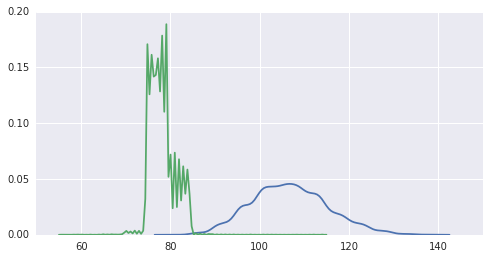

In [451]:
sns.set(rc={"figure.figsize": (8, 4)})
for pdf in sample_pdfs_1[2:4]:
    pdf = [[x/5]*5 for x in pdf]
    pdf = [item for sublist in pdf for item in sublist] 
    sample_data = np.random.choice(np.arange(20, 220), size = 21600, p = pdf)
    sns.distplot(sample_data, hist = False)
    #plt.hist(sample_data, bins = 40, range = range(20, 220))

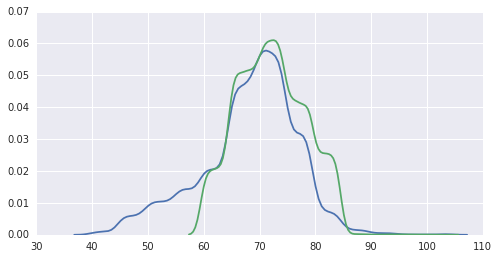

In [452]:
sns.set(rc={"figure.figsize": (8, 4)}); np.random.seed(0)
for pdf in sample_pdfs[0:2]:
    pdf = [[x/5]*5 for x in pdf]
    pdf = [item for sublist in pdf for item in sublist] 
    sample_data = np.random.choice(np.arange(20, 220), size = 21600, p = pdf)
    sns.distplot(sample_data, hist = False)
    #plt.hist(sample_data, bins = 40, range = range(20, 220))

### Before split

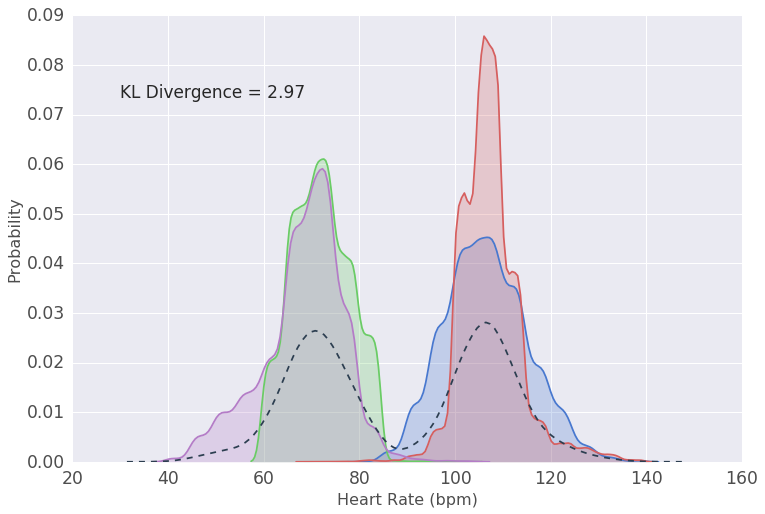

In [713]:
final_sample_pdfs = np.vstack((sample_pdfs_1[2], sample_pdfs[1], sample_pdfs_1[4],sample_pdfs[0]))
sns.set(style="darkgrid", palette="muted"); 
np.random.seed(0)
fig = plt.figure(figsize=(12,8))
sample_data_list = []
ax = fig.add_subplot(111)
for pdf in final_sample_pdfs:
    pdf = [[x/5]*5 for x in pdf]
    pdf = [item for sublist in pdf for item in sublist] 
    sample_data = np.random.choice(np.arange(20, 220), size = 21600, p = pdf)
    sample_data_list.append(sample_data)
    sns.distplot(sample_data, hist = False, kde_kws={"shade": True})
pdf_avg = np.divide(map(sum, zip(*final_sample_pdfs)), len(final_sample_pdfs))
pdf_total_avg = pdf_avg
pdf_avg = [[x/5]*5 for x in pdf_avg]
pdf_avg = [item for sublist in pdf_avg for item in sublist] 

from scipy import stats
divs = []
pdf_total_avg = np.divide(map(sum, zip(*final_sample_pdfs)), len(final_sample_pdfs))
for pdf in final_sample_pdfs:
    divs.append(stats.entropy(pdf, pdf_total_avg))
KL_div = sum(divs)

sample_data_avg = np.random.choice(np.arange(20, 220), size = 21600, p = pdf_avg)
sns.distplot(sample_data_avg, hist = False, kde_kws={"shade": False, "color":"#2C3E50",  'linestyle':'--'})
ax.set_xlabel('Heart Rate (bpm)', fontdict={'size':16})
ax.set_ylabel('Probability', fontdict={'size':16})
ax.xaxis.label.set_color('#4D4D4D')
ax.yaxis.label.set_color('#4D4D4D')
ax.tick_params(axis='x', colors='#4D4D4D', labelsize = 'x-large')
ax.tick_params(axis='y', colors='#4D4D4D', labelsize = 'x-large')

ax.text(30, 0.0735, 'KL Divergence = ' + str(KL_div)[0:4], fontsize = 17)

fig.patch.set_alpha(0)

### After split

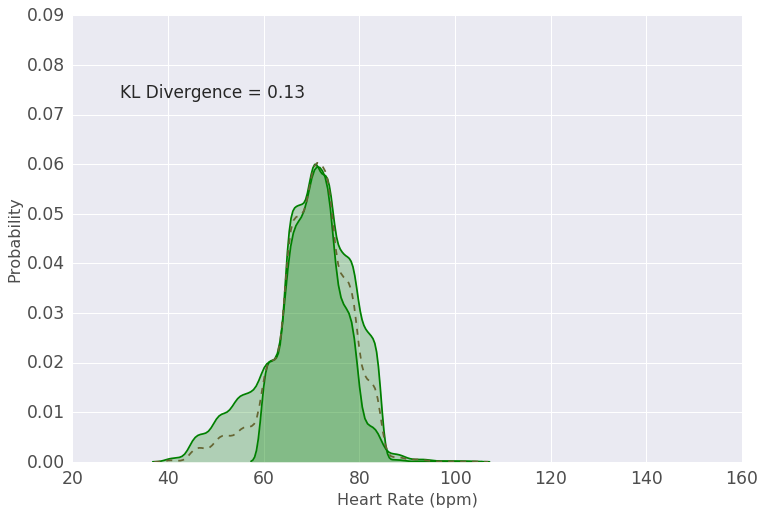

In [712]:
sns.set(style="darkgrid", palette="muted"); 
fig = plt.figure(figsize=(12,8))
sample_data_list = []
ax = fig.add_subplot(111)

pdf = sample_pdfs[0]
pdf = [[x/5]*5 for x in pdf]
pdf = [item for sublist in pdf for item in sublist] 
sample_data = np.random.choice(np.arange(20, 220), size = 21600, p = pdf)
sample_data_list.append(sample_data)
sns.distplot(sample_data, hist = False, kde_kws={"shade": True, 'color':'green'})

pdf = sample_pdfs[1]
pdf = [[x/5]*5 for x in pdf]
pdf = [item for sublist in pdf for item in sublist] 
sample_data = np.random.choice(np.arange(20, 220), size = 21600, p = pdf)
sample_data_list.append(sample_data)
sns.distplot(sample_data, hist = False, kde_kws={"shade": True, 'color':'green'})

final_sample_pdfs = np.vstack((sample_pdfs[0], sample_pdfs[1]))
pdf_avg = np.divide(map(sum, zip(*final_sample_pdfs)), len(final_sample_pdfs))
pdf_avg = [[x/5]*5 for x in pdf_avg]
pdf_avg = [item for sublist in pdf_avg for item in sublist] 
pdf_left_avg = pdf_avg
sample_data_avg_2 = np.random.choice(np.arange(20, 220), size = 21600, p = pdf_avg)
sns.distplot(sample_data_avg_2, hist = False, kde_kws={"shade": False, 'linestyle':'--', "color":"#666633"})

from scipy import stats
divs = []
pdf_total_avg = np.divide(map(sum, zip(*final_sample_pdfs)), len(final_sample_pdfs))
for pdf in final_sample_pdfs:
    divs.append(stats.entropy(pdf, pdf_total_avg))
KL_div = sum(divs)

ax.text(30, 0.0735, 'KL Divergence = ' + str(KL_div)[0:4], fontsize = 17)

ax.set_xlabel('Heart Rate (bpm)', fontdict={'size':16})
ax.set_ylabel('Probability', fontdict={'size':16})
ax.xaxis.label.set_color('#4D4D4D')
ax.yaxis.label.set_color('#4D4D4D')
ax.tick_params(axis='x', colors='#4D4D4D', labelsize = 'x-large')
ax.tick_params(axis='y', colors='#4D4D4D', labelsize = 'x-large')
ax.set_xlim((20,160))
ax.set_ylim((0,0.09))
fig.patch.set_alpha(0)

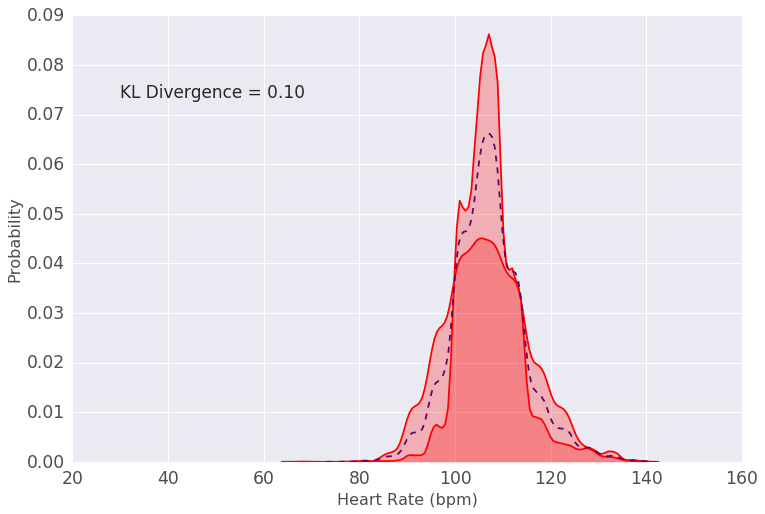

In [714]:
sns.set(style="darkgrid", palette="muted"); 
fig = plt.figure(figsize=(12,8))
sample_data_list = []
ax = fig.add_subplot(111)

pdf = sample_pdfs_1[2]
pdf = [[x/5]*5 for x in pdf]
pdf = [item for sublist in pdf for item in sublist] 
sample_data = np.random.choice(np.arange(20, 220), size = 21600, p = pdf)
sample_data_list.append(sample_data)
sns.distplot(sample_data, hist = False, kde_kws={"shade": True, 'color':'red'})

pdf = sample_pdfs_1[4]
pdf = [[x/5]*5 for x in pdf]
pdf = [item for sublist in pdf for item in sublist] 
sample_data = np.random.choice(np.arange(20, 220), size = 21600, p = pdf)
sample_data_list.append(sample_data)
sns.distplot(sample_data, hist = False, kde_kws={"shade": True, 'color':'red'})

final_sample_pdfs = np.vstack((sample_pdfs_1[2], sample_pdfs_1[4]))
pdf_avg = np.divide(map(sum, zip(*final_sample_pdfs)), len(final_sample_pdfs))
pdf_avg = [[x/5]*5 for x in pdf_avg]
pdf_avg = [item for sublist in pdf_avg for item in sublist] 
pdf_right_avg = pdf_avg
sample_data_avg_1 = np.random.choice(np.arange(20, 220), size = 21600, p = pdf_avg)
sns.distplot(sample_data_avg_1, hist = False, kde_kws={"shade": False, 'linestyle':'--', "color":"#660066"})

divs = []
pdf_total_avg = np.divide(map(sum, zip(*final_sample_pdfs)), len(final_sample_pdfs))
for pdf in final_sample_pdfs:
    divs.append(stats.entropy(pdf, pdf_total_avg))
KL_div = sum(divs)

ax.text(30, 0.0735, 'KL Divergence = ' + str(KL_div)[0:4], fontsize = 17)

ax.set_xlabel('Heart Rate (bpm)', fontdict={'size':16})
ax.set_ylabel('Probability', fontdict={'size':16})
ax.xaxis.label.set_color('#4D4D4D')
ax.yaxis.label.set_color('#4D4D4D')
ax.tick_params(axis='x', colors='#4D4D4D', labelsize = 'x-large')
ax.tick_params(axis='y', colors='#4D4D4D', labelsize = 'x-large')
ax.set_xlim((20,160))
ax.set_ylim((0,0.09))

fig.patch.set_alpha(0)

In [212]:
%%opts Distribution (hist=False kde_kws=dict(shade=True))
sample_data = []
for i, pdf in enumerate(sample_pdfs):
    pdf = [[x/5]*5 for x in pdf]
    pdf = [item for sublist in pdf for item in sublist] 
    sample_data.append(np.random.choice(range(20, 220), size = 21600, p = pdf))
    #sns.distplot(sample_data, hist = False)

hv.Distribution(sample_data[2], label='Yellow') *\
hv.Distribution(sample_data[0], label='Blue') *\
hv.Distribution(sample_data[1], label='Green') *\
hv.Distribution(sample_data[3], label='Red')

    #plt.hist(sample_data, bins = 40, range = range(20, 220))

# d1 = 25 * np.random.randn(500) + 450
# d2 = 45 * np.random.randn(500) + 540
# d3 = 55 * np.random.randn(500) + 590

:Overlay
   .Distribution.Yellow :Distribution   (Value)
   .Distribution.Blue   :Distribution   (Value)
   .Distribution.Green  :Distribution   (Value)
   .Distribution.Red    :Distribution   (Value)

## Show KL Divergence principle

In [422]:
def KL(p, q):
    return p * np.log(p/q)

In [ ]:
total_KL = []
for p in sample_pdfs[0]: 
    q_KL = []
    for q in pdf_total_avg:
        total_KL.append([p, q, KL(p,q)
    total_KL.append(q_KL)

In [468]:
total_KL_df = pd.DataFrame(np.array(total_KL), columns

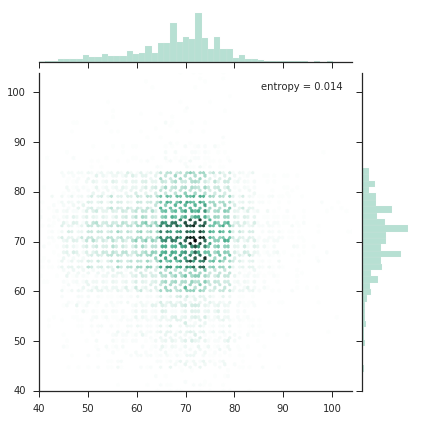

In [506]:
from scipy.stats import entropy
from scipy.stats import kendalltau
sns.jointplot(x=sample_data_list[0], y=sample_data_avg_2, kind="hex", stat_func=entropy, color="#4CB391")

In [527]:
len(sample_data_avg)

21600

AttributeError: 'AxesSubplot' object has no attribute 'kde'

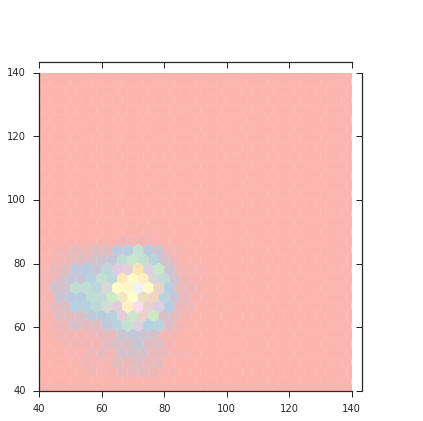

In [543]:
fig = plt.figure(figsize=(12,8))

sns.set(style="ticks", color_codes=True)
g = sns.JointGrid(x=sample_data_list[0], y=sample_data_avg_2)
g = g.plot_joint(plt.hexbin,cmap=plt.cm.Pastel1, extent=[40, 140, 40, 140], gridsize = 30)
_ = g.ax_marg_x.kde(sample_data_list[0], color="b", alpha=.6,
                      bins=np.arange(20, 220, 5))
_ = g.ax_marg_y.hist(sample_data_avg_2, color="k", alpha=.6,
                      orientation="horizontal",
                      bins=np.arange(20, 220, 5))
#plt.annotate(entropy)
plt.xlim(40, 140)
plt.ylim(40, 140)
ax.xaxis.label.set_color('#4D4D4D')
ax.yaxis.label.set_color('#4D4D4D')
ax.tick_params(axis='x', colors='#4D4D4D', labelsize = 'x-large')
ax.tick_params(axis='y', colors='#4D4D4D', labelsize = 'x-large')
fig.patch.set_alpha(0)

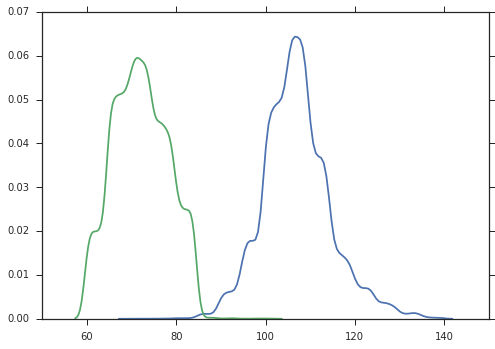

In [532]:
sns.distplot(sample_data_avg_1, hist = False)

sns.distplot(sample_data_list[1], hist = False)

KL:  0.499999713348


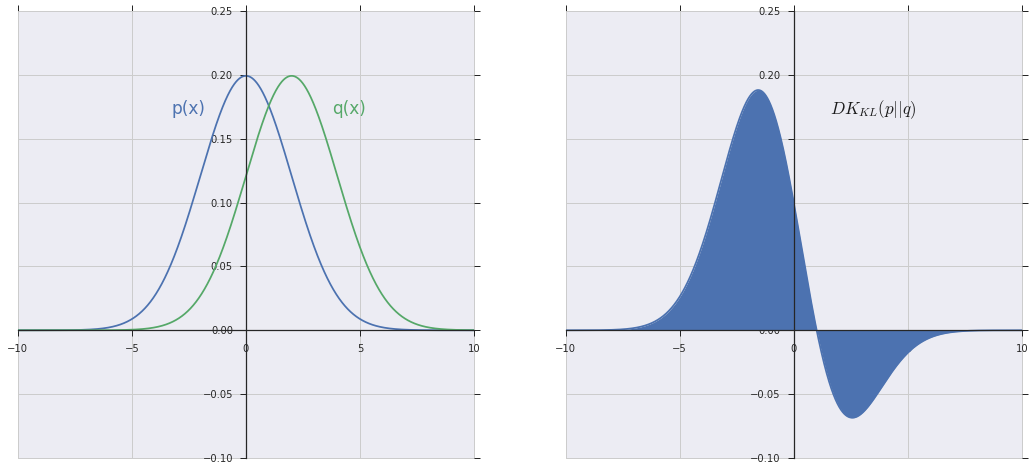

In [558]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab

from scipy.stats import norm
from scipy.integrate import quad

def p(x):
    return norm.pdf(x, 0, 2)

def q(x):
    return norm.pdf(x, 2, 2)

def KL(x):
    return p(x) * np.log( p(x) / q(x) )

range = np.arange(-10, 10, 0.001)

KL_int, err = quad(KL, -10, 10) 
print 'KL: ', KL_int

fig = plt.figure(figsize=(18, 8), dpi=100)

#---------- First Plot

ax = fig.add_subplot(1,2,1)
ax.grid(True, color = 'white')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.set_xlim(-10,10)
ax.set_ylim(-0.1,0.25)

ax.text(-2.5, 0.17, 'p(x)', horizontalalignment='center',fontsize=17,color='b')
ax.text(4.5, 0.17, 'q(x)', horizontalalignment='center',fontsize=17,color='g')

plt.plot(range, p(range))
plt.plot(range, q(range))
ax.set_axis_bgcolor('#ECECF3')
#---------- Second Plot

ax = fig.add_subplot(1,2,2)
ax.grid(True, color = 'white')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.set_xlim(-10,10)
ax.set_ylim(-0.1,0.25)

ax.text(3.5, 0.17, r'$DK_{KL}(p||q)$', horizontalalignment='center',fontsize=17,color='k')

ax.plot(range, KL(range))

ax.fill_between(range, 0, KL(range))
ax.set_axis_bgcolor('#ECECF3')
fig.patch.set_alpha(0)
plt.savefig('KullbackLeibler.png',bbox_inches='tight')
plt.show()

In [68]:
hv.notebook_extension()
%output holomap='widgets' fig='svg'

:Bivariate   [x,y]

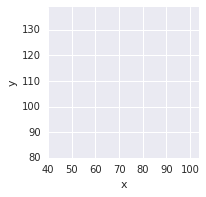

In [378]:
%%opts Bivariate [joint=True] (kind='kde' cmap='Reds')
hv.Bivariate(np.array([sample_data_avg_2, sample_data_list[0]]).T)

:Bivariate   [x,y]

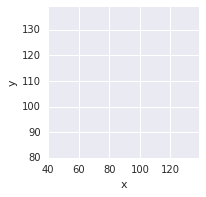

In [377]:
%%opts Bivariate [joint=True] (kind='kde' cmap='Blues')
hv.Bivariate(np.array([sample_data_avg, sample_data_list[0]]).T)